### Dependencies for plotting

In [3]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter




new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="none", markeredgewidth=0.8,
                           label='Full Stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="none",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro Stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np


## Conservative vs non-conservative schemes
* We study four parameters of the method.

**Method:** We hypothesize that the so-called Reynold's error can measure some qualitative differences between the two methods. Studying this error (defined later), we aim to measure which parameters influence this error and consequentially the difference between the methods.

**Goal:** Explaining the difference in $L^2$ error between the conservative and the non-conservative schemes, based on qualitative changes between the schemes, stemming from varying the parameters. The hope is that we can see a clear correlation between a specific parameter, the Reynold error, and the $L^2$ error. Based on this, we hope that we can draw conclusions regarding the methods' differences in performance.

The parameters are:

1. The stabilization parameter $\tau_1$ in the stabilization term $\int_{I_n}(\tau_1[\mathbf{n}\cdot \nabla u_h], [\mathbf{n}\cdot\nabla v_h])_{\mathcal{F_h}}dt$.

2. The time step size, $\Delta t_n$, as a function of the mesh size $h$.

3. The order $n_q$ of the Gauss-Lobatto quadrature rule for the time integral, $\int_{I_n} f(t) dt \approx \sum_{q=1}^{n_q}\alpha_q^n f(t_q^n)$.

4. The order of representation of the interface. Currently it is piecewise linear.

When solving the problem, we solve the problem until time $T=0.5$, $\Omega=[0,1]\times[0,1]$, and we solve the equation inside a moving circle (i.e. in $\Omega_2(t)$) or on the interface $\Gamma(t)$.

# Bulk problems

### Reynold error
The discrete Reynold formulation is given as 
\begin{align*}
        \int_{\Omega_2(t_n)}u_h v_h - \int_{\Omega_2(t_{n-1})}u_h v_h &= \sum_{q=1}^{n_q}\alpha_q^n \left(\int_{\Omega_2(t_q^n)}(\partial_t u_h + \mathbf{\beta}\cdot\nabla u_h)v_h+\int_{\Omega_2(t_q^n)}u_h(\partial_t v_h + \mathbf{\beta}\cdot\nabla v_h)\right),
\end{align*}
which we can write as 
\begin{align*}
        \int_{\Omega_2(t_n)}u_h v_h - \int_{\Omega_2(t_{n-1})}u_h v_h - \sum_{q=1}^{n_q}\alpha_q^n \left(\int_{\Omega_2(t_q^n)}(\partial_t u_h + \mathbf{\beta}\cdot\nabla u_h)v_h+\int_{\Omega_2(t_q^n)}u_h(\partial_t v_h + \mathbf{\beta}\cdot\nabla v_h)\right) &= 0.
\end{align*}
We measure the Reynold error $e_r$ by assembling the matrix (call it $A_h$) of the corresponding bilinear form of the RHS, multiply the matrix with the array of the numerical solution DOFs (denote by $\mathbf{u_h}$), compute the supremum norm of the resulting array. Formally,
$$e_r := \|A_h\mathbf{u_h}\|_{\infty}.$$


## Example 1

### 1.

Here, $\Delta t_n = h$ and we use the Gauss-Lobatto $n=3$ quadrature rule.

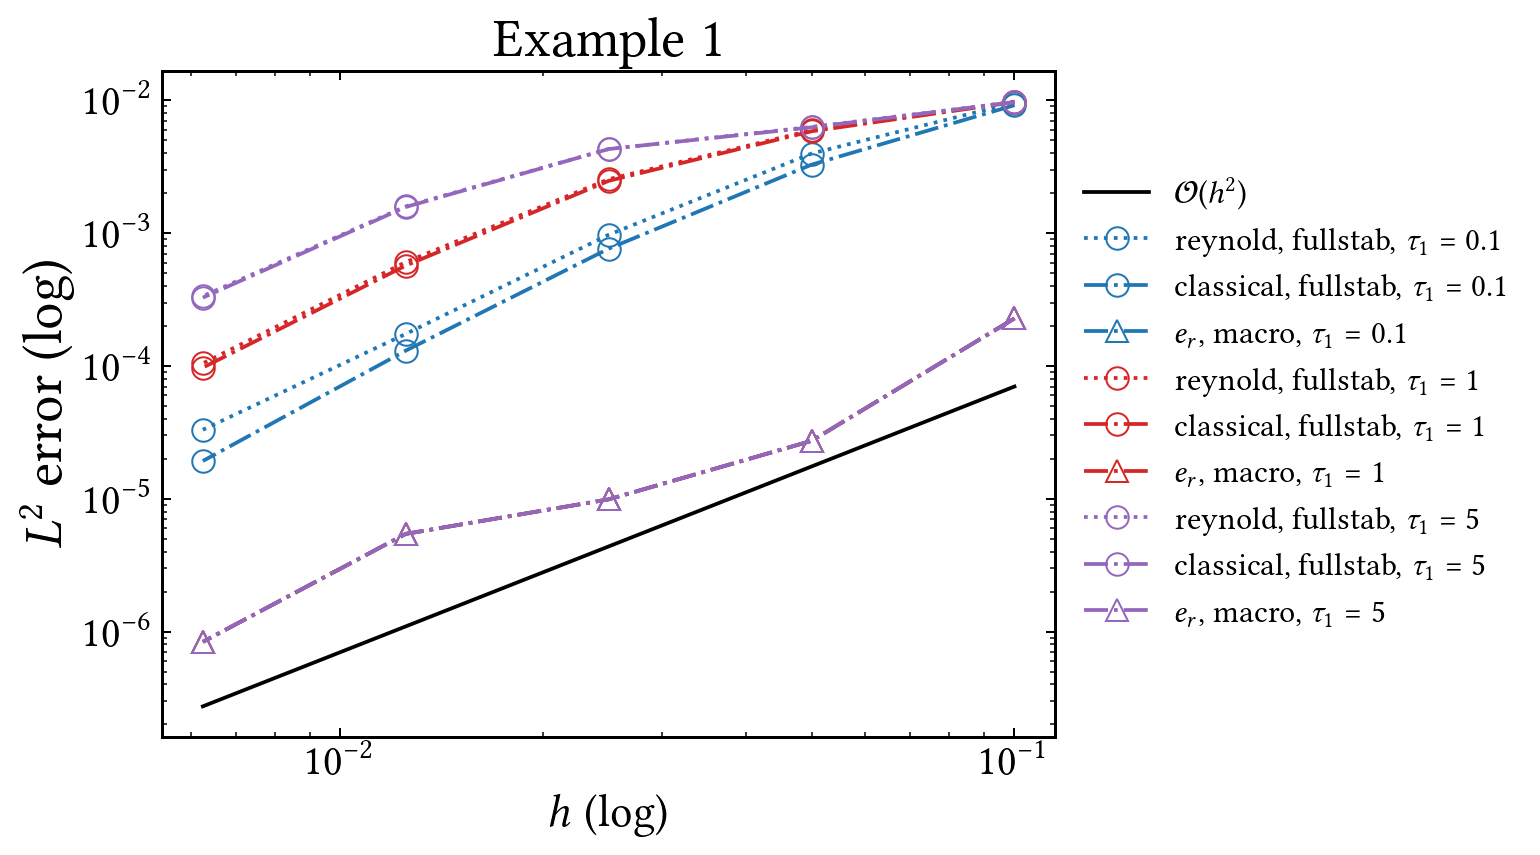

In [4]:
### tau1 = 0.1

# Conservative
L2_error_conservative_fullstab_tau01 = np.array([0.00960848, 0.00397564, 0.000972289, 0.000174269, 3.3089e-05])
reynold_error_conservative_fullstab_tau01 = np.array([0.000232385, 2.77153e-05, 9.88342e-06, 5.42832e-06, 8.36753e-07])
L2_error_conservative_macro_tau01 = np.array([0.010673, 0.00325978, 0.000754107, 0.000198466, 9.16593e-05])
reynold_error_conservative_macro_tau01 = np.array([0.000228046, 2.73714e-05, 9.84779e-06, 5.41781e-06, 8.35938e-07])

# Classical
L2_error_classical_fullstab_tau01 = np.array([0.00918998, 0.00327897, 0.000763957, 0.000130411, 1.92492e-05])
reynold_error_classical_fullstab_tau01 = np.array([0.000232741, 2.78945e-05, 9.89547e-06, 5.43809e-06, 8.37132e-07])
L2_error_classical_macro_tau01 = np.array([0.00528736, 0.00101999, 0.000275964, 5.77165e-05, 1.11099e-05])
reynold_error_classical_macro_tau01 = np.array([0.000227923, 2.72603e-05, 9.89444e-06, 5.44026e-06, 8.36912e-07])

### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00979179, 0.00594767, 0.0025476, 0.000605319, 0.000104606])
reynold_error_conservative_fullstab_tau1 = np.array([0.000233525, 2.87834e-05, 9.99157e-06, 5.42625e-06, 8.39186e-07])
L2_error_conservative_macro_tau1 = np.array([0.0103875, 0.00331302, 0.000733587, 0.000197708, 9.07003e-05])
reynold_error_conservative_macro_tau1 = np.array([0.000229658, 2.75239e-05, 9.87614e-06, 5.42657e-06, 8.36367e-07])

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.00969885, 0.0058463, 0.00247595, 0.000569686, 9.71572e-05])
reynold_error_classical_fullstab_tau1 = np.array([0.000232998, 2.8867e-05, 1.00021e-05, 5.4302e-06, 8.39205e-07])
L2_error_classical_macro_tau1 = np.array([0.00568669, 0.00107041, 0.000312917, 7.37928e-05, 1.72953e-05])
reynold_error_classical_macro_tau1 = np.array([0.00022818, 2.73056e-05, 9.89481e-06, 5.43854e-06, 8.37019e-07])

### tau1 = 5

# Conservative

L2_error_conservative_fullstab_tau5 = np.array([0.00971197, 0.00631006, 0.00429941, 0.00159071, 0.000335431])
reynold_error_conservative_fullstab_tau5 = np.array([0.00023341, 2.88845e-05, 1.01224e-05, 5.43708e-06, 8.43582e-07])
L2_error_conservative_macro_tau5 = np.array([0.010348, 0.00332085, 0.00073454, 0.000199027, 9.19342e-05])
reynold_error_conservative_macro_tau5 = np.array([0.000229854, 2.75385e-05, 9.87843e-06, 5.42739e-06, 8.36416e-07])

# Classical
L2_error_classical_fullstab_tau5 = np.array([0.00970445, 0.00625905, 0.00429899, 0.00157355, 0.000326775])
reynold_error_classical_fullstab_tau5 = np.array([0.000232894, 2.89181e-05, 1.01296e-05, 5.44009e-06, 8.43534e-07])
L2_error_classical_macro_tau5 = np.array([0.00572987, 0.00107598, 0.000316811, 7.62753e-05, 1.88643e-05])
reynold_error_classical_macro_tau5 = np.array([0.000228167, 2.73109e-05, 9.8942e-06, 5.43825e-06, 8.37032e-07])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 0.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.1

ax1.loglog(h, L2_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_macro_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\tau_1=0.1$")
ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\tau_1=0.1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau01,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau01,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
ax1.loglog(h, reynold_error_classical_macro_tau01,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")

# tau1 = 1

ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\tau_1=1$")
ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
ax1.loglog(h, reynold_error_classical_macro_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")

# tau1 = 5

ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_conservative_macro_tau5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\tau_1=5$")
ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
#ax1.loglog(h, reynold_error_conservative_macro_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
ax1.loglog(h, reynold_error_classical_macro_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")




ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Example 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

#### Summary

* **Conservative scheme:** An increased value of $\tau_1$ makes the overall $L^2$ error grow, and for large $h$ the convergence rate is worse than quadratic using full stabilization. Interestingly, changing the stabilization parameter does not change the error for the solution using macro element stabilization.

* **Non-conservative scheme:** Similar results are acheived for the non-conservative scheme, although here there is a slight difference in the error when using macro element stabilization.

* **Reynold error:** Changing the stabilization parameter $\tau_1$ doesn't change the Reynold error. 

### 1. New
We set $n=3$, $\Delta t_n = h/3$ and vary $\tau_1$.

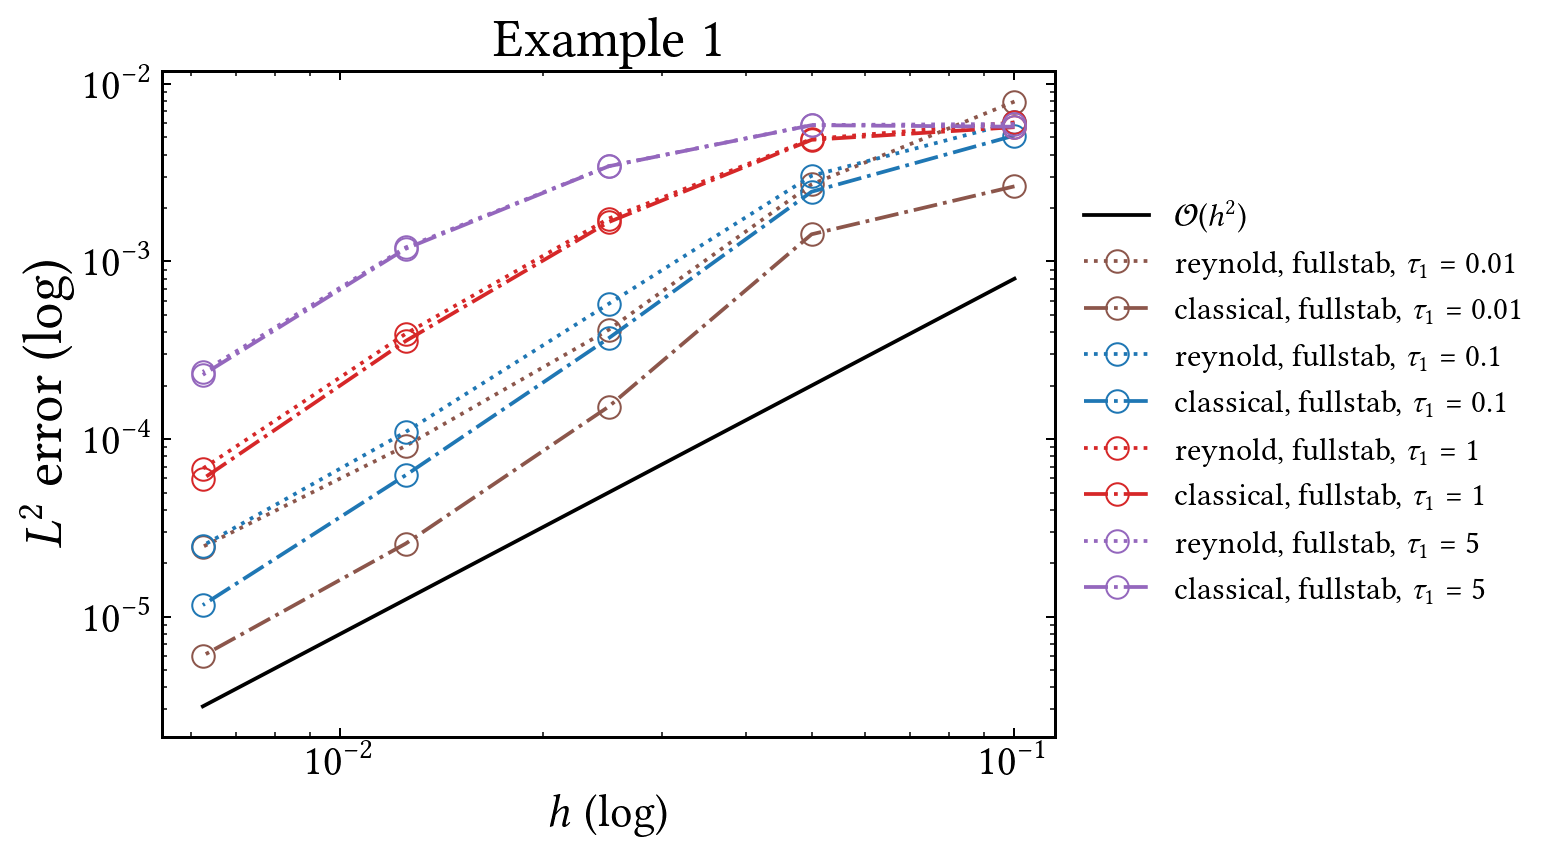

In [5]:
### tau1 = 0.01

# Conservative
L2_error_conservative_fullstab_tau001 = np.array([0.00795223, 0.00271746, 0.000412384, 9.15144e-05, 2.47446e-05])
L2_error_conservative_macro_tau001 = np.array([0.0100093, 0.00225583, 0.000380929, 9.73266e-05, 2.7893e-05])


# Classical
L2_error_classical_fullstab_tau001 = np.array([0.00264918, 0.00142222, 0.000152165, 2.57839e-05, 6.02538e-06])
L2_error_classical_macro_tau001 = np.array([0.00168074, 0.000809961, 9.3696e-05, 1.95151e-05, 5.06398e-06])


### tau1 = 0.1

# Conservative
L2_error_conservative_fullstab_tau01 = np.array([0.00607122, 0.00303668, 0.000577122, 0.000109706, 2.51415e-05])
reynold_error_conservative_fullstab_tau01 = np.array([5.73516e-05, 1.12155e-05, 1.08997e-06, 2.83267e-07, 5.32877e-08])
L2_error_conservative_macro_tau01 = np.array([0.00944471, 0.0019036, 0.000356339, 9.57643e-05, 2.62194e-05])
reynold_error_conservative_macro_tau01 = np.array([5.85968e-05, 1.10748e-05, 1.08952e-06, 2.82786e-07, 5.33077e-08])


# Classical
L2_error_classical_fullstab_tau01 = np.array([0.00511839, 0.0024702, 0.000369643, 6.26279e-05, 1.16223e-05])
reynold_error_classical_fullstab_tau01 = np.array([5.77754e-05, 1.10874e-05, 1.09047e-06, 2.83087e-07, 5.32081e-08])
L2_error_classical_macro_tau01 = np.array([0.00184067, 0.000598403, 7.9476e-05, 1.97207e-05, 6.33961e-06])
reynold_error_classical_macro_tau01 = np.array([5.591e-05, 1.08462e-05, 1.0897e-06, 2.82569e-07, 5.32021e-08])

### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00606403, 0.00489189, 0.0017436, 0.000391693, 6.81872e-05])
reynold_error_conservative_fullstab_tau1 = np.array([5.76188e-05, 1.14354e-05, 1.09691e-06, 2.85366e-07, 5.33109e-08])
L2_error_conservative_macro_tau1 = np.array([0.00931906, 0.00191009, 0.000355799, 9.58252e-05, 2.62479e-05])
reynold_error_conservative_macro_tau1 = np.array([0.00931906, 0.00191009, 0.000355799, 9.58252e-05, 2.62479e-05])

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.00570399, 0.0048406, 0.00166619, 0.000356737, 5.96996e-05])
reynold_error_classical_fullstab_tau1 = np.array([5.79765e-05, 1.14063e-05, 1.09861e-06, 2.85228e-07, 5.32523e-08])
L2_error_classical_macro_tau1 = np.array([0.00189861, 0.000606468, 8.13488e-05, 2.0338e-05, 7.19494e-06])
reynold_error_classical_macro_tau1 = np.array([5.5962e-05, 1.08479e-05, 1.08995e-06, 2.82588e-07, 5.32032e-08])

### tau1 = 5

# Conservative

L2_error_conservative_fullstab_tau5 = np.array([0.0059437, 0.00586237, 0.00344044, 0.00119989, 0.000239276])
reynold_error_conservative_fullstab_tau5 = np.array([5.75533e-05, 1.14863e-05, 1.1087e-06, 2.89198e-07, 5.3452e-08])
L2_error_conservative_macro_tau5 = np.array([0.00928357, 0.00191155, 0.000355817, 9.58422e-05, 2.62785e-05])
reynold_error_conservative_macro_tau5 = np.array([5.86528e-05, 1.10745e-05, 1.08884e-06, 2.82696e-07, 5.33222e-08])

# Classical
L2_error_classical_fullstab_tau5 = np.array([0.00573858, 0.00585337, 0.00343643, 0.00117975, 0.000230154])
reynold_error_classical_fullstab_tau5 = np.array([5.79735e-05, 1.14797e-05, 1.11006e-06, 2.89104e-07, 5.34076e-08])
L2_error_classical_macro_tau5 = np.array([0.00190375, 0.000924535, 9.97393e-05, 2.13205e-05, 7.34779e-06])
reynold_error_classical_macro_tau5 = np.array([5.59705e-05, 1.08479e-05, 1.08999e-06, 2.8259e-07, 5.32034e-08])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 0.8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
#ax1.loglog(h, 1.1e2*np.power(h, 2.5), label=r"$\mathcal{O}(h^{2.5})$", linestyle="--", color="black")

# tau1 = 0.01

ax1.loglog(h, L2_error_conservative_fullstab_tau001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, fullstab, $\tau_1=0.01$")
#ax1.loglog(h, L2_error_conservative_macro_tau001,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, macro, $\tau_1=0.01$")
ax1.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, fullstab, $\tau_1=0.01$")
#ax1.loglog(h, L2_error_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, macro, $\tau_1=0.01$")


# tau1 = 0.1

ax1.loglog(h, L2_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_macro_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\tau_1=0.1$")
ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\tau_1=0.1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau01,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau01,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_macro_tau01,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")

# tau1 = 1

ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\tau_1=1$")
ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
#ax1.loglog(h, reynold_error_classical_macro_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")

# tau1 = 5

ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_conservative_macro_tau5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\tau_1=5$")
ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
#ax1.loglog(h, reynold_error_conservative_macro_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
#ax1.loglog(h, reynold_error_classical_macro_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")




ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Example 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

#### Summary
* Using full stabilization, there is a clear reduction in error with using a smaller $\tau_1$. At the same time, the difference between the two methods grows with decreasing $\tau_1$.
* Using macro element stabilization, the methods do not change significantly with changing $\tau_1$. However, there is an almost fixed distance between the errors of the conservative and non-conservative schemes when using this stabilization.

### 2.
Below, $\tau_1 = 0.1$, we use Gauss-Lobatto $n=3$, and we vary $\Delta t$.

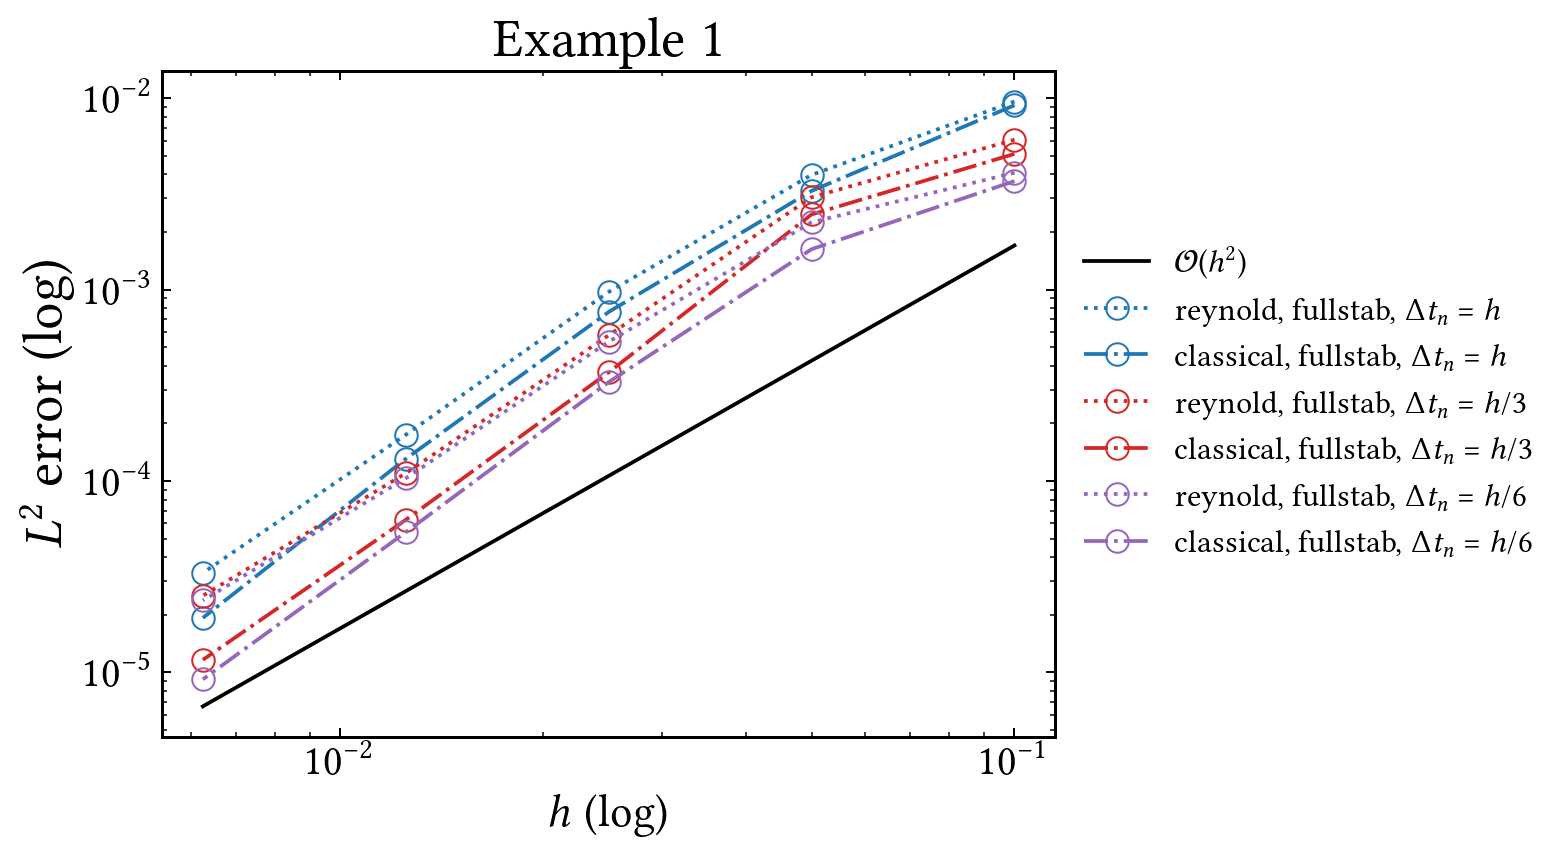

In [6]:
### dT = h

# Conservative
L2_error_conservative_fullstab_dt1 = np.array([0.00960848, 0.00397564, 0.000972289, 0.000174269, 3.3089e-05])
reynold_error_conservative_fullstab_dt1 = np.array([0.000232385, 2.77153e-05, 9.88342e-06, 5.42832e-06, 8.36753e-07])
L2_error_conservative_macro_dt1 = np.array([0.010673, 0.00325978, 0.000754107, 0.000198466, 9.16593e-05])
reynold_error_conservative_macro_dt1 = np.array([0.000228046, 2.73714e-05, 9.84779e-06, 5.41781e-06, 8.35938e-07])


# Classical
L2_error_classical_fullstab_dt1 = np.array([0.00918998, 0.00327897, 0.000763957, 0.000130411, 1.92492e-05])
reynold_error_classical_fullstab_dt1 = np.array([0.000232741, 2.78945e-05, 9.89547e-06, 5.43809e-06, 8.37132e-07])
L2_error_classical_macro_dt1 = np.array([0.00528736, 0.00101999, 0.000275964, 5.77165e-05, 1.11099e-05])
reynold_error_classical_macro_dt1 = np.array([0.000227923, 2.72603e-05, 9.89444e-06, 5.44026e-06, 8.36912e-07])

### dT = h/3

# Conservative
L2_error_conservative_fullstab_dt3 = np.array([0.00607122, 0.00303668, 0.000577122, 0.000109706, 2.51415e-05])
reynold_error_conservative_fullstab_dt3 = np.array([5.73516e-05, 1.12155e-05, 1.08997e-06, 2.83267e-07, 5.32877e-08])
L2_error_conservative_macro_dt3 = np.array([0.00944471, 0.0019036, 0.000356339, 9.57643e-05, 2.62194e-05])
reynold_error_conservative_macro_dt3 = np.array([5.85968e-05, 1.10748e-05, 1.08952e-06, 2.82786e-07, 5.33077e-08])


# Classical
L2_error_classical_fullstab_dt3 = np.array([0.00511839, 0.0024702, 0.000369643, 6.26279e-05, 1.16223e-05])
reynold_error_classical_fullstab_dt3 = np.array([5.77754e-05, 1.10874e-05, 1.09047e-06, 2.83087e-07, 5.32081e-08])
L2_error_classical_macro_dt3 = np.array([0.00184067, 0.000598403, 7.9476e-05, 1.97207e-05, 6.33961e-06])
reynold_error_classical_macro_dt3 = np.array([5.591e-05, 1.08462e-05, 1.0897e-06, 2.82569e-07, 5.32021e-08])

### dT = h/6

# Conservative
L2_error_conservative_fullstab_dt6 = np.array([0.00407727, 0.00224663, 0.000533813, 0.000103204, 2.37443e-05])
reynold_error_conservative_fullstab_dt6 = np.array([2.7206e-05, 6.81086e-06, 4.64656e-07, 2.28977e-07, 1.56962e-08])
L2_error_conservative_macro_dt6 = np.array([0.00498347, 0.00163048, 0.000342917, 8.75054e-05, 2.31835e-05])
reynold_error_conservative_macro_dt6 = np.array([2.68071e-05, 6.73807e-06, 4.61496e-07, 2.28407e-07, 1.56939e-08])


# Classical
L2_error_classical_fullstab_dt6 = np.array([0.00368897, 0.00162651, 0.00032844, 5.3936e-05, 9.19291e-06])
reynold_error_classical_fullstab_dt6 = np.array([2.76068e-05, 6.72186e-06, 4.63011e-07, 2.29142e-07, 1.56903e-08])
L2_error_classical_macro_dt6 = np.array([0.00111554, 0.000399704, 7.05951e-05, 1.85007e-05, 4.94862e-06])
reynold_error_classical_macro_dt6 = np.array([2.78377e-05, 6.57706e-06, 4.59436e-07, 2.2876e-07, 1.5689e-08])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig2, ax2 = plt.subplots()

ax2.loglog(h, 1.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* dT = h

ax2.loglog(h, L2_error_conservative_fullstab_dt1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, L2_error_conservative_macro_dt1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\Delta t_n = h$")
ax2.loglog(h, L2_error_classical_fullstab_dt1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, L2_error_classical_macro_dt1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\Delta t_n = h$")

#ax2.loglog(h, reynold_error_conservative_fullstab_dt1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, reynold_error_conservative_macro_dt1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\Delta t_n = h$")
#ax2.loglog(h, reynold_error_classical_fullstab_dt1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, reynold_error_classical_macro_dt1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")

#* dT = h/3

ax2.loglog(h, L2_error_conservative_fullstab_dt3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, L2_error_conservative_macro_dt3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\Delta t_n = h/3$")
ax2.loglog(h, L2_error_classical_fullstab_dt3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, L2_error_classical_macro_dt3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\Delta t_n = h/3$")

#ax2.loglog(h, reynold_error_conservative_fullstab_dt3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, reynold_error_conservative_macro_dt3,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\Delta t_n = h/3$")
#ax2.loglog(h, reynold_error_classical_fullstab_dt3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, reynold_error_classical_macro_dt3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\Delta t_n = h/3$")

#* dT = h/6

ax2.loglog(h, L2_error_conservative_fullstab_dt6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, L2_error_conservative_macro_dt6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\Delta t_n = h/6$")
ax2.loglog(h, L2_error_classical_fullstab_dt6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, L2_error_classical_macro_dt6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\Delta t_n = h/6$")

#ax2.loglog(h, reynold_error_conservative_fullstab_dt6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, reynold_error_conservative_macro_dt6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\Delta t_n = h/6$")
#ax2.loglog(h, reynold_error_classical_fullstab_dt6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, reynold_error_classical_macro_dt6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")



ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5),
          ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax2.set_title(r"Example 1")

plt.show()

The $L^2$ errors for the conservative and non-conservative schemes are slightly closer to each other when $\Delta t_n = h$, but they are also larger, compared to when $\Delta t_n = h/3$. The Reynold error is lower. For $\Delta t_n = h/6$, the difference in $L^2$ error between the schemes is even less, but again slightly lower. The Reynold error is slightly lower.

### 3.

Below we set $\tau_1 = 0.1$, $\Delta t_n = h$ and vary the Gauss-Lobatto order $n$.

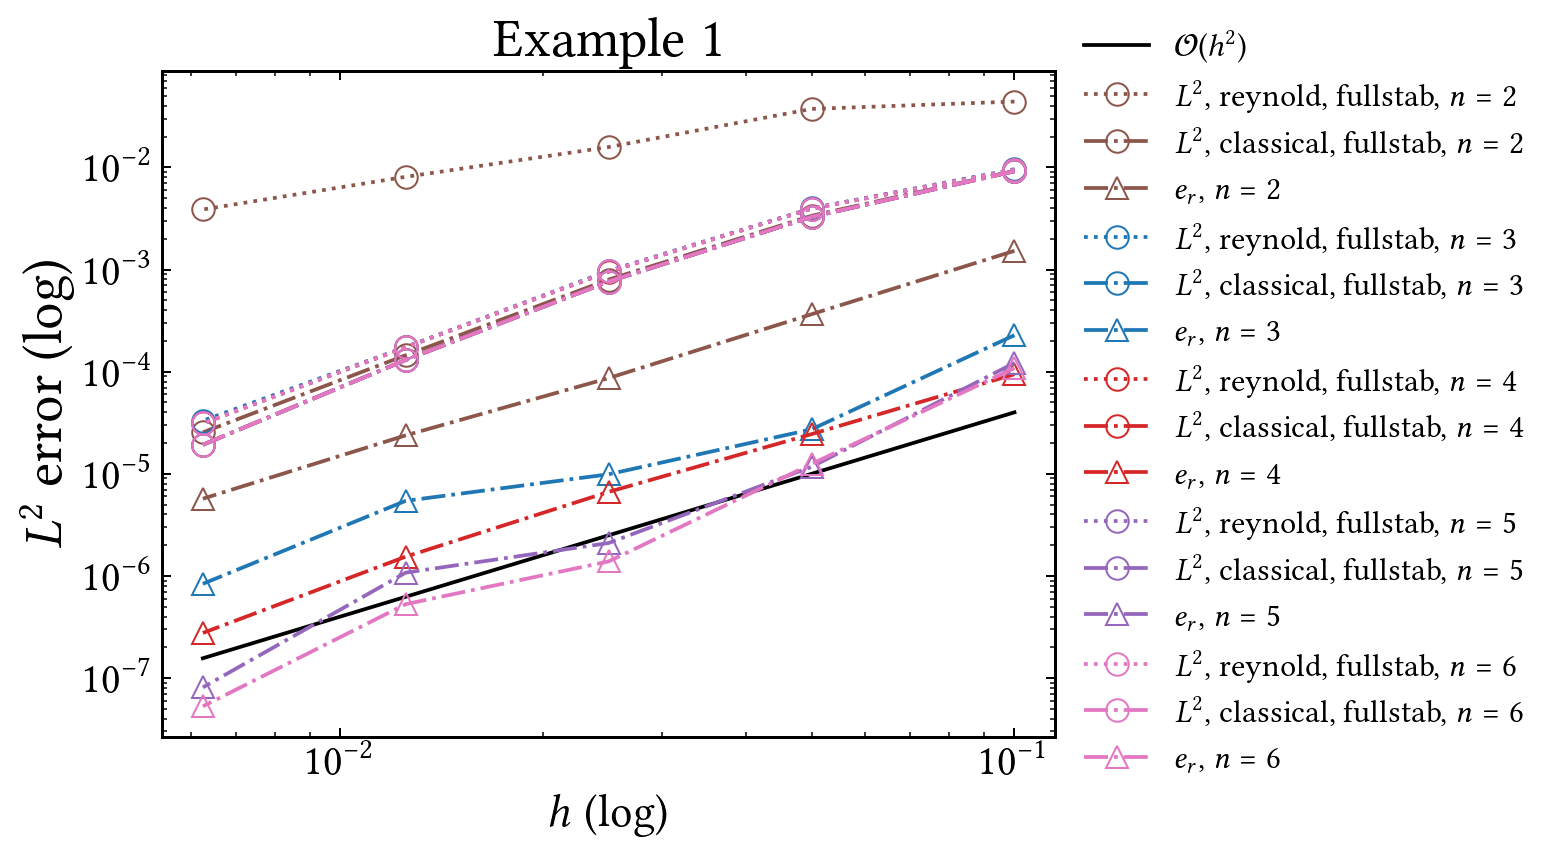

In [7]:
### n = 2

# Conservative
L2_error_conservative_fullstab_n2 = np.array([0.0441904, 0.0374203, 0.0158324, 0.00809606, 0.00387579])
reynold_error_conservative_fullstab_n2 = np.array([0.00226353, 0.000503538, 0.000123776, 2.99075e-05, 6.54892e-06])
L2_error_conservative_macro_n2 = np.array([0.208218, 0.223418, 0.0434997, 0.0218161, 0.0189198])
reynold_error_conservative_macro_n2 = np.array([0.00549295, 0.00317097, 0.000204686, 4.67102e-05, 1.22207e-05])


# Classical
L2_error_classical_fullstab_n2 = np.array([0.00924674, 0.00336256, 0.000797654, 0.000144956, 2.54471e-05])
reynold_error_classical_fullstab_n2 = np.array([0.00158338, 0.000366088, 8.65258e-05, 2.38192e-05, 5.70459e-06])
L2_error_classical_macro_n2 = np.array([0.00577803, 0.00131654, 0.000352884, 8.83102e-05, 2.16618e-05])
reynold_error_classical_macro_n2 = np.array([0.00152604, 0.000365289, 8.65471e-05, 2.38099e-05, 5.70373e-06])


### n = 3

# Conservative
L2_error_conservative_fullstab_n3 = np.array([0.00960848, 0.00397564, 0.000972289, 0.000174269, 3.3089e-05])
reynold_error_conservative_fullstab_n3 = np.array([0.000232385, 2.77153e-05, 9.88342e-06, 5.42832e-06, 8.36753e-07])
L2_error_conservative_macro_n3 = np.array([0.010673, 0.00325978, 0.000754107, 0.000198466, 9.16593e-05])
reynold_error_conservative_macro_n3 = np.array([0.000228046, 2.73714e-05, 9.84779e-06, 5.41781e-06, 8.35938e-07])


# Classical
L2_error_classical_fullstab_n3= np.array([0.00918998, 0.00327897, 0.000763957, 0.000130411, 1.92492e-05])
reynold_error_classical_fullstab_n3 = np.array([0.000232741, 2.78945e-05, 9.89547e-06, 5.43809e-06, 8.37132e-07])
L2_error_classical_macro_n3 = np.array([0.00528736, 0.00101999, 0.000275964, 5.77165e-05, 1.11099e-05])
reynold_error_classical_macro_n3 = np.array([0.000227923, 2.72603e-05, 9.89444e-06, 5.44026e-06, 8.36912e-07])

### n = 4

# Conservative
L2_error_conservative_fullstab_n4 = np.array([0.00942593, 0.00394877, 0.000952185, 0.000173308, 3.10936e-05])
reynold_error_conservative_fullstab_n4 = np.array([9.44839e-05, 2.42941e-05, 6.61888e-06, 1.54338e-06, 2.76507e-07])
L2_error_conservative_macro_n4 = np.array([0.0105614, 0.00274426, 0.000536055, 0.000118029, 2.94973e-05])
reynold_error_conservative_macro_n4 = np.array([9.07898e-05, 2.41676e-05, 6.61174e-06, 1.54434e-06, 2.76523e-07])


# Classical
L2_error_classical_fullstab_n4 = np.array([0.00917751, 0.00328219, 0.000764085, 0.000130371, 1.92408e-05])
reynold_error_classical_fullstab_n4 = np.array([9.49031e-05, 2.45197e-05, 6.64131e-06, 1.54393e-06, 2.76353e-07])
L2_error_classical_macro_n4 = np.array([0.00531328, 0.00101373, 0.000275171, 5.75625e-05, 1.10944e-05])
reynold_error_classical_macro_n4 = np.array([9.44238e-05, 2.4475e-05, 6.6521e-06, 1.54457e-06, 2.76365e-07])

### n = 5

# Conservative
L2_error_conservative_fullstab_n5 = np.array([0.0095035, 0.003954, 0.00096324, 0.000174061, 3.12711e-05])
reynold_error_conservative_fullstab_n5 = np.array([0.000121735, 1.18645e-05, 2.09273e-06, 1.0758e-06, 8.10873e-08])
L2_error_conservative_macro_n5 = np.array([0.0105943, 0.00274836, 0.000541505, 0.000115141, 2.75346e-05])
reynold_error_conservative_macro_n5 = np.array([0.000118769, 1.16845e-05, 2.0954e-06, 1.07582e-06, 8.10578e-08])

# Classical
L2_error_classical_fullstab_n5 = np.array([0.00918125, 0.00328184, 0.000764019, 0.000130365, 1.92413e-05])
reynold_error_classical_fullstab_n5 = np.array([0.000124612, 1.19044e-05, 2.0967e-06, 1.07679e-06, 8.10546e-08])
L2_error_classical_macro_n5 = np.array([0.00531653, 0.00101306, 0.000275158, 5.75486e-05, 1.10967e-05])
reynold_error_classical_macro_n5 = np.array([0.000121861, 1.1707e-05, 2.09993e-06, 1.07725e-06, 8.1024e-08])

### n = 6

# Conservative
L2_error_conservative_fullstab_n6 = np.array([0.00945631, 0.00394854, 0.00096123, 0.000173536, 3.12377e-05])
reynold_error_conservative_fullstab_n6 = np.array([0.000108361, 1.26618e-05, 1.37825e-06, 5.2863e-07, 5.28348e-08])
L2_error_conservative_macro_n6 = np.array([0.0105431, 0.00276182, 0.000538213, 0.00011405, 2.70464e-05])
reynold_error_conservative_macro_n6 = np.array([0.000105949, 1.24685e-05, 1.38035e-06, 5.28936e-07, 5.28124e-08])

# Classical
L2_error_classical_fullstab_n6 = np.array([0.00918038, 0.00328191, 0.000764031, 0.000130366, 1.92412e-05])
reynold_error_classical_fullstab_n6 = np.array([0.000111198, 1.2696e-05, 1.38321e-06, 5.28941e-07, 5.28531e-08])
L2_error_classical_macro_n6 = np.array([0.00531737, 0.00101314, 0.000275155, 5.75532e-05, 1.10951e-05])
reynold_error_classical_macro_n6 = np.array([0.000108538, 1.24839e-05, 1.38664e-06, 5.29168e-07, 5.28364e-08])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 0.4e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* n = 2

ax3.loglog(h, L2_error_conservative_fullstab_n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, fullstab, $n=2$")
#ax3.loglog(h, L2_error_conservative_macro_n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, macro, $n=2$")
ax3.loglog(h, L2_error_classical_fullstab_n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, fullstab, $n=2$")
#ax3.loglog(h, L2_error_classical_macro_n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, macro, $n=2$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
#ax3.loglog(h, reynold_error_conservative_macro_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $n=2$")
#ax3.loglog(h, reynold_error_classical_fullstab_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
ax3.loglog(h, reynold_error_classical_macro_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, $n=2$")


#* n = 3

ax3.loglog(h, L2_error_conservative_fullstab_n3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, fullstab, $n=3$")
#ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
ax3.loglog(h, L2_error_classical_fullstab_n3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, fullstab, $n=3$")
#ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_conservative_macro_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $n=3$")
#ax3.loglog(h, reynold_error_classical_fullstab_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
ax3.loglog(h, reynold_error_classical_macro_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, $n=3$")

#* n = 4

ax3.loglog(h, L2_error_conservative_fullstab_n4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, fullstab, $n=4$")
#ax3.loglog(h, L2_error_conservative_macro_n4,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, macro, $n=4$")
ax3.loglog(h, L2_error_classical_fullstab_n4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, fullstab, $n=4$")
#ax3.loglog(h, L2_error_classical_macro_n4,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, macro, $n=4$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n4,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_conservative_macro_n4,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $n=4$")
#ax3.loglog(h, reynold_error_classical_fullstab_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
ax3.loglog(h, reynold_error_classical_macro_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, $n=4$")

#* n = 5

ax3.loglog(h, L2_error_conservative_fullstab_n5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, fullstab, $n=5$")
#ax3.loglog(h, L2_error_conservative_macro_n5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, macro, $n=5$")
ax3.loglog(h, L2_error_classical_fullstab_n5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, fullstab, $n=5$")
#ax3.loglog(h, L2_error_classical_macro_n5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, macro, $n=5$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n=5$")
#ax3.loglog(h, reynold_error_conservative_macro_n5,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $n=5$")
#ax3.loglog(h, reynold_error_classical_fullstab_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n = 5$")
ax3.loglog(h, reynold_error_classical_macro_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, $n=5$")

#* n = 6

ax3.loglog(h, L2_error_conservative_fullstab_n6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, fullstab, $n=6$")
#ax3.loglog(h, L2_error_conservative_macro_n6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, macro, $n=6$")
ax3.loglog(h, L2_error_classical_fullstab_n6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, fullstab, $n=6$")
#ax3.loglog(h, L2_error_classical_macro_n6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, macro, $n=6$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n=6$")
#ax3.loglog(h, reynold_error_conservative_macro_n6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $n=6$")
#ax3.loglog(h, reynold_error_classical_fullstab_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n = 6$")
ax3.loglog(h, reynold_error_classical_macro_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, $n=6$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Example 1")

plt.show()

#### Summary

* **Conservative scheme:** Using the conservative method, the solution using macro element stabilization changes in the sense that a higher order Lobatto quadrature rule gives a lower error. For the full stabilization, the error remains the same for $n\geq 3$. For $n=2$, the error is drastically increased, and the convergence rate becomes linear.
* **Non-conservative scheme:** When varying the Lobatto order $n$, virtually nothing happens to the $L^2$ error of the non-conservative (classical) method regardless of stabilization for $n\geq 2$. 
* **Reynold error:** The Reynold error decreases steadily for increasing $n$. 

<!---
The Gauss-Lobatto 3 quadrature rule (Simpson's) is exact when integrating polynomials of degree $\leq 3$. Hence, since the set of faces we integrate over when stabilizing ($\mathcal{F}_{h,2}^n$ and $\mathcal{F}_{h,2}^{\mathcal{M},n}$) are constant on each time slab $I_n$, the space integral of the product between two first order polynomials produces a third order polynomial, which becomes the time integrand. Hence, the time integral is computed exactly using the quadrature rules.

When we approximate 
$$\int_{I_n} \int_{\Omega_2(t)} D_1 u_h D_2 v_h dx dt \approx \sum_{q=1}^{n_q}\alpha_q^n \underbrace{\int_{\Omega_2(t)} D_1 u_h D_2 v_h dx}_{=:I_S},$$
the approximation is not exact, since the integral $I_S$ is taken over a non-constant domain, resulting in a larger-than-3 order polynomial when approximated by a quadrature rule.
-->


### 3. New
We set $\Delta t_n = h/3$, $\tau_1 = 0.1$ and vary $n$.

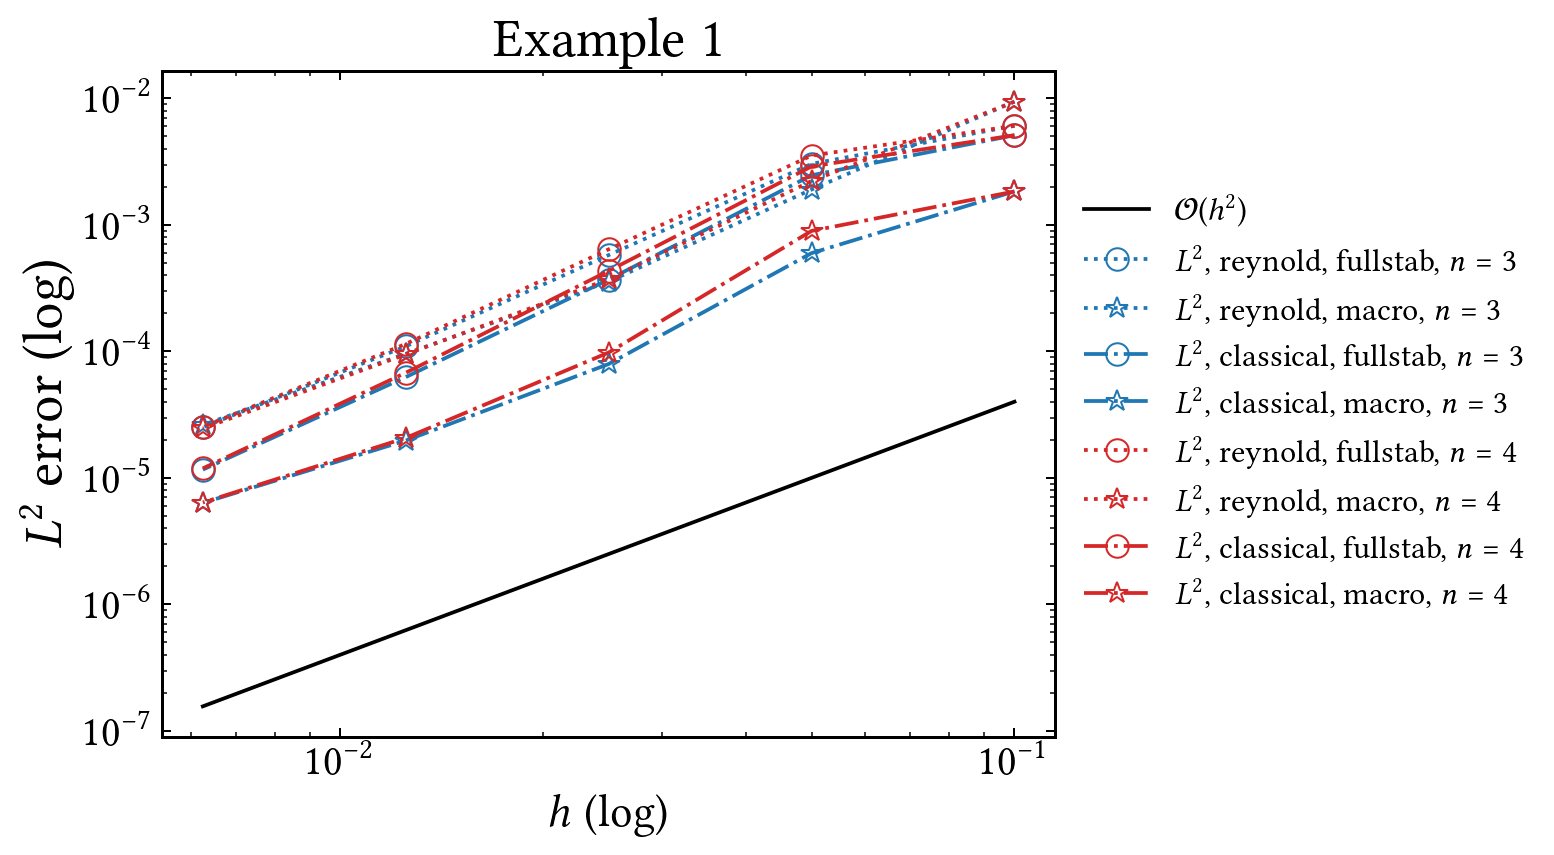

In [8]:
### n = 2

# Conservative
# L2_error_conservative_fullstab_n2 = np.array([0.011761, 0.00579883, 0.00237252, 0.00122638, 0.000694867])
# L2_error_conservative_macro_n2 = np.array()

# # Classical
# L2_error_classical_fullstab_n2 = np.array()
# L2_error_classical_macro_n2 = np.array()


### n = 3

# Conservative
L2_error_conservative_fullstab_n3 = np.array([0.00607122, 0.00303668, 0.000577122, 0.000109706, 2.51415e-05])
L2_error_conservative_macro_n3 = np.array([0.00944471, 0.0019036, 0.000356339, 9.57643e-05, 2.62194e-05])


# Classical
L2_error_classical_fullstab_n3 = np.array([0.00511839, 0.0024702, 0.000369643, 6.26279e-05, 1.16223e-05])
L2_error_classical_macro_n3 = np.array([0.00184067, 0.000598403, 7.9476e-05, 1.97207e-05, 6.33961e-06])

### n = 4

# Conservative
L2_error_conservative_fullstab_n4 = np.array([0.00607556, 0.00353308, 0.000641119, 0.000114511, 2.53161e-05])
L2_error_conservative_macro_n4 = np.array([0.00942553, 0.00222353, 0.000372247, 9.46702e-05, 2.45852e-05])


# Classical
L2_error_classical_fullstab_n4 = np.array([0.00511632, 0.00290058, 0.000432949, 6.77934e-05, 1.18852e-05])
L2_error_classical_macro_n4 = np.array([0.0018375, 0.000896409, 9.79833e-05, 2.07004e-05, 6.38701e-06])


### n = 5

# Conservative
# L2_error_conservative_fullstab_n5 = np.array()
# L2_error_conservative_macro_n5 = np.array()

# # Classical
# L2_error_classical_fullstab_n5 = np.array()
# L2_error_classical_macro_n5 = np.array()

# ### n = 6

# # Conservative
# L2_error_conservative_fullstab_n6 = np.array()
# L2_error_conservative_macro_n6 = np.array()

# # Classical
# L2_error_classical_fullstab_n6 = np.array()
# L2_error_classical_macro_n6 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 0.4e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* n = 2

# ax3.loglog(h, L2_error_conservative_fullstab_n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, fullstab, $n=2$")
# #ax3.loglog(h, L2_error_conservative_macro_n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, macro, $n=2$")
# ax3.loglog(h, L2_error_classical_fullstab_n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, fullstab, $n=2$")
# #ax3.loglog(h, L2_error_classical_macro_n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, macro, $n=2$")

# #ax3.loglog(h, reynold_error_conservative_fullstab_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
# #ax3.loglog(h, reynold_error_conservative_macro_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $n=2$")
# #ax3.loglog(h, reynold_error_classical_fullstab_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
# ax3.loglog(h, reynold_error_classical_macro_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, $n=2$")


#* n = 3

ax3.loglog(h, L2_error_conservative_fullstab_n3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, fullstab, $n=3$")
ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
ax3.loglog(h, L2_error_classical_fullstab_n3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, fullstab, $n=3$")
ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_conservative_macro_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $n=3$")
#ax3.loglog(h, reynold_error_classical_fullstab_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_classical_macro_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, $n=3$")

#* n = 4

ax3.loglog(h, L2_error_conservative_fullstab_n4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, fullstab, $n=4$")
ax3.loglog(h, L2_error_conservative_macro_n4,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, macro, $n=4$")
ax3.loglog(h, L2_error_classical_fullstab_n4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, fullstab, $n=4$")
ax3.loglog(h, L2_error_classical_macro_n4,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, macro, $n=4$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n4,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_conservative_macro_n4,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $n=4$")
#ax3.loglog(h, reynold_error_classical_fullstab_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_classical_macro_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, $n=4$")

#* n = 5

#ax3.loglog(h, L2_error_conservative_fullstab_n5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, fullstab, $n=5$")
#ax3.loglog(h, L2_error_conservative_macro_n5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, macro, $n=5$")
#ax3.loglog(h, L2_error_classical_fullstab_n5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, fullstab, $n=5$")
#ax3.loglog(h, L2_error_classical_macro_n5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, macro, $n=5$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n=5$")
#ax3.loglog(h, reynold_error_conservative_macro_n5,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $n=5$")
#ax3.loglog(h, reynold_error_classical_fullstab_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n = 5$")
#ax3.loglog(h, reynold_error_classical_macro_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, $n=5$")

#* n = 6

# ax3.loglog(h, L2_error_conservative_fullstab_n6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, fullstab, $n=6$")
# #ax3.loglog(h, L2_error_conservative_macro_n6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, macro, $n=6$")
# ax3.loglog(h, L2_error_classical_fullstab_n6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, fullstab, $n=6$")
# #ax3.loglog(h, L2_error_classical_macro_n6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, macro, $n=6$")

# #ax3.loglog(h, reynold_error_conservative_fullstab_n6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n=6$")
# #ax3.loglog(h, reynold_error_conservative_macro_n6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $n=6$")
# #ax3.loglog(h, reynold_error_classical_fullstab_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n = 6$")
# ax3.loglog(h, reynold_error_classical_macro_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, $n=6$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Example 1")

plt.show()

### Macro study $\Omega_2(t)$ Example 1
$\Delta t_n = h/3$, $n=3$ and $\delta = 0.25$.

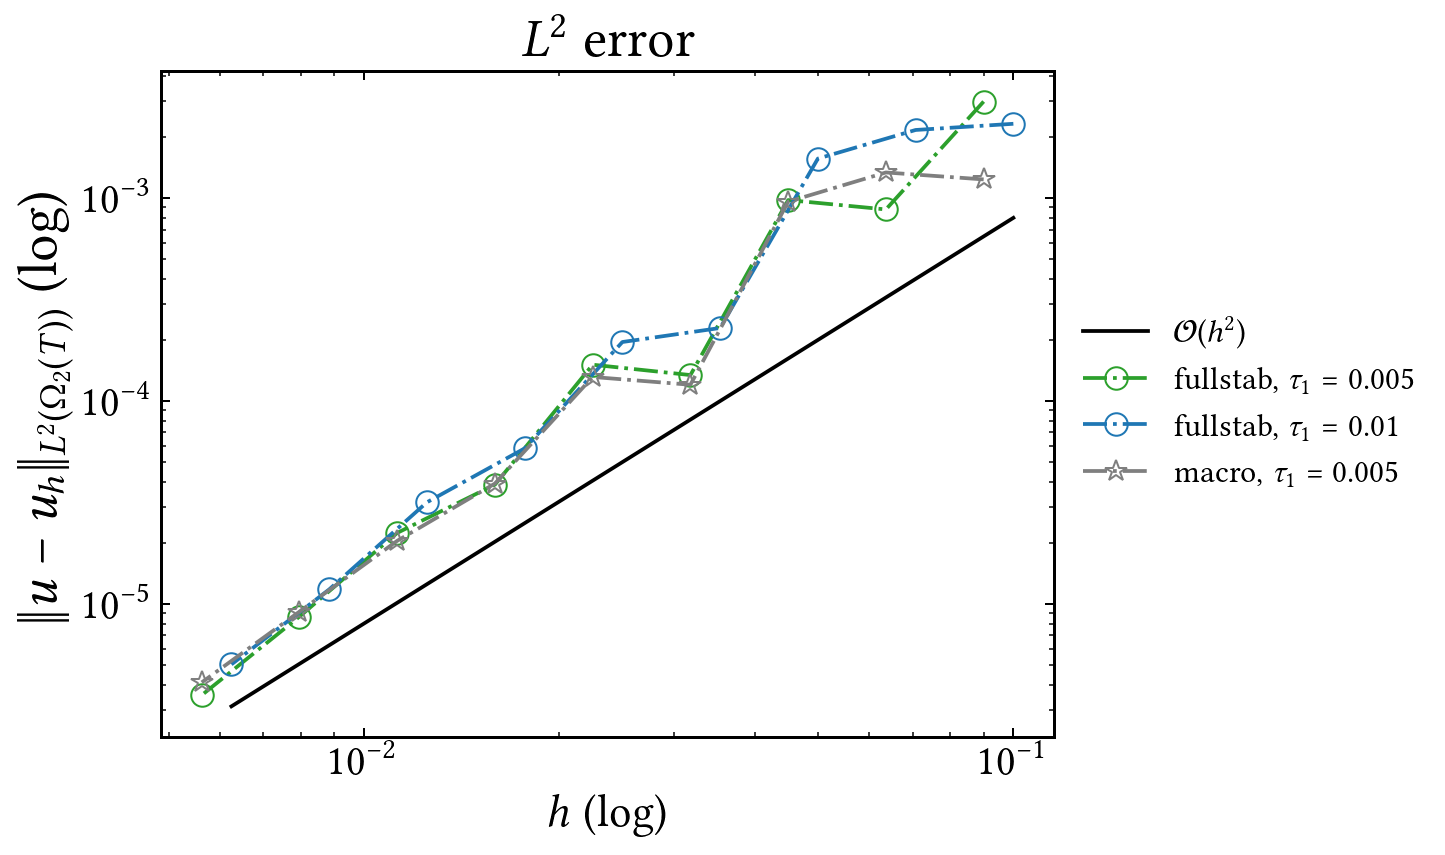

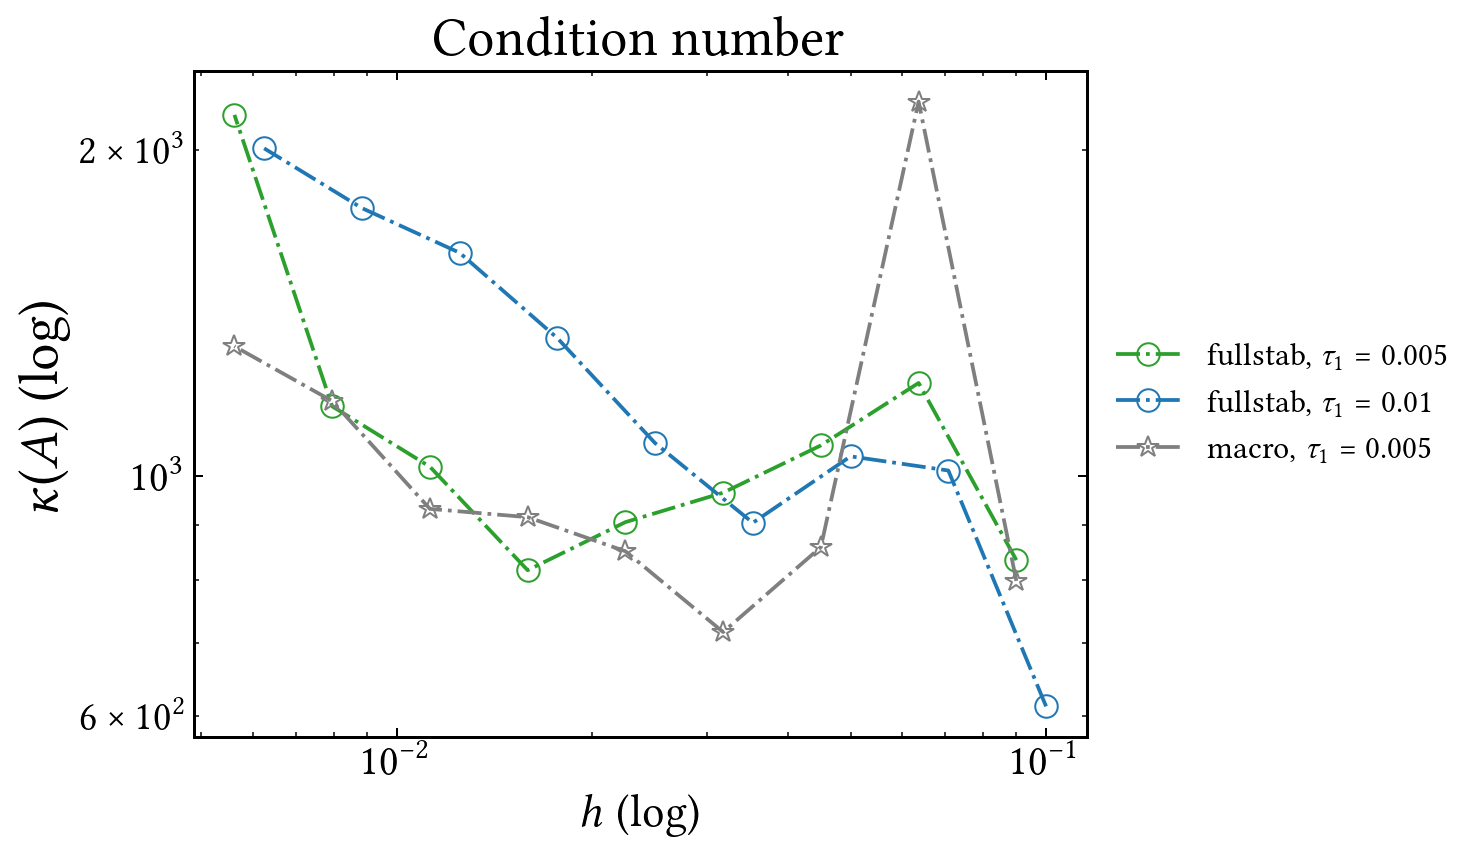

In [9]:
### full stabilization, tau1 = 10^-4

L2_error_classical_fullstab_tau_10neg4 = np.array([0.00162976, 0.000687056, 9.14554e-05, 1.98109e-05, 4.96953e-06])
condition_number_classical_fullstab_tau_10neg4 = np.array([1.079255e+04,3.207211e+04,2.044484e+04,1.802600e+04,1.683970e+04])

### full stabilization, tau1 = 10^-3

L2_error_classical_fullstab_tau10neg3 = np.array([0.00196179, 0.00085557, 0.000102287, 2.0926e-05, 5.23572e-06])
condition_number_classical_fullstab_tau10neg3 = np.array([1.976487e+03,3.297986e+03,2.224912e+03,2.049610e+03,2.008582e+03])

# why do I get different results when rerunning it now??
#[0.00127942, 0.000667165, 5.89188e-05, 1.52822e-05, 4.35081e-06]
#[1.976487e+03,2.311461e+03,3.693213e+03,2.430702e+03,2.048491e+03]

L2_error_classical_fullstab_tau10neg3 = np.array([0.00196179, 0.000669214, 7.95708e-05, 1.94308e-05, 5.14938e-06])
condition_number_classical_fullstab_tau10neg3 = np.array([1.976487e+03,1.576270e+03,1.901933e+03,1.062318e+03,1.541981e+03])

# higher order interpolation of rhs fcts etc..
L2_error_classical_fullstab_tau10neg3 = np.array([0.00127782, 0.000666985, 5.89032e-05, 1.52813e-05, 4.35075e-06])
condition_number_classical_fullstab_tau10neg3 = np.array([1.976487e+03,1.576270e+03,1.901933e+03,1.062318e+03,1.541981e+03])

L2_error_classical_fullstab_tau10neg3_ = np.array([0.00127782, 0.00142677, 0.00103088, 0.000126538, 0.000132912, 4.02495e-05, 2.26954e-05, 9.36092e-06, 4.21263e-06])
condition_number_classical_fullstab_tau10neg3_ = np.array([1.976487e+03,2.311461e+03,3.693213e+03,2.430702e+03,2.048491e+03,1.263476e+03,2.365925e+03,1.998279e+03,2.482530e+03])


### full stabilization, tau1 = 5\cdot 10^-3 = 0.005
L2_error_classical_fullstab_tau0005_ = np.array([0.00184519, 0.00186007, 0.0013576, 0.000176698, 0.000167869, 4.98153e-05, 2.7698e-05, 1.06845e-05, 4.65996e-06])
condition_number_classical_fullstab_tau0005_ = np.array([7.057557e+02,9.767618e+02,1.108942e+03,1.003231e+03,9.855805e+02,1.157436e+03,1.506365e+03,1.237822e+03,1.775734e+03])

# same but with shifted h

L2_error_classical_fullstab_tau0005_shifted = np.array([0.00299568, 0.000880222, 0.00097908, 0.000134302, 0.000151055, 3.87143e-05, 2.23829e-05, 8.655e-06, 3.54755e-06])
condition_number_classical_fullstab_tau0005_shifted = np.array([8.354535e+02,1.217775e+03,1.066268e+03,9.642110e+02,9.056818e+02,8.175988e+02,1.018943e+03,1.158721e+03,2.153914e+03])


### macro stabilization, tau1 = 10^-3

L2_error_classical_macro_tau10neg3 = np.array([0.00190423, 0.000699472, 9.28991e-05, 1.99585e-05, 5.02186e-06])
condition_number_classical_macro_tau10neg3 = np.array([2.054446e+03,3.296487e+03,2.129623e+03,1.921860e+03,1.848216e+03])


### macro stabilization, tau1 = 0.009

# delta = 0.16
L2_error_classical_macro_tau0009_016_ = np.array([0.00126945, 0.00141705, 0.00102551, 0.000124775, 0.000138119, 4.05614e-05, 2.07177e-05, 9.44057e-06, 4.18009e-06])
condition_number_classical_macro_tau0009_016_ = np.array([7.011862e+02,1.909071e+03,8.756989e+02,1.010658e+03,1.207723e+03,1.420103e+03,1.544814e+03,1.738519e+03,2.032268e+03])


### macro stabilization, tau1 = 0.005

# delta = 0.16
L2_error_classical_macro_tau0005_016_ = np.array([0.00123765, 0.00133929, 0.000960959, 0.000120309, 0.000131424, 3.91987e-05, 2.04577e-05, 9.15659e-06, 4.10133e-06])
condition_number_classical_macro_tau0005_016_ = np.array([7.992273e+02,2.215918e+03,8.588984e+02,7.168268e+02,8.512836e+02,9.153193e+02,9.316134e+02,1.171815e+03,1.316533e+03])

### macro stabilization, tau1 = 0.005 but new hs
hnew = [0.09, 0.0636396, 0.045, 0.0318198, 0.0225, 0.0159099, 0.01125, 0.00795495, 0.005625]

# delta = 0.16
L2_error_classical_macro_tau0005_016_shifted = np.array([0.00219028, 0.000793761, 0.000680787, 0.00010186, 0.000102023, 3.08815e-05, 1.71269e-05, 7.15152e-06, 3.16113e-06])
condition_number_classical_macro_tau0005_016_shifted = np.array([1.158833e+03,1.155093e+03,8.758213e+02,7.319238e+02,8.727330e+02,1.057395e+03,1.151513e+03,1.353322e+03,1.156822e+03])



### full stabilization, tau1 = 0.01

L2_error_classical_fullstab_tau001 = np.array([0.00292037, 0.00135786, 0.000152535, 2.65262e-05, 6.15394e-06])
condition_number_classical_fullstab_tau001 = np.array([6.120428e+02,1.089736e+03,9.989276e+02,1.242560e+03,1.892578e+03])

L2_error_classical_fullstab_tau001_ = np.array([0.00232733, 0.00216937, 0.0015674, 0.000229169, 0.000195434, 5.84236e-05, 3.168e-05, 1.17837e-05, 5.03069e-06])
condition_number_classical_fullstab_tau001_ = np.array([6.120428e+02,1.010817e+03,1.041702e+03,9.043817e+02,1.071429e+03,1.339623e+03,1.606382e+03,1.766501e+03,2.005961e+03])

### macro stabilization, tau1 = 0.01

# delta = 0.25
L2_error_classical_macro_tau001 = np.array([0.00219596, 0.000831436, 0.000106268, 2.15872e-05, 5.32923e-06])
condition_number_classical_macro_tau001 = np.array([6.164696e+02,9.949605e+02,1.137898e+03,1.215620e+03,1.521604e+03])

# delta = 0.1
L2_error_classical_macro_tau001 = np.array([0.00185532, 0.000751872, 9.30532e-05, 2.02761e-05, 5.21017e-06])
condition_number_classical_macro_tau001 = np.array([6.943391e+02,2.340922e+03,1.111555e+03,3.015267e+03,3.943104e+03])

# delta = 0.125
L2_error_classical_macro_tau001 = np.array([0.00192497, 0.00075419, 9.36223e-05, 2.03036e-05, 5.23946e-06])
condition_number_classical_macro_tau001 = np.array([7.069315e+02,1.662935e+03,1.111556e+03,3.015267e+03,1.978349e+03])

# delta = 0.15
L2_error_classical_macro_tau001 = np.array([0.00193659, 0.00080429, 9.38819e-05, 2.05218e-05, 5.24914e-06])
condition_number_classical_macro_tau001 = np.array([7.069315e+02,1.107377e+03,1.111556e+03,1.767224e+03,1.667170e+03])

# delta = 0.15
L2_error_classical_macro_tau001_015 = np.array([0.00193659, 0.000605155, 7.88211e-05, 1.96516e-05, 5.1965e-06])
condition_number_classical_macro_tau001_015 = np.array([7.069315e+02,1.098808e+03,1.095040e+03,1.767217e+03,1.600557e+03])

# delta = 0.15, higher order interpolation of rhs fcts etc..
L2_error_classical_macro_tau001_015 = np.array([0.00127481, 0.000582121, 6.05828e-05, 1.5698e-05, 4.41717e-06])
condition_number_classical_macro_tau001_015 = np.array([7.069315e+02,1.098808e+03,1.095040e+03,1.767217e+03,1.600557e+03])

L2_error_classical_macro_tau001_015_ = np.array([0.00127481, 0.00142855, 0.00103633, 0.00012555, 0.00013673, 4.07924e-05, 2.08688e-05, 9.37242e-06, 4.18032e-06])
condition_number_classical_macro_tau001_015_ = np.array([7.069315e+02,1.924418e+03,1.153741e+03,1.088831e+03,1.307690e+03,1.548665e+03,1.699996e+03,2.418923e+03,2.215099e+03])

# delta = 0.16
L2_error_classical_macro_tau001_016_ = np.array([0.00127481, 0.00143312, 0.00103755, 0.000125709, 0.000139471, 4.08421e-05, 2.07863e-05, 9.50494e-06, 4.19861e-06])
condition_number_classical_macro_tau001_016_ = np.array([7.069315e+02,1.924418e+03,9.219729e+02,1.088831e+03,1.307711e+03,1.548665e+03,1.699996e+03,1.885931e+03,2.215096e+03])


### full stabilization, tau1 = 0.1

# Classical
L2_error_classical_fullstab_tau01 = np.array([0.00542089, 0.00244947, 0.000377116, 6.39366e-05, 1.17803e-05])
condition_number_classical_fullstab_tau01 = np.array([1.349375e+03,2.558591e+03,3.040703e+03,5.943479e+03,1.087193e+04])



### macro stabilization, tau1 = 0.1

# Classical
L2_error_classical_macro_tau01 = np.array([0.00212688, 0.000676719, 8.64057e-05, 2.14168e-05, 6.47969e-06])
condition_number_classical_macro_tau01 = np.array([3.785187e+03,3.675500e+03,9.072552e+03,1.574169e+04,1.171317e+04])


### full stabilization, tau1 = 1

# Classical
L2_error_classical_fullstab_tau1 = np.array( [0.00600931, 0.0053343, 0.00175196, 0.000366866, 6.06956e-05])
condition_number_classical_fullstab_tau1 = np.array([3.772811e+03,1.089620e+04,1.828597e+04,3.732113e+04,7.724936e+04])



### macro stabilization, tau1 = 1

# Classical
L2_error_classical_macro_tau1 = np.array([0.00275983, 0.00101848, 0.000172693, 3.49613e-05, 8.86506e-06])
condition_number_classical_macro_tau1 = np.array([1.883824e+04,4.657785e+04,6.960076e+04,5.834171e+04,1.008861e+05])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
h_ = [0.1, 0.0707107, 0.05, 0.0353553, 0.025, 0.0176777, 0.0125, 0.00883883, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, .8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* L2 error

#ax3.loglog(h, L2_error_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
#ax3.loglog(h_, L2_error_classical_fullstab_tau10neg3_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 10^{-3}$")

#ax3.loglog(h_, L2_error_classical_fullstab_tau0005_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.005$")
ax3.loglog(hnew, L2_error_classical_fullstab_tau0005_shifted,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.005$")
#ax3.loglog(h, L2_error_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
ax3.loglog(h_, L2_error_classical_fullstab_tau001_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")

#ax3.loglog(h_, L2_error_classical_macro_tau001_015_,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
#ax3.loglog(h_, L2_error_classical_macro_tau0005_016_,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"macro, $\tau_1 = 0.005$")
ax3.loglog(hnew, L2_error_classical_macro_tau0005_016_,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"macro, $\tau_1 = 0.005$")

#ax3.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"fullstab, $\tau_1 = 0.1$")
#ax3.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"macro, $\tau_1 = 0.1$")
#ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")

plt.show()

fig2, ax2 = plt.subplots()

#ax2.loglog(h, 5e3*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

#* Condition number

#ax2.loglog(h, condition_number_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
#ax2.loglog(h_, condition_number_classical_fullstab_tau10neg3_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 10^{-3}$")

#ax2.loglog(h_, condition_number_classical_fullstab_tau0005_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.005$")
ax2.loglog(hnew, condition_number_classical_fullstab_tau0005_shifted,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.005$")
#ax2.loglog(h, condition_number_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
ax2.loglog(h_, condition_number_classical_fullstab_tau001_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")

#ax2.loglog(h_, condition_number_classical_macro_tau001_015_,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
ax2.loglog(hnew, condition_number_classical_macro_tau0005_016_,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"macro, $\tau_1 = 0.005$")

#ax2.loglog(h, condition_number_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"fullstab, $\tau_1 = 0.1$")
#ax2.loglog(h, condition_number_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"macro, $\tau_1 = 0.1$")
#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")
ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")

plt.show()

### Macro study $\Omega_2(t)$ Discontinuous Galerkin Example 1
$\Delta t_n = h/3$, $n=3$ and $\delta = 0.25$. Here, $\tau_0 = \tau_1$.

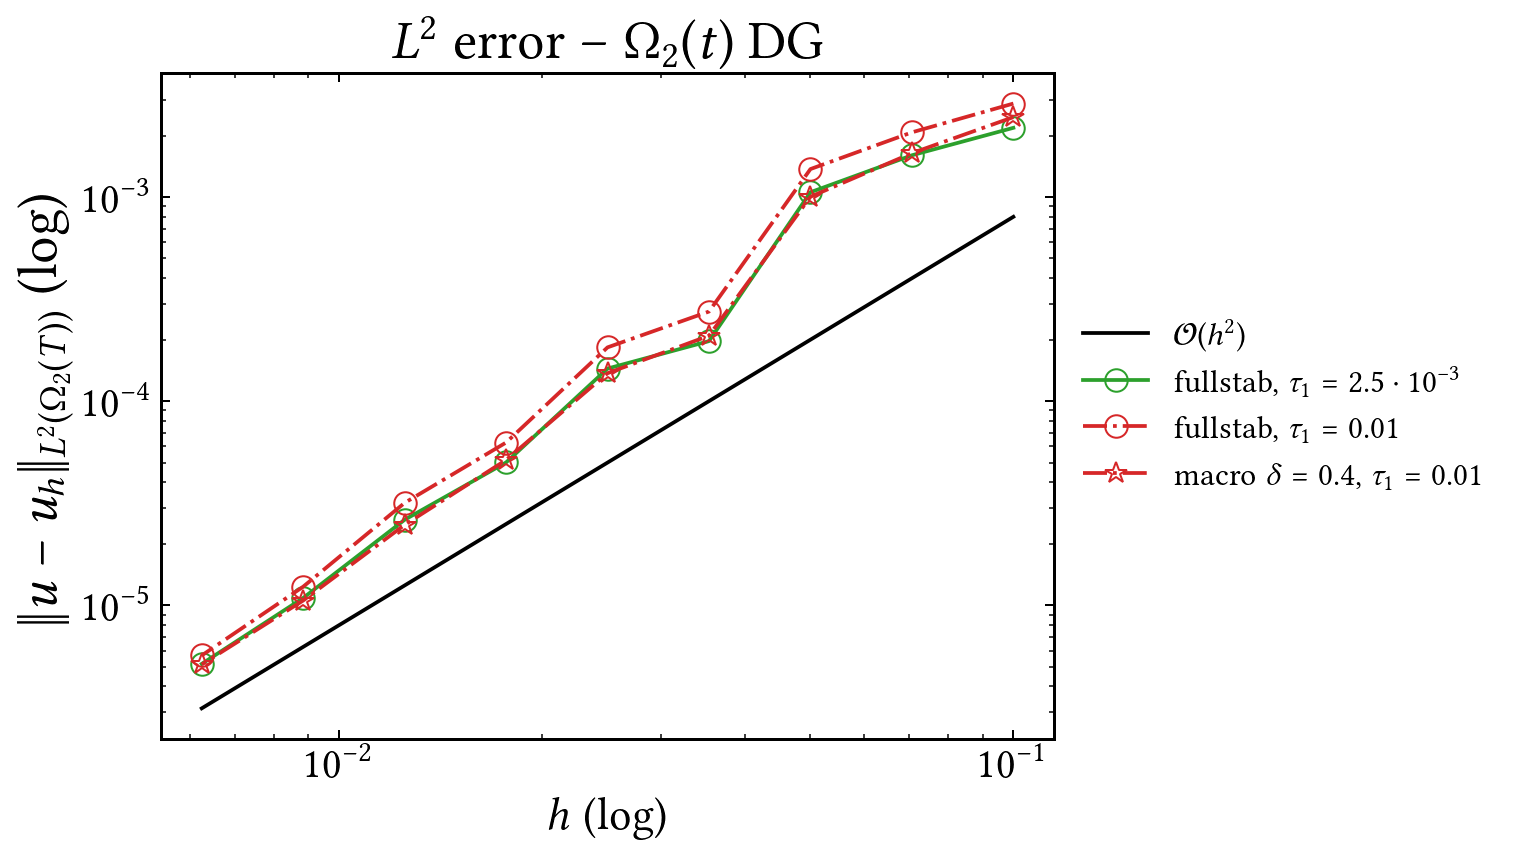

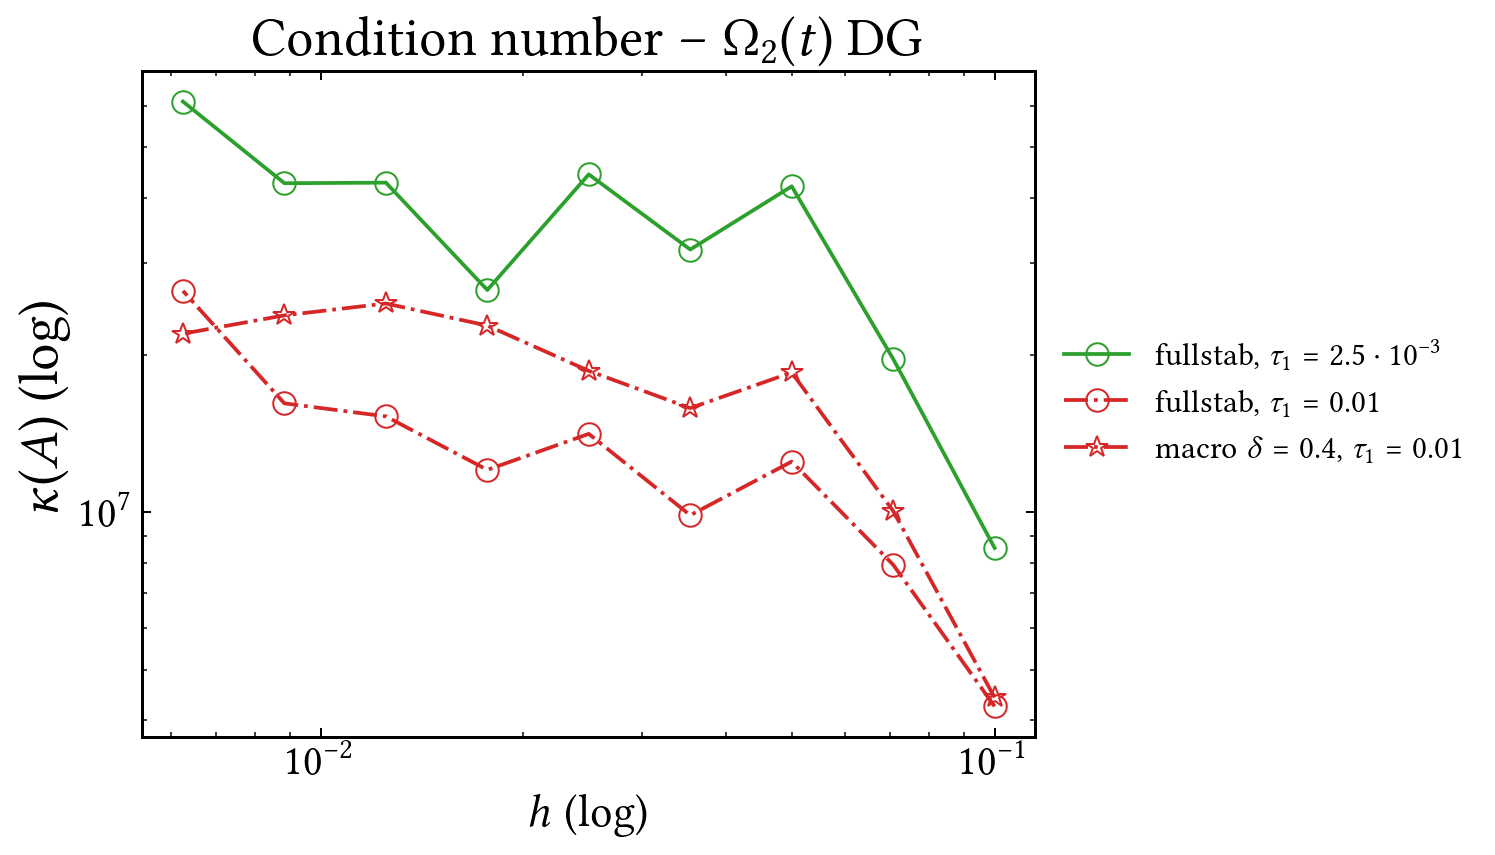

In [10]:
### full stabilization, tau1 = 10^-4

# Classical
L2_error_classical_fullstab_tau_10neg4 = np.array([0.00162927, 0.000534823, 7.47155e-05, 1.87426e-05, 4.90303e-06])
condition_number_classical_fullstab_tau_10neg4 = np.array([8.388533e+07,2.889320e+08,5.494728e+08,3.011882e+08,8.644128e+08])


### full stabilization, tau1 = 3*10^-4

# Classical
L2_error_classical_fullstab_tau3x10neg4 = np.array([0.00175583, 0.000577972, 7.59427e-05, 1.89312e-05, 4.97725e-06])
condition_number_classical_fullstab_tau3x10neg4 = np.array([3.905166e+07,1.050874e+08,2.092137e+08,1.095025e+08,3.095152e+08])



### full stabilization, tau1 = 5*10^-4

# Classical
L2_error_classical_fullstab_tau5x10neg4 = np.array([0.0018326, 0.000608507, 7.69802e-05, 1.9079e-05, 5.0296e-06])
condition_number_classical_fullstab_tau5x10neg4 = np.array([2.696951e+07,6.764966e+07,1.346868e+08,6.977204e+07,1.917464e+08])


### full stabilization, tau1 = 10^-3

# Classical
L2_error_classical_fullstab_tau10neg3 = np.array([0.0019571, 0.000666694, 7.9345e-05, 1.93976e-05, 5.12695e-06])
condition_number_classical_fullstab_tau10neg3 = np.array([1.618166e+07,3.908247e+07,7.408853e+07,3.923093e+07,1.013655e+08])

# Dirichlet
# L2_error_classical_fullstab_tau10neg3 = np.array([0.00125872, 0.000430181, 8.15047e-05, 2.0597e-05, 5.31591e-06])
# condition_number_classical_fullstab_tau10neg3 = np.array([1.162622e+07,2.995536e+07,6.328272e+07,3.164767e+07,9.322093e+07])


### full stabilization, tau1 = 3*10^-3

# Classical
L2_error_classical_fullstab_tau3x10neg3 = np.array([0.00224209, 0.00080887, 8.76787e-05, 2.04407e-05, 5.36441e-06])
condition_number_classical_fullstab_tau3x10neg3 = np.array([7.646064e+06,1.837465e+07,2.911526e+07,1.887242e+07,3.918332e+07])

L2_error_classical_fullstab_tau3x10neg3_ = np.array([0.00218321, 0.00160173, 0.00105581, 0.000196813, 0.00014444, 5.00785e-05, 2.62323e-05, 1.08578e-05, 5.16042e-06])
condition_number_classical_fullstab_tau3x10neg3_ = np.array([8.549640e+06,1.966836e+07,4.205845e+07,3.183754e+07,4.433554e+07,2.663969e+07,4.274800e+07,4.263887e+07,6.110607e+07])



### full stabilization, tau1 = 5*10^-3

# Classical
L2_error_classical_fullstab_tau5x10neg3 = np.array([0.00244778, 0.000900232, 9.51962e-05, 2.13419e-05, 5.52519e-06])
condition_number_classical_fullstab_tau5x10neg3 = np.array([5.814216e+06,1.318701e+07,1.915972e+07,1.461914e+07,2.735828e+07])


L2_error_classical_fullstab_tau5x10neg3_ = np.array([0.00244778, 0.00179654, 0.00118888, 0.000226366, 0.000159505, 5.48308e-05, 2.83713e-05, 1.14259e-05, 5.35979e-06])
condition_number_classical_fullstab_tau5x10neg3_ = np.array([5.814216e+06,1.227778e+07,2.260045e+07,1.751895e+07,2.441507e+07,1.792450e+07,2.392518e+07,2.529515e+07,3.997837e+07])
numb_edges = [28, 49, 70, 90, 143, 194, 281, 378, 548]

### full stabilization, tau1 = 0.01

# Classical

L2_error_classical_fullstab_tau001 = np.array([0.00287124, 0.00106049, 0.000112663, 2.34181e-05, 5.83944e-06])
condition_number_classical_fullstab_tau001 = np.array([4.254279e+06,8.481436e+06,1.106484e+07,1.151623e+07,1.945478e+07])

L2_error_classical_fullstab_tau001_ = np.array([0.00287124, 0.00207487, 0.00137105, 0.000274792, 0.000183443, 6.26961e-05, 3.17377e-05, 1.23279e-05, 5.67407e-06])
condition_number_classical_fullstab_tau001_ = np.array([4.254279e+06,7.940951e+06,1.250650e+07,9.875529e+06,1.413240e+07,1.206005e+07,1.526469e+07,1.616480e+07,2.653477e+07])
numb_edges = [28, 49, 70, 90, 143, 194, 281, 378, 548]

# dirichlet
# L2_error_classical_fullstab_tau001 = np.array([0.00169968, 0.000672926, 0.000124557, 2.86896e-05, 6.67552e-06])
# condition_number_classical_fullstab_tau001 = np.array([2.186760e+06,4.537582e+06,8.731403e+06,5.920934e+06,1.043646e+07])


### macro stabilization, tau1 = 0.01

# Classical
# delta = 0.15
L2_error_classical_macro_tau001 = np.array([0.0019042, 0.000593161, 7.59566e-05, 1.92785e-05, 5.08844e-06])
condition_number_classical_macro_tau001 = np.array([6.592439e+06,1.601871e+07,1.568717e+07,2.118698e+07,2.782446e+07])


# delta = 0.4
L2_error_classical_macro_tau001 = np.array([0.00225312, 0.000714086, 9.18442e-05, 2.11955e-05, 5.22075e-06])
condition_number_classical_macro_tau001 = np.array([4.415543e+06,9.705055e+06,1.332481e+07,1.386798e+07,2.307733e+07])

# same as the above two
L2_error_classical_macro_tau001_04 = np.array([0.00246315, 0.00164084, 0.00100333, 0.000209175, 0.000137049, 5.1482e-05, 2.4766e-05, 1.05485e-05, 5.1261e-06])
condition_number_classical_macro_tau001_04 = np.array([4.423334e+06,1.006275e+07,1.851954e+07,1.582998e+07,1.865244e+07,2.277122e+07,2.510009e+07,2.382012e+07,2.197378e+07])

# delta = 0.45
L2_error_classical_macro_tau001 = np.array([0.00225312, 0.000714086, 9.18442e-05, 2.11955e-05, 5.22075e-06])
condition_number_classical_macro_tau001 = np.array([4.415543e+06,9.705055e+06,1.332481e+07,1.386798e+07,2.307733e+07])

L2_error_classical_macro_tau001_045 = np.array([0.00225312, 0.00164914, 0.0010044, 0.000215955, 0.00014628, 5.21759e-05, 2.55964e-05, 1.07582e-05, 5.09867e-06])
condition_number_classical_macro_tau001_045 = np.array([4.415543e+06,1.010911e+07,3.541892e+07,1.582995e+07,1.865237e+07,2.254106e+07,2.797856e+07,2.366227e+07,2.223616e+07])
numb_edges = [20, 33, 41, 49, 76, 101, 144, 208, 276]

# delta = 0.5
L2_error_classical_macro_tau001_045 = np.array([0.00245741, 0.00183505, 0.00118219, 0.00024209, 0.000173394, 5.84212e-05, 2.75659e-05, 1.17054e-05, 5.50583e-06])
condition_number_classical_macro_tau001_045 = np.array([4.412259e+06,2.012304e+07,1.808354e+07,1.566435e+07,5.420231e+07,3.070975e+07,2.807897e+07,2.876835e+07,2.621795e+07])
numb_edges = [22, 37, 54, 70, 103, 140, 193, 297, 427]

### full stabilization, tau1 = 0.02

# Classical

L2_error_classical_fullstab_tau002 = np.array([0.00352617, 0.00128565, 0.000144909, 2.73976e-05, 6.37752e-06])
condition_number_classical_fullstab_tau002 = np.array([3.128127e+06,5.638099e+06,6.521139e+06,9.399974e+06,1.557944e+07])

### full stabilization, tau1 = 0.015
L2_error_classical_fullstab_tau0015 = np.array([0.00322426, 0.00118205, 0.00012915, 2.54221e-05, 6.11458e-06])
condition_number_classical_fullstab_tau0015 = np.array([3.561270e+06,6.639256e+06,8.098375e+06,1.020043e+07,1.688443e+07])


### full stabilization, tau1 = 0.1

# Classical

L2_error_classical_fullstab_tau01 = np.array([0.00534448, 0.00230071, 0.000344296, 5.59774e-05, 1.03187e-05])
condition_number_classical_fullstab_tau01 = np.array([1.363742e+06,2.652771e+06,3.087619e+06,6.279120e+06,1.153693e+07])

### macro stabilization, tau1 = 0.1

# delta = 0.25
L2_error_classical_macro_tau01 = np.array([0.00237426, 0.000677076, 0.000109319, 2.43374e-05, 5.78171e-06])
condition_number_classical_macro_tau01 = np.array([3.152616e+06,6.528081e+06,8.428116e+06,1.085066e+07,1.540249e+07])

# delta = 0.22
L2_error_classical_macro_tau01 = np.array([0.00223542, 0.000672567, 0.00010817, 2.36774e-05, 5.75986e-06])
condition_number_classical_macro_tau01 = np.array([3.152616e+06,6.528488e+06,1.287824e+07,1.124954e+07,1.656927e+07])

# delta = 0.25, alternative macro stabilization
L2_error_classical_macro_tau01_alt = np.array([0.00258603, 0.00074756, 0.000132257, 3.22668e-05, 6.48584e-06])
condition_number_classical_macro_tau01_alt = np.array([3.109638e+06,6.529232e+06,8.428163e+06,1.085066e+07,1.499971e+07])

# delta = 0.1, alternative macro stabilization
#L2_error_classical_macro_tau01_alt = np.array([0.00189543, 0.000582007, 8.07054e-05, 2.08879e-05, 5.71029e-06])
#condition_number_classical_macro_tau01_alt = np.array([5.466052e+06,3.649329e+07,1.391340e+07,3.054341e+07,3.698337e+07])



### full stabilization, tau1 = 0.5


# Classical

L2_error_classical_fullstab_tau05 = np.array([0.00592278, 0.00407053, 0.000945725, 0.000163998, 2.57403e-05])
condition_number_classical_fullstab_tau05 = np.array([5.999116e+05,1.362273e+06,2.108157e+06,4.505374e+06,9.181684e+06])


### full stabilization, tau1 = 1

L2_error_classical_fullstab_tau1 = np.array([0.00598463, 0.00466541, 0.00141501, 0.000269692, 4.18167e-05])
condition_number_classical_fullstab_tau1 = np.array([4.570535e+05,1.049834e+06,1.813925e+06,3.939078e+06,8.327327e+06])

## tau = 1, fullstab, dirichlet

# L2_error_classical_fullstab_tau1 = np.array([0.00349012, 0.00151967, 0.000597063, 0.000170001, 4.90069e-05])
# condition_number_classical_fullstab_tau1 = np.array([2.096360e+05,4.898381e+05,1.021841e+06,1.571412e+06,2.276761e+06])


### macro stabilization, tau1 = 1

# delta = 0.1
L2_error_classical_macro_tau1 = np.array([0.00185403, 0.000514736, 7.67799e-05, 1.94224e-05, 5.48314e-06])
condition_number_classical_macro_tau1 = np.array([3.457592e+07,4.550795e+07,4.426561e+07,1.008998e+08,8.458555e+07])

# delta = 0.15
L2_error_classical_macro_tau1 = np.array([0.00200373, 0.000654558, 8.01973e-05, 2.03587e-05, 5.98799e-06])
condition_number_classical_macro_tau1 = np.array([5.269798e+06,6.138081e+06,1.388156e+07,1.754038e+07,2.186093e+07])

# delta = 0.16
L2_error_classical_macro_tau1_016 = np.array([0.00200373, 0.000655187, 8.0718e-05, 2.19386e-05, 5.99922e-06])
condition_number_classical_macro_tau1_016 = np.array([5.269798e+06,6.138081e+06,1.242224e+07,1.748727e+07,1.708933e+07])


# delta = 0.17
L2_error_classical_macro_tau1_017 = np.array([0.00208864, 0.000661452, 8.71904e-05, 2.18893e-05, 6.00856e-06])
condition_number_classical_macro_tau1_017 = np.array([5.269798e+06,6.138081e+06,1.242224e+07,1.493415e+07,1.708906e+07])

# delta = 0.2
L2_error_classical_macro_tau1_02 = np.array([0.00212408, 0.000666899, 9.76856e-05, 2.62433e-05, 6.12783e-06])
condition_number_classical_macro_tau1_02 = np.array([5.269798e+06,6.138083e+06,1.242224e+07,1.471174e+07,1.708906e+07])

# delta = 0.25
L2_error_classical_macro_tau1_025 = np.array([0.00251455, 0.0007014, 0.000120829, 2.68294e-05, 6.18662e-06])
condition_number_classical_macro_tau1_025 = np.array([2.775761e+06,6.136715e+06,8.346006e+06,1.027848e+07,1.457658e+07])


# delta = 0.35
L2_error_classical_macro_tau1_035 = np.array([0.00357227, 0.00237261, 0.00147032, 0.000288374, 0.000207113, 9.442e-05, 3.85919e-05, 1.3772e-05, 7.19146e-06])
condition_number_classical_macro_tau1_035 = np.array([1.641065e+06,4.757013e+06,2.998471e+06,3.787274e+06,9.376301e+06,7.990522e+06,1.180628e+07,1.363610e+07,1.220237e+07])
numb_edges = [15, 27, 37, 39, 64, 83, 110, 165, 219]

# delta = 0.45
L2_error_classical_macro_tau1_045 = np.array([0.002814, 0.00105428, 0.00026827, 5.26626e-05, 1.45358e-05])
condition_number_classical_macro_tau1_045 = np.array([8.663694e+05,2.585041e+06,4.903960e+06,5.846583e+06,1.308478e+07])


# delta = 0.55
L2_error_classical_macro_tau1_055 = np.array([0.00370858, 0.00138095, 0.000352661, 9.07494e-05, 2.84201e-05])
condition_number_classical_macro_tau1_055 = np.array([8.945411e+05,1.390326e+06,3.408938e+06,3.996478e+06,7.462320e+06])


### macro stabilization, tau1 = 20

# delta = 0.25
L2_error_classical_macro_tau20_025 = np.array([0.00255847, 0.00231779, 0.00124676, 0.000213839, 0.000168496, 5.91497e-05, 2.51883e-05, 1.37013e-05, 5.62288e-06])
condition_number_classical_macro_tau20_025 = np.array([2.731893e+06,3.656574e+06,8.500974e+06,7.490582e+06,1.592769e+07,8.909815e+06,1.347490e+07,1.981684e+07,1.951933e+07])
numb_edges = [9, 25, 27, 31, 53, 63, 93, 127, 170]



# alternative macro stabilization, tau1 = 1

# delta = 0.1
L2_error_classical_macro_tau1_01 = np.array([0.0019837, 0.000609106, 8.03472e-05, 2.53121e-05, 6.0196e-06])
condition_number_classical_macro_tau1_01 = np.array([5.274301e+06,9.620250e+06,1.242224e+07,1.748731e+07,3.229329e+07])


# lobatto 4
L2_error_classical_macro_tau1_016_lob4 = np.array([0.00203265, 0.000648918, 8.09147e-05, 2.19072e-05, 5.99711e-06])
condition_number_classical_macro_tau1_016_lob4 = np.array([5.450936e+06,6.187546e+06,1.247258e+07,1.781264e+07,1.787317e+07])

# dirichlet
# L2_error_classical_macro_tau1 = np.array([0.00145585, 0.000492047, 0.000104411, 2.94154e-05, 8.18506e-06])
# condition_number_classical_macro_tau1 = np.array([1.112285e+06,1.673597e+06,2.592496e+06,3.626014e+06,4.646703e+06])



### test with dT = h 
# L2_error_classical_macro_tau1_045 = np.array([0.00498148, 0.00126812, 0.0003527, 7.65474e-05, 1.30452e-05])
# condition_number_classical_macro_tau1_045 = np.array([6.009425e+06,2.626740e+07,1.640652e+07,2.524897e+07,4.402675e+07])

# L2_error_classical_fullstab_tau001 = np.array([0.00627265, 0.00147859, 0.00027339, 4.51953e-05, 8.49529e-06])
# condition_number_classical_fullstab_tau001 = np.array([1.195030e+07,1.827377e+07,1.305162e+07,2.205304e+07,4.384346e+07])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
h_ = [0.1, 0.0707107, 0.05, 0.0353553, 0.025, 0.0176777, 0.0125, 0.00883883, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, .8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* L2 error

#ax3.loglog(h, L2_error_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 1\cdot 10^{-4}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau3x10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 3\cdot 10^{-4}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau5x10neg4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 5\cdot 10^{-4}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 10^{-3}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau3x10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 3\cdot 10^{-3}$")
ax3.loglog(h_, L2_error_classical_fullstab_tau3x10neg3_,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 2.5\cdot 10^{-3}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau5x10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 5\cdot 10^{-3}$")
#ax3.loglog(h_, L2_error_classical_fullstab_tau5x10neg3_,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 5\cdot 10^{-3}$")
#ax3.loglog(h, L2_error_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau0015,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 0.015$")
#ax3.loglog(h, L2_error_classical_fullstab_tau002,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 0.02$")
#ax3.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.01$")
ax3.loglog(h_, L2_error_classical_fullstab_tau001_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.01$")
#ax3.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.1$")
#ax3.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 0.1$")
#ax3.loglog(h, L2_error_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 0.01$")
ax3.loglog(h_, L2_error_classical_macro_tau001_04,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.4$, $\tau_1 = 0.01$")
#ax3.loglog(h_, L2_error_classical_macro_tau001_045,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.45$, $\tau_1 = 0.01$")
#ax3.loglog(h, L2_error_classical_fullstab_tau05,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"fullstab, $\tau_1 = 0.5$")
#ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.15$, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1_016,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.16$, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1_045,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.25$, $\tau_1 = 1$")
#ax3.loglog(h_, L2_error_classical_macro_tau1_035,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.35$, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1_017,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"macro $\delta = 0.17$, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1_055,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C1", label=r"macro $\delta = 0.45$, $\tau_1 = 1$")
#ax3.loglog(h_, L2_error_classical_macro_tau20_025,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.25$, $\tau_1 = 20$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error – $\Omega_2(t)$ DG")

plt.show()

fig2, ax2 = plt.subplots()

#ax2.loglog(h, 1.0e6*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

#* Condition number

#ax2.loglog(h, condition_number_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 1\cdot 10^{-4}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau3x10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 3\cdot 10^{-4}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau5x10neg4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 5\cdot 10^{-4}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 10^{-3}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau3x10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 3\cdot10^{-3}$")
ax2.loglog(h_, condition_number_classical_fullstab_tau3x10neg3_,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 2.5\cdot10^{-3}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau5x10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 5\cdot10^{-3}$")
#ax2.loglog(h_, condition_number_classical_fullstab_tau5x10neg3_,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 5\cdot10^{-3}$")

#ax2.loglog(h, condition_number_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau0015,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 0.015$")
#ax2.loglog(h, condition_number_classical_fullstab_tau002,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 0.02$")

#ax2.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.01$")
ax2.loglog(h_, condition_number_classical_fullstab_tau001_,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.01$")

#ax2.loglog(h, condition_number_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.1$")
#ax2.loglog(h, condition_number_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 0.1$")
#ax2.loglog(h, condition_number_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 0.01$")
ax2.loglog(h_, condition_number_classical_macro_tau001_04,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.4$, $\tau_1 = 0.01$")
#ax2.loglog(h_, condition_number_classical_macro_tau001_045,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.45$, $\tau_1 = 0.01$")
#ax2.loglog(h, condition_number_classical_fullstab_tau05,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"fullstab, $\tau_1 = 0.5$")

#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 1$")

#ax2.loglog(h, condition_number_classical_macro_tau1,  marker='*', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.15$, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_macro_tau1_016,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.17$, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_macro_tau1_045,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.20$, $\tau_1 = 1$")

#ax2.loglog(h_, condition_number_classical_macro_tau1_035,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.30$, $\tau_1 = 1$")

#ax2.loglog(h, condition_number_classical_macro_tau1_017,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"macro $\delta = 0.17$, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_macro_tau1_055,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C1", label=r"macro $\delta = 0.45$, $\tau_1 = 1$")

#ax2.loglog(h_, condition_number_classical_macro_tau20_025,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.25$, $\tau_1 = 20$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number – $\Omega_2(t)$ DG")

plt.show()

### Macro study $\Omega_1(t)$ Discontinuous Galerkin Example 1
$\Delta t_n = h/3$ and $n=3$. Here, $\tau_0 = \tau_1$.

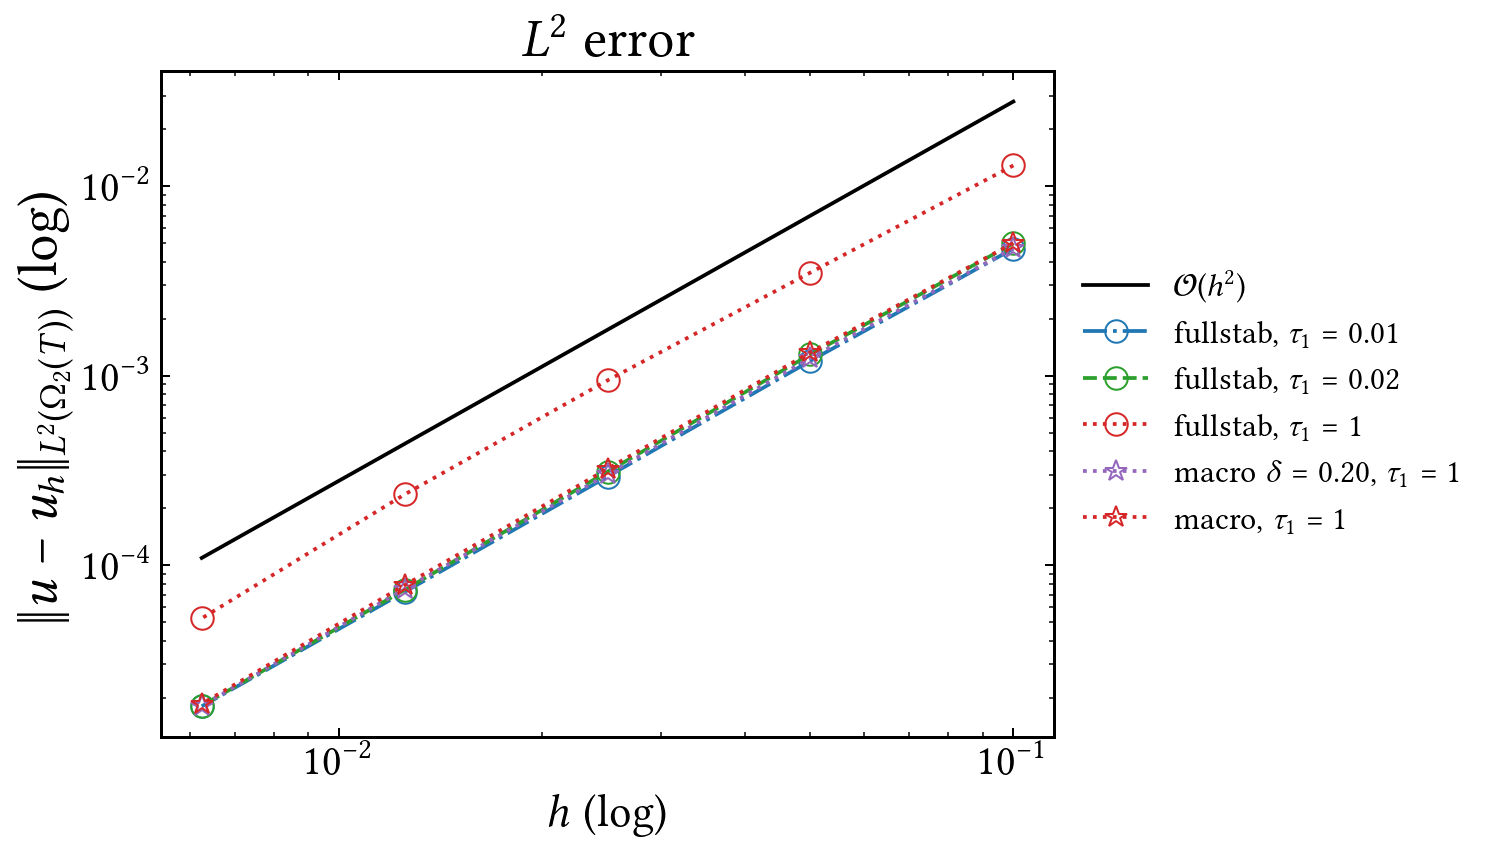

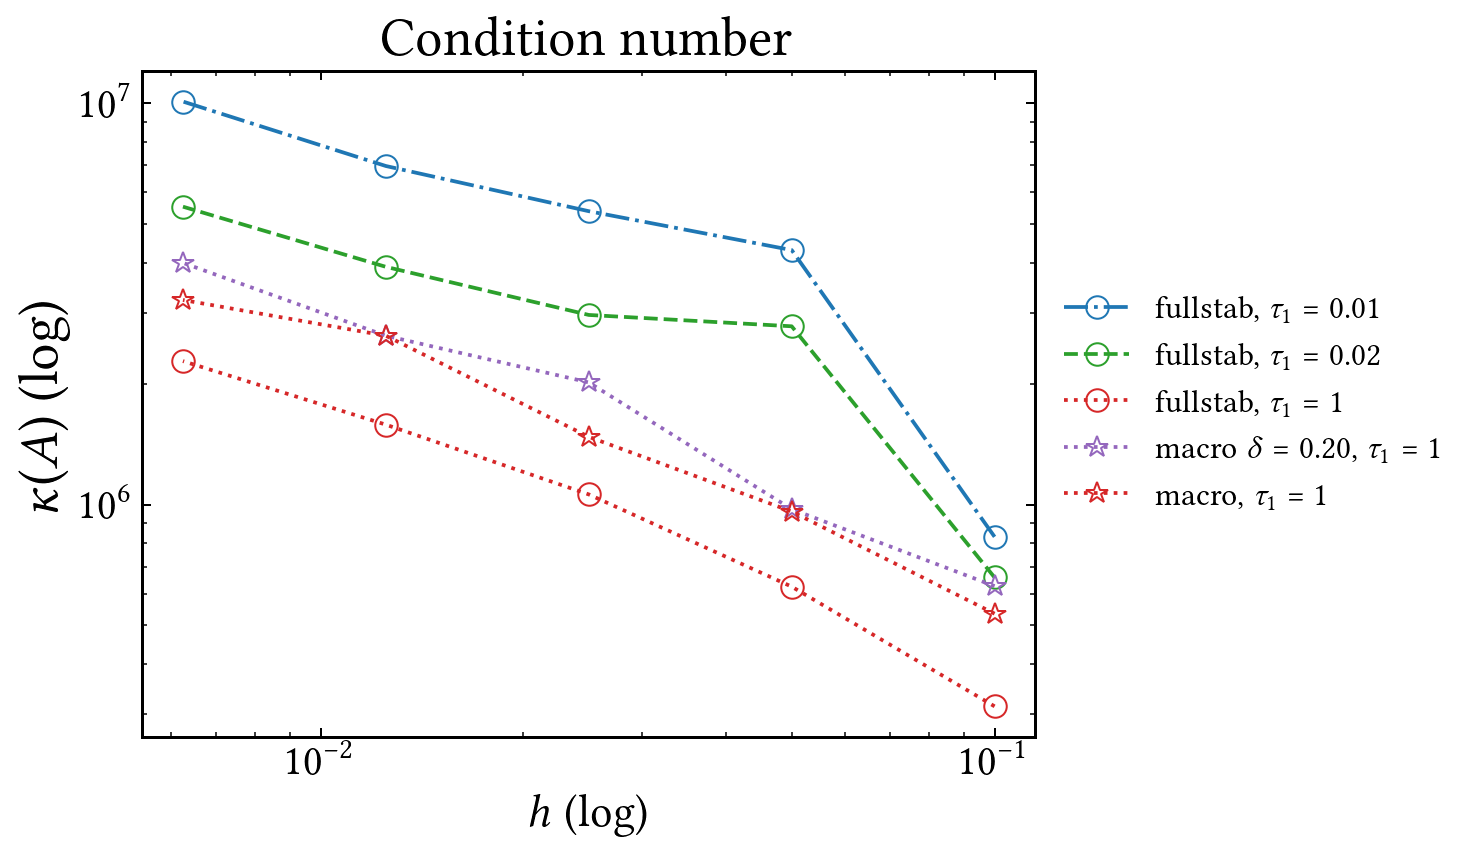

In [11]:
# ### full stabilization, tau1 = 10^-3

# # Classical
# L2_error_classical_fullstab_tau10neg3 = np.array()
# condition_number_classical_fullstab_tau10neg3 = np.array()


### full stabilization, tau1 = 5*10^-3

L2_error_classical_fullstab_tau5x10neg3 = np.array([0.00451864, 0.00115238, 0.000287914, 7.18933e-05, 1.80011e-05])
condition_number_classical_fullstab_tau5x10neg3 = np.array([1.086329e+06,8.077751e+06,1.012588e+07,1.277945e+07,1.931689e+07])
numb_edges = [28, 71, 138, 270, 574]

### full stabilization, tau1 = 0.01

L2_error_classical_fullstab_tau001 = np.array([0.00468952, 0.00119939, 0.000294097, 7.23774e-05, 1.80225e-05])
condition_number_classical_fullstab_tau001 = np.array([8.310022e+05,4.305042e+06,5.380510e+06,6.972751e+06,1.009263e+07])

### full stabilization, tau1 = 0.02

L2_error_classical_fullstab_tau002 = np.array([0.004994, 0.00129762, 0.000311829, 7.41776e-05, 1.81566e-05])
condition_number_classical_fullstab_tau002 = np.array([6.580256e+05,2.780213e+06,2.967211e+06,3.910357e+06,5.521669e+06])


### full stabilization, tau1 = 0.025

L2_error_classical_fullstab_tau0025 = np.array([0.00513229, 0.00134505, 0.000321928, 7.53954e-05, 1.82662e-05])
condition_number_classical_fullstab_tau0025 = np.array([6.065155e+05,2.420370e+06,2.470652e+06,3.263530e+06,4.591048e+06])


### full stabilization, tau1 = 0.05

L2_error_classical_fullstab_tau005 = np.array([0.00573848, 0.00155458, 0.000373501, 8.31479e-05, 1.91212e-05])
condition_number_classical_fullstab_tau005 = np.array([4.611353e+05,1.564856e+06,1.445621e+06,1.962634e+06,2.834793e+06])





### full stabilization, tau1 = 1

L2_error_classical_fullstab_tau1 = np.array([0.0128833, 0.0035074, 0.000945765, 0.000236564, 5.25025e-05])
condition_number_classical_fullstab_tau1 = np.array([3.142301e+05,6.243916e+05,1.059828e+06,1.581329e+06,2.276917e+06])
numb_edges = [28, 71, 147, 285, 551]

### macro stabilization, tau1 = 1

# delta = 0.16
L2_error_classical_macro_tau1_016 = np.array([0.00458226, 0.00123424, 0.000295457, 7.42938e-05, 1.80229e-05])
condition_number_classical_macro_tau1_016 = np.array([9.012703e+05,1.073223e+06,2.460010e+06,6.152541e+06,6.720851e+06])
numb_edges = [4, 17, 32, 69, 145]

# delta = 0.2
L2_error_classical_macro_tau1_020 = np.array([0.00471384, 0.00124193, 0.000301486, 7.50605e-05, 1.81442e-05])
condition_number_classical_macro_tau1_020 = np.array([6.263914e+05,9.738603e+05,2.014669e+06,2.633581e+06,4.000551e+06])
numb_edges = [5, 17, 37, 73, 162]


# delta = 0.25
L2_error_classical_macro_tau1_025 = np.array([0.00501415, 0.00133059, 0.000322824, 7.85161e-05, 1.85733e-05])
condition_number_classical_macro_tau1_025 = np.array([5.347323e+05,9.608117e+05,1.474648e+06,2.633652e+06,3.233091e+06])
numb_edges = [7, 20, 43, 82, 191]


# delta = 0.30
# L2_error_classical_macro_tau1_030 = np.array()
# condition_number_classical_macro_tau1_030 = np.array()
# numb_edges = []

### macro stabilization, tau1 = 5

# delta = 0.15
L2_error_classical_macro_tau5_015 = np.array([0.00458618, 0.00124747, 0.000295461, 7.46041e-05, 1.80229e-05])
condition_number_classical_macro_tau5_015 = np.array([8.109870e+05,9.174333e+05,2.000965e+06,4.561059e+06,5.735794e+06])
numb_edges = [4, 17, 31, 67, 143]


# delta = 0.20
L2_error_classical_macro_tau5_02 = np.array([0.00474064, 0.00124741, 0.000302705, 7.56682e-05, 1.81609e-05])
condition_number_classical_macro_tau5_02 = np.array([6.161580e+05,9.174333e+05,1.990257e+06,2.586207e+06,3.976125e+06])
numb_edges = [5, 17, 37, 73, 162]


# delta = 0.30
L2_error_classical_macro_tau5_03 = np.array([0.00522564, 0.00141519, 0.000367312, 8.51352e-05, 1.96464e-05])
condition_number_classical_macro_tau5_03 = np.array([0,0,0,0,2.963273e+06])
numb_edges = [9, 21, 48, 96, 212]


### macro stabilization, tau1 = 15

# delta = 0.15
# L2_error_classical_macro_tau15_015 = np.array()
# condition_number_classical_macro_tau15_015 = np.array()
numb_edges = [4, 17, 31, 67, 143]


# delta = 0.20
L2_error_classical_macro_tau15_02 = np.array([0.00474668, 0.00124851, 0.000303002, 7.58254e-05, 1.81653e-05])
condition_number_classical_macro_tau15_02 = np.array([8.109870e+05,9.174333e+05,2.000965e+06,4.561059e+06,5.735794e+06])
numb_edges = [5, 17, 37, 73, 162]


### macro stabilization, tau1 = 50
# delta = 0.15
L2_error_classical_macro_tau50_015 = np.array([0.00458981, 0.00124883, 0.000295759, 7.48135e-05, 1.80259e-05])
#condition_number_classical_macro_tau50_015 = np.array()
numb_edges = [4, 17, 31, 67, 143]


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


# h = [0.15,0.1, 0.075,0.05, 0.0375,0.025, 0.01875,0.0125, 0.00625]

# L2_error_classical_fullstab_tau1 = np.array([0.0438761, 0.0128833, 0.00877655, 0.0035074, 0.00211636, 0.000945765, 0.000546651, 0.000236564, 5.25025e-05])
# condition_number_classical_fullstab_tau1 = np.array([1.646648e+05,3.142301e+05,4.146339e+05,6.243916e+05,7.811492e+05,1.059828e+06,1.265341e+06,1.581329e+06,2.276917e+06])

# L2_error_classical_fullstab_tau1 = np.array([0.0128833, 0.00781666, 0.00407765, 0.00164772, 0.000960151, 0.000449596, 0.000228132, 0.000109917, 5.01396e-05, 2.25903e-05])
# condition_number_classical_fullstab_tau1 = np.array([3.142301e+05,4.512493e+05,6.186044e+05,8.310444e+05,1.063011e+06,1.316263e+06,1.587482e+06,1.888588e+06,2.492672e+06, 2.883461e+06])
# numb_edges_big = [28, 49, 71, 94, 147, 197, 285, 382, 551, 782]
# hnew = [0.1, 0.0707107, 0.05, 0.0353553, 0.025, 0.0176777, 0.0125, 0.00883883, 0.00625, 0.00441942]
# dtnew= [0.0333333, 0.0238095, 0.0172414, 0.0119048, 0.00847458, 0.00595238, 0.00420168, 0.00295858, 0.00209205, 0.00147493]


# L2_error_classical_macro_tau1_020 = np.array([0.0129455, 0.00471384,0.00272617, 0.00124193, 0.000703608,0.000301486, 0.000174629,7.50605e-05, 1.81442e-05])
# condition_number_classical_macro_tau1_020 = np.array([3.574634e+05,6.263914e+05,1.098890e+06,9.738603e+05,1.159323e+06,2.014669e+06,2.250400e+06,2.633581e+06,4.000551e+06])


# L2_error_classical_fullstab_tau002 = np.array([0.0142396,0.004994, 0.00301414,0.00129762, 0.000744181,0.000311829, 0.00017334,7.41776e-05, 1.81566e-05])
# condition_number_classical_fullstab_tau002 = np.array([4.360315e+05,6.580256e+05,2.554724e+06,2.780213e+06,3.386088e+06,2.967211e+06,5.266016e+06,3.910357e+06,5.521669e+06])

# L2_error_classical_fullstab_tau001 = np.array([0.0129391,0.00468952, 0.00280821,0.00119939, 0.000696233,0.000294097, 0.000165927,7.23774e-05, 1.80225e-05])
# condition_number_classical_fullstab_tau001 = np.array([8.076270e+05,8.310022e+05,4.081477e+06,4.305042e+06,5.807949e+06,5.380510e+06,1.011103e+07,6.972751e+06,1.009263e+07])

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.8e-0*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* L2 error

#ax3.loglog(h, L2_error_classical_fullstab_tau5x10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 5\cdot 10^{-3}$")
ax3.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax3.loglog(h, L2_error_classical_fullstab_tau002,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.02$")
#ax3.loglog(h, L2_error_classical_fullstab_tau005,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 0.05$")

ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 1$")

#ax3.loglog(h, L2_error_classical_macro_tau1_016,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro $\delta = 0.16$, $\tau_1 = 1$")
ax3.loglog(h, L2_error_classical_macro_tau1_020,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.20$, $\tau_1 = 1$")
ax3.loglog(h, L2_error_classical_macro_tau1_025,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 1$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")
#fig3.savefig("L2_error.pdf", bbox_inches="tight")

plt.show()

fig2, ax2 = plt.subplots()

#ax2.loglog(h, 5.5e5*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

#* Condition number

#ax2.loglog(h, condition_number_classical_fullstab_tau5x10neg3,  marker='o', markersize=9,linestyle="-", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 5\cdot 10^{-3}$")
ax2.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax2.loglog(h, condition_number_classical_fullstab_tau002,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.02$")
#ax2.loglog(h, condition_number_classical_fullstab_tau005,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 0.05$")
ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 1$")
ax2.loglog(h, condition_number_classical_macro_tau1_020,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro $\delta = 0.20$, $\tau_1 = 1$")
ax2.loglog(h, condition_number_classical_macro_tau1_025,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 1$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")
#fig2.savefig("condition_number.pdf", bbox_inches="tight")
plt.show()

### Macro and $\Delta t$ study $\Omega_2(t)$ Example 1
$\Delta t_n$ varies NOT dependantly of $h$, $n=3$ and $\delta = 0.15$.

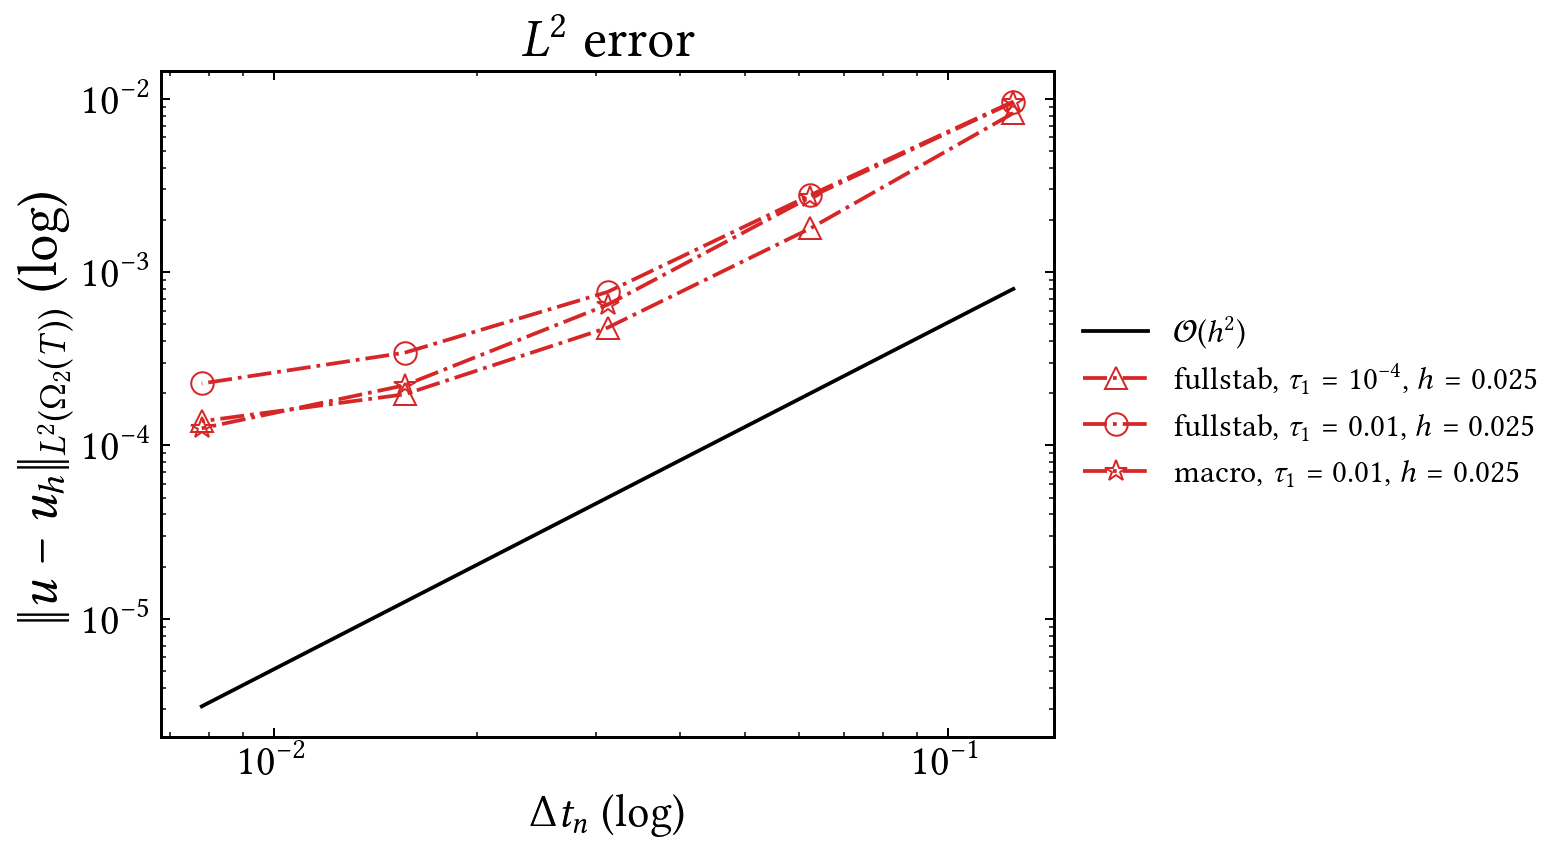

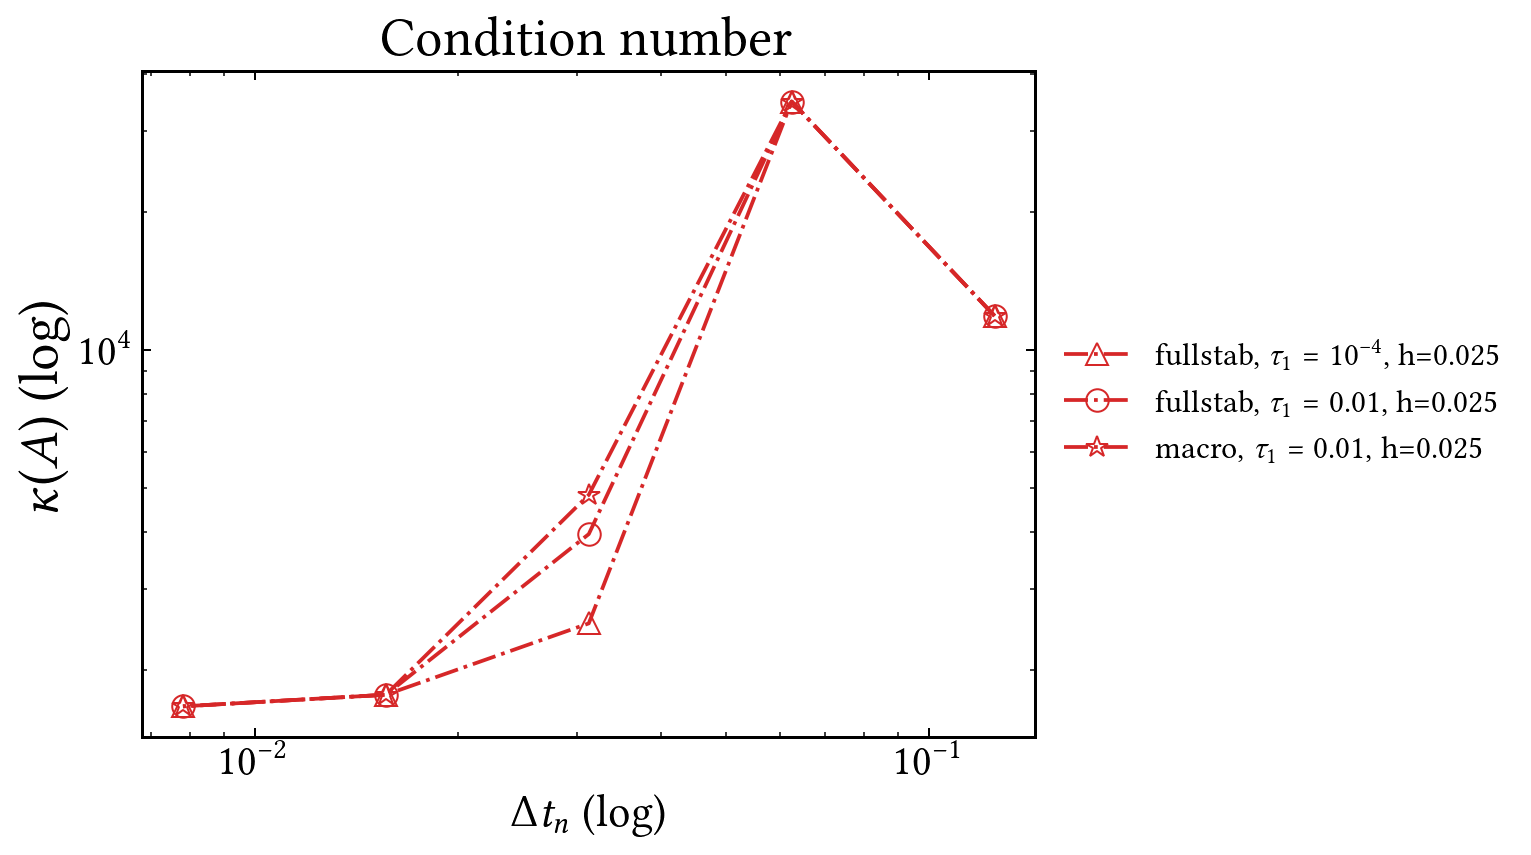

In [12]:
## ----- h = 0.1 ----- ##

# full stabilization, tau1 = 0.01
L2_error_classical_fullstab_tau001_h01 = np.array([0.00771745, 0.00501857, 0.00289359, 0.00196512, 0.00189857])
condition_number_classical_fullstab_tau001_h01 = np.array([1.474410e+03,1.107377e+03,1.111556e+03,1.767224e+03,1.667170e+03])

# macro stabilization, tau1 = 0.01
L2_error_classical_macro_tau001_h01 = np.array([0.00553256, 0.00289554, 0.00194241, 0.00104095, 0.00105606])        # delta = 0.15
condition_number_classical_macro_tau001_h01 = np.array([1.456463e+03,1.107377e+03,1.111556e+03,1.767224e+03,1.667170e+03])

# full stabilization, tau1 = 1e-4
L2_error_classical_fullstab_tau10neg4_h01 = np.array([0.00435216, 0.00240277, 0.00161436, 0.00101538, 0.00102334])
condition_number_classical_fullstab_tau10neg4_h01 = np.array([1.186485e+04,1.107377e+03,1.111556e+03,1.767224e+03,1.667170e+03])


## ----- h = 0.05 ----- ##
# full stabilization, tau1 = 0.01
L2_error_classical_fullstab_tau001_h005 = np.array([0.00427208, 0.00200099, 0.00155495, 0.00135774, 0.000964335])
condition_number_classical_fullstab_tau001_h005 = np.array([1.186485e+04,2.186338e+03,1.111556e+03,1.767224e+03,1.667170e+03])

# macro stabilization, tau1 = 0.01
L2_error_classical_macro_tau001_h005 = np.array([0.00362377, 0.00123519, 0.000908274, 0.000804399, 0.000658655])        # delta = 0.15
condition_number_classical_macro_tau001_h005 = np.array([1.186485e+04,2.954764e+03,1.111556e+03,1.767224e+03,1.667170e+03])

# full stabilization, tau1 = 1e-4
L2_error_classical_fullstab_tau10neg4_h005 = np.array([0.00213598, 0.000886746, 0.000734991, 0.000686368, 0.000542616])
condition_number_classical_fullstab_tau10neg4_h005 = np.array([1.186485e+04,1.795149e+04,1.111556e+03,1.767224e+03,1.667170e+03])

# full stabilization, tau1 = 1
L2_error_classical_fullstab_tau1_h005 = np.array([0.0103308, 0.00699967, 0.00593928, 0.00532464, 0.00456145])
condition_number_classical_fullstab_tau1_h005 = np.array([1.186485e+04,3.484679e+04,1.111556e+03,1.767224e+03,1.667170e+03])


## ----- h = 0.025 ----- ##
# full stabilization, tau1 = 0.01
L2_error_classical_fullstab_tau001_h0025 = np.array([0.00278166, 0.000767662, 0.000342634, 0.000227683, 0.000151781])
condition_number_classical_fullstab_tau001_h0025 = np.array([1.186485e+04,3.484679e+04,2.129613e+03,1.767224e+03,1.667170e+03])

# dt start from 0.25
L2_error_classical_fullstab_tau001_h0025 = np.array([0.00963231, 0.00278166, 0.000767662, 0.000342634, 0.000227683])
condition_number_classical_fullstab_tau001_h0025 = np.array([1.186485e+04,3.484679e+04,3.962375e+03,1.767224e+03,1.667170e+03])

# macro stabilization, tau1 = 0.01
L2_error_classical_macro_tau001_h0025 = np.array([0.00271299, 0.000648058, 0.000222255, 0.000125555, 9.35214e-05])
condition_number_classical_macro_tau001_h0025 = np.array([1.186485e+04,3.484679e+04,3.480352e+03,1.767224e+03,1.667170e+03])

# dt start from 0.25
L2_error_classical_macro_tau001_h0025 = np.array([0.00955186, 0.00271299, 0.000648058, 0.000222255, 0.000125555])
condition_number_classical_macro_tau001_h0025 = np.array([1.186485e+04,3.484679e+04,4.826332e+03,1.767224e+03,1.667170e+03])


# full stabilization, tau1 = 1e-3
L2_error_classical_fullstab_tau10neg3_h0025 = np.array([0.001788, 0.000477601, 0.000197127, 0.000137871, 0.000101936])
condition_number_classical_fullstab_tau10neg3_h0025 = np.array([1.186485e+04,3.484679e+04,2.138042e+03,1.767224e+03,1.667170e+03])

# dt start from 0.25
L2_error_classical_fullstab_tau10neg3_h0025 = np.array([0.00826121, 0.001788, 0.000477601, 0.000197127, 0.000137871])
condition_number_classical_fullstab_tau10neg3_h0025 = np.array([1.186485e+04,3.484679e+04,2.529618e+03,1.767224e+03,1.667170e+03])


# full stabilization, tau1 = 1e-4
L2_error_classical_fullstab_tau10neg4_h0025 = np.array([0.00158218, 0.000398748, 0.000161045, 0.000112815, 9.12042e-05])
condition_number_classical_fullstab_tau10neg4_h0025 = np.array([1.186485e+04,3.484679e+04,1.678882e+04,1.767224e+03,1.667170e+03])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
dt = [0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

fig3, ax3 = plt.subplots()

ax3.loglog(dt, .8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* h = 0.1

# ax3.loglog(dt, L2_error_classical_fullstab_tau10neg4_h01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 10^{-4}$, $h=0.1$")
# ax3.loglog(dt, L2_error_classical_fullstab_tau001_h01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$, $h=0.1$")
# ax3.loglog(dt, L2_error_classical_macro_tau001_h01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$, $h=0.1$")

#* h = 0.05

# ax3.loglog(dt, L2_error_classical_fullstab_tau10neg4_h005,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 10^{-4}$, $h=0.05$")
# ax3.loglog(dt, L2_error_classical_fullstab_tau001_h005,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.01$, $h=0.05$")
# #ax3.loglog(dt, L2_error_classical_fullstab_tau1_h005,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"fullstab, $\tau_1 = 1$, $h=0.05$")
# ax3.loglog(dt, L2_error_classical_macro_tau001_h005,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 0.01$, $h=0.05$")

#* h = 0.025

ax3.loglog(dt, L2_error_classical_fullstab_tau10neg3_h0025,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$, $h=0.025$")
ax3.loglog(dt, L2_error_classical_fullstab_tau001_h0025,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.01$, $h=0.025$")
ax3.loglog(dt, L2_error_classical_macro_tau001_h0025,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 0.01$, $h=0.025$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")

plt.show()

fig2, ax2 = plt.subplots()

#ax2.loglog(h, 5e3*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")


# ax2.loglog(dt, condition_number_classical_fullstab_tau10neg4_h01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 10^{-4}$, h=$0.1$")
# ax2.loglog(dt, condition_number_classical_fullstab_tau001_h01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$, h=$0.1$")
# ax2.loglog(dt, condition_number_classical_macro_tau001_h01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$, h=$0.1$")


# ax2.loglog(dt, condition_number_classical_fullstab_tau10neg4_h005,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 10^{-4}$, h=$0.05$")
# ax2.loglog(dt, condition_number_classical_fullstab_tau001_h005,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 0.01$, h=$0.05$")
# #ax2.loglog(dt, condition_number_classical_fullstab_tau1_h005,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"fullstab, $\tau_1 = 0.01$, h=$0.05$")
# ax2.loglog(dt, condition_number_classical_macro_tau001_h005,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 0.01$, h=$0.05$")

ax2.loglog(dt, condition_number_classical_fullstab_tau10neg3_h0025,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$, h=$0.025$")
ax2.loglog(dt, condition_number_classical_fullstab_tau001_h0025,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 0.01$, h=$0.025$")
ax2.loglog(dt, condition_number_classical_macro_tau001_h0025,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"macro, $\tau_1 = 0.01$, h=$0.025$")


ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")

plt.show()

### Macro study $\Omega_1(t)$ Example 1
$\Delta t_n = h/3$, $n=3$ and $\delta = 0.25$.
Boundary conditions are Neumann on both outer and inner boundary.

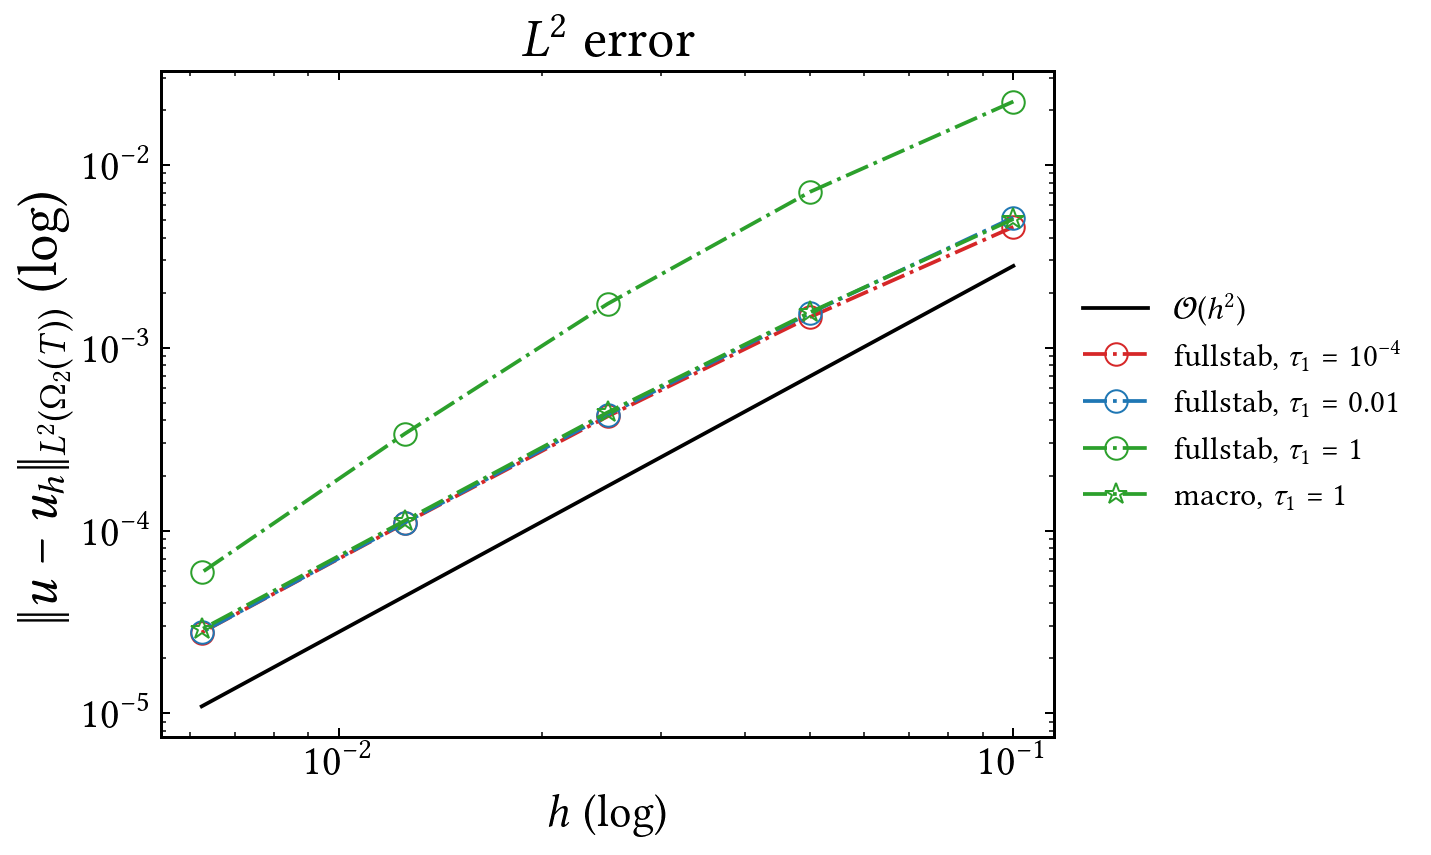

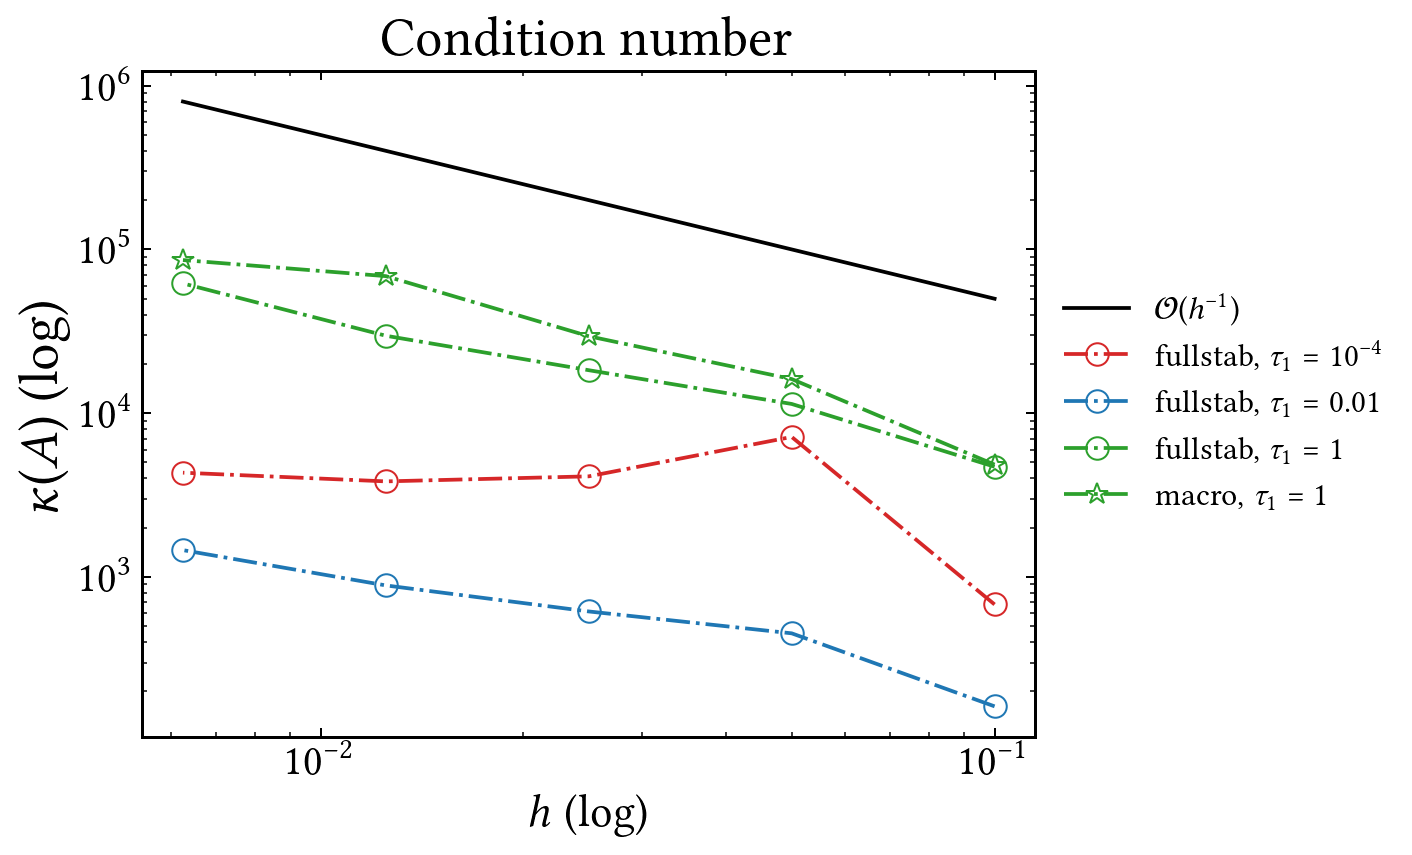

In [13]:
#* N1 & N2

### full stabilization, tau1 = 10^-4

# Classical
L2_error_classical_fullstab_tau_10neg4 = np.array([0.00457662, 0.00147418, 0.000420932, 0.000109622, 2.77045e-05])
condition_number_classical_fullstab_tau_10neg4 = np.array([6.791201e+02,7.161857e+03,4.114481e+03,3.832909e+03,4.331523e+03])


### full stabilization, tau1 = 0.01

# Classical
L2_error_classical_fullstab_tau001 = np.array([0.00514859, 0.00155024, 0.000429739, 0.000110335, 2.7775e-05])
condition_number_classical_fullstab_tau001 = np.array([1.620836e+02,4.525369e+02,6.154443e+02,8.875402e+02,1.457856e+03])

### full stabilization, tau1 = 1

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.022177, 0.00713085, 0.00173586, 0.000337931, 5.90133e-05])
condition_number_classical_fullstab_tau1 = np.array([4.711083e+03,1.138595e+04,1.830067e+04,2.970710e+04,6.200412e+04])


### macro stabilization, tau1 = 1

# Classical
L2_error_classical_macro_tau1 = np.array([0.00505386, 0.00156545, 0.000442621, 0.000113112, 2.88445e-05])
condition_number_classical_macro_tau1 = np.array([4.852058e+03,1.615788e+04,2.950764e+04,6.868458e+04,8.611662e+04])


#* D1 & D2

### full stabilization, tau1 = 0.01

# Classical
L2_error_classical_fullstab_tau001_d1d2 = np.array([0.00471469, 0.00121363, 0.000296169, 7.25064e-05, 1.80201e-05])
condition_number_classical_fullstab_tau001_d1d2 = np.array([2.598525e+02,7.025369e+02,7.622385e+02,1.213436e+03,1.678327e+03])

### full stabilization, tau1 = 1

# Classical
#L2_error_classical_fullstab_tau1_d1d2 = np.array()
#condition_number_classical_fullstab_tau1_d1d2 = np.array()


### macro stabilization, tau1 = 1

# Classical
L2_error_classical_macro_tau1_d1d2 = np.array([0.00552847, 0.0014361, 0.000387475, 9.92777e-05, 2.43823e-05])
condition_number_classical_macro_tau1_d1d2 = np.array([1.833425e+03,3.845017e+03,7.609771e+03,1.379365e+04,1.728337e+04])

# other macro variant
# classical
L2_error_classical_macro2_tau1_d1d2 = np.array([0.0130473, 0.00385808, 0.00110368, 0.000313874, 8.7638e-05])
condition_number_classical_macro2_tau1_d1d2 = np.array([1.379837e+03,2.433560e+03,4.846800e+03,6.466428e+03,1.278523e+04])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* n = 3

ax3.loglog(h, L2_error_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
ax3.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
ax3.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")

plt.show()

fig2, ax2 = plt.subplots()

ax2.loglog(h, 5e3*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

#* n = 3
ax2.loglog(h, condition_number_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
ax2.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
ax2.loglog(h, condition_number_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")
ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")

plt.show()

### Macro study $\Omega_2(t)$ Lehrenfeld
$\Delta t_n = h/3$, $n=3$ and $\delta = 0.25$.

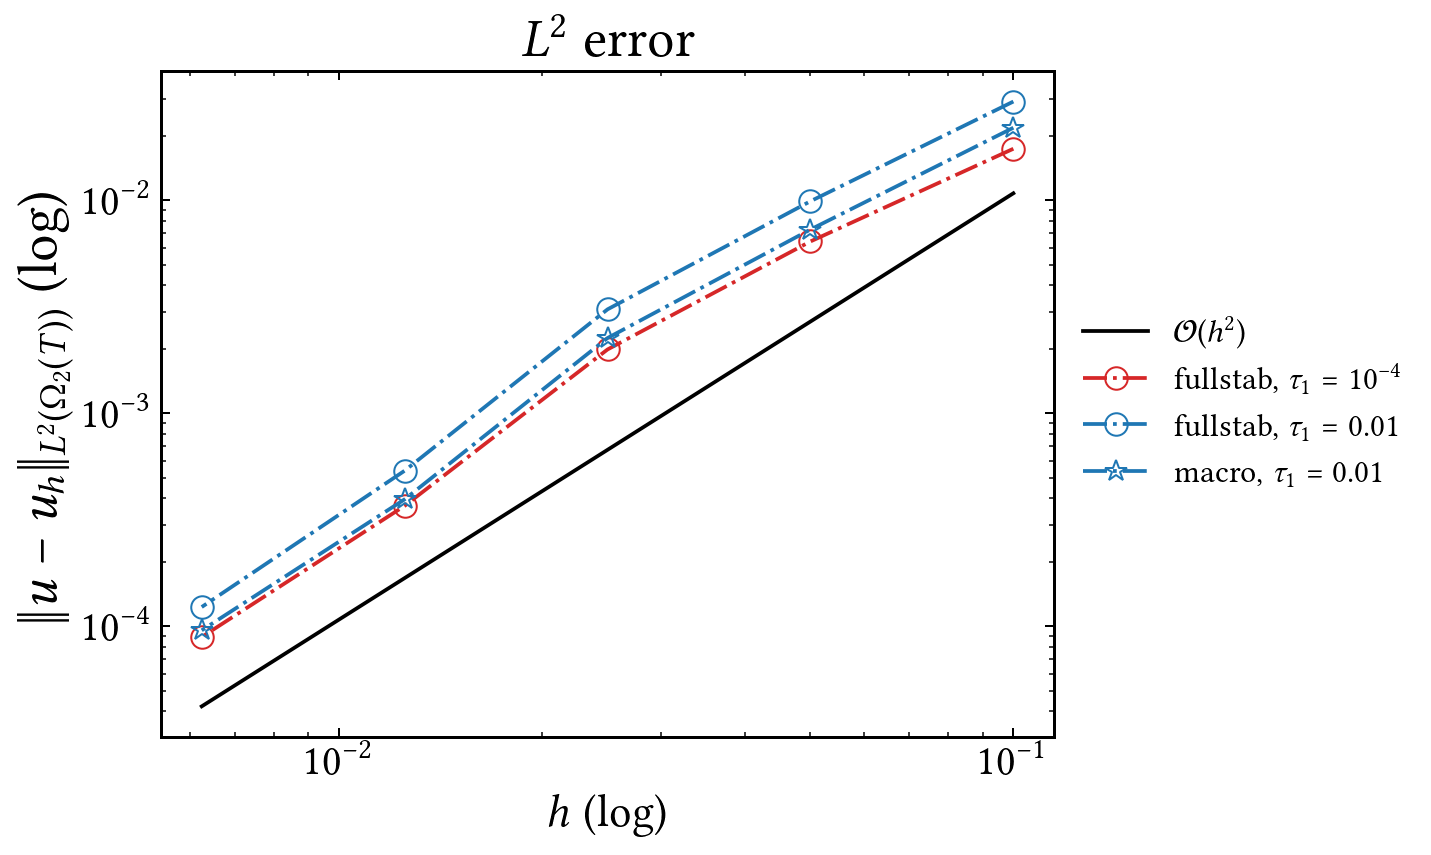

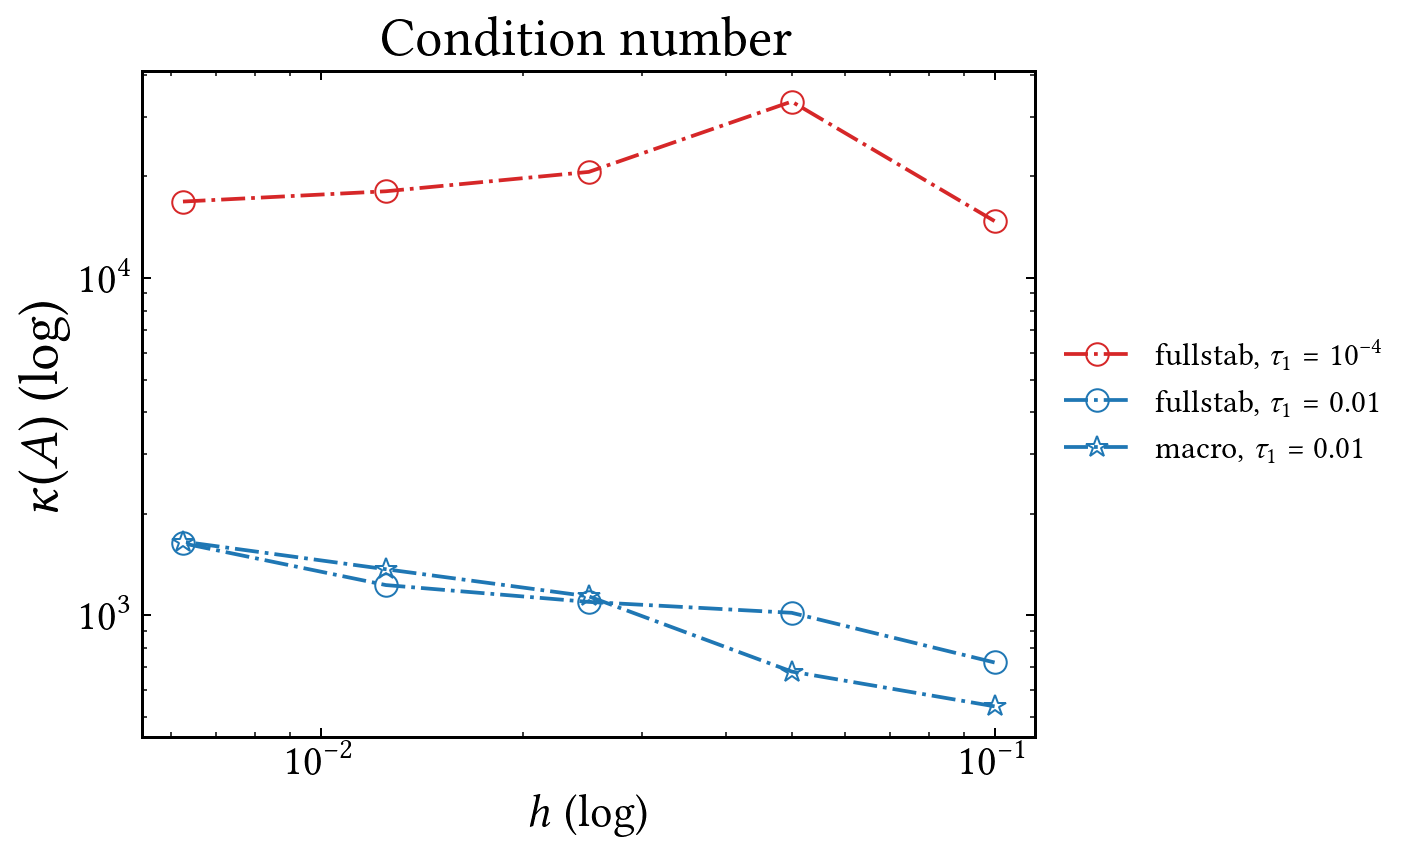

In [14]:
### full stabilization, tau1 = 10^-10

# Classical
#L2_error_classical_fullstab_tau_10neg10 = np.array([0.0168471, 0.00594168, 0.00176667])
#condition_number_classical_fullstab_tau_10neg10 = np.array([2.856821e+09,3.327888e+10,2.054782e+10])



### full stabilization, tau1 = 10^-4

# Classical
L2_error_classical_fullstab_tau_10neg4 = np.array([0.0174753, 0.00641791, 0.00199695, 0.000368364, 8.92308e-05])
condition_number_classical_fullstab_tau_10neg4 = np.array([1.474473e+04,3.335070e+04,2.063042e+04,1.807508e+04,1.684997e+04])


### full stabilization, tau1 = 0.01

# Classical
L2_error_classical_fullstab_tau001 = np.array([0.0291106, 0.009912, 0.00308092, 0.000538534, 0.00012344])
condition_number_classical_fullstab_tau001 = np.array([7.244135e+02,1.016909e+03,1.095310e+03,1.228920e+03,1.634394e+03])
# no stabilized edges: [208, 425, 858, 1694, 3409]


### macro stabilization, tau1 = 0.01

# Classical
# delta = 0.125
#L2_error_classical_macro_tau001 = np.array([0.0213404, 0.00719753, 0.0021693])
#condition_number_classical_macro_tau001 = np.array([1.186903e+03,1.656972e+03,1.493301e+03])

# delta = 0.25
L2_error_classical_macro_tau001 = np.array([0.0219358, 0.00730081, 0.00225983, 0.000395235, 9.59735e-05])
condition_number_classical_macro_tau001 = np.array([5.369334e+02,6.808858e+02,1.137629e+03,1.369303e+03,1.652996e+03])



### full stabilization, tau1 = 1

# Classical
#L2_error_classical_fullstab_tau1 = np.array([0.0778499, 0.0172415, 0.00398157])
condition_number_classical_fullstab_tau1 = np.array([8.597647e+03,1.689476e+04,3.354494e+04])#


### macro stabilization, tau1 = 1

# Classical
#L2_error_classical_macro_tau1 = np.array([0.0228774, 0.00762964, 0.00230581])
#condition_number_classical_macro_tau1 = np.array([7.928556e+04,1.420660e+05,1.328330e+05])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


#* L2 error
fig3, ax3 = plt.subplots()

ax3.loglog(h, 10.8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

ax3.loglog(h, L2_error_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
ax3.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax3.loglog(h, L2_error_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
#ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
#ax3.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")

plt.show()

#* condition numbers
fig2, ax2 = plt.subplots()

#ax2.loglog(h, 12e3*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
ax2.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax2.loglog(h, condition_number_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")
ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")

plt.show()

## Example 1 on $\Omega_1(t)$

Here, we set $\tau_1 = 0.01$, $\Delta t_n = h/2$, and $n=3$.

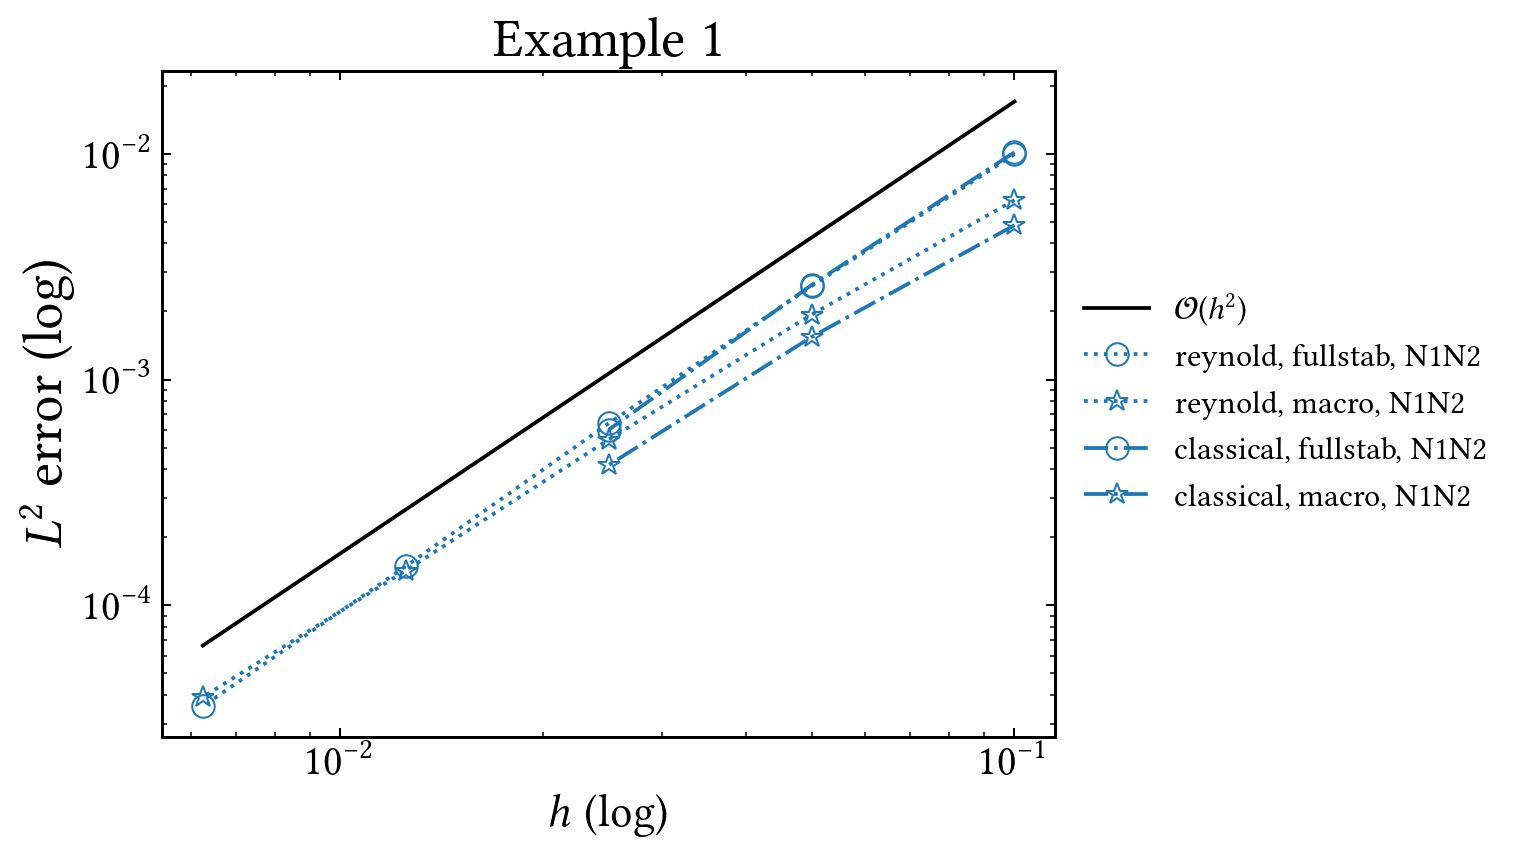

In [15]:
### Neumann1, Neumann2


# Conservative
L2_error_conservative_fullstab_n1n2 = np.array([0.0099296, 0.00258854, 0.000639367, 0.00014901, 3.57398e-05])
L2_error_conservative_macro_n1n2 = np.array([0.00622474, 0.00193738, 0.000542012, 0.00014271, 3.92951e-05])

# Classical
L2_error_classical_fullstab_n1n2 = np.array([0.0101445, 0.00261893, 0.000599017])
L2_error_classical_macro_n1n2 = np.array([0.00482054, 0.00154245, 0.000417901])


### Dirichlet1, Neumann2


# # Conservative
# L2_error_conservative_fullstab_d1n2 = np.array()
# L2_error_conservative_macro_d1n2 = np.array()

# # Classical
# L2_error_classical_fullstab_d1n2 = np.array()
# L2_error_classical_macro_d1n2 = np.array()

# ### Neumann1, Dirichlet2

# # Conservative
# L2_error_conservative_fullstab_n1d2 = np.array()
# L2_error_conservative_macro_n1d2 = np.array()

# # Classical
# L2_error_classical_fullstab_n1d2 = np.array()
# L2_error_classical_macro_n1d2 = np.array()


# ### Dirichlet1, Dirichlet2


# # Conservative
# L2_error_conservative_fullstab_d1d2 = np.array()
# L2_error_conservative_macro_d1d2 = np.array()

# # Classical
# L2_error_classical_fullstab_d1d2 = np.array()
# L2_error_classical_macro_d1d2 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 1.7e-0*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# Neumann1, Neumann2

ax1.loglog(h, L2_error_conservative_fullstab_n1n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, N1N2")
ax1.loglog(h, L2_error_conservative_macro_n1n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, N1N2")
ax1.loglog(h[:-2], L2_error_classical_fullstab_n1n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, N1N2")
ax1.loglog(h[:-2], L2_error_classical_macro_n1n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, N1N2")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau01,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau01,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_macro_tau01,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")

# # tau1 = 1

# ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
# #ax1.loglog(h, L2_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\tau_1=1$")
# ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
# #ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
# ax1.loglog(h, reynold_error_classical_macro_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")

# # tau1 = 5

# ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
# #ax1.loglog(h, L2_error_conservative_macro_tau5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\tau_1=5$")
# ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
# #ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
# ax1.loglog(h, reynold_error_classical_macro_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")




ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Example 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

# Surface problems

### Reynold error
Here, the discrete Reynold relation is given by
\begin{align*}
        \int_{\Gamma(t_n)}u_h v_h - \int_{\Gamma(t_{n-1})}u_h v_h - \sum_{q=1}^{n_q}\alpha_q^n \left(\int_{\Gamma(t_q^n)}(\partial_t u_h + \mathbf{\beta}\cdot\nabla u_h)v_h +u_h(\partial_t v_h + \mathbf{\beta}\cdot\nabla v_h) + (\nabla_{\Gamma}\cdot\mathbf{\beta})u_h v_h\right) &= 0.
\end{align*}

## Frachon 1
We now redo the study for the surface problem called Frachon 1. 



### 1. Old
We choose $\Delta t = h$ and $n=3$, and vary $\tau_1$.

TODO: Do the case Delta t = h/3, n=3, and vary tau_1.

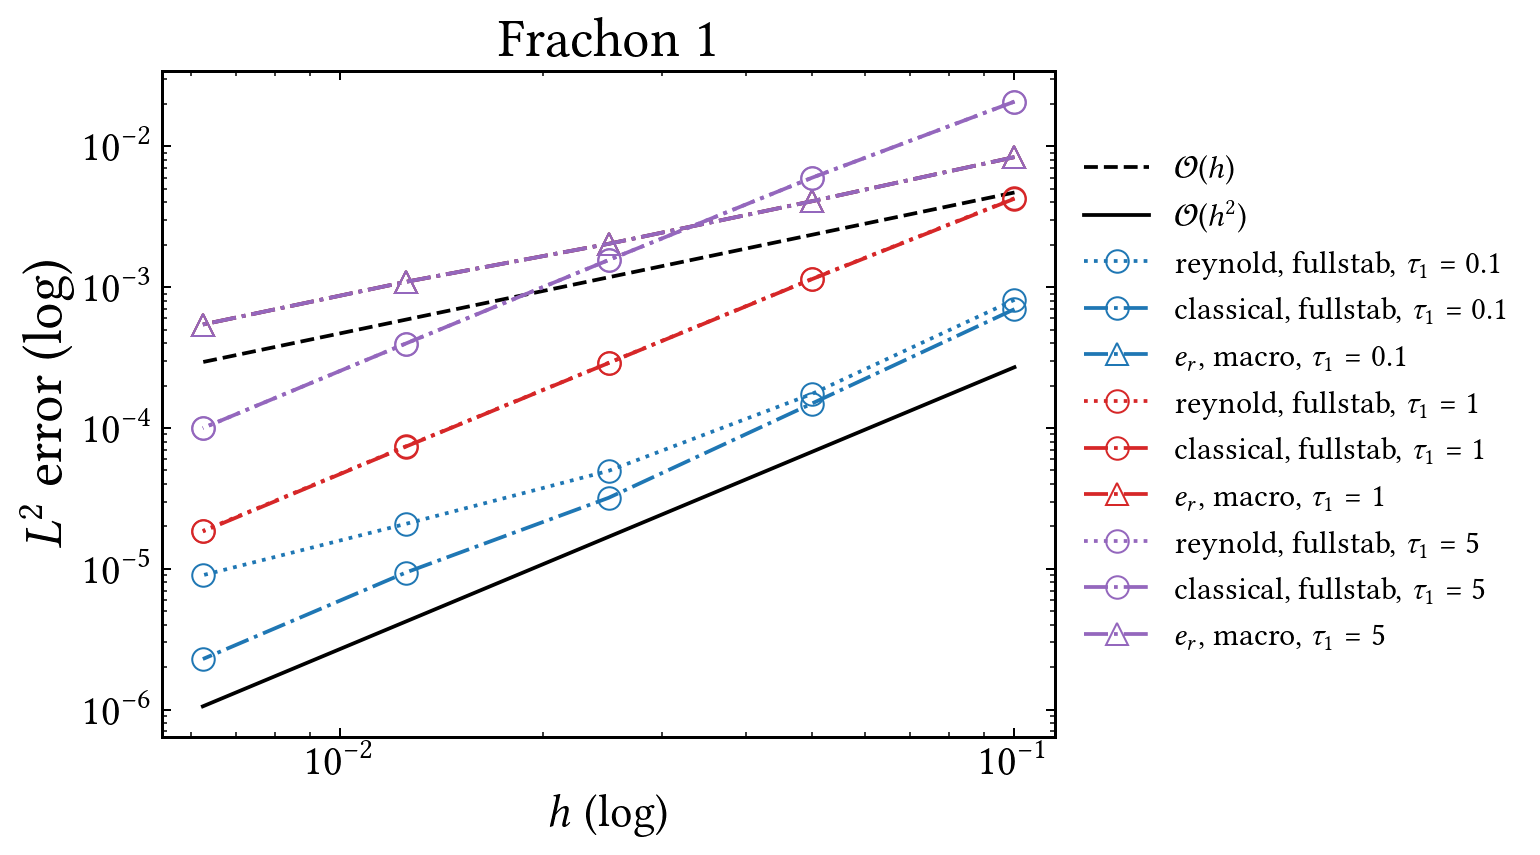

In [16]:
### tau1 = 0.1

# Conservative
L2_error_conservative_fullstab_tau01 = np.array([0.000812935, 0.000174001, 4.96135e-05, 2.08356e-05, 9.00271e-06])
reynold_error_conservative_fullstab_tau01 = np.array([0.00833324, 0.00406342, 0.00203098, 0.00109011, 0.000542656])
L2_error_conservative_macro_tau01 = np.array([0.00103019, 0.000249249, 8.4229e-05, 4.31636e-05, 2.10337e-05])
reynold_error_conservative_macro_tau01 = np.array([0.00836253, 0.00406704, 0.002033, 0.00109002, 0.000542763])

L2_error_conservative_fullstab_tau01_new = np.array([0.000941796, 0.000206912, 5.19087e-05, 1.49526e-05, 4.79369e-06])
L2_error_conservative_macro_tau01_new = np.array([0.00117566, 0.000341555, 0.000337119, 0.000132582, 8.44495e-05])

# Classical
L2_error_classical_fullstab_tau01 = np.array([0.000697639, 0.00014868, 3.19222e-05, 9.39893e-06, 2.28635e-06])
reynold_error_classical_fullstab_tau01 = np.array([0.00833361, 0.00406441, 0.00203061, 0.00108981, 0.000542671])
L2_error_classical_macro_tau01 = np.array([0.000960213, 0.000227106, 5.35274e-05, 1.40013e-05, 3.51445e-06])
reynold_error_classical_macro_tau01 = np.array([0.00838391, 0.00406969, 0.00203114, 0.0010899, 0.000542681])

### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00427614, 0.00114147, 0.000290182, 7.40119e-05, 1.85807e-05])
reynold_error_conservative_fullstab_tau1 = np.array([0.00800887, 0.00402091, 0.00202524, 0.00108901, 0.000542574])
L2_error_conservative_macro_tau1 = np.array([0.00102022, 0.00024496, 7.22426e-05, 2.76092e-05, 9.90579e-06])
reynold_error_conservative_macro_tau1 = np.array([0.00836258, 0.00406682, 0.00203141, 0.00108984, 0.000542712])

L2_error_conservative_fullstab_tau1_new = np.array([0.00847269, 0.00236113, 0.000609102, 0.000155389, 3.90329e-05])
L2_error_conservative_macro_tau1_new = np.array([0.00105562, 0.000259261, 0.00011802, 3.59782e-05, 2.50575e-05])

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.00424744, 0.00113701, 0.000289225, 7.36774e-05, 1.84072e-05])
reynold_error_classical_fullstab_tau1 = np.array([0.00801156, 0.00402129, 0.00202522, 0.00108897, 0.000542576])
L2_error_classical_macro_tau1 = np.array([0.000964737, 0.000230178, 5.94798e-05, 1.71657e-05, 4.33741e-06])
reynold_error_classical_macro_tau1 = np.array([0.00838025, 0.00406825, 0.00203077, 0.00108983, 0.000542676])

### tau1 = 5

# Conservative

L2_error_conservative_fullstab_tau5 = np.array([0.0207886, 0.00596744, 0.00155812, 0.000397532, 9.98244e-05])
reynold_error_conservative_fullstab_tau5 = np.array([0.0070259, 0.00383984, 0.00200003, 0.00108566, 0.000542158])
L2_error_conservative_macro_tau5 = np.array([0.0010344, 0.000266656, 8.31129e-05, 3.36429e-05, 9.52894e-06])
reynold_error_conservative_macro_tau5 = np.array([0.00836264, 0.00406515, 0.00203062, 0.00108984, 0.000542679])

# Classical
L2_error_classical_fullstab_tau5 = np.array([0.020774, 0.0059653, 0.00155775, 0.000397442, 9.97966e-05])
reynold_error_classical_fullstab_tau5 = np.array([0.00703127, 0.00384027, 0.00200007, 0.00108565, 0.000542159])
L2_error_classical_macro_tau5 = np.array([0.000982261, 0.00025364, 7.65354e-05, 3.0659e-05, 8.37644e-06])
reynold_error_classical_macro_tau5 = np.array([0.00837984, 0.00406627, 0.00203036, 0.00108979, 0.000542663])

# testing with added stabilization term evaluated in t_n, with scaling tau2*h
test = np.array([0.000941796, 0.000206912, 5.19087e-05, 1.49526e-05, 4.79369e-06])  # tau1 = tau2 = 0.1
test2 = np.array([0.000825075, 0.000178528, 5.10952e-05, 1.99837e-05, 8.16507e-06])      # tau1 = 0.1, tau2 = 1e-2

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 4.7e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")
ax1.loglog(h, 2.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# test
#ax1.loglog(h, test,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"test")

# tau1 = 0.1

ax1.loglog(h, L2_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_fullstab_tau01_new,  marker='o', markersize=9,linestyle=":", color="C0", label=r"reynold, fullstab, new, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_macro_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_macro_tau01_new,  marker='*', markersize=9,linestyle=":", color="C0", label=r"reynold, macro, new, $\tau_1=0.1$")
ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\tau_1=0.1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau01,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau01,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
ax1.loglog(h, reynold_error_classical_macro_tau01,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")

# tau1 = 1

ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\tau_1=1$")
ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

#ax1.loglog(h, L2_error_conservative_fullstab_tau1_new,  marker='o', markersize=9,linestyle=":", color="C3", label=r"reynold, fullstab, new, $\tau_1=1$")
#ax1.loglog(h, L2_error_conservative_macro_tau1_new,  marker='*', markersize=9,linestyle=":", color="C3", label=r"reynold, macro, new, $\tau_1=1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
ax1.loglog(h, reynold_error_classical_macro_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")

# tau1 = 5

ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_conservative_macro_tau5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\tau_1=5$")
ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
#ax1.loglog(h, reynold_error_conservative_macro_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
ax1.loglog(h, reynold_error_classical_macro_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")




ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Frachon 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

#### Summary
* **Conservative scheme:** When the stabilization parameter decreases, the $L^2$ error decreases too, but it becomes linear for small $h$ for the lowest value of $\tau_1$. Using macro element stabilization for this scheme also results in worsened convergence rate.

* **Non-conservative scheme:** The $L^2$ error is increased with larger $\tau_1$, as expected, and the convergence rates remain $\mathcal{O}(h^2)$.

* **Reynold error:** Not affected by changing $\tau_1$.

Added stabilization: Makes it worse. For $\tau_1=0.1$, it improves the full stabilization solution but the macro solution is worsened. With $\tau_1=1$, both fullstab and macro are worsened.

### 1. New. The stabilization term $(\tau_2 h [\nabla u_h \cdot \mathbf{n}_F], [\nabla v_h\cdot \mathbf{n}_F])_{\mathcal{F}_{h,\Gamma}^n}$ is added to the bilinear form.
We choose $\Delta t_n = h/3$, $n=3$ and vary $\tau_1 = \tau_2$.

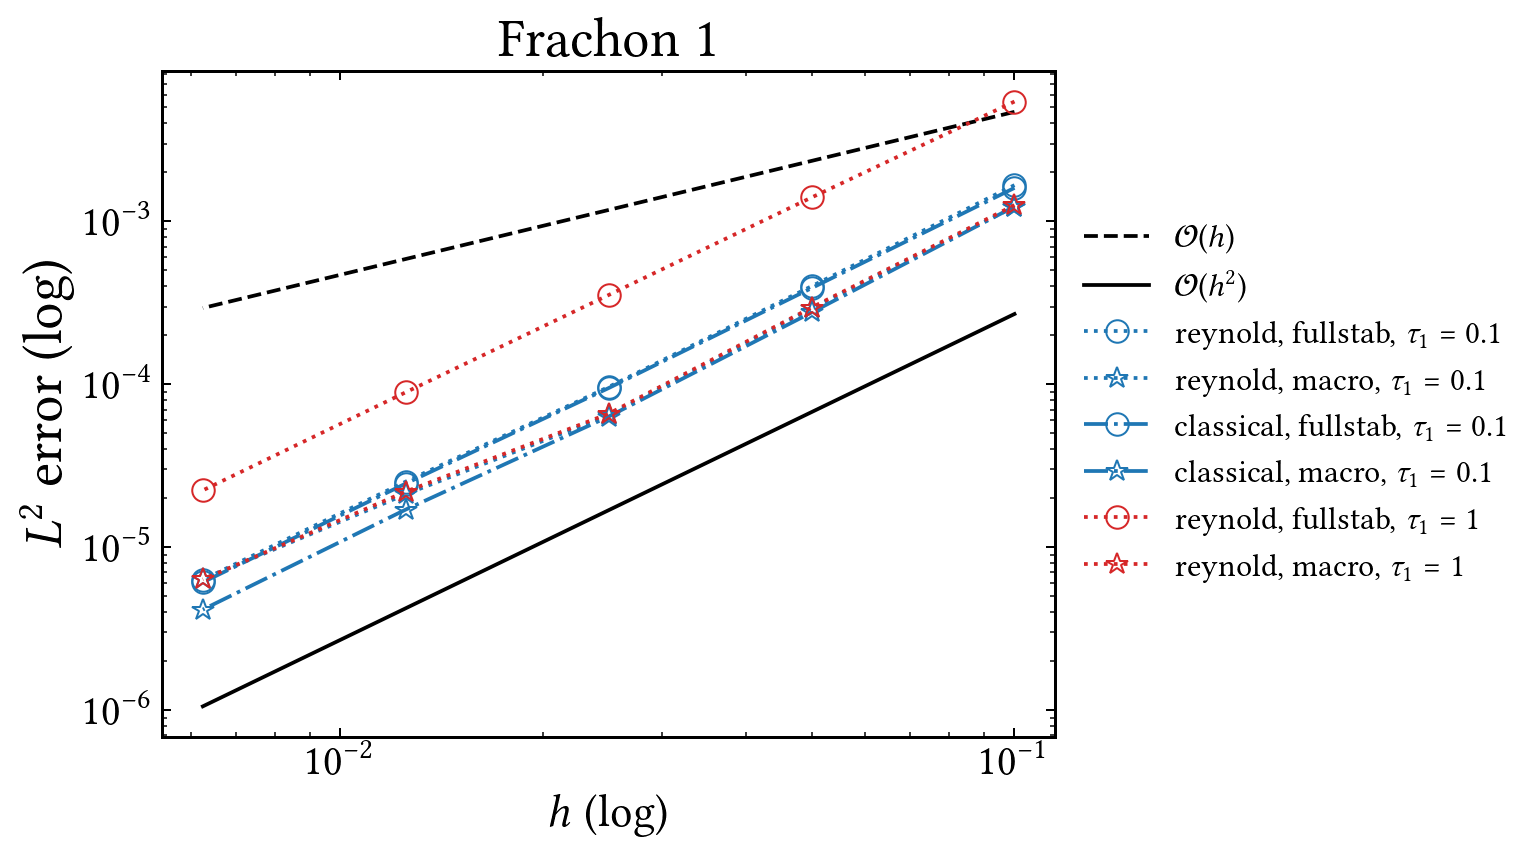

In [17]:
### tau1 = 0.1

# testing with added stabilization term evaluated in t_n, with scaling tau2*h, and Delta t_n = h
test = np.array([0.000941796, 0.000206912, 5.19087e-05, 1.49526e-05, 4.79369e-06])      # tau1 = tau2 = 0.1
test2 = np.array([0.000825075, 0.000178528, 5.10952e-05, 1.99837e-05, 8.16507e-06])     # tau1 = 0.1, tau2 = 1e-2

# Conservative

L2_error_conservative_fullstab_tau01 = np.array([0.00288977, 0.000727085, 0.000180816, 4.62545e-05, 1.15626e-05])       # with h scaling
L2_error_conservative_fullstab_tau01_old = np.array([0.00166822, 0.000399833, 9.63072e-05, 2.52713e-05, 6.3134e-06])    # without added stabilization


reynold_error_conservative_fullstab_tau01 = np.array([0.00807107, 0.00390727, 0.00199613, 0.00113458, 0.000558143])
L2_error_conservative_macro_tau01 = np.array([0.00128426, 0.000322293, 6.5527e-05, 3.18704e-05, 1.12853e-05])           # np.array([0.00142197, 0.000344294, 8.55833e-05, 2.28591e-05, 6.75186e-06])
L2_error_conservative_macro_tau01_old = np.array([0.00123074, 0.000292218, 6.44344e-05, 2.11252e-05, 6.3577e-06])       # without added stabilization
reynold_error_conservative_macro_tau01 = np.array([0.008265, 0.00393265, 0.00199993, 0.00113529, 0.000558168])


# Classical
L2_error_classical_fullstab_tau01 = np.array([0.00362731, 0.00102224, 0.000288177, 8.24128e-05, 2.30942e-05])
L2_error_classical_fullstab_tau01_old = np.array([0.00160473, 0.000389217, 9.48028e-05, 2.45838e-05, 6.09001e-06])
reynold_error_classical_fullstab_tau01 = np.array([0.00806965, 0.00390741, 0.00199616, 0.00113458, 0.000558147])
L2_error_classical_macro_tau01 = np.array([0.00139689, 0.000341643, 8.47974e-05, 2.25775e-05, 5.53084e-06])
L2_error_classical_macro_tau01_old = np.array([0.00123325, 0.000275901, 6.33478e-05, 1.70225e-05, 4.14057e-06])
reynold_error_classical_macro_tau01 = np.array([0.0082694, 0.00393354, 0.00200001, 0.00113528, 0.000558279])


#! Added stabilization doesn't help, we run without added stab. and just change to Delta t_n = h/3

### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00543737, 0.00140163, 0.000353174, 8.93173e-05, 2.23371e-05])
# reynold_error_conservative_fullstab_tau1 = np.array([0.00800887, 0.00402091, 0.00202524, 0.00108901, 0.000542574])
L2_error_conservative_macro_tau1 = np.array([0.00125821, 0.000295923, 6.59833e-05, 2.19312e-05, 6.34054e-06])
# reynold_error_conservative_macro_tau1 = np.array([0.00836258, 0.00406682, 0.00203141, 0.00108984, 0.000542712])

# # Classical
#L2_error_classical_fullstab_tau1 = np.array()
# reynold_error_classical_fullstab_tau1 = np.array([0.00801156, 0.00402129, 0.00202522, 0.00108897, 0.000542576])
#L2_error_classical_macro_tau1 = np.array()
# reynold_error_classical_macro_tau1 = np.array([0.00838025, 0.00406825, 0.00203077, 0.00108983, 0.000542676])

# ### tau1 = 5

# # Conservative

# L2_error_conservative_fullstab_tau5 = np.array([0.0207886, 0.00596744, 0.00155812, 0.000397532, 9.98244e-05])
# reynold_error_conservative_fullstab_tau5 = np.array([0.0070259, 0.00383984, 0.00200003, 0.00108566, 0.000542158])
# L2_error_conservative_macro_tau5 = np.array([0.0010344, 0.000266656, 8.31129e-05, 3.36429e-05, 9.52894e-06])
# reynold_error_conservative_macro_tau5 = np.array([0.00836264, 0.00406515, 0.00203062, 0.00108984, 0.000542679])

# # Classical
# L2_error_classical_fullstab_tau5 = np.array([0.020774, 0.0059653, 0.00155775, 0.000397442, 9.97966e-05])
# reynold_error_classical_fullstab_tau5 = np.array([0.00703127, 0.00384027, 0.00200007, 0.00108565, 0.000542159])
# L2_error_classical_macro_tau5 = np.array([0.000982261, 0.00025364, 7.65354e-05, 3.0659e-05, 8.37644e-06])
# reynold_error_classical_macro_tau5 = np.array([0.00837984, 0.00406627, 0.00203036, 0.00108979, 0.000542663])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
dT = [0.0333333, 0.0166667, 0.00833333, 0.00416667, 0.00208333]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 4.7e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")
ax1.loglog(h, 2.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.1

ax1.loglog(h, L2_error_conservative_fullstab_tau01_old,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\tau_1=0.1$")
ax1.loglog(h, L2_error_conservative_macro_tau01_old,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\tau_1=0.1$")
ax1.loglog(h, L2_error_classical_fullstab_tau01_old,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\tau_1=0.1$")
ax1.loglog(h, L2_error_classical_macro_tau01_old,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\tau_1=0.1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau01,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau01,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_macro_tau01,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")

# tau1 = 1

ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
ax1.loglog(h, L2_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
# ax1.loglog(h, reynold_error_classical_macro_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")

# # tau1 = 5

# ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
# ax1.loglog(h, L2_error_conservative_macro_tau5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\tau_1=5$")
# #ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
# #ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
# ax1.loglog(h, reynold_error_classical_macro_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")




ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Frachon 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

### 2. 
We now choose $\tau_1=0.1$, $n=3$ and vary $\Delta t$ as a function of $h$.

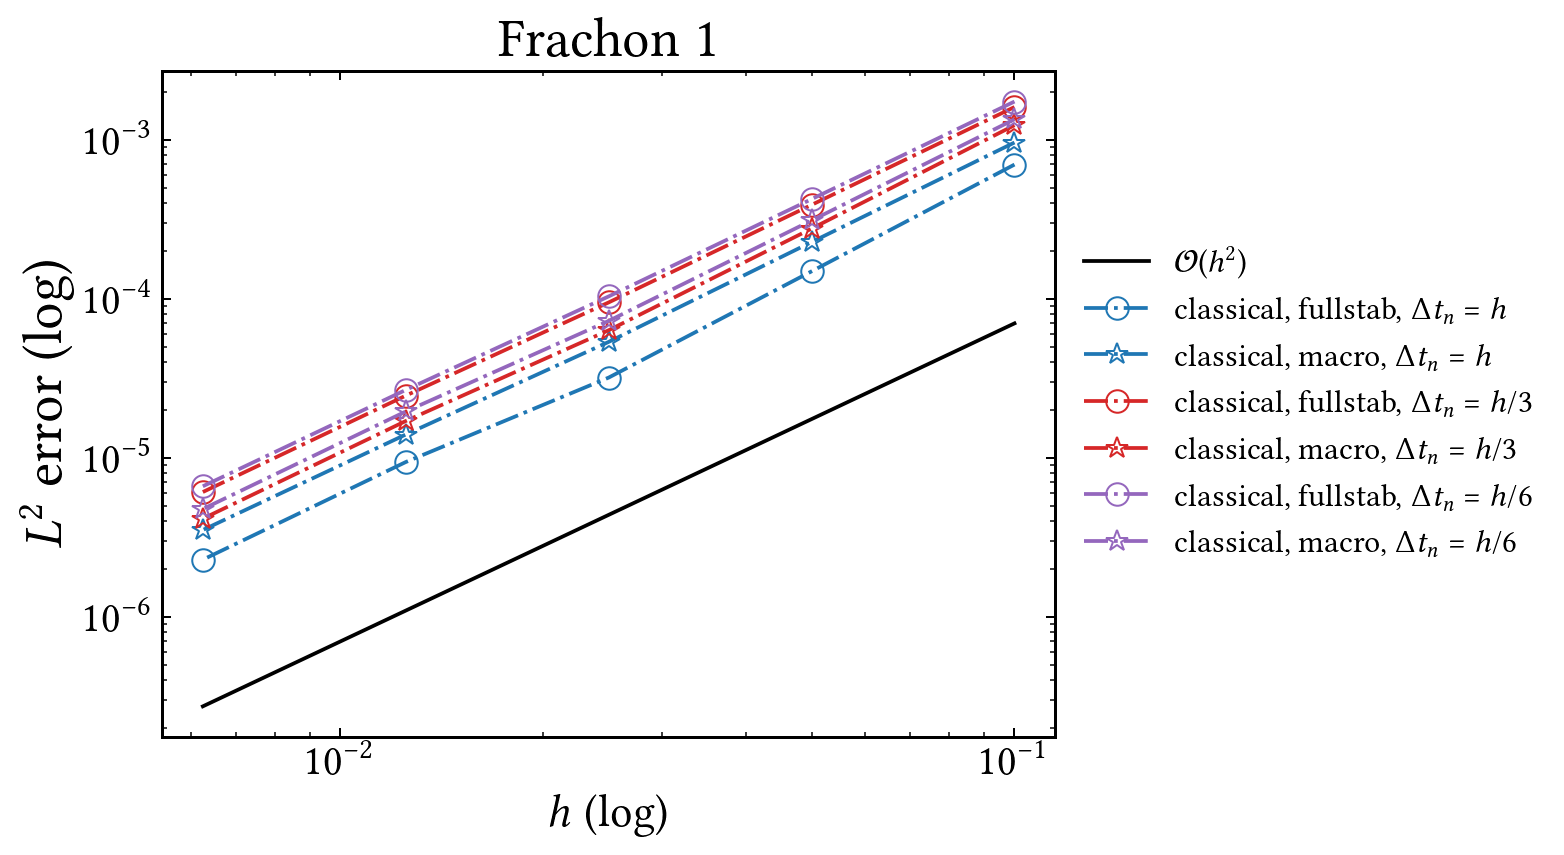

In [18]:
### dT = h

# Conservative
L2_error_conservative_fullstab_dt1 = np.array([0.000812935, 0.000174001, 4.96135e-05, 2.08356e-05, 9.00271e-06])
reynold_error_conservative_fullstab_dt1 = np.array([0.00833324, 0.00406342, 0.00203098, 0.00109011, 0.000542656])
L2_error_conservative_macro_dt1 = np.array([0.00103019, 0.000249249, 8.4229e-05, 4.31636e-05, 2.10337e-05])
reynold_error_conservative_macro_dt1 = np.array([0.00836253, 0.00406704, 0.002033, 0.00109002, 0.000542763])


# Classical
L2_error_classical_fullstab_dt1 = np.array([0.000697639, 0.00014868, 3.19222e-05, 9.39893e-06, 2.28635e-06])
reynold_error_classical_fullstab_dt1 = np.array([0.00833361, 0.00406441, 0.00203061, 0.00108981, 0.000542671])
L2_error_classical_macro_dt1 = np.array([0.000960213, 0.000227106, 5.35274e-05, 1.40013e-05, 3.51445e-06])
reynold_error_classical_macro_dt1 = np.array([0.00838391, 0.00406969, 0.00203114, 0.0010899, 0.000542681])

### dT = h/3

# Conservative
L2_error_conservative_fullstab_dt3 = np.array([0.00166822, 0.000399833, 9.63072e-05, 2.52713e-05, 6.3134e-06])
reynold_error_conservative_fullstab_dt3 = np.array([0.00823769, 0.00392856, 0.00199959, 0.00113523, 0.000558283])
L2_error_conservative_macro_dt3 = np.array([0.00123074, 0.000292218, 6.44344e-05, 2.11252e-05, 6.3577e-06])
reynold_error_conservative_macro_dt3 = np.array([0.00823757, 0.00391905, 0.002, 0.00113505, 0.000558362])


# Classical
L2_error_classical_fullstab_dt3 = np.array([0.00160473, 0.000389217, 9.48028e-05, 2.45838e-05, 6.09001e-06])
reynold_error_classical_fullstab_dt3 = np.array([0.00824264, 0.00393045, 0.00199969, 0.00113525, 0.000558272])
L2_error_classical_macro_dt3 = np.array([0.00123325, 0.000275901, 6.33478e-05, 1.70225e-05, 4.14057e-06])
reynold_error_classical_macro_dt3 = np.array([0.00828679, 0.00393618, 0.00200045, 0.00113534, 0.000558278])

### dT = h/6

# Conservative
L2_error_conservative_fullstab_dt6 = np.array([0.00179786, 0.000433078, 0.000104848, 2.73157e-05, 6.76851e-06])
reynold_error_conservative_fullstab_dt6 = np.array([0.00823713, 0.00392949, 0.00200001, 0.00113084, 0.00056112])
L2_error_conservative_macro_dt6 = np.array([0.00136545, 0.000320694, 7.30436e-05, 2.27108e-05, 7.29755e-06])
reynold_error_conservative_macro_dt6 = np.array([0.00808538, 0.00391258, 0.00199953, 0.00113046, 0.000561048])


# Classical
L2_error_classical_fullstab_dt6 = np.array([0.00173761, 0.000422963, 0.000103424, 2.67014e-05, 6.61799e-06])
reynold_error_classical_fullstab_dt6 = np.array([0.00824277, 0.0039316, 0.00200016, 0.00113086, 0.000561123])
L2_error_classical_macro_dt6 = np.array([0.00134312, 0.000310544, 7.25257e-05, 1.95439e-05, 4.75945e-06])
reynold_error_classical_macro_dt6 = np.array([0.00827995, 0.00393721, 0.0020009, 0.00113095, 0.000561135])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig2, ax2 = plt.subplots()

ax2.loglog(h, 0.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* dT = h

#ax2.loglog(h, L2_error_conservative_fullstab_dt1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, L2_error_conservative_macro_dt1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\Delta t_n = h$")
ax2.loglog(h, L2_error_classical_fullstab_dt1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\Delta t_n = h$")
ax2.loglog(h, L2_error_classical_macro_dt1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\Delta t_n = h$")

#ax2.loglog(h, reynold_error_conservative_fullstab_dt1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, reynold_error_conservative_macro_dt1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\Delta t_n = h$")
#ax2.loglog(h, reynold_error_classical_fullstab_dt1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")
#ax2.loglog(h, reynold_error_classical_macro_dt1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")

#* dT = h/3

#ax2.loglog(h, L2_error_conservative_fullstab_dt3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, L2_error_conservative_macro_dt3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\Delta t_n = h/3$")
ax2.loglog(h, L2_error_classical_fullstab_dt3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\Delta t_n = h/3$")
ax2.loglog(h, L2_error_classical_macro_dt3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\Delta t_n = h/3$")

#ax2.loglog(h, reynold_error_conservative_fullstab_dt3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, reynold_error_conservative_macro_dt3,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\Delta t_n = h/3$")
#ax2.loglog(h, reynold_error_classical_fullstab_dt3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\Delta t_n = h/3$")
#ax2.loglog(h, reynold_error_classical_macro_dt3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\Delta t_n = h/3$")

#* dT = h/6

#ax2.loglog(h, L2_error_conservative_fullstab_dt6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, L2_error_conservative_macro_dt6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\Delta t_n = h/6$")
ax2.loglog(h, L2_error_classical_fullstab_dt6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\Delta t_n = h/6$")
ax2.loglog(h, L2_error_classical_macro_dt6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\Delta t_n = h/6$")

#ax2.loglog(h, reynold_error_conservative_fullstab_dt6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, reynold_error_conservative_macro_dt6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\Delta t_n = h/6$")
#ax2.loglog(h, reynold_error_classical_fullstab_dt6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")
#ax2.loglog(h, reynold_error_classical_macro_dt6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")



ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5),
          ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax2.set_title(r"Frachon 1")

plt.show()

#### Summary

* **Conservative scheme:** The solutions for $\Delta t_n = h/3$ and $\Delta t_n = h/6$ are similar. Using $\Delta t_n = h$ makes the $L^2$ error lower for large $h$, but becomes linear for smaller $h$.

* **Non-conservative scheme:** The solutions have the same trends for all combinations, but common for both schemes is that using $\Delta t_n = h$ makes the macro stabilization solution have a larger error than the fullstab. The opposite happens for the other choices of $\Delta t_n$.

* **Reynold error:** Not affected by changing $\Delta t_n$ for the settings used in this experiment.

### 3. 
Here, we choose $\tau_1 = 0.1$ and $\Delta t = h$, and vary the order of the Gauss-Lobatto quadrature rule in time.

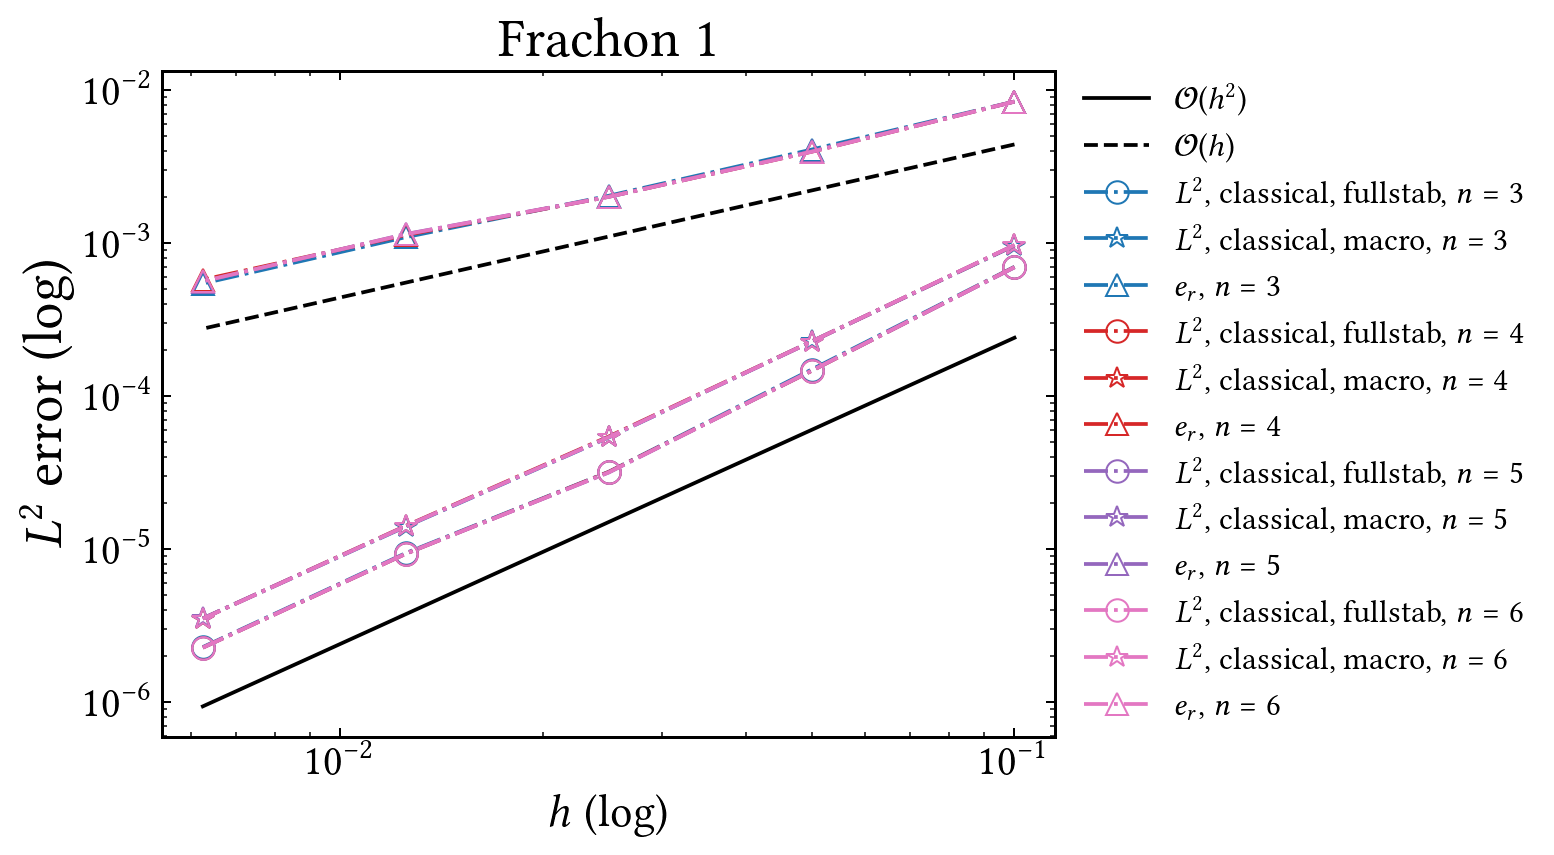

In [19]:
### n = 2

# Conservative
L2_error_conservative_fullstab_n2 = np.array([0.00440414, 0.00138033, 0.000498709, 0.000199155, 9.50179e-05])
reynold_error_conservative_fullstab_n2 = np.array([0.00473645, 0.00216057, 0.00111313, 0.00053605, 0.00028078])
L2_error_conservative_macro_n2 = np.array([0.0204946, 0.00926366, 0.107409, 0.00872859, 0.00415634])
reynold_error_conservative_macro_n2 = np.array([5.65209e+09, 9.13078e+08, 3.99955e+06, 496580, 64321.1])    # !!!! 


# Classical
L2_error_classical_fullstab_n2 = np.array([0.0042338, 0.00117795, 0.0003124, 8.14979e-05, 2.07405e-05])
reynold_error_classical_fullstab_n2 = np.array([0.00784997, 0.00379271, 0.00181866, 0.00106953, 0.00051579])
L2_error_classical_macro_n2 = np.array([0.00693194, 0.0018768, 0.000927662, 0.000191679, 6.92943e-05])
reynold_error_classical_macro_n2 = np.array([0.00820996, 0.00373505, 0.00176616, 0.0010688, 0.000515675])


### n = 3

# Conservative
L2_error_conservative_fullstab_n3 = np.array([0.000812935, 0.000174001, 4.96135e-05, 2.08356e-05, 9.00271e-06])
reynold_error_conservative_fullstab_n3 = np.array([0.00833324, 0.00406342, 0.00203098, 0.00109011, 0.000542656])
L2_error_conservative_macro_n3 = np.array([0.00103019, 0.000249249, 8.4229e-05, 4.31636e-05, 2.10337e-05])
reynold_error_conservative_macro_n3 = np.array([0.00836253, 0.00406704, 0.002033, 0.00109002, 0.000542763])


# Classical
L2_error_classical_fullstab_n3= np.array([0.000697639, 0.00014868, 3.19222e-05, 9.39893e-06, 2.28635e-06])
reynold_error_classical_fullstab_n3 = np.array([0.00833361, 0.00406441, 0.00203061, 0.00108981, 0.000542671])
L2_error_classical_macro_n3 = np.array([0.000960213, 0.000227106, 5.35274e-05, 1.40013e-05, 3.51445e-06])
reynold_error_classical_macro_n3 = np.array([0.00838391, 0.00406969, 0.00203114, 0.0010899, 0.000542681])

### n = 4

# Conservative
L2_error_conservative_fullstab_n4 = np.array([0.000800556, 0.000167167, 4.04711e-05, 1.24173e-05, 4.12616e-06])
reynold_error_conservative_fullstab_n4 = np.array([0.00832056, 0.00393267, 0.00199941, 0.00112572, 0.000574371])
L2_error_conservative_macro_n4 = np.array([0.00101756, 0.000238687, 6.37e-05, 2.34664e-05, 8.41284e-06])
reynold_error_conservative_macro_n4 = np.array([0.00834676, 0.00393636, 0.00200042, 0.00112579, 0.000574327])


# Classical
L2_error_classical_fullstab_n4 = np.array([0.000694771, 0.000145713, 3.18592e-05, 9.3022e-06, 2.26761e-06])
reynold_error_classical_fullstab_n4 = np.array([0.00832838, 0.00393358, 0.0019993, 0.00112576, 0.000574354])
L2_error_classical_macro_n4 = np.array([0.000965635, 0.000226722, 5.43092e-05, 1.41628e-05, 3.5131e-06])
reynold_error_classical_macro_n4 = np.array([0.00837753, 0.0039394, 0.00199993, 0.00112584, 0.000574364])

### n = 5

# Conservative
L2_error_conservative_fullstab_n5 = np.array([0.000800519, 0.000166701, 3.51571e-05, 1.10006e-05, 2.96777e-06])
reynold_error_conservative_fullstab_n5 = np.array([0.00832209, 0.00395017, 0.00199914, 0.00114167, 0.000559199])
L2_error_conservative_macro_n5 = np.array([0.00101414, 0.000238116, 5.77412e-05, 1.71179e-05, 4.89439e-06])
reynold_error_conservative_macro_n5 = np.array([0.00834784, 0.00395369, 0.0020001, 0.00114172, 0.000559228])

# Classical
L2_error_classical_fullstab_n5 = np.array([0.000691912, 0.000146106, 3.16178e-05, 9.31789e-06, 2.26999e-06])
reynold_error_classical_fullstab_n5 = np.array([0.00832854, 0.00395156, 0.00199916, 0.00114168, 0.000559203])
L2_error_classical_macro_n5 = np.array([0.000966582, 0.000226152, 5.37909e-05, 1.4089e-05, 3.5232e-06])
reynold_error_classical_macro_n5 = np.array([0.00837737, 0.00395681, 0.0019998, 0.00114176, 0.000559214])

# ### n = 6

# Conservative
L2_error_conservative_fullstab_n6 = np.array([0.000800509, 0.000166838, 3.53131e-05, 1.07477e-05, 2.64274e-06])
reynold_error_conservative_fullstab_n6 = np.array([0.00832111, 0.0039326, 0.00199972, 0.00113829, 0.000561564])
L2_error_conservative_macro_n6 = np.array([0.00101499, 0.000237639, 5.74734e-05, 1.67498e-05, 4.24135e-06])
reynold_error_conservative_macro_n6 = np.array([0.00834722, 0.00393633, 0.00200045, 0.00113824, 0.00056157])

# Classical
L2_error_classical_fullstab_n6 = np.array([0.00069399, 0.000146245, 3.16613e-05, 9.31721e-06, 2.26801e-06])
reynold_error_classical_fullstab_n6 = np.array([0.00832836, 0.00393356, 0.00199982, 0.0011383, 0.000561565])
L2_error_classical_macro_n6 = np.array([0.00096778, 0.000226779, 5.37006e-05, 1.40818e-05, 3.5038e-06])
reynold_error_classical_macro_n6 = np.array([0.00837731, 0.00393939, 0.00200034, 0.00113838, 0.000561576])

# higher order doesn't decrease the error

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.4e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
ax3.loglog(h, 4.4e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")

#* n = 2

# ax3.loglog(h, L2_error_conservative_fullstab_n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, fullstab, $n=2$")
# #ax3.loglog(h, L2_error_conservative_macro_n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, macro, $n=2$")
# ax3.loglog(h, L2_error_classical_fullstab_n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, fullstab, $n=2$")
# #ax3.loglog(h, L2_error_classical_macro_n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, macro, $n=2$")

# #ax3.loglog(h, reynold_error_conservative_fullstab_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
# #ax3.loglog(h, reynold_error_conservative_macro_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $n=2$")
# #ax3.loglog(h, reynold_error_classical_fullstab_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
# ax3.loglog(h, reynold_error_classical_macro_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, $n=2$")


#* n = 3

#ax3.loglog(h, L2_error_conservative_fullstab_n3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, fullstab, $n=3$")
#ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
ax3.loglog(h, L2_error_classical_fullstab_n3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, fullstab, $n=3$")
ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_conservative_macro_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $n=3$")
#ax3.loglog(h, reynold_error_classical_fullstab_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
ax3.loglog(h, reynold_error_classical_macro_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, $n=3$")

#* n = 4

#ax3.loglog(h, L2_error_conservative_fullstab_n4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, fullstab, $n=4$")
#ax3.loglog(h, L2_error_conservative_macro_n4,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, macro, $n=4$")
ax3.loglog(h, L2_error_classical_fullstab_n4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, fullstab, $n=4$")
ax3.loglog(h, L2_error_classical_macro_n4,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, macro, $n=4$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n4,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_conservative_macro_n4,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $n=4$")
#ax3.loglog(h, reynold_error_classical_fullstab_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
ax3.loglog(h, reynold_error_classical_macro_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, $n=4$")

#* n = 5

#ax3.loglog(h, L2_error_conservative_fullstab_n5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, fullstab, $n=5$")
#ax3.loglog(h, L2_error_conservative_macro_n5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, macro, $n=5$")
ax3.loglog(h, L2_error_classical_fullstab_n5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, fullstab, $n=5$")
ax3.loglog(h, L2_error_classical_macro_n5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, macro, $n=5$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n=5$")
#ax3.loglog(h, reynold_error_conservative_macro_n5,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $n=5$")
#ax3.loglog(h, reynold_error_classical_fullstab_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n = 5$")
ax3.loglog(h, reynold_error_classical_macro_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, $n=5$")

#* n = 6

#ax3.loglog(h, L2_error_conservative_fullstab_n6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, fullstab, $n=6$")
#ax3.loglog(h, L2_error_conservative_macro_n6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, macro, $n=6$")
ax3.loglog(h, L2_error_classical_fullstab_n6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, fullstab, $n=6$")
ax3.loglog(h, L2_error_classical_macro_n6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, macro, $n=6$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n=6$")
#ax3.loglog(h, reynold_error_conservative_macro_n6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $n=6$")
#ax3.loglog(h, reynold_error_classical_fullstab_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n = 6$")
ax3.loglog(h, reynold_error_classical_macro_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, $n=6$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Frachon 1")

plt.show()

#### Summary:
* **Conservative scheme:** Increasing order of quadrature $n$ results in over-all lower $L^2$ error, and correct convergence rates are achieved for $n\geq5$. For lower quadrature orders, the convergence rate tends to become linear for small $h$, especially when using macro element stabilization.

* **Non-conservative scheme:** For $n=5$ and $n=4$, the solutions coincide. For smaller $n$, the error is increased but rate $h^2$ is preserved.

* **Reynold error:** The Reynold error remains virtually unchanged when computed using the non-conservative scheme. When using the conservative scheme, the Reynold error explodes for $n=2$.

### 3. New
We choose $\Delta t_n = h/3$, $\tau_1 = 0.1$ and vary the Gauss-Lobatto order $n$.

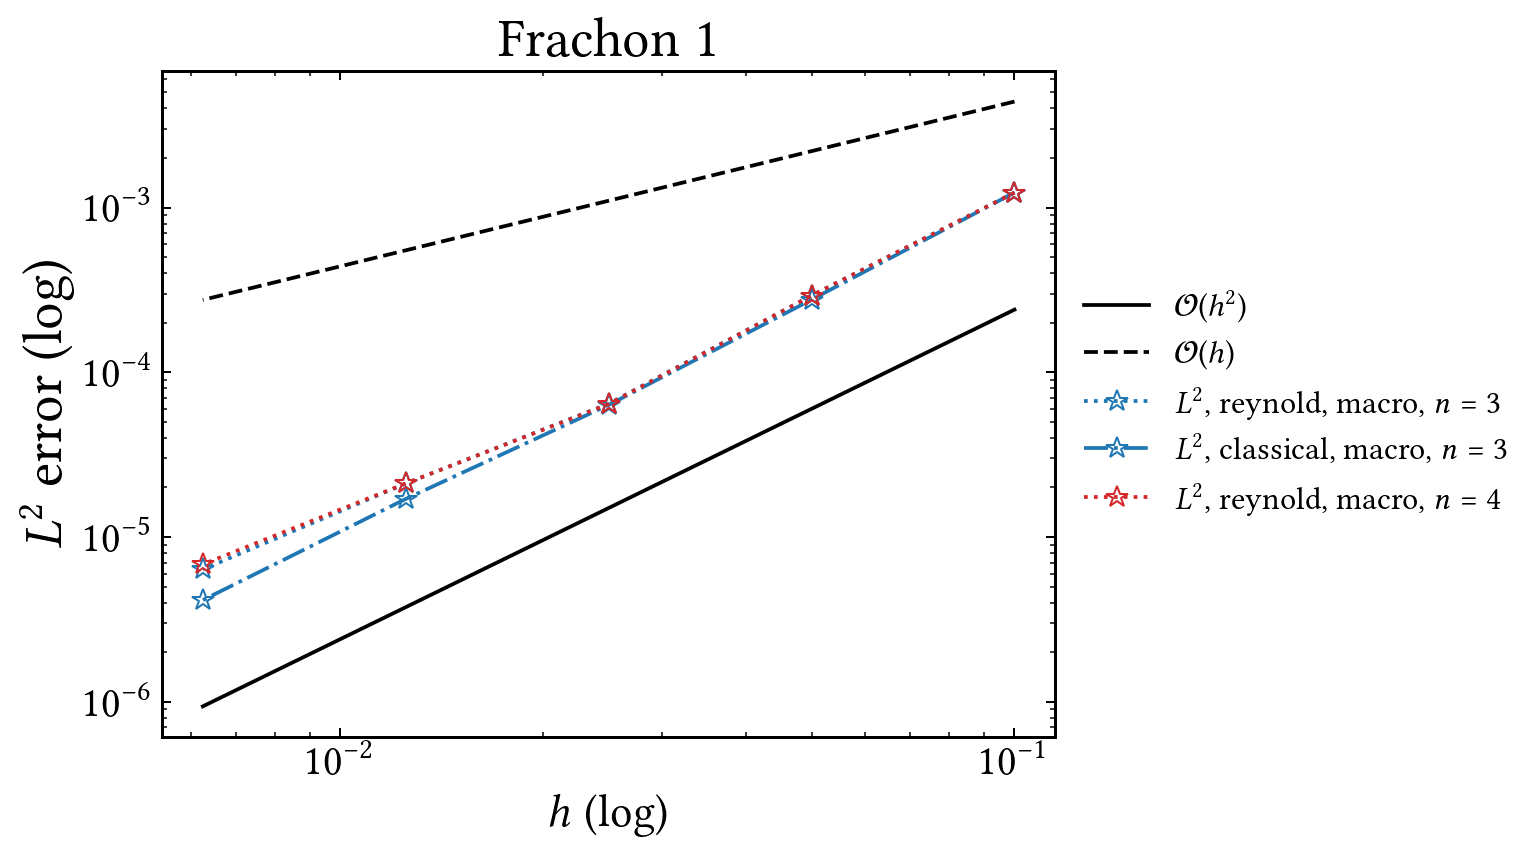

In [20]:
### n = 2

# # Conservative
# L2_error_conservative_fullstab_n2 = np.array()
# L2_error_conservative_macro_n2 = np.array()



# # Classical
# L2_error_classical_fullstab_n2 = np.array()
# L2_error_classical_macro_n2 = np.array()

### n = 3

# Conservative
L2_error_conservative_fullstab_n3 = np.array([0.00166822, 0.000399833, 9.63072e-05, 2.52713e-05, 6.3134e-06])
L2_error_conservative_macro_n3 = np.array([0.00123074, 0.000292218, 6.44344e-05, 2.11252e-05, 6.3577e-06])

# Classical
L2_error_classical_fullstab_n3 = np.array([0.00160473, 0.000389217, 9.48028e-05, 2.45838e-05, 6.09001e-06])
L2_error_classical_macro_n3 = np.array([0.00123325, 0.000275901, 6.33478e-05, 1.70225e-05, 4.14057e-06])

### n = 4

# Conservative
#L2_error_conservative_fullstab_n4 = np.array()
L2_error_conservative_macro_n4 = np.array([0.00123219, 0.000292258, 6.4114e-05, 2.11418e-05, 6.82366e-06])

# Classical
#L2_error_classical_fullstab_n4 = np.array()
#L2_error_classical_macro_n4 = np.array()

### n = 5

# Conservative
#L2_error_conservative_fullstab_n5 = np.array()
#L2_error_conservative_macro_n5 = np.array()

# Classical
#L2_error_classical_fullstab_n5 = np.array()
#L2_error_classical_macro_n5 = np.array()

# ### n = 6

# Conservative
#L2_error_conservative_fullstab_n6 = np.array()
L2_error_conservative_macro_n6 = np.array([0.00123205, 0.000292333, 6.41437e-05, 2.11471e-05, 6.37369e-06])

# Classical
#L2_error_classical_fullstab_n6 = np.array()
#L2_error_classical_macro_n6 = np.array()

# higher order doesn't decrease the error

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.4e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
ax3.loglog(h, 4.4e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")

#* n = 2

# ax3.loglog(h, L2_error_conservative_fullstab_n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, fullstab, $n=2$")
# #ax3.loglog(h, L2_error_conservative_macro_n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, macro, $n=2$")
# ax3.loglog(h, L2_error_classical_fullstab_n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, fullstab, $n=2$")
# #ax3.loglog(h, L2_error_classical_macro_n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, macro, $n=2$")


#* n = 3

#ax3.loglog(h, L2_error_conservative_fullstab_n3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, fullstab, $n=3$")
ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
#ax3.loglog(h, L2_error_classical_fullstab_n3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, fullstab, $n=3$")
ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")

#* n = 4

#ax3.loglog(h, L2_error_conservative_fullstab_n4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, fullstab, $n=4$")
ax3.loglog(h, L2_error_conservative_macro_n4,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, macro, $n=4$")
#ax3.loglog(h, L2_error_classical_fullstab_n4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, fullstab, $n=4$")
#ax3.loglog(h, L2_error_classical_macro_n4,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, macro, $n=4$")

#* n = 5

#ax3.loglog(h, L2_error_conservative_fullstab_n5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, fullstab, $n=5$")
#ax3.loglog(h, L2_error_conservative_macro_n5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, macro, $n=5$")
#ax3.loglog(h, L2_error_classical_fullstab_n5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, fullstab, $n=5$")
#ax3.loglog(h, L2_error_classical_macro_n5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, macro, $n=5$")

#* n = 6

#ax3.loglog(h, L2_error_conservative_fullstab_n6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, fullstab, $n=6$")
#ax3.loglog(h, L2_error_conservative_macro_n6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, macro, $n=6$")
#ax3.loglog(h, L2_error_classical_fullstab_n6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, fullstab, $n=6$")
#ax3.loglog(h, L2_error_classical_macro_n6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, macro, $n=6$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Frachon 1")

plt.show()

### Macro study Frachon 1
We set $\Delta t_n = h$, $n=3$ and study $\tau_1$ using full stabilization vs macro.

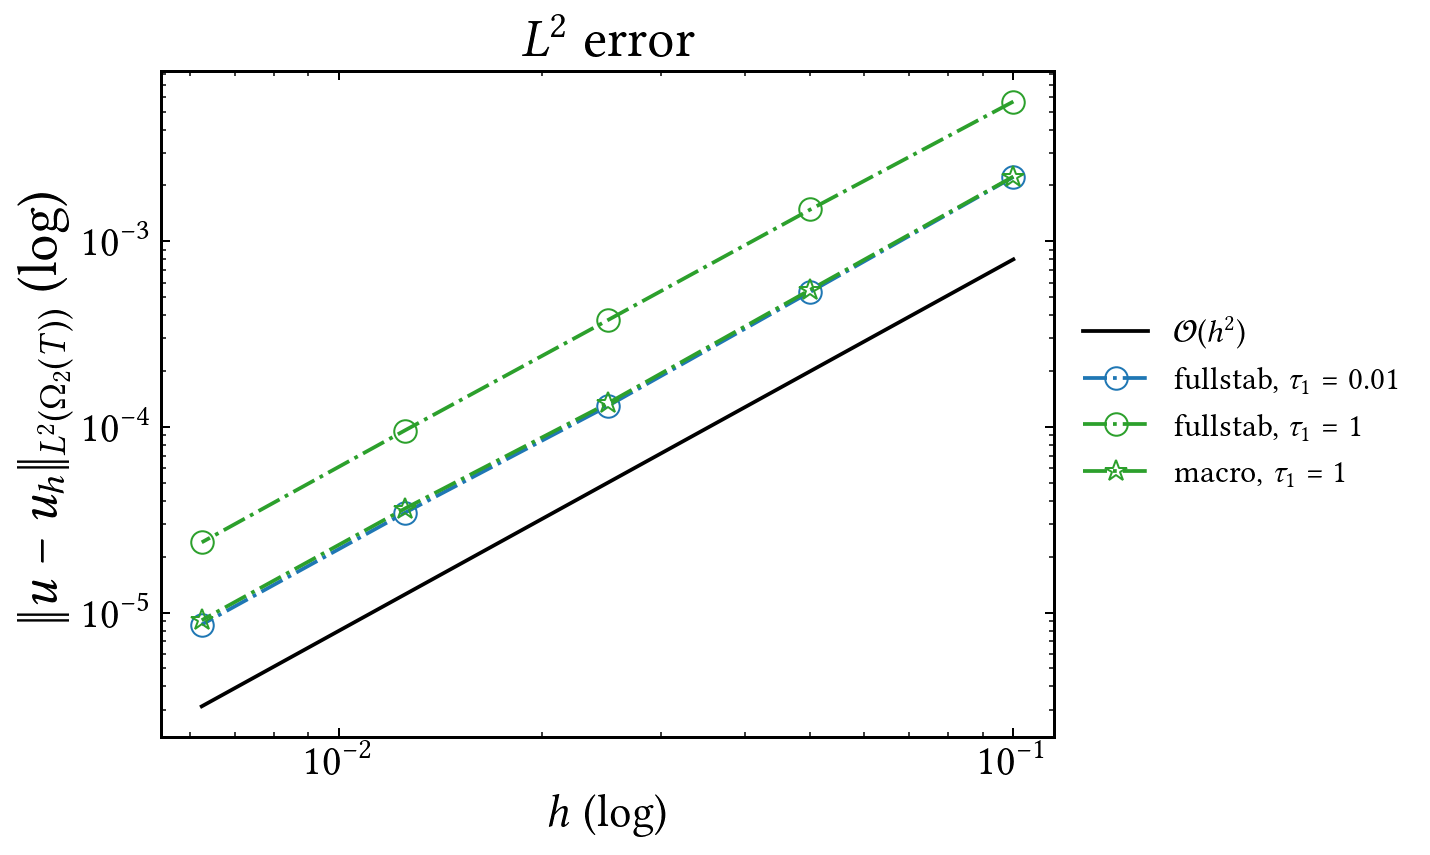

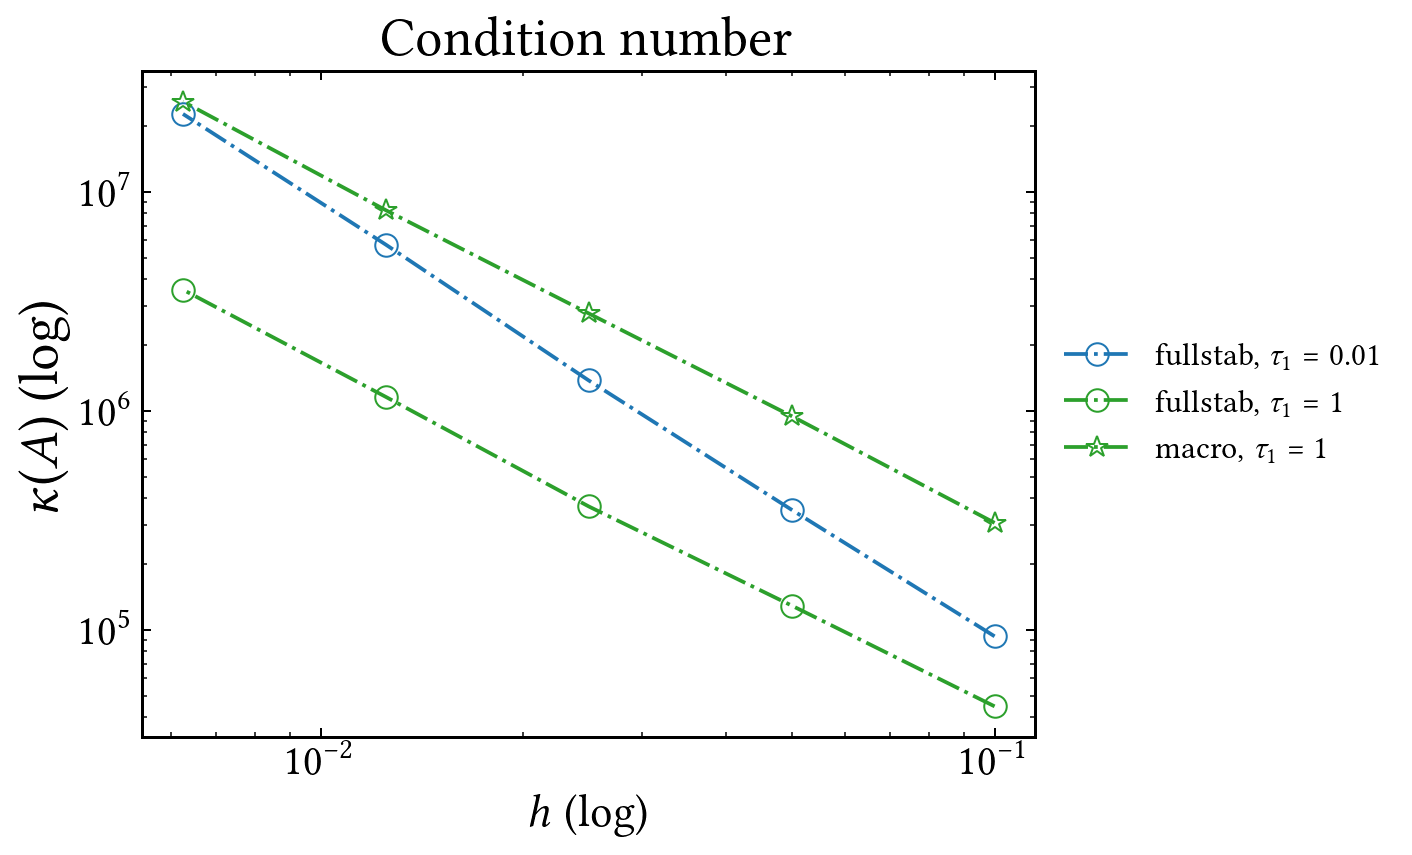

In [21]:

#* Stabilization with constant scaling tau1 

### full stabilization, tau1 = 0.01

# Classical
L2_error_classical_fullstab_tau001 = np.array([0.0022225, 0.000535117, 0.000129526, 3.44383e-05, 8.62183e-06])
condition_number_classical_fullstab_tau001 = np.array([9.342498e+04,3.533053e+05,1.376397e+06,5.740092e+06,2.268702e+07])

### macro stabilization, tau1 = 0.01

# Classical
# delta = 0.125
L2_error_classical_macro_tau001 = np.array([0.0022312, 0.000539305, 0.000128327, 3.40865e-05, 8.6021e-06])
condition_number_classical_macro_tau001 = np.array([4.064013e+05,1.279788e+06,4.635918e+06,1.461442e+07,5.953177e+07])

### full stabilization, tau1 = 1

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.00566646, 0.00148597, 0.000375725, 9.56554e-05, 2.39023e-05])
condition_number_classical_fullstab_tau1 = np.array([4.473794e+04,1.290846e+05,3.659651e+05,1.158029e+06,3.576314e+06])


### macro stabilization, tau1 = 1

# Classical
L2_error_classical_macro_tau1 = np.array([0.00223478, 0.000549143, 0.000133862, 3.62836e-05, 9.09436e-06])
condition_number_classical_macro_tau1 = np.array([3.079964e+05,9.463221e+05,2.784670e+06,8.244128e+06,2.585169e+07])


#* Stabilization with scaling h & h tau1 varies and tau2 = 1e-2
# ### full stabilization, tau1 = 0.01

# # Classical
# L2_error_classical_fullstab_tau001 = np.array([0.00225145, 0.000517967, 0.000125629, 3.19102e-05, 7.56186e-06])
# condition_number_classical_fullstab_tau001 = np.array([7.976526e+04,1.620170e+05,3.331293e+05,6.635529e+05,1.336588e+06])

# ### full stabilization, tau1 = 1

# # Classical
# L2_error_classical_fullstab_tau1 = np.array([0.00243621, 0.000569557, 0.00013572, 3.59919e-05, 8.94021e-06])
# condition_number_classical_fullstab_tau1 = np.array([2.272673e+04,6.093584e+04,1.571550e+05,4.166582e+05,9.327204e+05])


# ### macro stabilization, tau1 = 1

# # Classical
# L2_error_classical_macro_tau1 = np.array([0.00224766, 0.000551348, 0.000134354, 3.47518e-05, 8.79898e-06])
# condition_number_classical_macro_tau1 = np.array([3.501687e+04,7.544264e+04,1.704574e+05,4.196478e+05,9.374963e+05])


#* Plotting

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, .8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* n = 3

#ax3.loglog(h, L2_error_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau10neg3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 10^{-3}$")
#ax3.loglog(h, L2_error_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
ax3.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
#ax3.loglog(h, L2_error_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
ax3.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")

plt.show()

fig2, ax2 = plt.subplots()

#ax2.loglog(h, 5e3*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

#* n = 3
#ax2.loglog(h, condition_number_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau10neg3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 10^{-3}$")
#ax2.loglog(h, condition_number_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
ax2.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
#ax2.loglog(h, condition_number_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
ax2.loglog(h, condition_number_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")
ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")

plt.show()

### Macro study Frachon 1
We set $\Delta t_n = h/3$, $n=3$ and study $\tau_1$ using full stabilization vs macro.

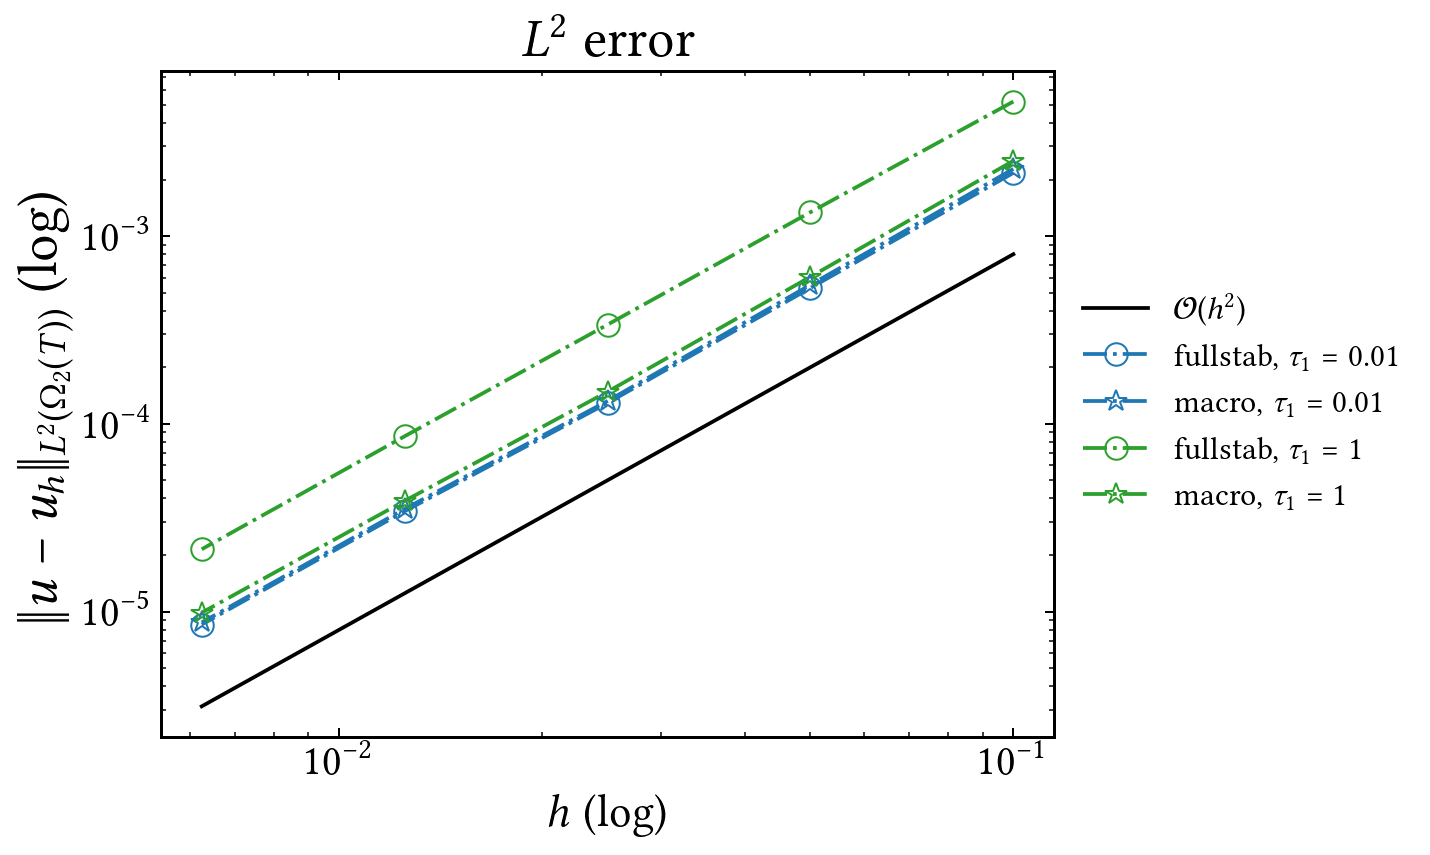

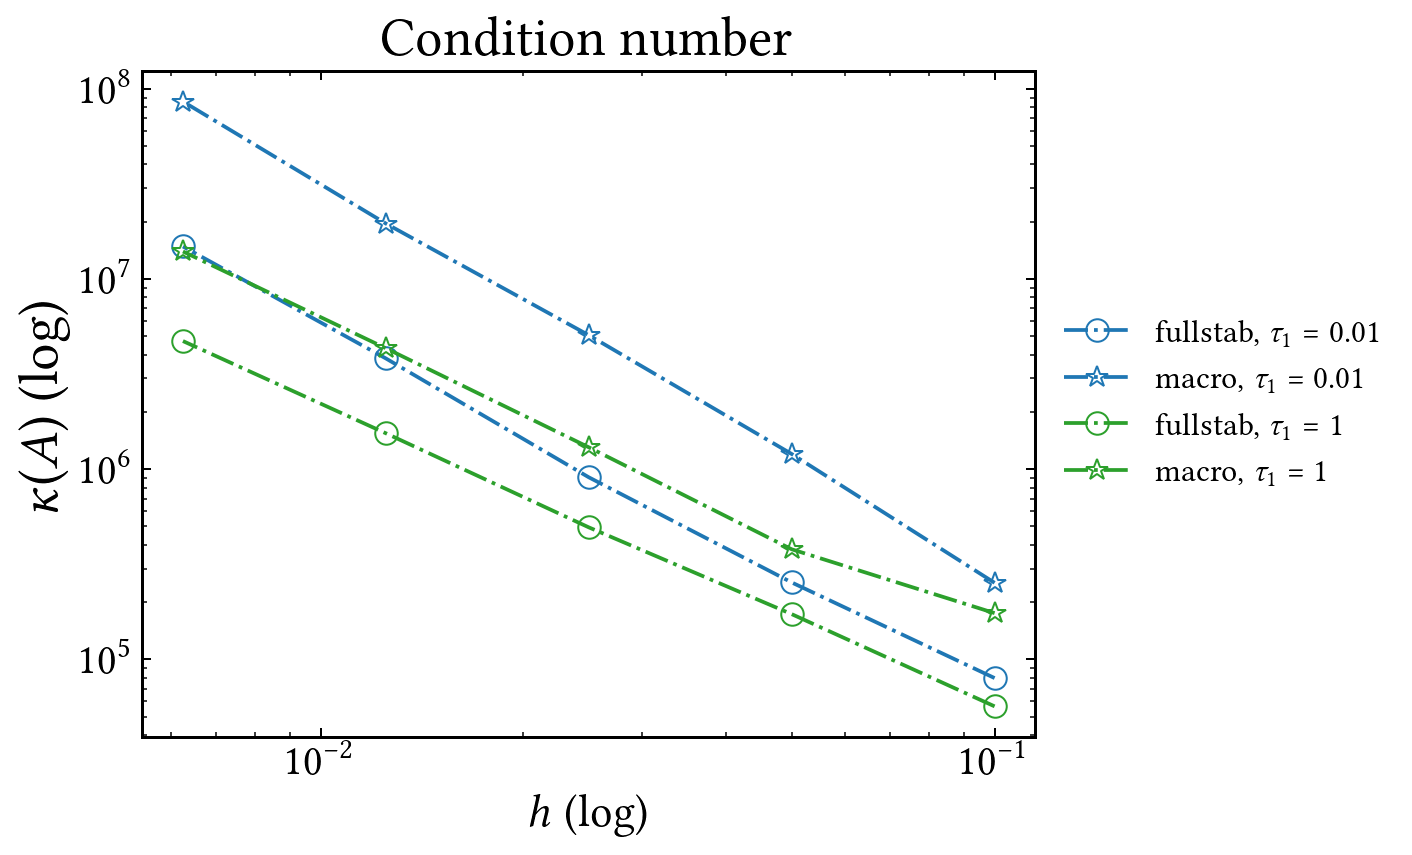

In [22]:

#* Stabilization with constant scaling tau1 

### full stabilization, tau1 = 0.01

# Classical
L2_error_classical_fullstab_tau001 = np.array([0.00217034, 0.000528759, 0.000128976, 3.42165e-05, 8.52639e-06])
condition_number_classical_fullstab_tau001 = np.array([7.963813e+04,2.535227e+05,9.057249e+05,3.819606e+06,1.481507e+07])

### macro stabilization, tau1 = 0.01
# delta = 0.25
L2_error_classical_macro_tau001 = np.array([0.00227692, 0.000549544, 0.000132191, 3.5173e-05, 8.74373e-06])
condition_number_classical_macro_tau001 = np.array([2.523736e+05,1.200943e+06,5.060398e+06,1.956560e+07,8.570549e+07])


### full stabilization, tau1 = 1

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.00520298, 0.00133955, 0.000337258, 8.57696e-05, 2.14608e-05])
condition_number_classical_fullstab_tau1 = np.array([5.654820e+04,1.727285e+05,4.940193e+05,1.543380e+06,4.714100e+06])

### macro stabilization, tau1 = 1

# Classical
# delta = 0.125
L2_error_classical_macro_tau1 = np.array([0.00227837, 0.000543461, 0.000130462, 3.43795e-05, 8.58165e-06])
condition_number_classical_macro_tau1 = np.array([3.150125e+05,1.450531e+06,3.930617e+06,1.322069e+07,4.700479e+07])

# delta = 0.25
L2_error_classical_macro_tau1 = np.array([0.0022827, 0.00055829, 0.000132759, 3.50938e-05, 8.78503e-06])
condition_number_classical_macro_tau1 = np.array([2.370590e+05,8.707685e+05,3.147717e+06,9.348703e+06,3.589471e+07])

# delta = 0.45
L2_error_classical_macro_tau1 = np.array([0.00251544, 0.00060643, 0.000148091, 3.8825e-05, 9.85707e-06])
condition_number_classical_macro_tau1 = np.array([1.748671e+05,3.788089e+05,1.302316e+06,4.320655e+06,1.394591e+07])


#* Stabilization with h & h scaling tau2 = 1e-2 

# ### full stabilization, tau1 = 0.01

# # Classical
# L2_error_classical_fullstab_tau001 = np.array([0.00223672, 0.000547705, 0.000131059, 3.53897e-05, 8.7754e-06])
# condition_number_classical_fullstab_tau001 = np.array([8.737132e+04,1.679200e+05,3.368379e+05,6.947550e+05,1.365927e+06])

# ### full stabilization, tau1 = 1

# # Classical
# L2_error_classical_fullstab_tau1 = np.array([0.0023334, 0.000557932, 0.000134662, 3.57749e-05, 8.86396e-06])
# condition_number_classical_fullstab_tau1 = np.array([3.080953e+04,7.570082e+04,1.850800e+05,4.947735e+05,1.108805e+06])


# ### macro stabilization, tau1 = 1

# # Classical
# # delta = 0.25
# L2_error_classical_macro_tau1 = np.array([0.00223781, 0.000545238, 0.00013309, 3.56161e-05, 8.83943e-06])
# condition_number_classical_macro_tau1 = np.array([4.034110e+04,8.651672e+04,1.977128e+05,4.722343e+05,1.069068e+06])



#* Plotting

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, .8e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* L2 errors

#ax3.loglog(h, L2_error_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
#ax3.loglog(h, L2_error_classical_fullstab_tau10neg3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 10^{-3}$")
#ax3.loglog(h, L2_error_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
ax3.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax3.loglog(h, L2_error_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
ax3.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$\|u - u_h\|_{L^2(\Omega_2(T))}$ (log)", fontsize=22)
ax3.set_title(r"$L^2$ error")

plt.show()

fig2, ax2 = plt.subplots()

#ax2.loglog(h, 5e3*np.power(h, -1), label=r"$\mathcal{O}(h^{-1})$", linestyle="-", color="black")

#* condition numbers
#ax2.loglog(h, condition_number_classical_fullstab_tau_10neg4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"fullstab, $\tau_1 = 10^{-4}$")
#ax2.loglog(h, condition_number_classical_fullstab_tau10neg3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"fullstab, $\tau_1 = 10^{-3}$")
#ax2.loglog(h, condition_number_classical_macro_tau10neg3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"macro, $\tau_1 = 10^{-3}$")
ax2.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"fullstab, $\tau_1 = 0.01$")
ax2.loglog(h, condition_number_classical_macro_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"macro, $\tau_1 = 0.01$")
ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"fullstab, $\tau_1 = 1$")
ax2.loglog(h, condition_number_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"macro, $\tau_1 = 1$")
ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=22)
ax2.set_title(r"Condition number")

plt.show()

## Shi 1
$$\begin{alignat*}{2}
\text{Exact solution}&:\quad u(t,x,y) &&= \frac{e^{-t/4}y}{\sqrt{(x-t)^2+y^2}}+2\\
\text{Velocity}&:\quad \mathbf{\beta} &&= [1,\ 0]^T\\
\text{Level-set}&:\quad\phi(t,x,y) &&= \sqrt{(x-t)^2+y^2}-2
\end{alignat*}$$

We study the surface problem Shi 1 in which the interface is translated with a constant speed in the horizontal-direction.

### 1.
We choose $\Delta t = h$ and $n=3$, and vary $\tau_1$.

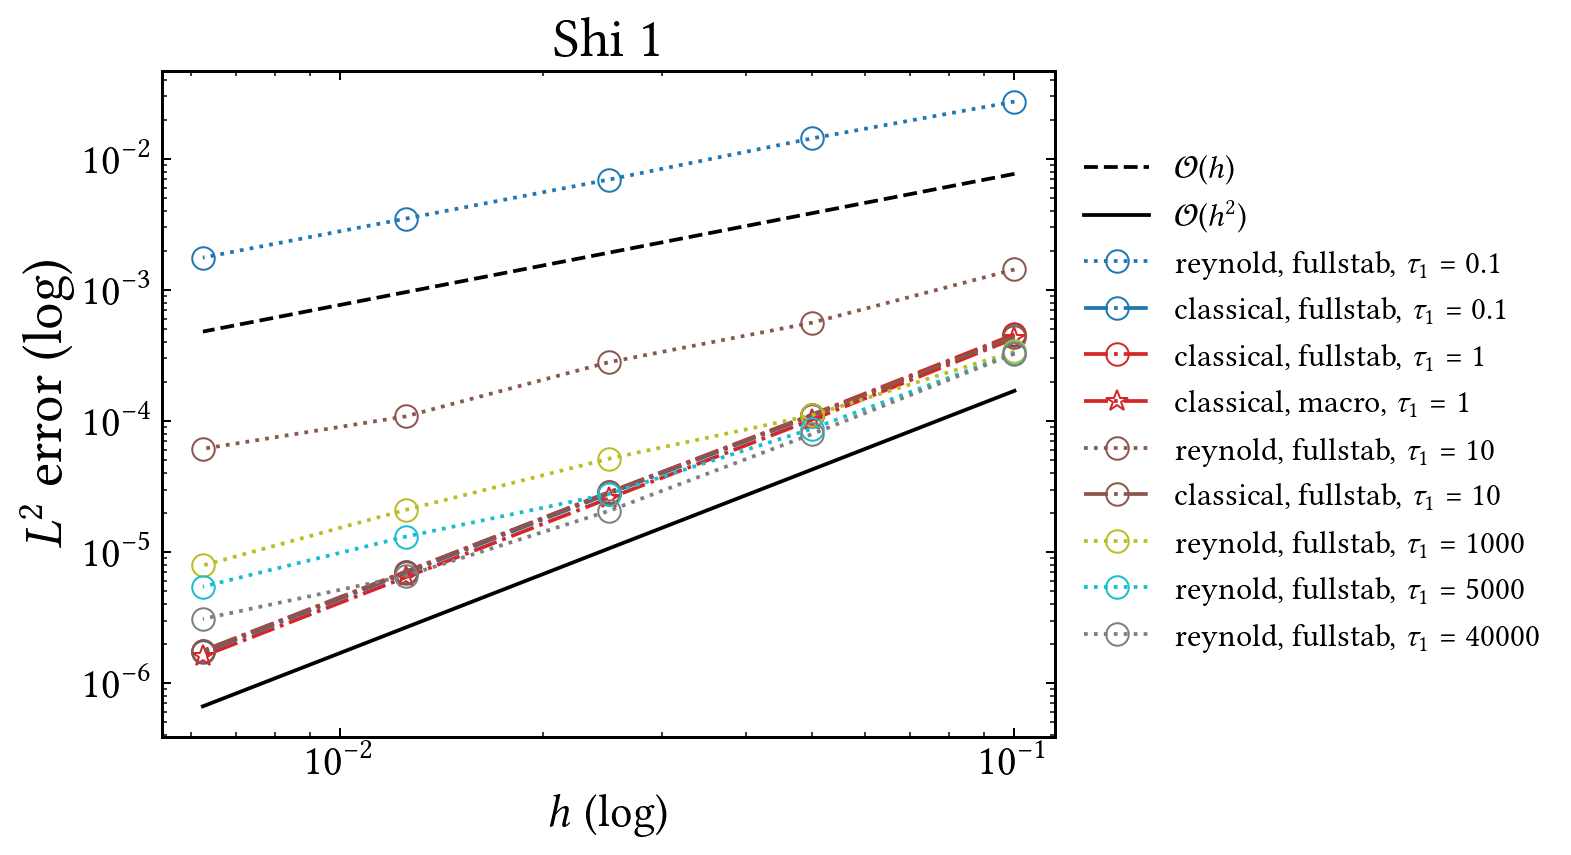

In [23]:
### tau1 = 0.1

# Conservative
#[0.0114626, 0.00584446, 0.00282749, 0.00136925, 0.000775728] added stabilization with h scaling
#[0.00413393, 0.00173817, 0.000726572, 0.000297456, 0.00013705] added stabilization with constant scaling

L2_error_conservative_fullstab_tau01 = np.array([0.0274295, 0.0143301, 0.00695377, 0.00350361, 0.00176687])
reynold_error_conservative_fullstab_tau01 = np.array([0.318965, 0.166743, 0.0856121, 0.0433316, 0.0224677])
L2_error_conservative_macro_tau01 = np.array([0.0360245, 0.0220171, 0.0139405, 0.00997911, 0.0075946])
reynold_error_conservative_macro_tau01 = np.array([0.31871, 0.166674, 0.0856541, 0.0433396, 0.0224815])


# Classical
L2_error_classical_fullstab_tau01 = np.array([0.000452215, 0.00010944, 2.78741e-05, 6.90576e-06, 1.71502e-06])
reynold_error_classical_fullstab_tau01 = np.array([0.317089, 0.166626, 0.0855057, 0.0433252, 0.022431])
L2_error_classical_macro_tau01 = np.array([0.000437589, 0.000105271, 2.68353e-05, 6.94841e-06, 1.77425e-06])
reynold_error_classical_macro_tau01 = np.array([0.317089, 0.166626, 0.0855057, 0.0433252, 0.022431])

### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00523241, 0.00268072, 0.00126223, 0.000617946, 0.000327993])
reynold_error_conservative_fullstab_tau1 = np.array([0.317353, 0.166483, 0.0855439, 0.0433317, 0.0224309])
L2_error_conservative_macro_tau1 = np.array([0.00861711, 0.00536327, 0.00310888, 0.00192369, 0.00129133])
reynold_error_conservative_macro_tau1 = np.array([0.317194, 0.166363, 0.0855621, 0.0433351, 0.0224382])

# Classical
L2_error_classical_fullstab_tau1 = np.array([0.00045772, 0.000111711, 2.85181e-05, 7.07397e-06, 1.7562e-06])
reynold_error_classical_fullstab_tau1 = np.array([0.317086, 0.166626, 0.0855057, 0.0433252, 0.022431])
L2_error_classical_macro_tau1 = np.array([0.000427781, 0.000101992, 2.56587e-05, 6.42528e-06, 1.60323e-06])
reynold_error_classical_macro_tau1 = np.array([0.317084, 0.166626, 0.0855056, 0.0433252, 0.022431])

### tau1 = 5

# Conservative

L2_error_conservative_fullstab_tau5 = np.array([0.00197392, 0.000859456, 0.000415138, 0.000178853, 9.96485e-05])
reynold_error_conservative_fullstab_tau5 = np.array([0.241846, 0.146765, 0.0570949, 0.0291509, 0.0200124])
L2_error_conservative_macro_tau5 = np.array([0.00144133, 0.000925815, 0.000618949, 0.000275412, 0.000166392])
reynold_error_conservative_macro_tau5 = np.array([0.241869, 0.146746, 0.0570946, 0.0291462, 0.0200138])

# Classical
L2_error_classical_fullstab_tau5 = np.array([0.000449339, 0.000111307, 2.85514e-05, 7.09261e-06, 1.76165e-06])
reynold_error_classical_fullstab_tau5 = np.array([0.241838, 0.146728, 0.0570957, 0.0291524, 0.0200134])
L2_error_classical_macro_tau5 = np.array([0.000448204, 0.000107872, 2.50991e-05, 6.5385e-06, 1.55205e-06])
reynold_error_classical_macro_tau5 = np.array([0.191286, 0.107725, 0.0541673, 0.0298711, 0.0182385])

### tau1 = 10

# Conservative

L2_error_conservative_fullstab_tau10 = np.array([0.00143473, 0.000561804, 0.000280867, 0.000108457, 6.13585e-05])
reynold_error_conservative_fullstab_tau10 = np.array([0.241846, 0.146749, 0.0570949, 0.0291511, 0.0200128])
L2_error_conservative_macro_tau10 = np.array([0.00144133, 0.000925815, 0.000618949, 0.000275412, 0.000166392])
reynold_error_conservative_macro_tau10 = np.array([0.256316, 0.14987, 0.0766128, 0.0363454, 0.0211965])

# Classical
L2_error_classical_fullstab_tau10 = np.array([0.000439434, 0.000110551, 2.85069e-05, 7.0909e-06, 1.76214e-06])
reynold_error_classical_fullstab_tau10 = np.array([0.256314, 0.149853, 0.0765979, 0.0363465, 0.0211965])
L2_error_classical_macro_tau10 = np.array([0.000444976, 0.000106292, 2.51004e-05, 6.43791e-06, 1.55003e-06])
reynold_error_classical_macro_tau10 = np.array([0.256313, 0.149852, 0.0765978, 0.0363465, 0.0211965])

### tau1 = 20

# Conservative

L2_error_conservative_fullstab_tau20 = np.array([0.0010678, 0.000391032, 0.000204041, 7.06407e-05, 3.91853e-05])
reynold_error_conservative_fullstab_tau20 = np.array([0.256314, 0.149865, 0.0766113, 0.0363461, 0.0211962])
L2_error_conservative_macro_tau20 = np.array([0.00134167, 0.000704932, 0.00043434, 0.000174505, 0.000110132])
reynold_error_conservative_macro_tau20 = np.array([0.256317, 0.149863, 0.0766102, 0.0363461, 0.0211963])

# Classical
L2_error_classical_fullstab_tau20 = np.array([0.000422684, 0.000109108, 2.8411e-05, 7.08438e-06, 1.76199e-06])
reynold_error_classical_fullstab_tau20 = np.array([0.256315, 0.149853, 0.0765979, 0.0363465, 0.0211965])
L2_error_classical_macro_tau20 = np.array([0.000448204, 0.000107872, 2.50991e-05, 6.53853e-06, 1.55207e-06])
reynold_error_classical_macro_tau20 = np.array([0.256313, 0.149852, 0.0765977, 0.0363465, 0.0211965])


### tau1 = 60

# Conservative

L2_error_conservative_fullstab_tau60 = np.array([0.000672799, 0.000252774, 0.000135828, 4.36665e-05, 2.09344e-05])
reynold_error_conservative_fullstab_tau60 = np.array([0.256311, 0.149857, 0.0766073, 0.0363464, 0.0211964])
L2_error_conservative_macro_tau60 = np.array([0.00143738, 0.000578237, 0.000243689, 8.97996e-05, 6.30296e-05])
reynold_error_conservative_macro_tau60 = np.array([0.256318, 0.149857, 0.0766056, 0.0363467, 0.0211963])

# Classical
#L2_error_classical_fullstab_tau60 = np.array()
#reynold_error_classical_fullstab_tau60 = np.array()
#L2_error_classical_macro_tau60 = np.array()
#reynold_error_classical_macro_tau60 = np.array()


### tau1 = 1000

# Conservative

L2_error_conservative_fullstab_tau1000 = np.array([0.000339346, 0.000110255, 5.1542e-05, 2.09949e-05, 7.90046e-06])
reynold_error_conservative_fullstab_tau1000 = np.array([0.256317, 0.149853, 0.0765997, 0.0363466, 0.0211965])
L2_error_conservative_macro_tau1000 = np.array([0.00156304, 0.000573948, 0.000109926, 3.49024e-05, 1.77175e-05])
reynold_error_conservative_macro_tau1000 = np.array([0.256319, 0.149853, 0.0765984, 0.0363468, 0.0211964])

# Classical
#L2_error_classical_fullstab_tau60 = np.array()
#reynold_error_classical_fullstab_tau60 = np.array()
#L2_error_classical_macro_tau60 = np.array()
#reynold_error_classical_macro_tau60 = np.array()


### tau1 = 5000

# Conservative

L2_error_conservative_fullstab_tau5000 = np.array([0.000328761, 8.7083e-05, 2.77628e-05, 1.31128e-05, 5.44091e-06])
reynold_error_conservative_fullstab_tau5000 = np.array([0.256319, 0.149853, 0.0765983, 0.0363465, 0.0211965])
L2_error_conservative_macro_tau5000 = np.array([0.00157142, 0.00057972, 0.000110976, 3.56493e-05, 7.18885e-06])
reynold_error_conservative_macro_tau5000 = np.array([0.256319, 0.149853, 0.0765978, 0.0363467, 0.0211964])

### tau1 = 40 000

# Conservative

L2_error_conservative_fullstab_tau40000 = np.array([0.000326645, 7.92093e-05, 2.05636e-05, 6.57666e-06, 3.08585e-06])
reynold_error_conservative_fullstab_tau40000 = np.array([0.25632, 0.149853, 0.0765979, 0.0363465, 0.0211965])
L2_error_conservative_macro_tau40000 = np.array([0.00157328, 0.000581193, 0.000112469, 3.65157e-05, 6.93697e-06])
reynold_error_conservative_macro_tau40000 = np.array([0.256319, 0.149853, 0.0765977, 0.0363467, 0.0211964])

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 7.7e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")
ax1.loglog(h, 1.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.1

ax1.loglog(h, L2_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_macro_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\tau_1=0.1$")
ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\tau_1=0.1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau01,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau01,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau01,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, reynold_error_classical_macro_tau01,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\tau_1=0.1$")

# tau1 = 1

#ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\tau_1=1$")
ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
#ax1.loglog(h, reynold_error_conservative_macro_tau1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\tau_1=1$")
#ax1.loglog(h, reynold_error_classical_macro_tau1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\tau_1=1$")

# tau1 = 5

# ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
# #ax1.loglog(h, L2_error_conservative_macro_tau5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\tau_1=5$")
# ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
# #ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\tau_1=5$")
# ax1.loglog(h, reynold_error_classical_macro_tau5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\tau_1=5$")

# tau1 = 10

ax1.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, fullstab, $\tau_1=10$")
#ax1.loglog(h, L2_error_conservative_macro_tau10,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, macro, $\tau_1=10$")
ax1.loglog(h, L2_error_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, fullstab, $\tau_1=10$")
#ax1.loglog(h, L2_error_classical_macro_tau10,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, macro, $\tau_1=10$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau10,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $\tau_1=10$")
#ax1.loglog(h, reynold_error_conservative_macro_tau10,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $\tau_1=10$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau10,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $\tau_1=10$")
#ax1.loglog(h, reynold_error_classical_macro_tau10,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $\tau_1=10$")


# tau1 = 20

#ax1.loglog(h, L2_error_conservative_fullstab_tau20,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"reynold, fullstab, $\tau_1=20$")
# #ax1.loglog(h, L2_error_conservative_macro_tau20,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"reynold, macro, $\tau_1=20$")
# ax1.loglog(h, L2_error_classical_fullstab_tau20,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"classical, fullstab, $\tau_1=20$")
# #ax1.loglog(h, L2_error_classical_macro_tau20,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"classical, macro, $\tau_1=20$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau20,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $\tau_1=20$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau20,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $\tau_1=20$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau20,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $\tau_1=20$")
# ax1.loglog(h, reynold_error_classical_macro_tau20,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $\tau_1=20$")


# tau1 = 60

# ax1.loglog(h, L2_error_conservative_fullstab_tau60,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, fullstab, $\tau_1=60$")
# ax1.loglog(h, L2_error_conservative_macro_tau60,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, macro, $\tau_1=60$")
# #ax1.loglog(h, L2_error_classical_fullstab_tau60,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"classical, fullstab, $\tau_1=60$")
# #ax1.loglog(h, L2_error_classical_macro_tau60,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"classical, macro, $\tau_1=60$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau60,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $\tau_1=60$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau60,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $\tau_1=60$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau60,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $\tau_1=60$")
# #ax1.loglog(h, reynold_error_classical_macro_tau60,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $\tau_1=60$")


# tau1 = 1000

ax1.loglog(h, L2_error_conservative_fullstab_tau1000,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"reynold, fullstab, $\tau_1=1000$")
#ax1.loglog(h, L2_error_conservative_macro_tau1000,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"reynold, macro, $\tau_1=1000$")
#ax1.loglog(h, L2_error_classical_fullstab_tau1000,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"classical, fullstab, $\tau_1=1000$")
#ax1.loglog(h, L2_error_classical_macro_tau1000,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"classical, macro, $\tau_1=1000$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau1000,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"$e_r$, fullstab, $\tau_1=1000$")
#ax1.loglog(h, reynold_error_conservative_macro_tau1000,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"$e_r$, macro, $\tau_1=1000$")
#ax1.loglog(h, reynold_error_classical_fullstab_tau1000,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"$e_r$, fullstab, $\tau_1=1000$")
#ax1.loglog(h, reynold_error_classical_macro_tau1000,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"$e_r$, macro, $\tau_1=1000$")


# tau1 = 5000

ax1.loglog(h, L2_error_conservative_fullstab_tau5000,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C9", label=r"reynold, fullstab, $\tau_1=5000$")
#ax1.loglog(h, L2_error_conservative_macro_tau5000,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C9", label=r"reynold, macro, $\tau_1=5000$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau1000,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C9", label=r"$e_r$, fullstab, $\tau_1=5000$")
#ax1.loglog(h, reynold_error_conservative_macro_tau1000,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C9", label=r"$e_r$, macro, $\tau_1=5000$")



# tau1 = 40 000

ax1.loglog(h, L2_error_conservative_fullstab_tau40000,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, fullstab, $\tau_1=40 000$")
#ax1.loglog(h, L2_error_conservative_macro_tau40000,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, macro, $\tau_1=40 000$")

#ax1.loglog(h, reynold_error_conservative_fullstab_tau40000,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $\tau_1=40 000$")
#ax1.loglog(h, reynold_error_conservative_macro_tau40000,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $\tau_1=40 000$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

#### Summary

* **Conservative scheme:** Interestingly, the error decreases for increasing $\tau_1$, until it aligns with the non-conservative method for $\tau_1 > 40000$. For small values of $\tau_1$, the convergence rate is linear.

* **Non-conservative scheme:** The $L^2$ error is virtually unchanged by changing $\tau_1$.

* **Reynold error:** There is no significant change from varying $\tau_1$.

### 1. New
We choose $n=3$, $\Delta t_n = h/3$ and vary $\tau_1$.

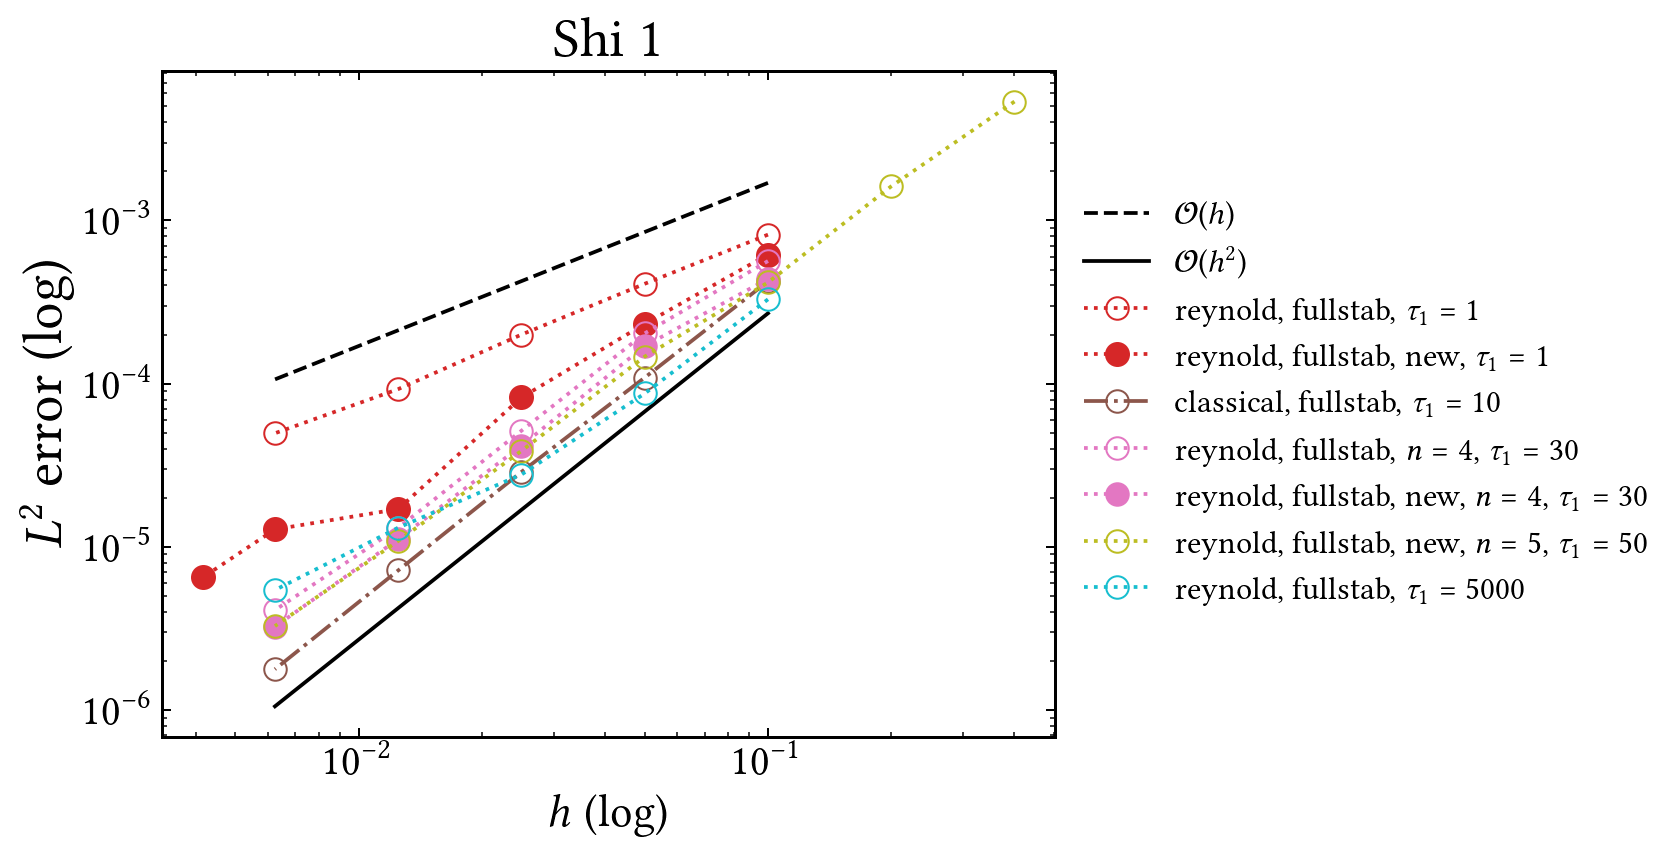

In [49]:
### tau1 = 0.1

# Conservative
L2_error_conservative_fullstab_tau01_new = np.array([0.000791984, 0.000533264, 0.000223919, 7.4953e-05, 6.29926e-05])
L2_error_conservative_fullstab_tau01_old = np.array([0.00371389, 0.002069, 0.00123914, 0.00060643, 0.000306521])
#L2_error_conservative_macro_tau01 = np.array()


# Classical
# L2_error_classical_fullstab_tau01 = np.array()
# L2_error_classical_macro_tau01 = np.array()

# ### tau1 = 1

# Conservative

#! HERE
L2_error_conservative_fullstab_tau1_new = np.array([0.000618658, 0.000232521, 8.2333e-05, 1.70517e-05, 1.28048e-05, 6.50321e-06])
condition_number_conservative_fullstab_tau1_new = np.array([4.2383e+07])    # corresponding to h = 0.00625/1.5

L2_error_conservative_fullstab_tau1_old = np.array([0.000818876, 0.000409408, 0.000199909, 9.26438e-05, 4.97064e-05])
# L2_error_conservative_macro_tau1 = np.array()

## with + 0 instead of +2
conservative = np.array([0.000530431, 0.000122939, 4.0834e-05])
classical = np.array([0.000466244, 0.000112729, 2.91355e-05])

""" Conservative non-shifted
 Iteration       :      10/80
 Time            :      0.05625
 t_n -> || u-uex||_2 = 0.000167544
 t_{n+1} -> || u-uex||_2 = 4.46359e-05
"""

""" Conservative shifted
 Iteration       :      10/80
 Time            :      0.05625
 t_n -> || u-uex||_2 = 0.000396558
 t_{n+1} -> || u-uex||_2 = 8.85424e-05
"""


# # Classical
# L2_error_classical_fullstab_tau1 = np.array()
# L2_error_classical_macro_tau1 = np.array()

# ### tau1 = 5

# # Conservative

L2_error_conservative_fullstab_tau5_new = np.array([0.000563124, 0.000205672, 5.45481e-05, 1.19849e-05, 5.20764e-06])
L2_error_conservative_fullstab_tau5_old = np.array([0.000640982, 0.000241612, 8.26722e-05, 2.7915e-05, 1.55249e-05])
#L2_error_conservative_macro_tau5 = np.array()


# # Classical
# L2_error_classical_fullstab_tau5 = np.array()
# L2_error_classical_macro_tau5 = np.array()


### tau1 = 10

# Conservative
L2_error_conservative_fullstab_tau10_new = np.array([0.000520339, 0.00019498, 4.90342e-05, 1.15282e-05, 4.07059e-06])
L2_error_conservative_fullstab_tau10_old = np.array([0.000618346, 0.000222612, 6.56193e-05, 1.84188e-05, 9.75983e-06])
L2_error_conservative_macro_tau10_new = np.array([0.00495736, 0.00765934, 0.00381394, 0.000517111, 0.000924788])


L2_error_conservative_fullstab_tau10_n4_new = np.array([0.000518799, 0.000195206, 4.83952e-05, 1.17659e-05, 3.76894e-06])   # n = 4, tau1 = tau2 = 10

[0.000518799, 0.000195206, 4.83952e-05, 1.17659e-05, 3.76913e-06]
condition_number_conservative_fullstab_tau10_n4_new = np.array([7.055868e+05,2.479332e+06,8.636472e+06,2.677928e+07,7.573571e+07])
#L2_error_conservative_fullstab_tau10_n5_new = np.array()   # n = 5, tau1 = tau2 = 10

# Classical
L2_error_classical_fullstab_tau10 = np.array([0.000423866, 0.000108957, 2.88072e-05, 7.17842e-06, 1.77998e-06])
# L2_error_classical_macro_tau10 = np.array()
condition_number_classical_fullstab_tau10_old = np.array([2.338114e+05,7.051551e+05,2.160486e+06])


# also added stabilization in last quadrature point but with dt(v). n = 4, all taus = 10
L2_error_conservative_newnew = np.array([0.000373197, 0.000100409, 2.50343e-05, 7.29707e-06, 2.22333e-06])
condition_number_conservative_newnew = np.array([6.954628e+07,1.005450e+09,1.601535e+10,2.544949e+11,0])
condition_number_conservative_old = np.array([2.338007e+05,7.051538e+05,2.160488e+06])

# stab term dt(v) scaled with h
L2_error_conservative_newnewnew = np.array([0.000437293, 0.000169201, 3.83297e-05, 1.06988e-05, 3.04519e-06])
condition_number_conservative_newnewnew = np.array([6.640339e+06,4.999916e+07,4.012334e+08,3.184184e+09,2.538491e+10])


### tau1 = 30

# Conservative, Vh = P1 
L2_error_conservative_fullstab_tau30_n4_ = np.array([0.00590038, 0.00212735, 0.000564351, 0.000203431, 5.15157e-05, 1.30793e-05, 4.0989e-06])

# With added stabilization in last quadrature point, and that term scales with h, and tau1 = tau2 = 30, Vh = P1, and n=4
L2_error_conservative_fullstab_tau30_n4_new_ = np.array([0.00530766, 0.00169055, 0.00043869, 0.000170132, 4.16678e-05, 1.11747e-05, 3.24107e-06])


### tau1 = 50

# With added stabilization in last quadrature point, and that term scales with h, and tau1 = tau2 = 50, Vh = P1, and n=5 and dT=h/4
L2_error_conservative_fullstab_tau50_n5_new_ = np.array([0.00535463, 0.00161916, 0.000416988, 0.000146564, 3.87727e-05, 1.08704e-05, 3.27358e-06])


### tau1 = 5000
L2_error_conservative_fullstab_tau5000 = np.array([0.000328761, 8.7083e-05, 2.77628e-05, 1.31128e-05, 5.44091e-06])




### test without source term, are the methods then the same? no, they are not.
classical = np.array([0.0118828, 0.00277303, 0.000680679])
classical_with_source = np.array([0.010149, 0.00142316, 0.000375795])
conservative = np.array([0.0172886, 0.00434834, 0.0013919])
conservative_with_source = np.array([0.0171533, 0.00370673, 0.00128164])
paper = np.array([0.0691, 0.0298, 0.0112])

# the results are almost identical if we solve for the level set instead

h__ = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.00416667] 
h_ = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625]
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 1.7e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")
ax1.loglog(h, 2.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.1

#ax1.loglog(h, L2_error_conservative_fullstab_tau01_old,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_fullstab_tau01_new,  marker='o', markersize=9,linestyle=":", color="C0", label=r"reynold, fullstab, new, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_conservative_macro_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, L2_error_classical_macro_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\tau_1=0.1$")

# tau1 = 1

ax1.loglog(h, L2_error_conservative_fullstab_tau1_old,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\tau_1=1$")
ax1.loglog(h__, L2_error_conservative_fullstab_tau1_new,  marker='o', markersize=9,linestyle=":", color="C3", label=r"reynold, fullstab, new, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\tau_1=1$")
#ax1.loglog(h, L2_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\tau_1=1$")

# tau1 = 5

#ax1.loglog(h, L2_error_conservative_fullstab_tau5_old,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\tau_1=5$")
#ax1.loglog(h, L2_error_conservative_fullstab_tau5_new,  marker='o', markersize=9,linestyle=":", color="C4", label=r"reynold, fullstab, new, $\tau_1=5$")
# ax1.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\tau_1=5$")
# #ax1.loglog(h, L2_error_classical_macro_tau5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\tau_1=5$")

# tau1 = 10

#ax1.loglog(h, L2_error_conservative_fullstab_tau10_old,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, fullstab, $\tau_1=10$")
#ax1.loglog(h, L2_error_conservative_fullstab_tau10_new,  marker='o', markersize=9,linestyle=":", color="C5", label=r"reynold, fullstab, new, $\tau_1=10$")
#ax1.loglog(h, L2_error_conservative_fullstab_tau10_n4_new,  marker='o', markersize=9,linestyle=":", color="C5", label=r"reynold, fullstab, new, $\tau_1=10$")
#ax1.loglog(h, L2_error_conservative_macro_tau10_new,  marker='*', markersize=9,linestyle=":", color="C5", label=r"reynold, macro, new, $n=4$, $\tau_1=10$")
ax1.loglog(h, L2_error_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, fullstab, $\tau_1=10$")
#ax1.loglog(h, L2_error_classical_macro_tau10,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, macro, $\tau_1=10$")


# tau1 = 20

# ax1.loglog(h, L2_error_conservative_fullstab_tau20,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"reynold, fullstab, $\tau_1=20$")
# #ax1.loglog(h, L2_error_conservative_macro_tau20,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"reynold, macro, $\tau_1=20$")
# ax1.loglog(h, L2_error_classical_fullstab_tau20,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"classical, fullstab, $\tau_1=20$")
# #ax1.loglog(h, L2_error_classical_macro_tau20,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"classical, macro, $\tau_1=20$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau20,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $\tau_1=20$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau20,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $\tau_1=20$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau20,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $\tau_1=20$")
# ax1.loglog(h, reynold_error_classical_macro_tau20,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $\tau_1=20$")

# tau1 = 30

#! put back
ax1.loglog(h, L2_error_conservative_fullstab_tau30_n4_[2:],  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"reynold, fullstab, $n=4$, $\tau_1=30$")
ax1.loglog(h, L2_error_conservative_fullstab_tau30_n4_new_[2:],  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C6", label=r"reynold, fullstab, new, $n=4$, $\tau_1=30$")

ax1.loglog(h_, L2_error_conservative_fullstab_tau50_n5_new_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"reynold, fullstab, new, $n=5$, $\tau_1=50$")



# tau1 = 60

# ax1.loglog(h, L2_error_conservative_fullstab_tau60,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, fullstab, $\tau_1=60$")
# ax1.loglog(h, L2_error_conservative_macro_tau60,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, macro, $\tau_1=60$")
# #ax1.loglog(h, L2_error_classical_fullstab_tau60,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"classical, fullstab, $\tau_1=60$")
# #ax1.loglog(h, L2_error_classical_macro_tau60,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"classical, macro, $\tau_1=60$")

# #ax1.loglog(h, reynold_error_conservative_fullstab_tau60,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $\tau_1=60$")
# #ax1.loglog(h, reynold_error_conservative_macro_tau60,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $\tau_1=60$")
# #ax1.loglog(h, reynold_error_classical_fullstab_tau60,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $\tau_1=60$")
# #ax1.loglog(h, reynold_error_classical_macro_tau60,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $\tau_1=60$")


# tau1 = 1000

#ax1.loglog(h, L2_error_conservative_fullstab_tau1000,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"reynold, fullstab, $\tau_1=1000$")
#ax1.loglog(h, L2_error_conservative_macro_tau1000,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"reynold, macro, $\tau_1=1000$")
#ax1.loglog(h, L2_error_classical_fullstab_tau1000,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"classical, fullstab, $\tau_1=1000$")
#ax1.loglog(h, L2_error_classical_macro_tau1000,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C8", label=r"classical, macro, $\tau_1=1000$")


# tau1 = 5000

ax1.loglog(h, L2_error_conservative_fullstab_tau5000,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C9", label=r"reynold, fullstab, $\tau_1=5000$")
#ax1.loglog(h, L2_error_conservative_macro_tau5000,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C9", label=r"reynold, macro, $\tau_1=5000$")

# tau1 = 40 000

# ax1.loglog(h, L2_error_conservative_fullstab_tau40000,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, fullstab, $\tau_1=40 000$")
# #ax1.loglog(h, L2_error_conservative_macro_tau40000,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"reynold, macro, $\tau_1=40 000$")

ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

### 2.
We choose $\tau_1 = 0.1$, $n=3$ and vary $\Delta t_n$.

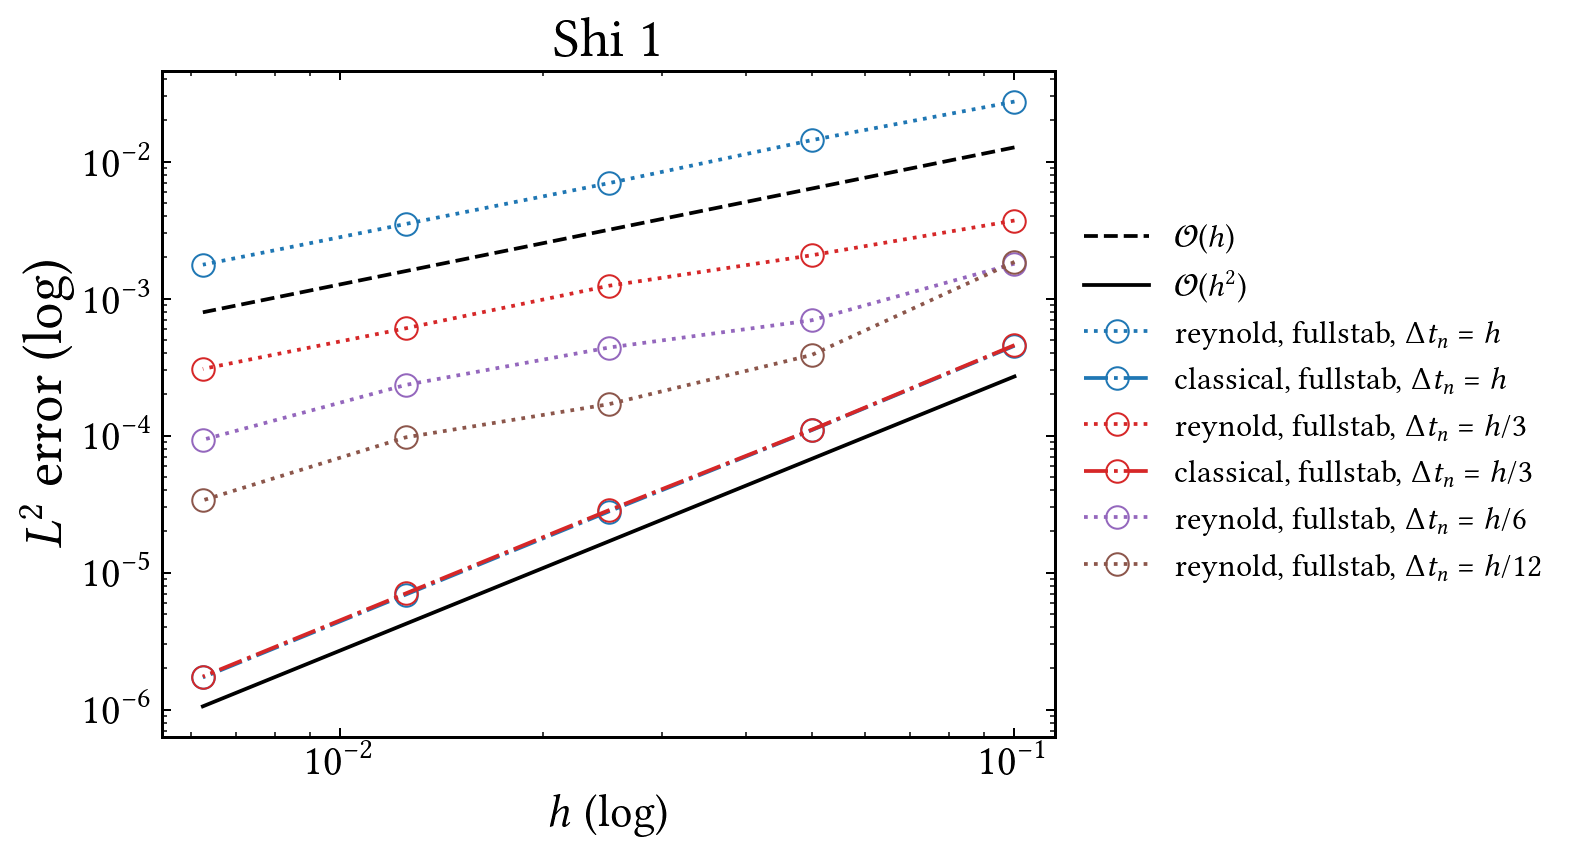

In [25]:
### dT = h

# Conservative
L2_error_conservative_fullstab_dt1 = np.array([0.0274295, 0.0143301, 0.00695377, 0.00350361, 0.00176687])
reynold_error_conservative_fullstab_dt1 = np.array([0.318965, 0.166743, 0.0856121, 0.0433316, 0.0224677])
L2_error_conservative_macro_dt1 = np.array([0.0360245, 0.0220171, 0.0139405, 0.00997911, 0.0075946])
reynold_error_conservative_macro_dt1 = np.array([0.31871, 0.166674, 0.0856541, 0.0433396, 0.0224815])


# Classical
L2_error_classical_fullstab_dt1 = np.array([0.000452215, 0.00010944, 2.78741e-05, 6.90576e-06, 1.71502e-06])
reynold_error_classical_fullstab_dt1 = np.array([0.317089, 0.166626, 0.0855057, 0.0433252, 0.022431])
L2_error_classical_macro_dt1 = np.array([0.000437589, 0.000105271, 2.68353e-05, 6.94841e-06, 1.77425e-06])
reynold_error_classical_macro_dt1 = np.array([0.317089, 0.166626, 0.0855057, 0.0433252, 0.022431])

### dT = h/3

# Conservative
L2_error_conservative_fullstab_dt3 = np.array([0.00371389, 0.002069, 0.00123914, 0.00060643, 0.000306521])
reynold_error_conservative_fullstab_dt3 = np.array([0.271714, 0.134949, 0.0778699, 0.0355992, 0.0181866])
L2_error_conservative_macro_dt3 = np.array([0.005212, 0.00533245, 0.0018651, 0.00120239, 0.000856488])
reynold_error_conservative_macro_dt3 = np.array([0.271615, 0.134884, 0.0778478, 0.0356018, 0.0181816])

# Classical
L2_error_classical_fullstab_dt3 = np.array([0.000457159, 0.00011007, 2.84512e-05, 7.03797e-06, 1.74082e-06])
reynold_error_classical_fullstab_dt3 = np.array([0.271702, 0.134966, 0.0777054, 0.0355989, 0.0181856])
L2_error_classical_macro_dt3 = np.array([0.000440712, 0.000105244, 2.75757e-05, 6.77839e-06, 1.67198e-06])
reynold_error_classical_macro_dt3 = np.array([0.271696, 0.134966, 0.0777053, 0.0355989, 0.0181856])

### dT = h/6

# Conservative

L2_error_conservative_fullstab_dt6 = np.array([0.00179935, 0.000693866, 0.000438708, 0.000234181, 9.30989e-05])
reynold_error_conservative_fullstab_dt6 = np.array([0.321345, 0.164821, 0.0891154, 0.0440288, 0.0223709])
L2_error_conservative_macro_dt6 = np.array([0.008429, 0.00354338, 0.0015194, 0.000845009, 0.000503255])
reynold_error_conservative_macro_dt6 = np.array([0.323734, 0.165968, 0.0890368, 0.0440253, 0.0223668])

# # Classical
# L2_error_classical_fullstab_dt6 = np.array()
# reynold_error_classical_fullstab_dt6 = np.array()
# L2_error_classical_macro_dt6 = np.array()
# reynold_error_classical_macro_dt6 = np.array()


### dT = h/12

# Conservative

L2_error_conservative_fullstab_dt12 = np.array([0.00185251, 0.000387143, 0.000169264, 9.70328e-05, 3.36656e-05])
reynold_error_conservative_fullstab_dt12 = np.array([0.321166, 0.164753, 0.0884619, 0.0439529, 0.0223064])
L2_error_conservative_macro_dt12 = np.array( [0.00902066, 0.00282936, 0.00118227, 0.000498688, 0.000141666])
reynold_error_conservative_macro_dt12 = np.array([0.329501, 0.165657, 0.0884543, 0.0439742, 0.0223111])

# # Classical
# L2_error_classical_fullstab_dt6 = np.array()
# reynold_error_classical_fullstab_dt6 = np.array()
# L2_error_classical_macro_dt6 = np.array()
# reynold_error_classical_macro_dt6 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 12.7e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")
ax1.loglog(h, 2.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# dT = h

ax1.loglog(h, L2_error_conservative_fullstab_dt1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, fullstab, $\Delta t_n = h$")
#ax1.loglog(h, L2_error_conservative_macro_dt1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, macro, $\Delta t_n = h$")
ax1.loglog(h, L2_error_classical_fullstab_dt1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, fullstab, $\Delta t_n = h$")
#ax1.loglog(h, L2_error_classical_macro_dt1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, macro, $\Delta t_n = h$")

#ax1.loglog(h, reynold_error_conservative_fullstab_dt1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")
#ax1.loglog(h, reynold_error_conservative_macro_dt1,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\Delta t_n = h$")
#ax1.loglog(h, reynold_error_classical_fullstab_dt1,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $\Delta t_n = h$")
#ax1.loglog(h, reynold_error_classical_macro_dt1,  marker='^', markersize=9,linestyle="-.",markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $\Delta t_n = h$")

# dT = h/3

ax1.loglog(h, L2_error_conservative_fullstab_dt3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, fullstab, $\Delta t_n = h/3$")
#ax1.loglog(h, L2_error_conservative_macro_dt3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, macro, $\Delta t_n = h/3$")
ax1.loglog(h, L2_error_classical_fullstab_dt3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, fullstab, $\Delta t_n = h/3$")
#ax1.loglog(h, L2_error_classical_macro_dt3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, macro, $\Delta t_n = h/3$")

#ax1.loglog(h, reynold_error_conservative_fullstab_dt3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\Delta t_n = h/3$")
#ax1.loglog(h, reynold_error_conservative_macro_dt3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\Delta t_n = h/3$")
#ax1.loglog(h, reynold_error_classical_fullstab_dt3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $\Delta t_n = h/3$")
#ax1.loglog(h, reynold_error_classical_macro_dt3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $\Delta t_n = h/3$")

# dT = h/6

ax1.loglog(h, L2_error_conservative_fullstab_dt6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, fullstab, $\Delta t_n = h/6$")
# # #ax1.loglog(h, L2_error_conservative_macro_dt6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"reynold, macro, $\Delta t_n = h/6$")
# ax1.loglog(h, L2_error_classical_fullstab_dt6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, fullstab, $\Delta t_n = h/6$")
# # #ax1.loglog(h, L2_error_classical_macro_dt6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"classical, macro, $\Delta t_n = h/6$")

#ax1.loglog(h, reynold_error_conservative_fullstab_dt6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")
#ax1.loglog(h, reynold_error_conservative_macro_dt6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\Delta t_n = h/6$")
# # #ax1.loglog(h, reynold_error_classical_fullstab_dt6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $\Delta t_n = h/6$")
# ax1.loglog(h, reynold_error_classical_macro_dt6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $\Delta t_n = h/6$")

# dT = h/12

ax1.loglog(h, L2_error_conservative_fullstab_dt12,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, fullstab, $\Delta t_n = h/12$")
# # #ax1.loglog(h, L2_error_conservative_macro_dt12,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"reynold, macro, $\Delta t_n = h/12$")
# ax1.loglog(h, L2_error_classical_fullstab_dt12,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, fullstab, $\Delta t_n = h/12$")
# # #ax1.loglog(h, L2_error_classical_macro_dt12,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"classical, macro, $\Delta t_n = h/12$")

#ax1.loglog(h, reynold_error_conservative_fullstab_dt12,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $\Delta t_n = h/12$")
#ax1.loglog(h, reynold_error_conservative_macro_dt12,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $\Delta t_n = h/12$")
# # #ax1.loglog(h, reynold_error_classical_fullstab_dt12,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $\Delta t_n = h/12$")
# ax1.loglog(h, reynold_error_classical_macro_dt12,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $\Delta t_n = h/12$")



ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

#### Summary

* **Conservative scheme:** The $L^2$ error steadily decreases when the time step size is decreased (i.e. when $k$ increases for $\Delta t_n = h/k$).
* **Non-conservative scheme:** Remains constant w.r.t. time step size.
* **Reynold error:** Almost no difference w.r.t. time step size.

TODO!!!! Do dT = h/24 


### 3. 
We choose $\tau_1 = 0.1$, $\Delta t_n = h$ and vary the quadrature order $n$.

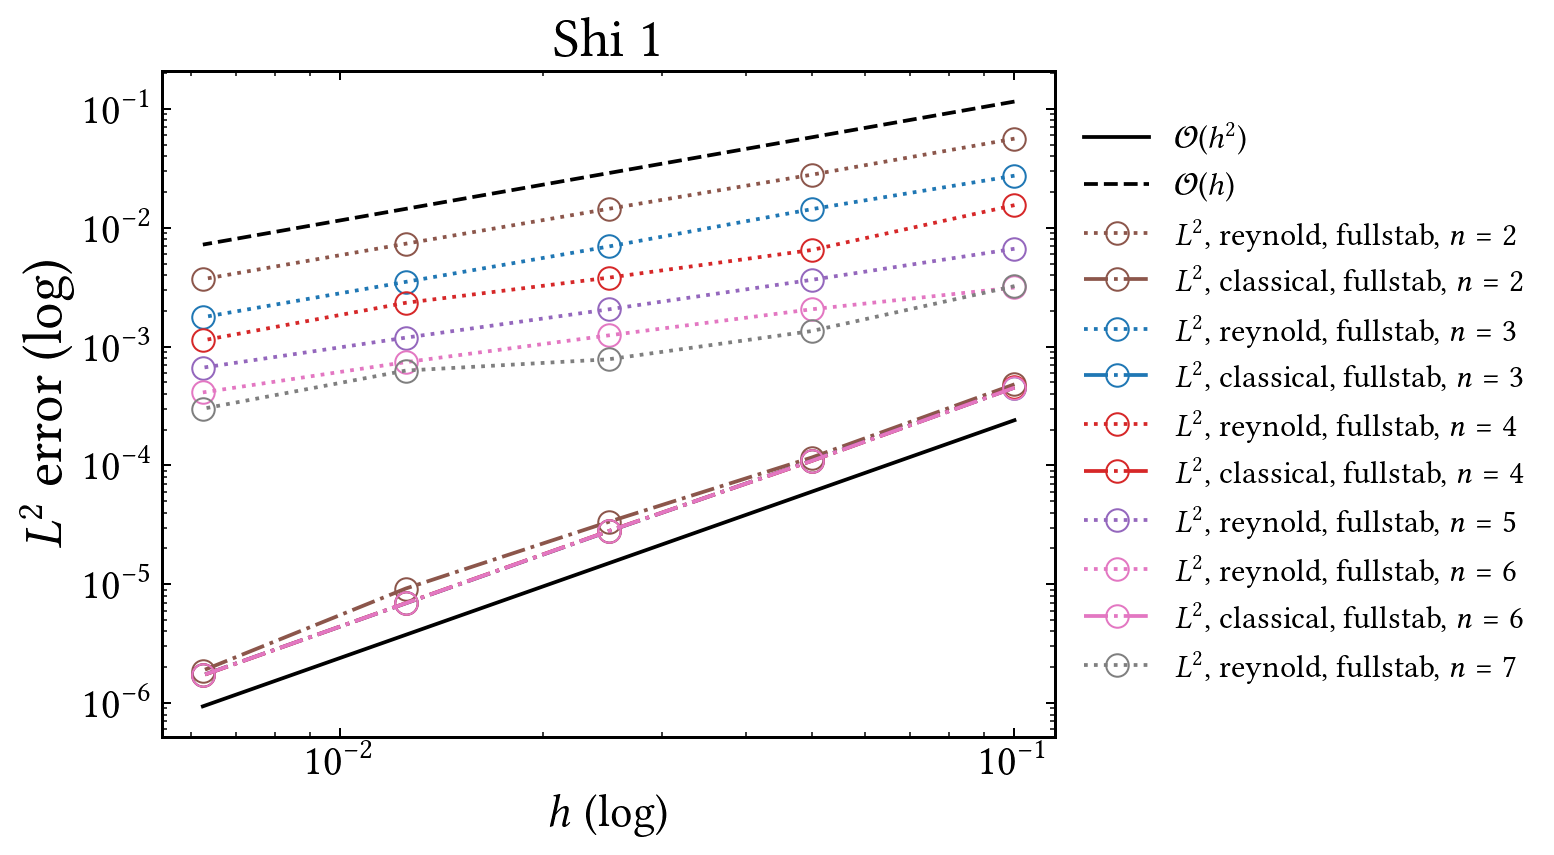

In [26]:
### n = 2

# Conservative
L2_error_conservative_fullstab_n2 = np.array([0.0562491, 0.0279377, 0.0144332, 0.00734029, 0.00369108])
reynold_error_conservative_fullstab_n2 = np.array([1.33664, 0.645808, 0.345321, 0.166961, 0.0857269])
L2_error_conservative_macro_n2 = np.array([0.164247, 0.0875409, 0.0531575, 0.0261275, 0.0152526])
reynold_error_conservative_macro_n2 = np.array([3.01268, 1.52406, 0.788726, 0.399136, 0.20201])


# Classical
L2_error_classical_fullstab_n2 = np.array([0.000481245, 0.000116362, 3.34656e-05, 9.19548e-06, 1.87781e-06])
reynold_error_classical_fullstab_n2 = np.array([0.32124, 0.165581, 0.0841675, 0.0433351, 0.0216027])
L2_error_classical_macro_n2 = np.array([0.000969099, 0.000538545, 0.000258879, 0.00014122, 7.05685e-05])
reynold_error_classical_macro_n2 = np.array([0.321241, 0.165581, 0.0841677, 0.0433351, 0.0216027])


### n = 3

# Conservative
L2_error_conservative_fullstab_n3 = np.array([0.0274295, 0.0143301, 0.00695377, 0.00350361, 0.00176687])
reynold_error_conservative_fullstab_n3 = np.array([0.319024, 0.166753, 0.0856122, 0.0433317, 0.0224677])
L2_error_conservative_macro_n3 = np.array([0.0360245, 0.0220171, 0.0139405, 0.00997911, 0.0075946])
reynold_error_conservative_macro_n3 = np.array([0.318825, 0.166696, 0.0856543, 0.0433397, 0.0224815])


# Classical
L2_error_classical_fullstab_n3= np.array([0.000452215, 0.00010944, 2.78741e-05, 6.90576e-06, 1.71502e-06])
reynold_error_classical_fullstab_n3 = np.array([0.317089, 0.166626, 0.0855057, 0.0433252, 0.022431])
L2_error_classical_macro_n3 = np.array([0.000437589, 0.000105271, 2.68353e-05, 6.94841e-06, 1.77425e-06])
reynold_error_classical_macro_n3 = np.array([0.317089, 0.166626, 0.0855057, 0.0433252, 0.022431])

### n = 4

# Conservative
L2_error_conservative_fullstab_n4 = np.array([0.0155019, 0.00649335, 0.00380125, 0.0023354, 0.00112735])
reynold_error_conservative_fullstab_n4 = np.array([0.353725, 0.173578, 0.0873004, 0.0490638, 0.0233346])
L2_error_conservative_macro_n4 = np.array([0.0192811, 0.00799941, 0.00511589, 0.00369977, 0.00240615])
reynold_error_conservative_macro_n4 = np.array([0.353718, 0.173595, 0.0873046, 0.0490547, 0.0233288])


# Classical
L2_error_classical_fullstab_n4 = np.array([0.000452688, 0.000108957, 2.7994e-05, 6.92344e-06, 1.71028e-06])
reynold_error_classical_fullstab_n4 = np.array([0.348493, 0.173662, 0.0873195, 0.0488362, 0.0233265])
L2_error_classical_macro_n4 = np.array([0.000437994, 0.000104237, 2.68656e-05, 6.62486e-06, 1.6297e-06])
reynold_error_classical_macro_n4 = np.array([0.348493, 0.173662, 0.0873195, 0.0488362, 0.0233265])

### n = 5

# Conservative
L2_error_conservative_fullstab_n5 = np.array([0.00665666, 0.00364291, 0.0020569, 0.00118855, 0.000664902])
reynold_error_conservative_fullstab_n5 = np.array([0.321827, 0.163448, 0.0934324, 0.0452926, 0.0223949])
L2_error_conservative_macro_n5 = np.array([0.0086737, 0.00444662, 0.0025691, 0.00167216, 0.00108026])
reynold_error_conservative_macro_n5 = np.array([0.32179, 0.163473, 0.0933853, 0.045278, 0.022393])


### n = 6

# Conservative
L2_error_conservative_fullstab_n6 = np.array([0.00314193, 0.00205923, 0.0012419, 0.00073947, 0.000411387])
reynold_error_conservative_fullstab_n6 = np.array([0.318535, 0.164303, 0.0906496, 0.0446577, 0.0228397])
#L2_error_conservative_macro_n6 = np.array()
#reynold_error_conservative_macro_n6 = np.array()

# Classical
L2_error_classical_fullstab_n6 = np.array([0.000451073, 0.000109063, 2.79834e-05, 6.92116e-06, 1.71235e-06])
reynold_error_classical_fullstab_n6 = np.array([0.318474, 0.164301, 0.0906394, 0.0446557, 0.0228399])
#L2_error_classical_macro_n6 = np.array()
#reynold_error_classical_macro_n6 = np.array()


### n = 7

# Conservative
L2_error_conservative_fullstab_n7 = np.array([0.00322831, 0.00135031, 0.000781679, 0.000628135, 0.000299749])
reynold_error_conservative_fullstab_n7 = np.array([0.187901, 0.111917, 0.0501459, 0.0259084, 0.0153177])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.4e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
ax3.loglog(h, 115.4e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")

#* n = 2

ax3.loglog(h, L2_error_conservative_fullstab_n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, fullstab, $n=2$")
#ax3.loglog(h, L2_error_conservative_macro_n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, macro, $n=2$")
ax3.loglog(h, L2_error_classical_fullstab_n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, fullstab, $n=2$")
#ax3.loglog(h, L2_error_classical_macro_n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, macro, $n=2$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
#ax3.loglog(h, reynold_error_conservative_macro_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $n=2$")
#ax3.loglog(h, reynold_error_classical_fullstab_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
#ax3.loglog(h, reynold_error_classical_macro_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, $n=2$")


#* n = 3

ax3.loglog(h, L2_error_conservative_fullstab_n3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, fullstab, $n=3$")
#ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
ax3.loglog(h, L2_error_classical_fullstab_n3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, fullstab, $n=3$")
#ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_conservative_macro_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $n=3$")
#ax3.loglog(h, reynold_error_classical_fullstab_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_classical_macro_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, $n=3$")

#* n = 4

ax3.loglog(h, L2_error_conservative_fullstab_n4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, fullstab, $n=4$")
#ax3.loglog(h, L2_error_conservative_macro_n4,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, macro, $n=4$")
ax3.loglog(h, L2_error_classical_fullstab_n4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, fullstab, $n=4$")
#ax3.loglog(h, L2_error_classical_macro_n4,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, macro, $n=4$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n4,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_conservative_macro_n4,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $n=4$")
#ax3.loglog(h, reynold_error_classical_fullstab_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_classical_macro_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, $n=4$")

#* n = 5

ax3.loglog(h, L2_error_conservative_fullstab_n5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, fullstab, $n=5$")
#ax3.loglog(h, L2_error_conservative_macro_n5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, macro, $n=5$")
#ax3.loglog(h, L2_error_classical_fullstab_n5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, fullstab, $n=5$")
#ax3.loglog(h, L2_error_classical_macro_n5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, macro, $n=5$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n=5$")
#ax3.loglog(h, reynold_error_conservative_macro_n5,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $n=5$")
#ax3.loglog(h, reynold_error_classical_fullstab_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n = 5$")
#ax3.loglog(h, reynold_error_classical_macro_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, $n=5$")

#* n = 6

ax3.loglog(h, L2_error_conservative_fullstab_n6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, fullstab, $n=6$")
#ax3.loglog(h, L2_error_conservative_macro_n6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, macro, $n=6$")
ax3.loglog(h, L2_error_classical_fullstab_n6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, fullstab, $n=6$")
#ax3.loglog(h, L2_error_classical_macro_n6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, macro, $n=6$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n=6$")
#ax3.loglog(h, reynold_error_conservative_macro_n6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $n=6$")
#ax3.loglog(h, reynold_error_classical_fullstab_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n = 6$")
#ax3.loglog(h, reynold_error_classical_macro_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, $n=6$")

#* n = 7

ax3.loglog(h, L2_error_conservative_fullstab_n7,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, reynold, fullstab, $n=7$")
#ax3.loglog(h, L2_error_conservative_macro_n7,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, reynold, macro, $n=7$")
#ax3.loglog(h, L2_error_classical_fullstab_n7,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, classical, fullstab, $n=7$")
#ax3.loglog(h, L2_error_classical_macro_n7,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, classical, macro, $n=7$")

#ax3.loglog(h, reynold_error_conservative_fullstab_n7,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $n=7$")
#ax3.loglog(h, reynold_error_conservative_macro_n7,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $n=7$")
#ax3.loglog(h, reynold_error_classical_fullstab_n7,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $n = 7$")
#ax3.loglog(h, reynold_error_classical_macro_n7,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, $n=7$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Shi 1")

plt.show()

#### Summary
* **Conservative scheme:** It is always linear using full stabilization, but the $L^2$ error decreases slightly with increasing $n$. 
* **Non-conservative scheme:** It remains virtually unchanged for $n\geq 3$, and very similar with $n=2$.
* **Reynold error:** It remains virtually unchanged w.r.t. $n$ until $n=7$ where it decreases slightly.

### Reproduce paper (An Eulerian Formulation for Soluble Surfactants)


In [27]:
### tau = 0.1

# Conservative
# L2_error_conservative_fullstab_tau01 = np.array()
# L2_error_conservative_macro_tau01 = np.array()


# Classical
L2_error_classical_fullstab_n2 = np.array([0.0105267, 0.00144514, 0.000377349])
#L2_error_classical_macro_n2 = np.array()


### tau = 1

# Conservative
L2_error_conservative_fullstab_n3 = np.array()
L2_error_conservative_macro_n3 = np.array()


# Classical
L2_error_classical_fullstab_n3= np.array([0.010149, 0.00142316, 0.000375795])
L2_error_classical_macro_n3 = np.array()


### tau = 1e-2
# Classical
L2_error_classical_fullstab_n3= np.array([0.0110466, 0.00146823, 0.000381933])
L2_error_classical_macro_n3 = np.array()

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
nx = []

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.4e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
ax3.loglog(h, 115.4e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")

#* n = 2

ax3.loglog(h, L2_error_conservative_fullstab_n2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, fullstab, $n=2$")
#ax3.loglog(h, L2_error_conservative_macro_n2,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, reynold, macro, $n=2$")
ax3.loglog(h, L2_error_classical_fullstab_n2,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, fullstab, $n=2$")
#ax3.loglog(h, L2_error_classical_macro_n2,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$L^2$, classical, macro, $n=2$")

ax3.loglog(h, reynold_error_conservative_fullstab_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
#ax3.loglog(h, reynold_error_conservative_macro_n2,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, macro, $n=2$")
#ax3.loglog(h, reynold_error_classical_fullstab_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, fullstab, $n=2$")
#ax3.loglog(h, reynold_error_classical_macro_n2,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"$e_r$, $n=2$")


#* n = 3

ax3.loglog(h, L2_error_conservative_fullstab_n3,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, fullstab, $n=3$")
#ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
ax3.loglog(h, L2_error_classical_fullstab_n3,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, fullstab, $n=3$")
#ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")

ax3.loglog(h, reynold_error_conservative_fullstab_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_conservative_macro_n3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, macro, $n=3$")
#ax3.loglog(h, reynold_error_classical_fullstab_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, fullstab, $n=3$")
#ax3.loglog(h, reynold_error_classical_macro_n3,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$e_r$, $n=3$")

#* n = 4

ax3.loglog(h, L2_error_conservative_fullstab_n4,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, fullstab, $n=4$")
#ax3.loglog(h, L2_error_conservative_macro_n4,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, reynold, macro, $n=4$")
ax3.loglog(h, L2_error_classical_fullstab_n4,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, fullstab, $n=4$")
#ax3.loglog(h, L2_error_classical_macro_n4,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$L^2$, classical, macro, $n=4$")

ax3.loglog(h, reynold_error_conservative_fullstab_n4,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_conservative_macro_n4,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, macro, $n=4$")
#ax3.loglog(h, reynold_error_classical_fullstab_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, fullstab, $n=4$")
#ax3.loglog(h, reynold_error_classical_macro_n4,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$e_r$, $n=4$")

#* n = 5

ax3.loglog(h, L2_error_conservative_fullstab_n5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, fullstab, $n=5$")
#ax3.loglog(h, L2_error_conservative_macro_n5,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, reynold, macro, $n=5$")
#ax3.loglog(h, L2_error_classical_fullstab_n5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, fullstab, $n=5$")
#ax3.loglog(h, L2_error_classical_macro_n5,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$L^2$, classical, macro, $n=5$")

ax3.loglog(h, reynold_error_conservative_fullstab_n5,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n=5$")
#ax3.loglog(h, reynold_error_conservative_macro_n5,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, macro, $n=5$")
#ax3.loglog(h, reynold_error_classical_fullstab_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, fullstab, $n = 5$")
#ax3.loglog(h, reynold_error_classical_macro_n5,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$e_r$, $n=5$")

#* n = 6

ax3.loglog(h, L2_error_conservative_fullstab_n6,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, fullstab, $n=6$")
#ax3.loglog(h, L2_error_conservative_macro_n6,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, reynold, macro, $n=6$")
ax3.loglog(h, L2_error_classical_fullstab_n6,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, fullstab, $n=6$")
#ax3.loglog(h, L2_error_classical_macro_n6,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$L^2$, classical, macro, $n=6$")

ax3.loglog(h, reynold_error_conservative_fullstab_n6,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n=6$")
#ax3.loglog(h, reynold_error_conservative_macro_n6,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, macro, $n=6$")
#ax3.loglog(h, reynold_error_classical_fullstab_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, fullstab, $n = 6$")
#ax3.loglog(h, reynold_error_classical_macro_n6,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"$e_r$, $n=6$")

#* n = 7

ax3.loglog(h, L2_error_conservative_fullstab_n7,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, reynold, fullstab, $n=7$")
#ax3.loglog(h, L2_error_conservative_macro_n7,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, reynold, macro, $n=7$")
#ax3.loglog(h, L2_error_classical_fullstab_n7,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, classical, fullstab, $n=7$")
#ax3.loglog(h, L2_error_classical_macro_n7,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$L^2$, classical, macro, $n=7$")

ax3.loglog(h, reynold_error_conservative_fullstab_n7,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $n=7$")
#ax3.loglog(h, reynold_error_conservative_macro_n7,  marker='^', markersize=9,linestyle=":",markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, macro, $n=7$")
#ax3.loglog(h, reynold_error_classical_fullstab_n7,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, fullstab, $n = 7$")
#ax3.loglog(h, reynold_error_classical_macro_n7,  marker='^', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C7", label=r"$e_r$, $n=7$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Shi 1")

plt.show()

TypeError: array() missing required argument 'object' (pos 0)

## Shi 2

In [ ]:

#! With beta = [0.1, 0]
### tau = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.000494538, 0.000124096, 3.08896e-05, 7.52327e-06, 1.90642e-06])
condition_number_conservative_fullstab_tau1 = np.array([2.242897e+05,9.953891e+05,3.836304e+06,1.372319e+07,4.509478e+07])

# Classical
#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()



### tau = 5

# Conservative
L2_error_conservative_fullstab_tau5 = np.array([0.000485212, 0.000123603, 3.09651e-05, 7.55768e-06, 1.91343e-06])
condition_number_conservative_fullstab_tau5 = np.array([2.124479e+05,9.778708e+05,4.101264e+06,1.623022e+07,6.180943e+07])

# Classical
#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()



### tau = 10

# Conservative
#L2_error_conservative_fullstab_tau10 = np.array([0.000476104, 0.000122743, 3.09022e-05, 7.56224e-06, 1.91458e-06])
#condition_number_conservative_fullstab_tau10 = np.array([2.111045e+05,9.763456e+05,4.144610e+06,1.667171e+07,6.540225e+07])

# Classical
L2_error_classical_fullstab_tau10 = np.array([0.000439983, 0.000112508, 2.9214e-05, 7.23996e-06, 1.79388e-06])
condition_number_classical_fullstab_tau10 = np.array([2.111044e+05,9.763457e+05,4.144610e+06,1.667171e+07,6.540225e+07])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig3, ax3 = plt.subplots()

ax3.loglog(h, 1.e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* tau = 1
ax3.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau = 1$")
#ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau = 5$")


#* tau = 5
ax3.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 5$")
#ax3.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau = 5$")


#* tau = 10
#ax3.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 10$")
ax3.loglog(h, L2_error_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau = 10$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_ylabel(r"$L^2$--error (log)", fontsize=24)
ax3.set_title(r"Shi 2")

plt.show()


fig2, ax2 = plt.subplots()

ax2.loglog(h, 5e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 1$")

ax2.loglog(h, condition_number_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 5$")
#ax2.loglog(h, condition_number_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau_1 = 5$")

#ax2.loglog(h, condition_number_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 10$")
ax2.loglog(h, condition_number_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 10$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


UndefVarError: UndefVarError: np not defined

## Shi 3

In [ ]:

#! With beta = [0.9, 0]
### tau = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.000888918, 0.000338479, 0.00017686, 7.40562e-05, 3.88792e-05])
condition_number_conservative_fullstab_tau1 = np.array([8.896699e+04,2.602141e+05,7.919768e+05,2.294605e+06,7.254002e+06])

# Classical
#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()


### tau = 10

# Conservative
L2_error_conservative_fullstab_tau10 = np.array([0.00066878, 0.000203792, 5.80475e-05, 1.6563e-05, 7.79098e-06])
condition_number_conservative_fullstab_tau10 = np.array([2.142684e+05,7.476614e+05,2.343016e+06,6.577715e+06,1.791558e+07])

# Classical
#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()


### tau = 30

# Conservative
L2_error_conservative_fullstab_tau30_ = np.array([0.00555401, 0.00193744, 0.000592038, 0.000188358, 4.85445e-05, 1.25279e-05, 4.50503e-06])
condition_number_conservative_fullstab_tau30_ = np.array([1.821190e+04,7.548492e+04,2.544528e+05,9.948445e+05,3.536422e+06,1.112771e+07,3.194288e+07])



### tau = 60

# Conservative
L2_error_conservative_fullstab_tau60_ = np.array([0.00551377, 0.00177028, 0.000533038, 0.000176936, 4.58652e-05, 1.17471e-05, 3.71765e-06])
condition_number_conservative_fullstab_tau60_ = np.array([2.254628e+04,7.948384e+04,2.685348e+05,1.091524e+06,4.125473e+06,1.412240e+07,4.407972e+07])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
h_ = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h_, 1.e-1*np.power(h_, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* tau = 1
ax3.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau = 1$")
#ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau = 5$")

#* tau = 10
ax3.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 10$")
#ax3.loglog(h, L2_error_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau = 10$")

#* tau = 30
ax3.loglog(h_, L2_error_conservative_fullstab_tau30_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau = 30$")


#* tau = 60
ax3.loglog(h_, L2_error_conservative_fullstab_tau60_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau = 60$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_ylabel(r"$L^2$--error (log)", fontsize=24)
ax3.set_title(r"Shi 2")

plt.show()


fig2, ax2 = plt.subplots()

ax2.loglog(h_, 5e3*np.power(h_, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 1$")

ax2.loglog(h, condition_number_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 10$")
#ax2.loglog(h, condition_number_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 10$")

ax2.loglog(h_, condition_number_conservative_fullstab_tau30_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 30$")

ax2.loglog(h_, condition_number_conservative_fullstab_tau60_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 60$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


UndefVarError: UndefVarError: np not defined

## Shi 4

In [ ]:

#! With beta = [0.5, 0]
### tau = 1

# Conservative
#L2_error_conservative_fullstab_tau1 = np.array()
#condition_number_conservative_fullstab_tau1 = np.array()

# Classical
#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()


### tau = 10

# Conservative
L2_error_conservative_fullstab_tau10 = np.array([0.000574388, 0.000154618, 3.84815e-05, 9.69824e-06, 2.83928e-06])
condition_number_conservative_fullstab_tau10 = np.array([2.148162e+05,9.282869e+05,3.429460e+06,1.067444e+07,3.097311e+07])

# Classical
#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()


### tau = 15

# Conservative
L2_error_conservative_fullstab_tau15_ = np.array([0.00655461, 0.00201312, 0.000559659, 0.000153192, 3.79405e-05, 9.37516e-06, 2.6781e-06])
condition_number_conservative_fullstab_tau15_ = np.array([1.547144e+04,6.172930e+04,2.215725e+05,9.831541e+05,3.768064e+06,1.235134e+07,3.742759e+07])

# Classical
L2_error_classical_fullstab_tau15 = np.array([0.00521103, 0.00165255, 0.000432769, 0.000111805, 2.91211e-05, 7.22604e-06, 1.79008e-06])
condition_number_classical_fullstab_tau15 = np.array([1.547187e+04,6.172867e+04,2.215702e+05,9.831567e+05,3.768111e+06,1.235151e+07,3.742783e+07])



### tau = 30

# Conservative
L2_error_conservative_fullstab_tau30_ = np.array([0.00510889, 0.00157048, 0.000418361, 0.000110522, 2.90274e-05, 7.21817e-06, 1.78923e-06])
condition_number_conservative_fullstab_tau30_ = np.array([1.612508e+04,6.346965e+04,2.293293e+05,1.047032e+06,4.201669e+06,1.484825e+07,4.898106e+07])

# Classical
#L2_error_classical_fullstab_tau30 = np.array()
#condition_number_classical_fullstab_tau30 = np.array()




h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
h_ = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h_, 1.e-1*np.power(h_, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#* tau = 1
#ax3.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau = 1$")
#ax3.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau = 5$")


#* tau = 5
#ax3.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 5$")
#ax3.loglog(h, L2_error_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau = 5$")


#* tau = 10
#ax3.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 10$")
#ax3.loglog(h, L2_error_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau = 10$")


#* tau = 30
ax3.loglog(h_, L2_error_conservative_fullstab_tau30_,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 30$")

#* tau = 15
#ax3.loglog(h_, L2_error_conservative_fullstab_tau15_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau = 15$")
ax3.loglog(h_, L2_error_classical_fullstab_tau15,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau = 15$")



ax3.legend(prop={'size': 16})#,loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_ylabel(r"$L^2$--error (log)", fontsize=24)
#ax3.set_title(r"Shi 2")
fig3.savefig("Shi2_L2_error.pdf", bbox_inches='tight')
plt.show()


fig2, ax2 = plt.subplots()

ax2.loglog(h_, 5e3*np.power(h_, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

#ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 1$")

#ax2.loglog(h, condition_number_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 5$")
#ax2.loglog(h, condition_number_classical_fullstab_tau5,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau_1 = 5$")

#ax2.loglog(h, condition_number_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 10$")
#ax2.loglog(h, condition_number_classical_fullstab_tau10,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 10$")

#ax2.loglog(h_, condition_number_conservative_fullstab_tau15_,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 15$")
ax2.loglog(h_, condition_number_conservative_fullstab_tau30_,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 30$")
ax2.loglog(h_, condition_number_classical_fullstab_tau15,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 15$")


ax2.legend(prop={'size': 16})#,loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")
fig2.savefig("condition_number_shi2.pdf", bbox_inches='tight')
plt.show()


UndefVarError: UndefVarError: np not defined

## Example 1 for $\Gamma(t)$

In [ ]:
### tau = 0.1

# Conservative
L2_error_conservative_fullstab_tau01 = np.array([0.00800323, 0.00202853, 0.000510264, 0.000120384, 3.43877e-05])

# L2_error_conservative_macro_tau01 = np.array()


# Classical
L2_error_classical_fullstab_tau01 = np.array([0.00780156, 0.00194555, 0.000480089, 0.000126057, 3.18969e-05])

#L2_error_classical_macro_n2 = np.array()


### tau = 1

# # Conservative
# L2_error_conservative_fullstab_n3 = np.array()
# L2_error_conservative_macro_n3 = np.array()


# # Classical
# L2_error_classical_fullstab_n3= np.array([0.010149, 0.00142316, 0.000375795])
# L2_error_classical_macro_n3 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
nx = []

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.4e-0*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
#ax3.loglog(h, 115.4e-2*np.power(h, 1), label=r"$\mathcal{O}(h)$", linestyle="--", color="black")


#* n = 3

ax3.loglog(h, L2_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau = 0.1$")
#ax3.loglog(h, L2_error_conservative_macro_n3,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, reynold, macro, $n=3$")
ax3.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau = 0.1$")
#ax3.loglog(h, L2_error_classical_macro_n3,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$L^2$, classical, macro, $n=3$")


ax3.legend(prop={'size': 14})#,loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
#ax3.set_title(r"Example 1 on $\Gamma(t)$")
#ax3.set_title(r"Example 5")
#fig3.savefig("example1_Gamma_t.pdf", bbox_inches='tight')
plt.show()


### condition number

# fig2, ax2 = plt.subplots()

# ax2.loglog(h, 7e2*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# #* n = 3

# ax2.loglog(h, cond_conservative_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
# ax2.loglog(h, cond_classical_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Classical, $\tau_1 = 1$")
# ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
# ax2.set_xlabel(r"$h$ (log)", fontsize=20)
# ax2.tick_params(axis='both', which='major', labelsize=18)
# ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=20)
# ax2.set_title(r"Condition number")

# plt.show()


###### conservation error

III = mlines.Line2D([], [], color='C3', linestyle='-.', label=r'Non-conservative')
Rey = mlines.Line2D([], [], color='C0', linestyle='--', label=r'Conservative')
# consReynold = open("../libcutfem/output_files/coupled/example1/data/data_conservative.dat")
# consReynolddata = np.loadtxt(consReynold, delimiter=',')
# conservationReynold = consReynolddata[:, -1]

consReynoldf = open("../../output_files/surface/example1/data/data_conservative.dat")
consReynolddataf = np.loadtxt(consReynoldf, delimiter=',')
conservationReynoldf = consReynolddataf[:, -1]

# consClassic= open("../cutfem2/outputFiles/SpaceTimeBulk/Example1/data/data_classic.dat")
# consClassicdata = np.loadtxt(consClassic, delimiter=',')
# conservationClassic = consClassicdata[:, -1]

consClassicf = open("../../output_files/surface/example1/data/data_non_conservative.dat")
consClassicdataf = np.loadtxt(consClassicf, delimiter=',')
conservationClassicf = consClassicdataf[:, -1]

ts = consReynolddataf[:,0]
tsrange = np.arange(1,len(ts))

#consClassic = np.zeros(np.size(conservationClassic[:-1]))
#consRey = np.zeros(np.size(conservationClassic[:-1]))
consClassicf = np.zeros(np.size(conservationClassicf[:-1]))
consReyf = np.zeros(np.size(conservationClassicf[:-1]))

for i in range(len(consClassicf)):
  
#   arrtosum1 = conservationClassic[1:i]
#   consClassic[i] = np.sum(arrtosum1)

#   arrtosum2 = conservationReynold[1:i]
#   consRey[i] = np.sum(arrtosum2)

  arrtosum1f = conservationClassicf[1:i]
  consClassicf[i] = np.sum(arrtosum1f)

  arrtosum2f = conservationReynoldf[1:i]
  consReyf[i] = np.sum(arrtosum2f)

# #print(consIII)

fig7, ax7 = plt.subplots()

# ax7.semilogy(ts[3:], np.abs(consClassic[2:]), marker='*', markersize=9,linestyle="-.",
#            markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Accumulated error")

# ax7.semilogy(ts[3:], np.abs(consRey[2:]),  marker='*', markersize=9,linestyle="--",
#            markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Accumulated error")

ax7.semilogy(ts[3:], np.abs(consClassicf[2:]),   marker='o', markersize=9,linestyle="-.",
           markeredgewidth=0.8, markerfacecolor="None", color="C3")

ax7.semilogy(ts[3:], np.abs(consReyf[2:]), marker='o', markersize=9,linestyle="--",
           markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax7.semilogy(tsrange, np.abs(conservationII[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C2', markeredgewidth=0.8,  linestyle="--", color="C2", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Time-slab error")

# ax7.semilogy(np.arange(0,np.size(tsrange)), np.abs(conservationClassic[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C3', markeredgewidth=0.8,  linestyle="-.", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Time-slab error") 

ax7.tick_params(axis='both', which='major', labelsize=18)
ax7.legend(handles=[Rey,III],prop={'size': 18},frameon=False)
ax7.set_xlabel(r"$t$", fontsize=20)
ax7.set_ylabel(r"$e_c(t)$", fontsize=20)
#ax7.set_title(r"Example 1", fontsize=24)
#plt.grid()
plt.show()
fig7.savefig("ConsErrorSurfaceExample1.pdf")


UndefVarError: UndefVarError: np not defined

## Deckelnick 2
$$\begin{alignat*}{2}
\text{Exact solution}&:\quad u(t,x,y) &&= e^{-4t}y(x+\frac{1}{2}-2t)\\
\text{Velocity}&:\quad \mathbf{\beta} &&= [2,\ 0]^T\\
\text{Level-set}&:\quad\phi(t,x,y) &&= \sqrt{(x+1/2-2t)^2+y^2}-1
\end{alignat*}$$

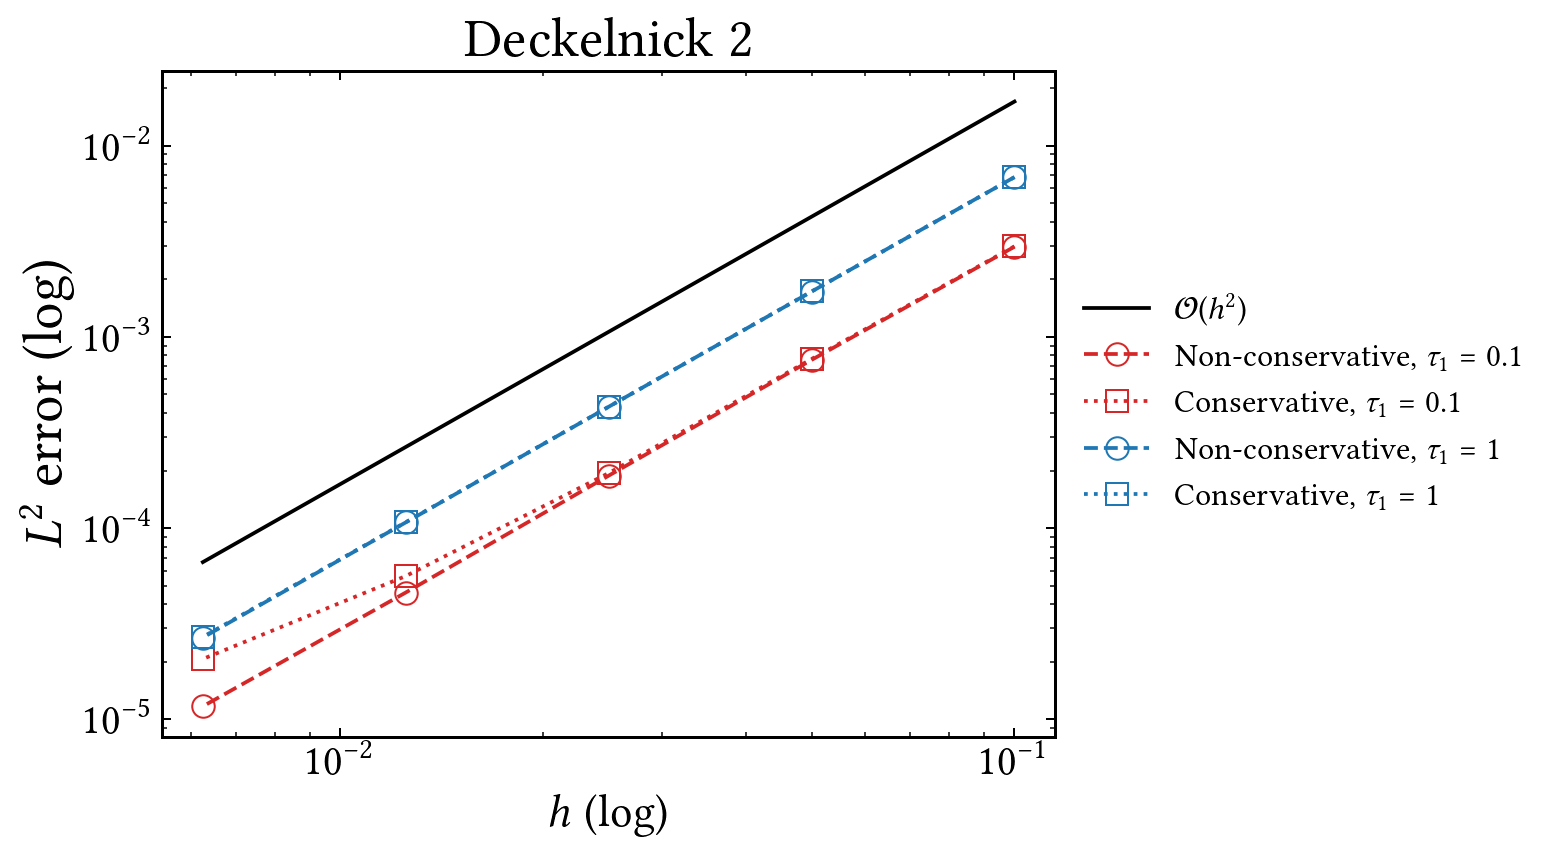

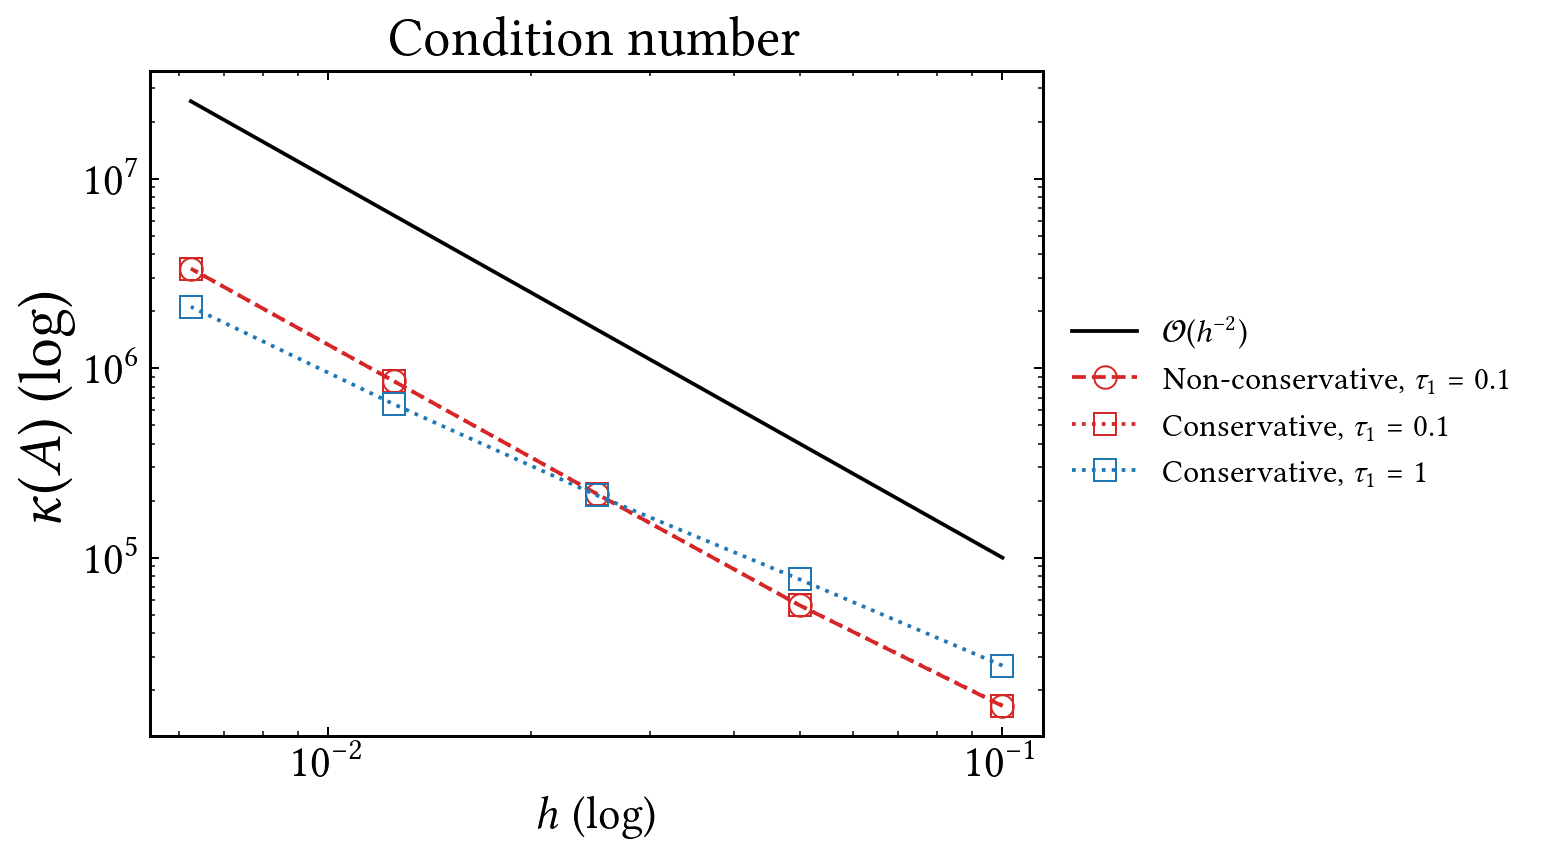

In [79]:
### tau1 = 0.1

# Conservative
L2_error_conservative_fullstab_tau01 = np.array([0.00297492, 0.000766259, 0.000193923, 5.61446e-05, 2.0687e-05])
condition_number_conservative_fullstab_tau01 = np.array([1.658079e+04,5.615577e+04,2.173313e+05,8.544919e+05,3.351173e+06])

# Non-conservative
L2_error_classical_fullstab_tau01 = np.array([0.00296071, 0.000757787, 0.000188068, 4.60508e-05, 1.16981e-05])
condition_number_classical_fullstab_tau01 = np.array([1.649898e+04,5.609072e+04,2.173089e+05,8.544606e+05,3.351157e+06])


### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00683999, 0.00172723, 0.0004311, 0.00010739, 2.69884e-05])
condition_number_conservative_fullstab_tau1 = np.array([2.694977e+04,7.687256e+04,2.135206e+05,6.456964e+05,2.108137e+06])


L2_error_classical_fullstab_tau1 = np.array([0.00684464, 0.00172538, 0.000431005, 0.000107127, 2.67838e-05])
#condition_number_classical_fullstab_tau1 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 1.7e-0*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 1

#ax1.loglog(h, conservative,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative $+2$, $\tau_1 = 1$")
#ax1.loglog(h[:-2], classical,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative $+2$, $\tau_1 = 1$")

ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 0.1$")
ax1.loglog(h, L2_error_conservative_fullstab_tau01,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 0.1$")
ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 1$")
ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Deckelnick 2")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 1e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 0.1$")
ax2.loglog(h, condition_number_conservative_fullstab_tau01,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 0.1$")
ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


## Deckelnick 2 Normalized
$$\begin{alignat*}{2}
\text{Exact solution}&:\quad u(t,x,y) &&= \frac{e^{-4t}y}{\sqrt{(x+1/2-2t)^2+y^2}}\\
\text{Velocity}&:\quad \mathbf{\beta} &&= [2,\ 0]^T\\
\text{Level-set}&:\quad\phi(t,x,y) &&= \sqrt{(x+1/2-2t)^2+y^2}-1
\end{alignat*}$$

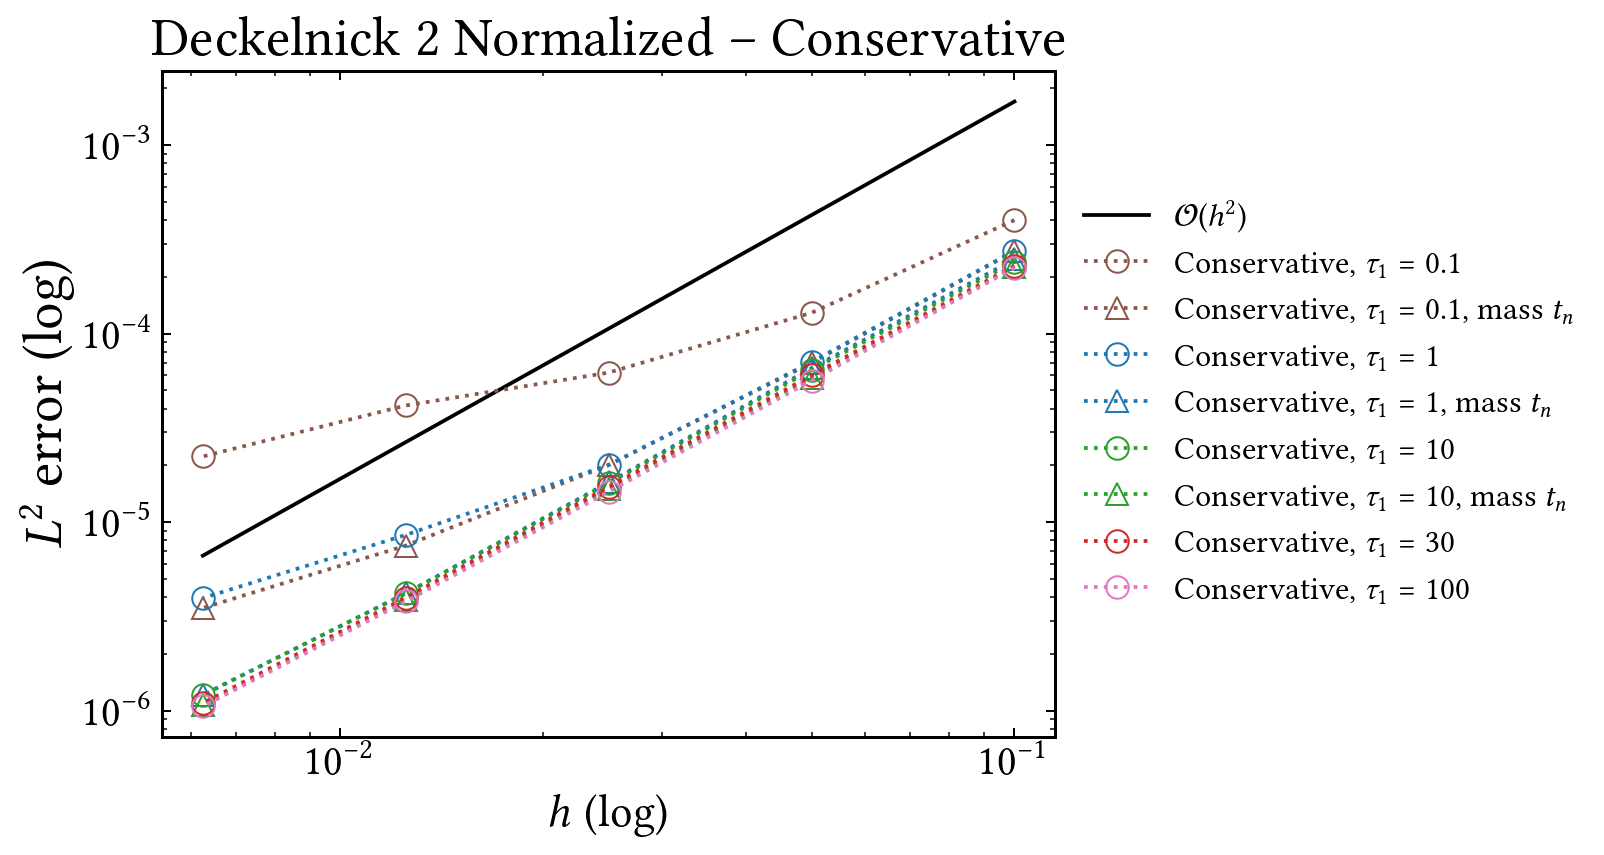

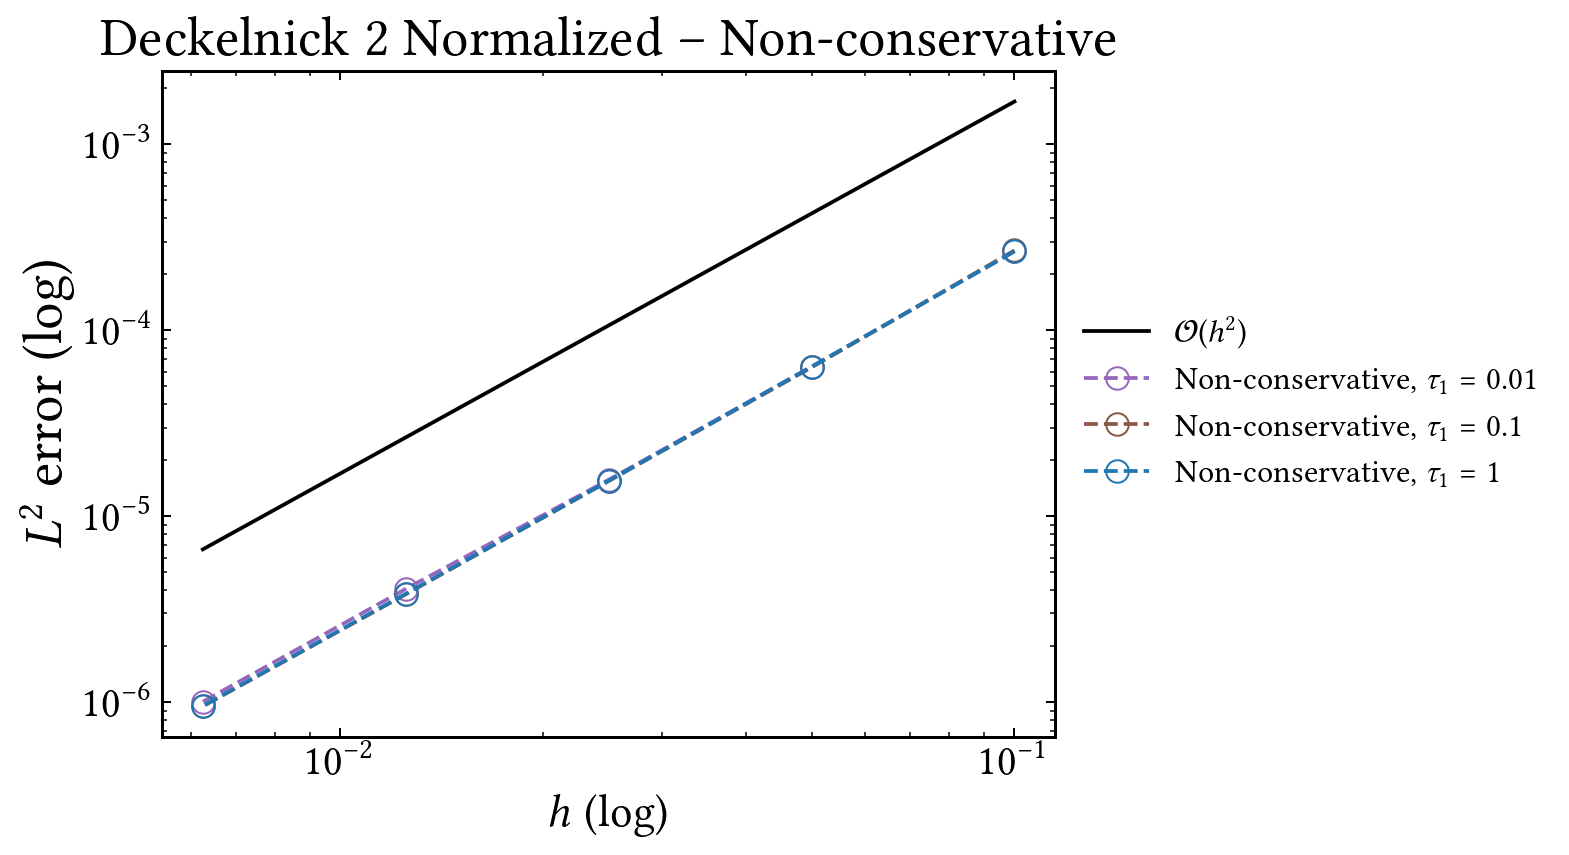

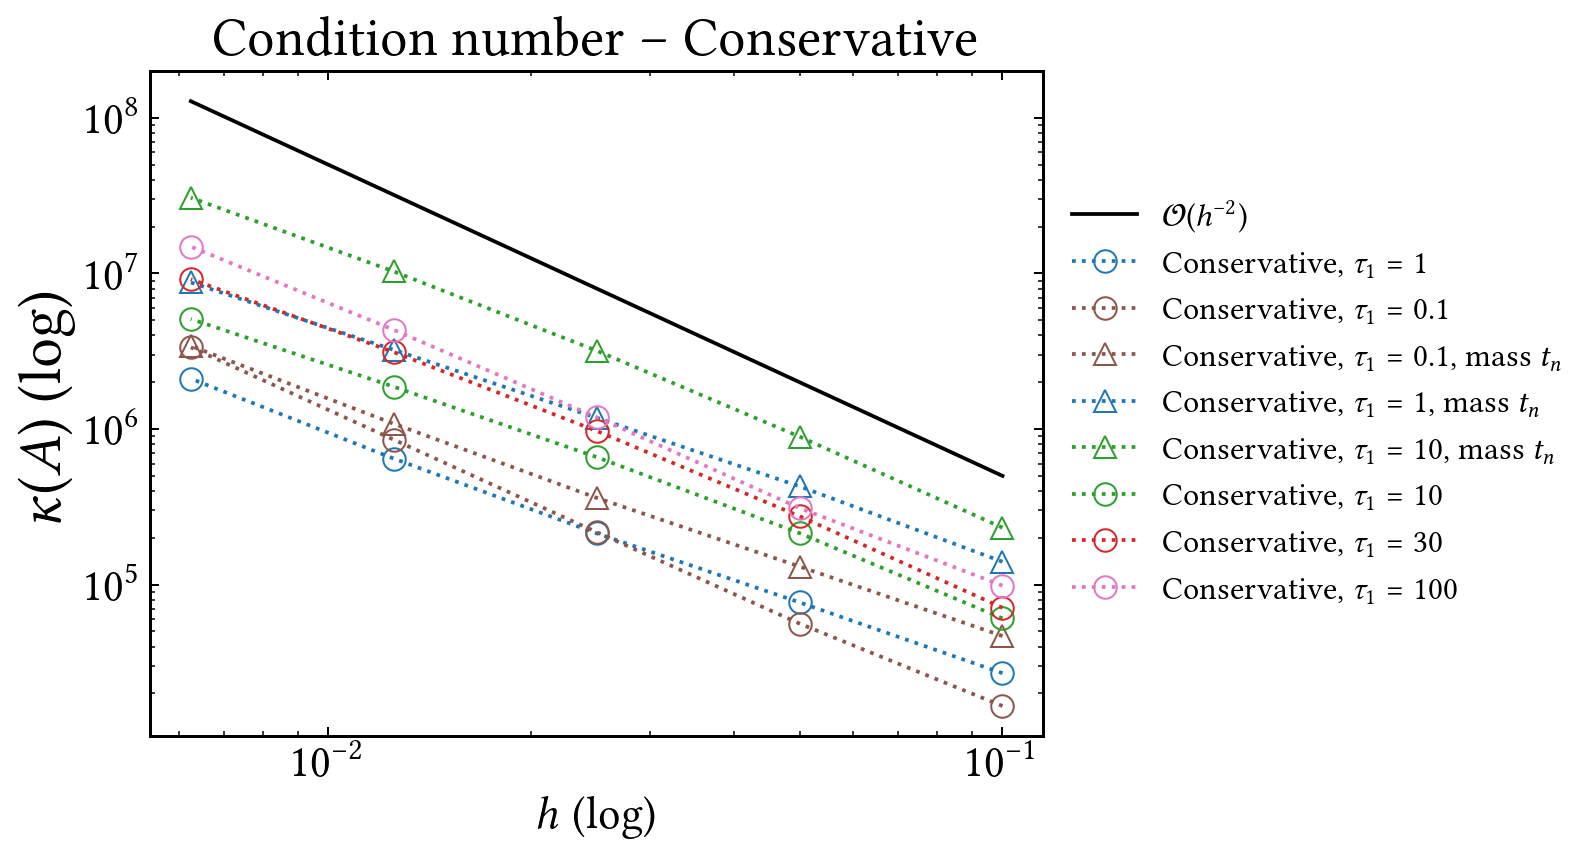

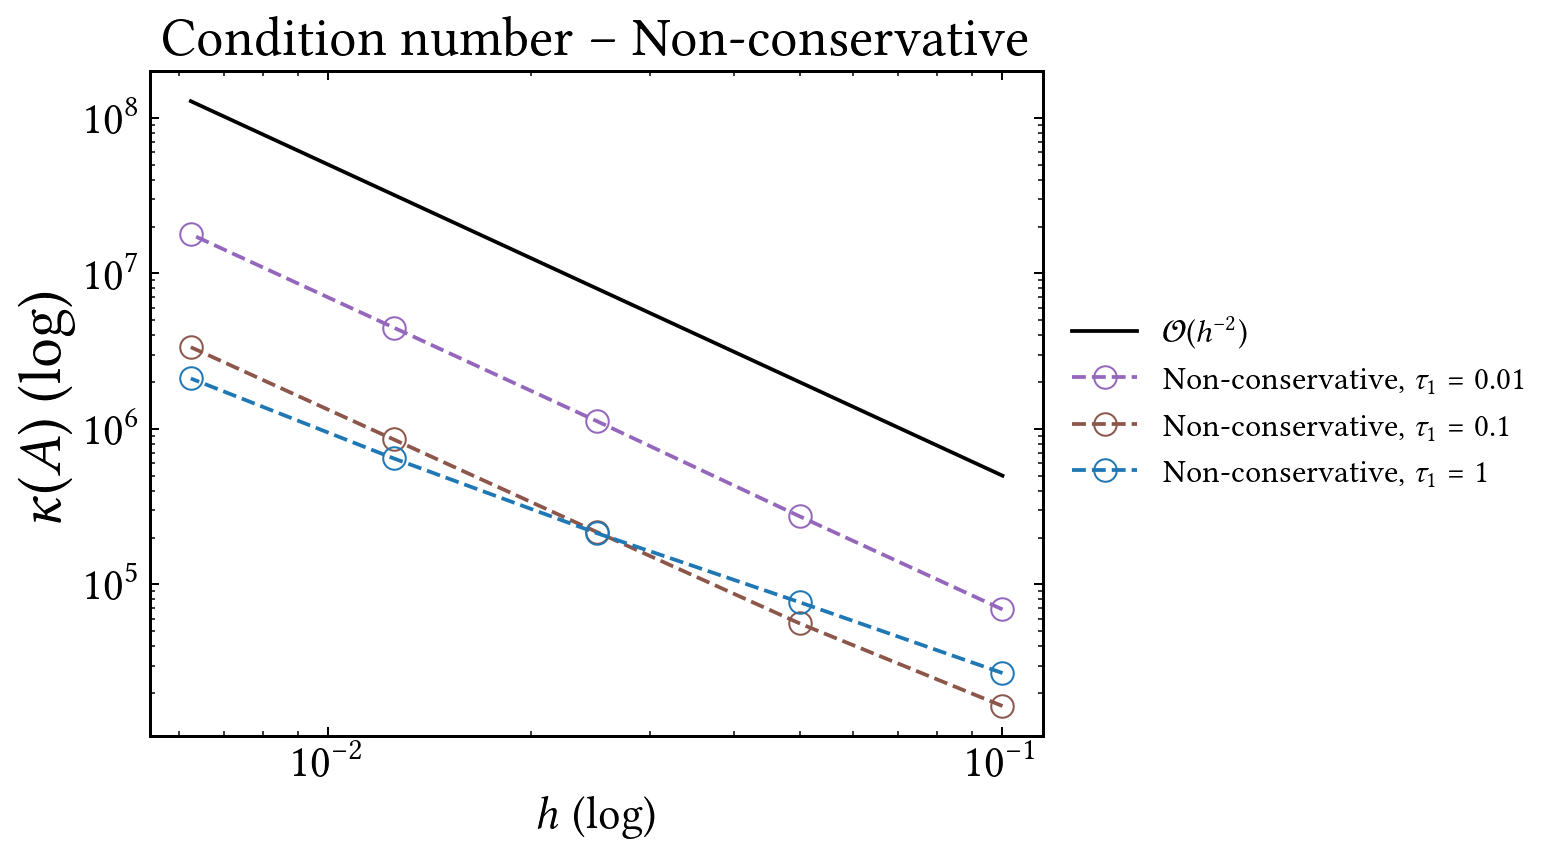

In [ ]:
show_mass = True

### tau1 = 0.01

L2_error_conservative_fullstab_tau001 = np.array([0.00118834, 0.000421651, 0.000238492, 0.000167357, 9.08094e-05])
condition_number_conservative_fullstab_tau001 = np.array([6.919425e+04,2.740939e+05,1.122562e+06,4.480097e+06,1.784428e+07])

L2_error_classical_fullstab_tau001 = np.array([0.000265947, 6.37499e-05, 1.57092e-05, 4.06738e-06, 1.00552e-06])
condition_number_classical_fullstab_tau001 = np.array([6.896637e+04,2.739230e+05,1.122488e+06,4.480019e+06,1.784428e+07])


### tau1 = 0.1

L2_error_conservative_fullstab_tau01 = np.array([0.000399837, 0.000128902, 6.2096e-05, 4.15544e-05, 2.23014e-05])
condition_number_conservative_fullstab_tau01 = np.array([1.658079e+04,5.615577e+04,2.173313e+05,8.544919e+05,3.351173e+06])

# stabilization of mass matrix in t_{n}
L2_error_conservative_fullstab_tau01_mass = np.array([0.000273438, 6.99649e-05, 2.0082e-05, 7.51091e-06, 3.50287e-06])
condition_number_conservative_fullstab_tau01_mass = np.array([4.673973e+04,1.306871e+05,3.612302e+05,1.081017e+06,3.421446e+06])

# tau2 = 10tau1
L2_error_conservative_fullstab_tau01_mass_ = np.array([0.000253017, 6.62024e-05, 1.68318e-05, 4.68101e-06, 1.66744e-06])
condition_number_conservative_fullstab_tau01_mass_ = np.array([3.481567e+05,9.803132e+05,2.525935e+06,6.600987e+06,1.734491e+07])

L2_error_classical_fullstab_tau01 = np.array([0.000269008, 6.32459e-05, 1.54699e-05, 3.8064e-06, 9.50141e-07])
condition_number_classical_fullstab_tau01 = np.array([1.649898e+04,5.609072e+04,2.173089e+05,8.544606e+05,3.351157e+06])



### tau1 = 1


L2_error_conservative_fullstab_tau1 = np.array([0.000274981, 7.066e-05, 2.01249e-05, 8.5535e-06, 3.9567e-06])
condition_number_conservative_fullstab_tau1 = np.array([2.694977e+04,7.687256e+04,2.135206e+05,6.456964e+05,2.108137e+06])

# stabilization of mass matrix in t_{n}
L2_error_conservative_fullstab_tau1_mass = np.array([0.000247695, 6.567e-05, 1.62503e-05, 4.1967e-06, 1.20929e-06])
condition_number_conservative_fullstab_tau1_mass = np.array([1.403003e+05,4.279847e+05,1.181678e+06,3.228147e+06,8.759081e+06])

# stabilization of mass matrix in t_{n} and tau2 = tau1/10
L2_error_conservative_fullstab_tau1_mass_ = np.array([0.000270978, 6.98128e-05, 1.90073e-05, 7.21317e-06, 3.0036e-06])
condition_number_conservative_fullstab_tau1_mass_ = np.array([2.194334e+04,6.370245e+04,1.765398e+05,5.325431e+05,1.794097e+06])


# stabilization of mass matrix in t_{n-1}
L2_error_conservative_fullstab_tau1_mass_0 = np.array([0.000254591, 6.84228e-05, 1.82089e-05, 6.71565e-06, 2.63957e-06])
condition_number_conservative_fullstab_tau1_mass_0 = np.array([4.127130e+04,1.272963e+05,3.441728e+05,9.360162e+05,2.441900e+06])

L2_error_classical_fullstab_tau1 = np.array([0.000266159, 6.37264e-05, 1.5523e-05, 3.8287e-06, 9.54858e-07])
condition_number_classical_fullstab_tau1 = np.array([2.688649e+04,7.674337e+04,2.136327e+05,6.454918e+05,2.108123e+06])


## slower

#L2_error_conservative_fullstab_tau1 = np.array([0.00154745, 0.000400384, 0.000122183])
#L2_error_classical_fullstab_tau1 = np.array([0.00139877, 0.000359888, 9.06439e-05])

#condition_number_conservative_fullstab_tau1 = np.array()
#condition_number_classical_fullstab_tau1 = np.array()

## slower and shifted

#L2_error_conservative_fullstab_tau1 = np.array([0.0029673, 0.000997259, 0.00040481])
#L2_error_classical_fullstab_tau1 = np.array([0.00139877, 0.000359888, 9.06439e-05])

#condition_number_conservative_fullstab_tau1 = np.array([2.605717e+05,2.605717e+05,1.007451e+06])
#condition_number_classical_fullstab_tau1 = np.array()


### tau1 = 10

L2_error_conservative_fullstab_tau10 = np.array([0.000240171, 6.42373e-05, 1.60458e-05, 4.18746e-06, 1.21489e-06])
condition_number_conservative_fullstab_tau10 = np.array([6.065197e+04,2.140769e+05,6.598689e+05,1.870857e+06,5.097094e+06])

L2_error_conservative_fullstab_tau10_mass01 = np.array([0.000239411, 6.40563e-05, 1.59971e-05, 4.15151e-06, 1.18919e-06])
condition_number_conservative_fullstab_tau10_mass01 = np.array([5.996461e+04,2.142565e+05,6.706133e+05,1.920865e+06,5.263494e+06])

L2_error_conservative_fullstab_tau10_mass = np.array([0.000224764, 5.81028e-05, 1.49629e-05, 3.88524e-06, 1.06626e-06])
condition_number_conservative_fullstab_tau10_mass = np.array([2.322056e+05,8.935833e+05,3.186940e+06,1.030174e+07,3.071828e+07])


#L2_error_classical_fullstab_tau10 = np.array()
#condition_number_classical_fullstab_tau10 = np.array()

### tau1 = 30

L2_error_conservative_fullstab_tau30 = np.array([0.000228572, 6.01129e-05, 1.53747e-05, 3.9784e-06, 1.09702e-06])
condition_number_conservative_fullstab_tau30 = np.array([7.100808e+04,2.751404e+05,9.724541e+05,3.122225e+06,9.179174e+06])

### tau1 = 50

#L2_error_conservative_fullstab_tau50 = np.array()
#condition_number_conservative_fullstab_tau50 = np.array()

### tau1 = 100

L2_error_conservative_fullstab_tau100 = np.array([0.000223683, 5.63471e-05, 1.44921e-05, 3.79582e-06, 1.05486e-06])
condition_number_conservative_fullstab_tau100 = np.array([9.849740e+04,3.105892e+05,1.190971e+06,4.339546e+06,1.487895e+07])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


#! L2 error conservative
fig1, ax1 = plt.subplots()

ax1.loglog(h, 1.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.01
#ax1.loglog(h, L2_error_conservative_fullstab_tau001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 0.01$")

if show_mass:
    # tau1 = 0.1
    ax1.loglog(h, L2_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = 0.1$")
    ax1.loglog(h, L2_error_conservative_fullstab_tau01_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = 0.1$, mass $t_n$")

# tau1 = 1
ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
if show_mass:
    
    
    ax1.loglog(h, L2_error_conservative_fullstab_tau1_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_n$")
# ax1.loglog(h, L2_error_conservative_fullstab_tau1_mass_,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, $\tau_2 = \tau_1/10$, mass $t_n$")
# ax1.loglog(h, L2_error_conservative_fullstab_tau1_mass_0,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_{n-1}$")

#ax1.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 1$")

# tau1 = 10
ax1.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 10$")
if show_mass:
    ax1.loglog(h, L2_error_conservative_fullstab_tau10_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 10$, mass $t_n$")

# tau1 = 30
ax1.loglog(h, L2_error_conservative_fullstab_tau30,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 30$")
#ax1.loglog(h, L2_error_classical_fullstab_tau30,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 30$")

# tau1 = 50
#ax1.loglog(h, L2_error_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 50$")

# tau1 = 100
ax1.loglog(h, L2_error_conservative_fullstab_tau100,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"Conservative, $\tau_1 = 100$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Deckelnick 2 Normalized – Conservative")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

#! L2 error non-conservative
fig11, ax11 = plt.subplots()

ax11.loglog(h, 1.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.01
#ax11.loglog(h, L2_error_conservative_fullstab_tau001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 0.01$")
ax11.loglog(h, L2_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\tau_1 = 0.01$")

# tau1 = 0.1
ax11.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau_1 = 0.1$")


# tau1 = 1
#ax11.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
# ax11.loglog(h, L2_error_conservative_fullstab_tau1_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_n$")
# ax11.loglog(h, L2_error_conservative_fullstab_tau1_mass_,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, $\tau_2 = \tau_1/10$, mass $t_n$")
# ax11.loglog(h, L2_error_conservative_fullstab_tau1_mass_0,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_{n-1}$")
ax11.loglog(h, L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 1$")

# tau1 = 10
#ax11.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 10$")

# tau1 = 30
#ax11.loglog(h, L2_error_conservative_fullstab_tau30,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 30$")
#ax11.loglog(h, L2_error_classical_fullstab_tau30,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 30$")

ax11.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax11.set_xlabel(r"$h$ (log)", fontsize=18)
ax11.tick_params(axis='both', which='major', labelsize=17)
ax11.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax11.set_title(r"Deckelnick 2 Normalized – Non-conservative")

plt.show()
#fig1.s


#! Condition number conservative

fig2, ax2 = plt.subplots()

ax2.loglog(h, 5e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
if show_mass:
    # tau1 = 0.1
    ax2.loglog(h, condition_number_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = 0.1$")
    ax2.loglog(h, condition_number_conservative_fullstab_tau01_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = 0.1$, mass $t_n$")

    # tau1 = 1
    
    ax2.loglog(h, condition_number_conservative_fullstab_tau1_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_n$")
    
    ax2.loglog(h, condition_number_conservative_fullstab_tau10_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 10$, mass $t_n$")

# ax2.loglog(h, condition_number_conservative_fullstab_tau1_mass_,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, $\tau_2 = \tau_1/10$, mass $t_n$")
# ax2.loglog(h, condition_number_conservative_fullstab_tau1_mass_0,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_{n-1}$")

#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 1$")

# tau1 = 10
ax2.loglog(h, condition_number_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 10$")

# tau1 = 30
ax2.loglog(h, condition_number_conservative_fullstab_tau30,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 30$")
#ax2.loglog(h, condition_number_classical_fullstab_tau30,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 30$")

# tau1 = 50
#ax2.loglog(h, condition_number_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 50$")

# tau1 = 100
ax2.loglog(h, condition_number_conservative_fullstab_tau100,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"Conservative, $\tau_1 = 100$")


ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number – Conservative")

plt.show()


#! Condition number non-conservative

fig22, ax22 = plt.subplots()

ax22.loglog(h, 5e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

#ax22.loglog(h, condition_number_conservative_fullstab_tau001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 0.01$")
ax22.loglog(h, condition_number_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\tau_1 = 0.01$")
ax22.loglog(h, condition_number_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Non-conservative, $\tau_1 = 0.1$")
#ax22.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
# ax22.loglog(h, condition_number_conservative_fullstab_tau1_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_n$")
# ax22.loglog(h, condition_number_conservative_fullstab_tau1_mass_,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, $\tau_2 = \tau_1/10$, mass $t_n$")
# ax22.loglog(h, condition_number_conservative_fullstab_tau1_mass_0,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$, mass $t_{n-1}$")
ax22.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 1$")

#ax22.loglog(h, condition_number_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 10$")
#ax22.loglog(h, condition_number_conservative_fullstab_tau30,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\tau_1 = 30$")

ax22.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax22.set_xlabel(r"$h$ (log)", fontsize=18)
ax22.tick_params(axis='both', which='major', labelsize=18)
ax22.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax22.set_title(r"Condition number – Non-conservative")

plt.show()

Increasing $\tau_1$ for the conservative methods works a bit like decreasing $\tau_1$ for the non-conservative method: the error decreases and the condition number increases. Why, and can this give us a clue to their difference? Only true for the conservative method for $\tau_1\geq 1$ though.

## Deckelnick 2 Shifted

In [ ]:
### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.00728766, 0.0019272, 0.000603173])
#condition_number_conservative_fullstab_tau1 = np.array()


L2_error_classical_fullstab_tau1 = np.array([0.00675257, 0.00170053, 0.000425102])
#condition_number_classical_fullstab_tau1 = np.array()

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 1.7e-0*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 1

ax1.loglog(h[:-2], L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
ax1.loglog(h[:-2], L2_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Deckelnick 2 Shifted")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 1e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

#ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


UndefVarError: UndefVarError: np not defined

## Shi 1 again

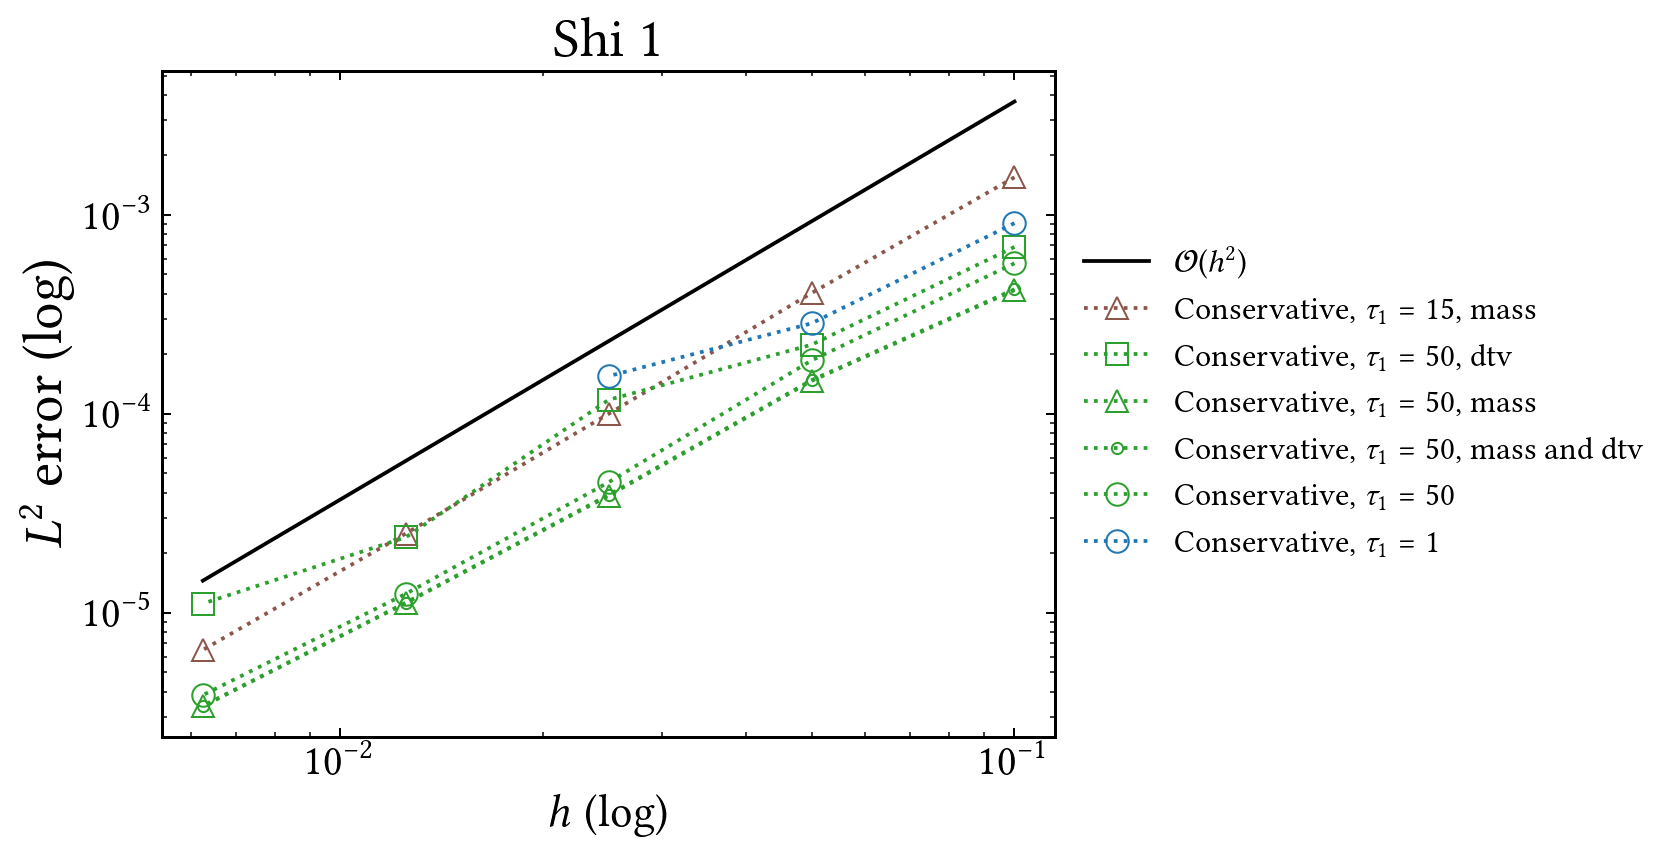

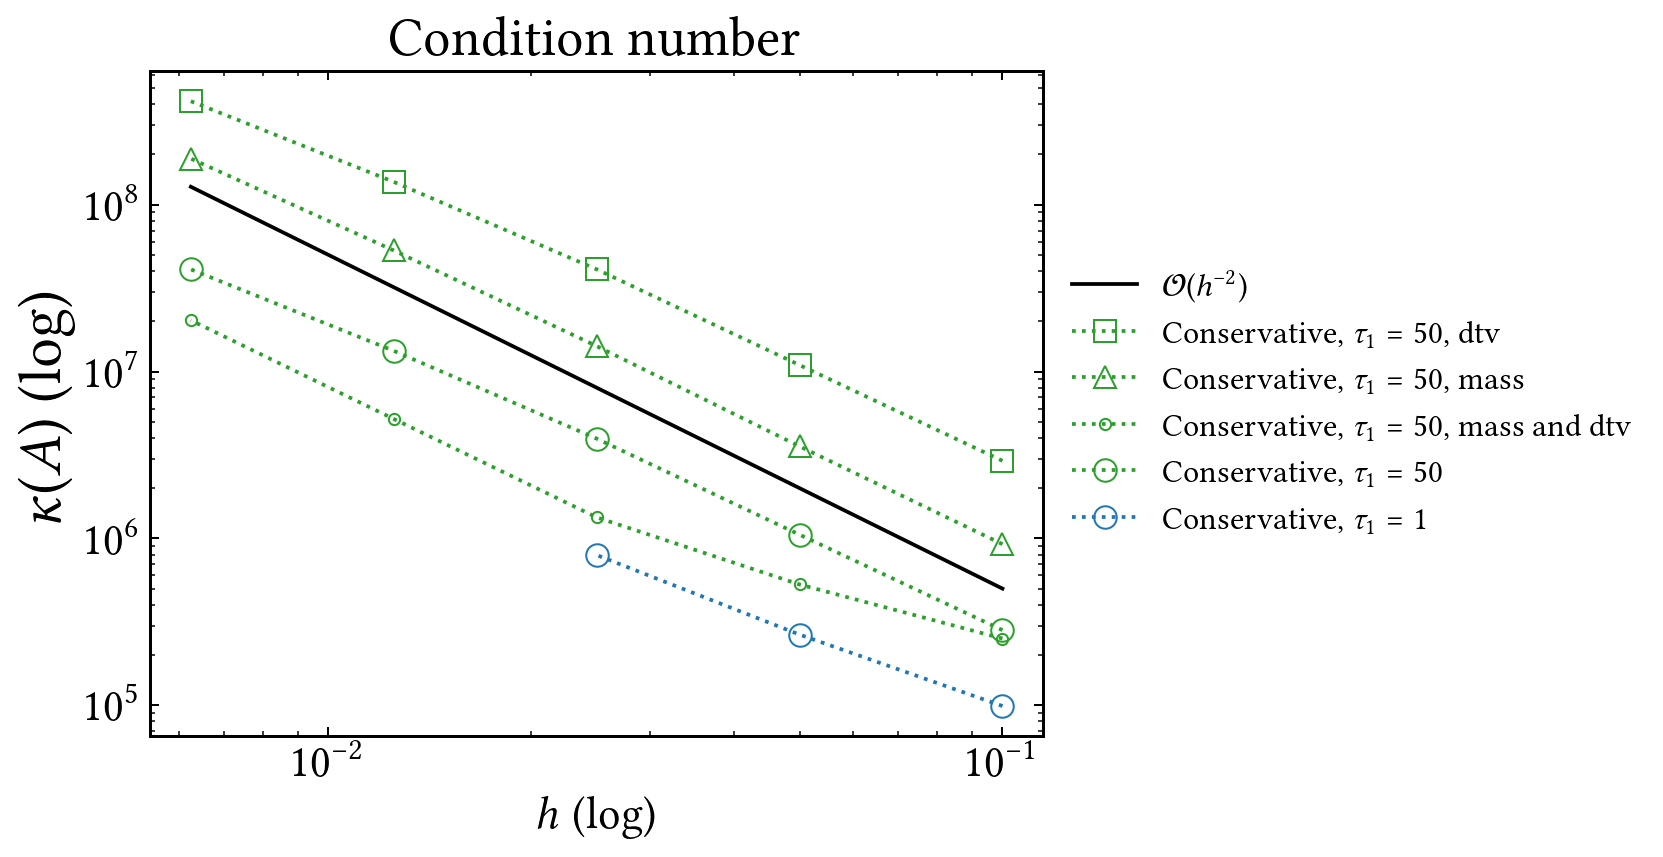

In [89]:
show_mass = True

### tau1 = 1

# Conservative
L2_error_conservative_fullstab_tau1 = np.array([0.000905738, 0.000284118, 0.000154203])
condition_number_conservative_fullstab_tau1 = np.array([9.896101e+04,2.651040e+05,7.946345e+05])


L2_error_classical_fullstab_tau1 = np.array([0.000466244, 0.000112729, 2.91355e-05])
#condition_number_classical_fullstab_tau1 = np.array()

### tau1 = 50

# Conservative with stabilization of dt(v)
L2_error_conservative_fullstab_tau50_dtv = np.array([0.000687601, 0.00022176, 0.000117247, 2.38874e-05, 1.10828e-05])
condition_number_conservative_fullstab_tau50_dtv = np.array([2.917129e+06,1.093193e+07,4.098040e+07,1.369802e+08,4.167893e+08])

# Stabilization of mass matrix
L2_error_conservative_fullstab_tau50_mass = np.array([0.000417214, 0.000145971, 3.86614e-05, 1.11601e-05, 3.37588e-06])
condition_number_conservative_fullstab_tau50_mass = np.array([9.233653e+05,3.560289e+06,1.420500e+07,5.314259e+07,1.887515e+08])

# Classical stabilization
L2_error_conservative_fullstab_tau50 = np.array([0.000569173, 0.000184933, 4.51725e-05, 1.24137e-05, 3.84439e-06])
condition_number_conservative_fullstab_tau50 = np.array([2.819015e+05,1.052578e+06,3.962444e+06,1.330382e+07,4.095101e+07])

# Stabilization of mass matrix and stabilization of dt(v)
L2_error_conservative_fullstab_tau50_mass_dtv = np.array([0.000421284, 0.000147089, 3.90321e-05, 1.12082e-05, 3.39166e-06])
condition_number_conservative_fullstab_tau50_mass_dtv = np.array([2.510173e+05,5.294383e+05,1.336914e+06,5.198866e+06,2.028646e+07])

# Stabilization of mass matrix and n=5
#L2_error_conservative_fullstab_tau50_mass_n5 = np.array()
#condition_number_conservative_fullstab_tau50_mass_n5 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 3.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 1

#ax1.loglog(h, L2_error_conservative_fullstab_tau15,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 15$")
#ax1.loglog(h, L2_error_classical_fullstab_tau15,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\tau_1 = 15$")

if show_mass:
    #ax1.loglog(h, L2_error_conservative_fullstab_tau15_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = 15$, mass")
    ax1.loglog(h, L2_error_conservative_fullstab_tau50_dtv,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, dtv")
    ax1.loglog(h, L2_error_conservative_fullstab_tau50_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, mass")
    ax1.loglog(h, L2_error_conservative_fullstab_tau50_mass_dtv,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, mass and dtv")

ax1.loglog(h, L2_error_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$")
ax1.loglog(h[:-2], L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
#ax1.loglog(h[:-2], L2_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 5e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

#ax2.loglog(h, condition_number_conservative_fullstab_tau15,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 15$")
#ax2.loglog(h, condition_number_classical_fullstab_tau15,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\tau_1 = 15$")

if show_mass:
    #ax2.loglog(h, condition_number_conservative_fullstab_tau15_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = 15$, mass")
    ax2.loglog(h, condition_number_conservative_fullstab_tau50_dtv,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, dtv")
    ax2.loglog(h, condition_number_conservative_fullstab_tau50_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, mass")
    ax2.loglog(h, condition_number_conservative_fullstab_tau50_mass_dtv,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, mass and dtv")

ax2.loglog(h, condition_number_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$")
#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")

ax2.loglog(h[:-2], condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


## Shi 1 faster decay
$$\begin{alignat*}{2}
\text{Exact solution}&:\quad u(t,x,y) &&= \frac{e^{-4t}y}{\sqrt{(x-t)^2+y^2}}+2\\
\text{Velocity}&:\quad \mathbf{\beta} &&= [1,\ 0]^T\\
\text{Level-set}&:\quad\phi(t,x,y) &&= \sqrt{(x-t)^2+y^2}-2
\end{alignat*}$$

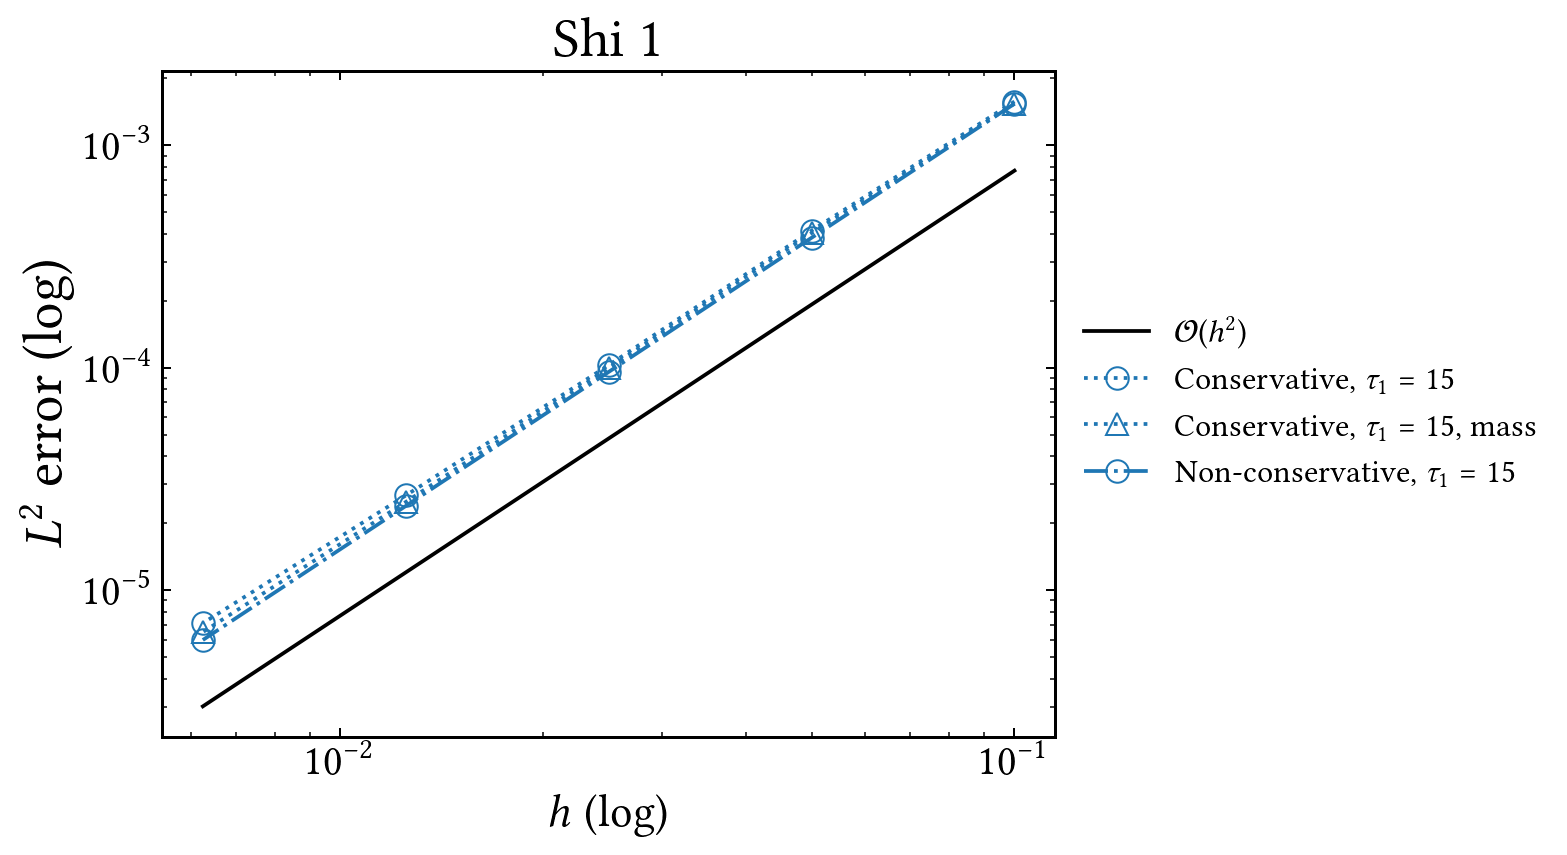

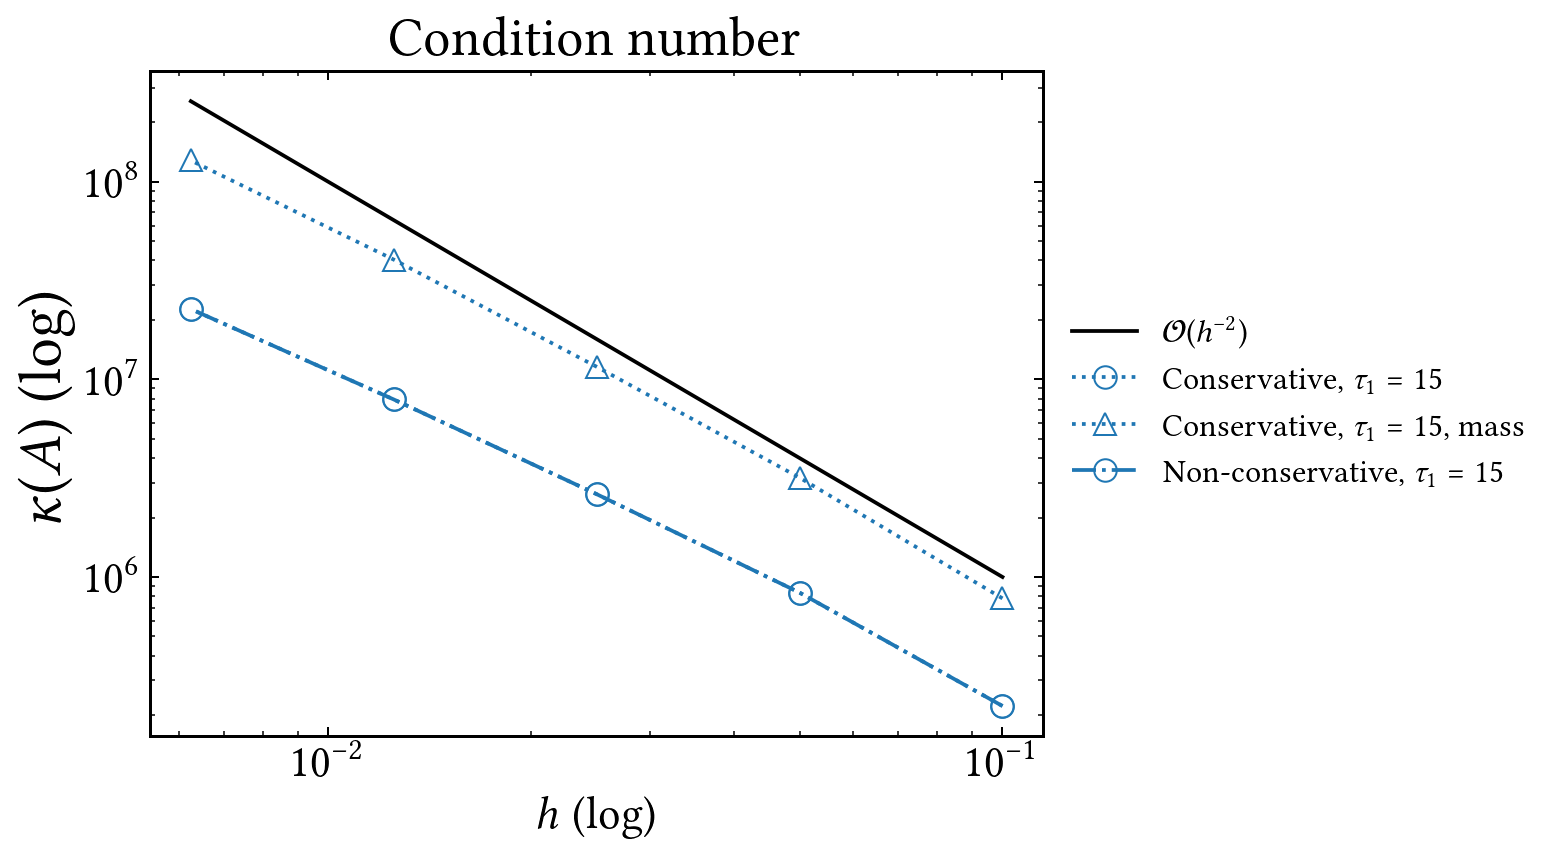

In [76]:

# exp(-4t) and smaller mesh nx ny 
L2_error_conservative_fullstab_tau50 = np.array([0.00155013, 0.000406424, 0.00010055, 2.51651e-05, 6.60285e-06])
condition_number_conservative_fullstab_tau50 = np.array([2.512735e+05,1.030465e+06,3.723892e+06,1.294531e+07,4.117188e+07])


### tau = 5
# exp(-4t) and smaller mesh nx ny 
L2_error_conservative_fullstab_tau5 = np.array([0.00160144, 0.000423198, 0.00010716, 3.16491e-05, 8.98066e-06])
condition_number_conservative_fullstab_tau5 = np.array([1.708742e+05,5.655302e+05,1.566847e+06,4.516242e+06,1.303320e+07])

L2_error_conservative_fullstab_tau5_mass = np.array([0.00155964, 0.000409652, 0.000101238, 2.55652e-05, 6.68989e-06])
condition_number_conservative_fullstab_tau5_mass = np.array([6.991915e+05,2.640665e+06,8.517994e+06,2.600420e+07,7.451339e+07])


### tau = 15
# exp(-4t) and smaller mesh nx ny 
L2_error_conservative_fullstab_tau15 = np.array([0.00157449, 0.000413905, 0.000102803, 2.66766e-05, 7.1154e-06])
condition_number_conservative_fullstab_tau15 = np.array([2.223091e+05,8.333070e+05,2.625880e+06,7.918509e+06,2.271115e+07])

L2_error_classical_fullstab_tau15 = np.array([0.00153954, 0.000384402, 9.58424e-05, 2.39287e-05, 5.9782e-06])
condition_number_classical_fullstab_tau15 = np.array([2.222999e+05,8.334031e+05,2.625828e+06,7.918424e+06,2.271111e+07])

L2_error_conservative_fullstab_tau15_mass = np.array([0.00154033, 0.000403264, 9.96873e-05, 2.49338e-05, 6.48787e-06])
condition_number_conservative_fullstab_tau15_mass = np.array([7.793804e+05,3.182427e+06,1.159163e+07,4.040820e+07,1.283339e+08])

L2_error_conservative_fullstab_tau15_mass_n5_Vh2 = np.array([0.00204404, 0.00052774, 0.000130814, 3.27314e-05, 8.40431e-06])
condition_number_conservative_fullstab_tau15_mass_n5_Vh2 = np.array([7.794186e+05,3.182640e+06,1.159218e+07,4.040984e+07,1.283383e+08])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 7.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

ax1.loglog(h, L2_error_conservative_fullstab_tau15,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 15$")
ax1.loglog(h, L2_error_conservative_fullstab_tau15_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 15$, mass")
ax1.loglog(h, L2_error_classical_fullstab_tau15,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 15$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 1e4*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_conservative_fullstab_tau15,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 15$")
ax2.loglog(h, condition_number_conservative_fullstab_tau15_mass,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 15$, mass")

ax2.loglog(h, condition_number_classical_fullstab_tau15,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\tau_1 = 15$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


## Shi1 Simplified

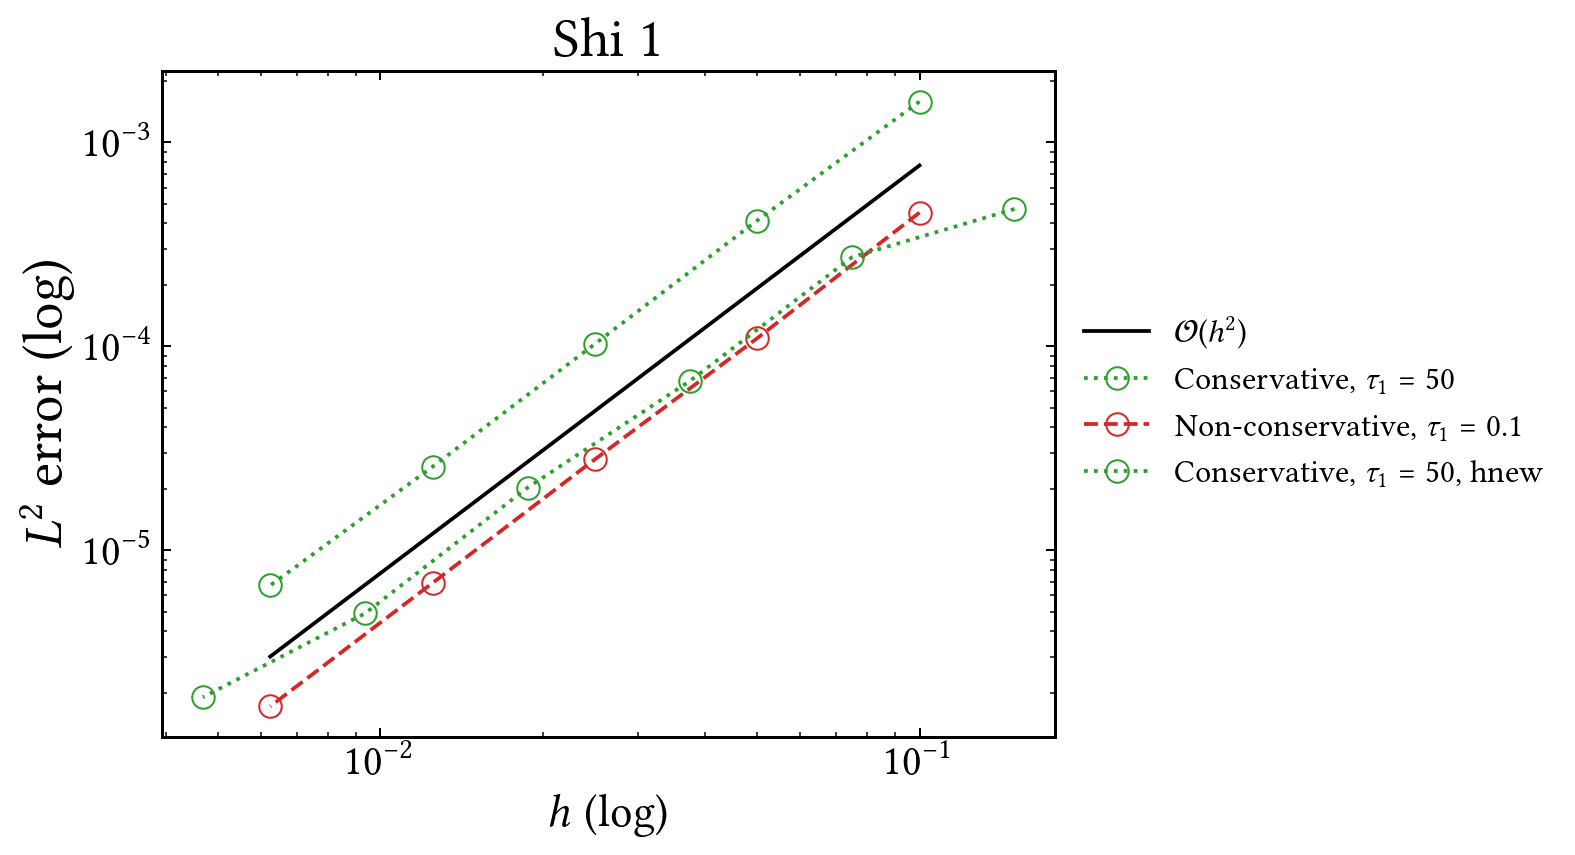

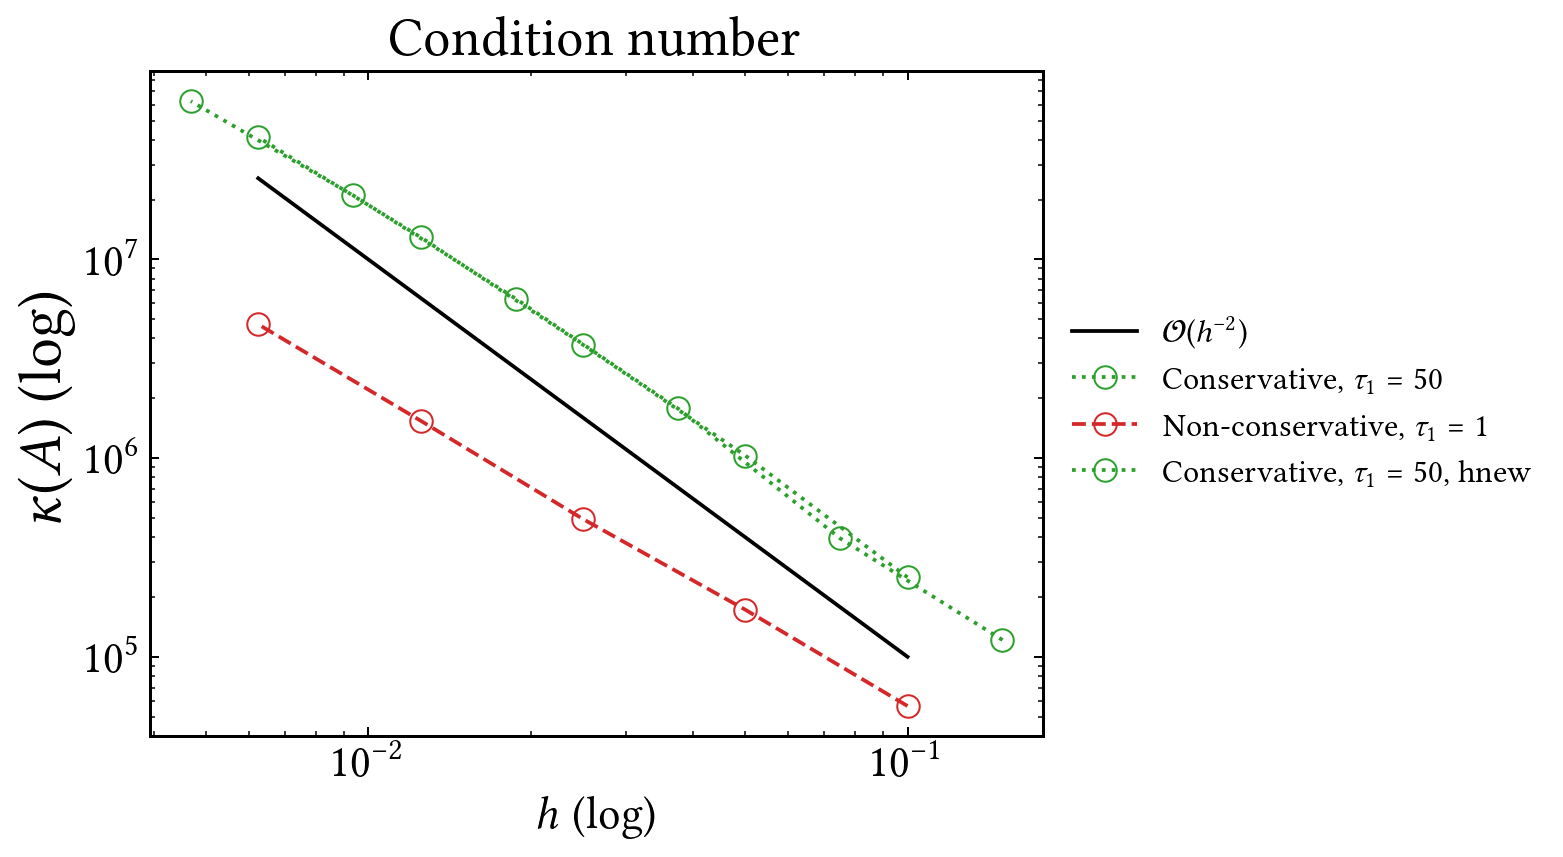

In [78]:

### tau1 = 50

# Classical stabilization
L2_error_conservative_fullstab_tau50 = np.array([0.000294514, 0.000123156, 3.06895e-05, 8.64643e-06, 3.03163e-06])
#condition_number_conservative_fullstab_tau50 = np.array()

L2_error_classical_fullstab_tau01 = np.array([0.000452215, 0.00010944, 2.78741e-05, 6.90576e-06, 1.71502e-06])

# now with nx = [48, 96, 192, 384, 768]
L2_error_conservative_fullstab_tau50 = np.array([0.000385953, 0.00011687, 3.74516e-05, 8.91899e-06, 2.84212e-06])
condition_number_conservative_fullstab_tau50 = np.array([2.512735e+05,1.030465e+06,3.723892e+06,1.294531e+07,4.117188e+07])

# new h and [33, 65, 129, 257, 513]
L2_error_conservative_fullstab_tau50_newh = np.array([0.000470819, 0.000273577, 6.74755e-05, 2.02502e-05, 4.90445e-06, 1.90147e-06])
condition_number_conservative_fullstab_tau50_newh = np.array([1.215527e+05,3.944122e+05,1.778700e+06,6.354358e+06,2.100280e+07, 6.252670e+07])
hnew = [0.15, 0.075, 0.0375, 0.01875, 0.009375, 0.0046875]

# exp(-4t)
L2_error_conservative_fullstab_tau50 = np.array([0.00158354, 0.000413324, 0.000102532, 2.56581e-05, 6.71431e-06])   
condition_number_conservative_fullstab_tau50 = np.array([2.512735e+05,1.030465e+06,3.723892e+06,1.294531e+07,4.117188e+07])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 7.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 1
ax1.loglog(h, L2_error_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$")
ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 0.1$")

ax1.loglog(hnew, L2_error_conservative_fullstab_tau50_newh,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, hnew")

ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 1e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

ax2.loglog(h, condition_number_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$")
ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")

ax2.loglog(hnew, condition_number_conservative_fullstab_tau50_newh,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, hnew")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


## Shi 1 new stabilization
$$\int_{I_n}(\tau_1 [\nabla u_h \cdot \mathbf{n}],[\nabla v_h \cdot \mathbf{n}])_{\mathcal{F}_h} dt + \int_{I_n}(\tau_2 h^2 \nabla u_h\cdot \mathbf{n}, \nabla v_h\cdot \mathbf{n})_{\Gamma(t)} dt$$

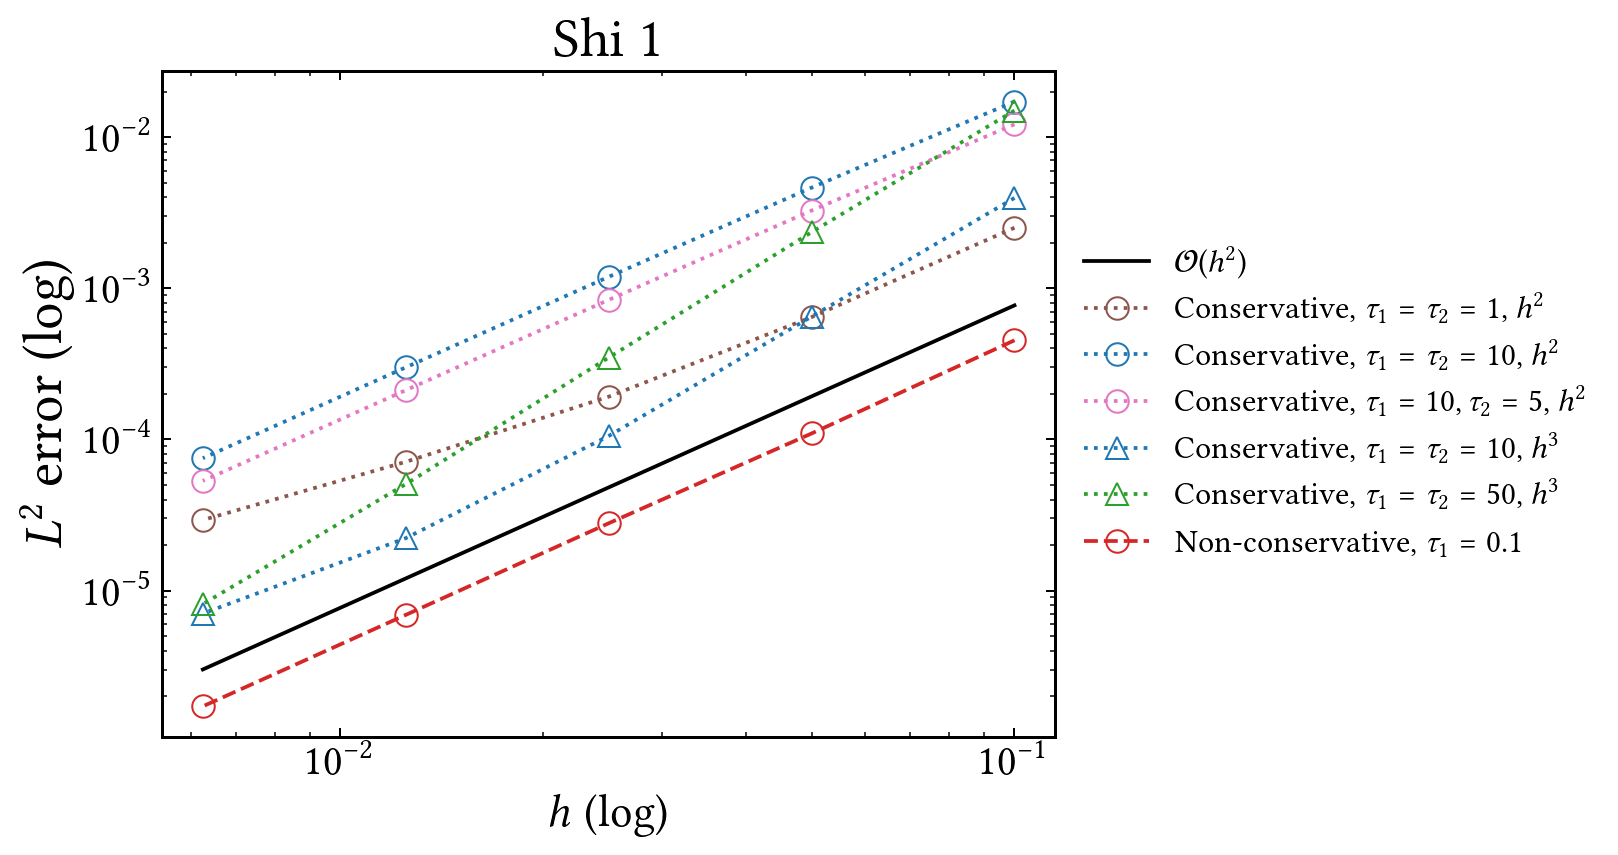

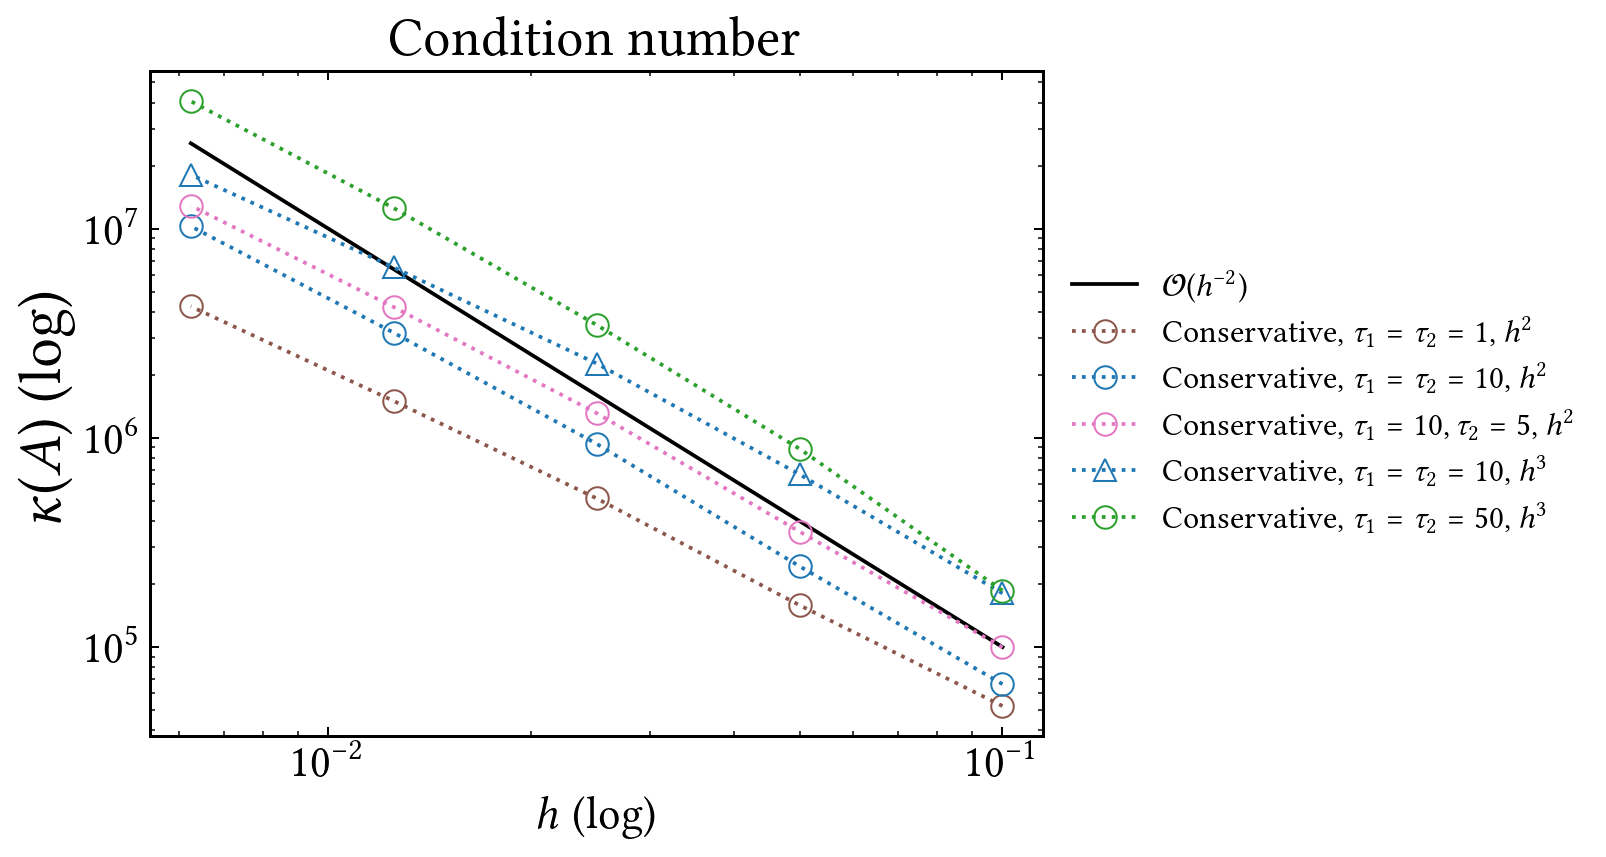

In [102]:

### tau_1 = 1, tau_2 = 0.1
L2_error_conservative_fullstab_tau1_1_tau2_01 = np.array([0.00118443, 0.00033171, 0.000145958, 6.22232e-05, 2.96368e-05])
condition_number_conservative_fullstab_tau1_1_tau2_01 = np.array([8.955747e+04,2.443065e+05,7.348671e+05,2.054128e+06,6.009084e+06])


### tau_1 = tau_2 = 1
L2_error_conservative_fullstab_tau1 = np.array([0.00251156, 0.000643911, 0.000191653, 7.10628e-05, 2.93023e-05])
condition_number_conservative_fullstab_tau1 = np.array([5.223333e+04,1.584524e+05,5.135164e+05,1.499964e+06,4.249303e+06])

### tau_1 = tau_2 = 1
L2_error_conservative_fullstab_tau5 = np.array()
condition_number_conservative_fullstab_tau5 = np.array()


### tau_1 = 10, tau_2 = 5
L2_error_conservative_fullstab_tau1_10_tau2_5 = np.array([0.0121315, 0.00326364, 0.000837195, 0.000211473, 5.31485e-05])
condition_number_conservative_fullstab_tau1_10_tau2_5 = np.array([9.959659e+04,3.560123e+05,1.311867e+06,4.217805e+06,1.288126e+07])



### tau_1 = 10, tau_2 = 10
L2_error_conservative_fullstab_tau10 = np.array([0.017167, 0.00462664, 0.00118945, 0.000299518, 7.50861e-05])
condition_number_conservative_fullstab_tau10 = np.array([6.646622e+04,2.431576e+05,9.360016e+05,3.179876e+06,1.026936e+07])
# same but h^3
L2_error_conservative_fullstab_tau10_h3 = np.array([0.00395419, 0.000648999, 0.000105316, 2.22168e-05, 7.05041e-06])
condition_number_conservative_fullstab_tau10_h3 = np.array([1.805785e+05,6.690456e+05,2.266706e+06,6.524244e+06,1.810786e+07])


### tau1 = 50

# with h^3 instead of h^2 (also, new smaller background mesh right?)
L2_error_conservative_fullstab_tau50 = np.array([0.0149689, 0.00234765, 0.00034765, 5.06042e-05, 8.14152e-06])
condition_number_conservative_fullstab_tau50 = np.array([1.860342e+05,8.862315e+05,3.464626e+06,1.254956e+07,4.068391e+07])

L2_error_classical_fullstab_tau01 = np.array([0.000452215, 0.00010944, 2.78741e-05, 6.90576e-06, 1.71502e-06])


nx = [81, 161, 321, 641, 1281]
ny = [61, 121, 241, 481, 961]
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 7.7e-2*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

#ax1.loglog(h, L2_error_conservative_fullstab_tau1_1_tau2_01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 1$, $\tau_2 = 0.1$, $h^2$")
ax1.loglog(h, L2_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = \tau_2 = 1$, $h^2$")
ax1.loglog(h, L2_error_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = \tau_2 = 5$, $h^2$")
ax1.loglog(h, L2_error_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = \tau_2 = 10$, $h^2$")
#ax1.loglog(h, L2_error_conservative_fullstab_tau1_10_tau2_5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"Conservative, $\tau_1 = 10, \tau_2 = 5$, $h^2$")
ax1.loglog(h, L2_error_conservative_fullstab_tau10_h3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = \tau_2 = 10$, $h^3$")
ax1.loglog(h, L2_error_conservative_fullstab_tau50,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = \tau_2 = 50$, $h^3$")
ax1.loglog(h, L2_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 0.1$")

#ax1.loglog(hnew, L2_error_conservative_fullstab_tau50_newh,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, hnew")

ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 1e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

#ax2.loglog(h, condition_number_conservative_fullstab_tau1_1_tau2_01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = 1$, $\tau_2 = 0.1$, $h^2$")
ax2.loglog(h, condition_number_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C5", label=r"Conservative, $\tau_1 = \tau_2 = 1$, $h^2$")
ax2.loglog(h, condition_number_conservative_fullstab_tau5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\tau_1 = \tau_2 = 5$, $h^2$")
ax2.loglog(h, condition_number_conservative_fullstab_tau10,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = \tau_2 = 10$, $h^2$")
#ax2.loglog(h, condition_number_conservative_fullstab_tau1_10_tau2_5,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C6", label=r"Conservative, $\tau_1 = 10, \tau_2 = 5$, $h^2$")
ax2.loglog(h, condition_number_conservative_fullstab_tau10_h3,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = \tau_2 = 10$, $h^3$")
ax2.loglog(h, condition_number_conservative_fullstab_tau50,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = \tau_2 = 50$, $h^3$")
#ax2.loglog(h, condition_number_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")

#ax2.loglog(hnew, condition_number_conservative_fullstab_tau50_newh,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\tau_1 = 50$, hnew")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()


## Shifting study Deckelnick 2

We look at the exact solution $$u(t,x,y) = e^{-4t}y(x+\frac{1}{2}-2t) + \delta$$ and solve the surface equation on the unit sphere, initially centered in $(-0.5,0)$ moving with $\beta = [2,0]^T$, and investigate the numerical solutions for the two schemes as we vary $\delta$.

We set $\tau_1 = 1$, $\Delta t_n = h/4$, $T=0.5$, and we look at both the $L^2$ error and the condition number.

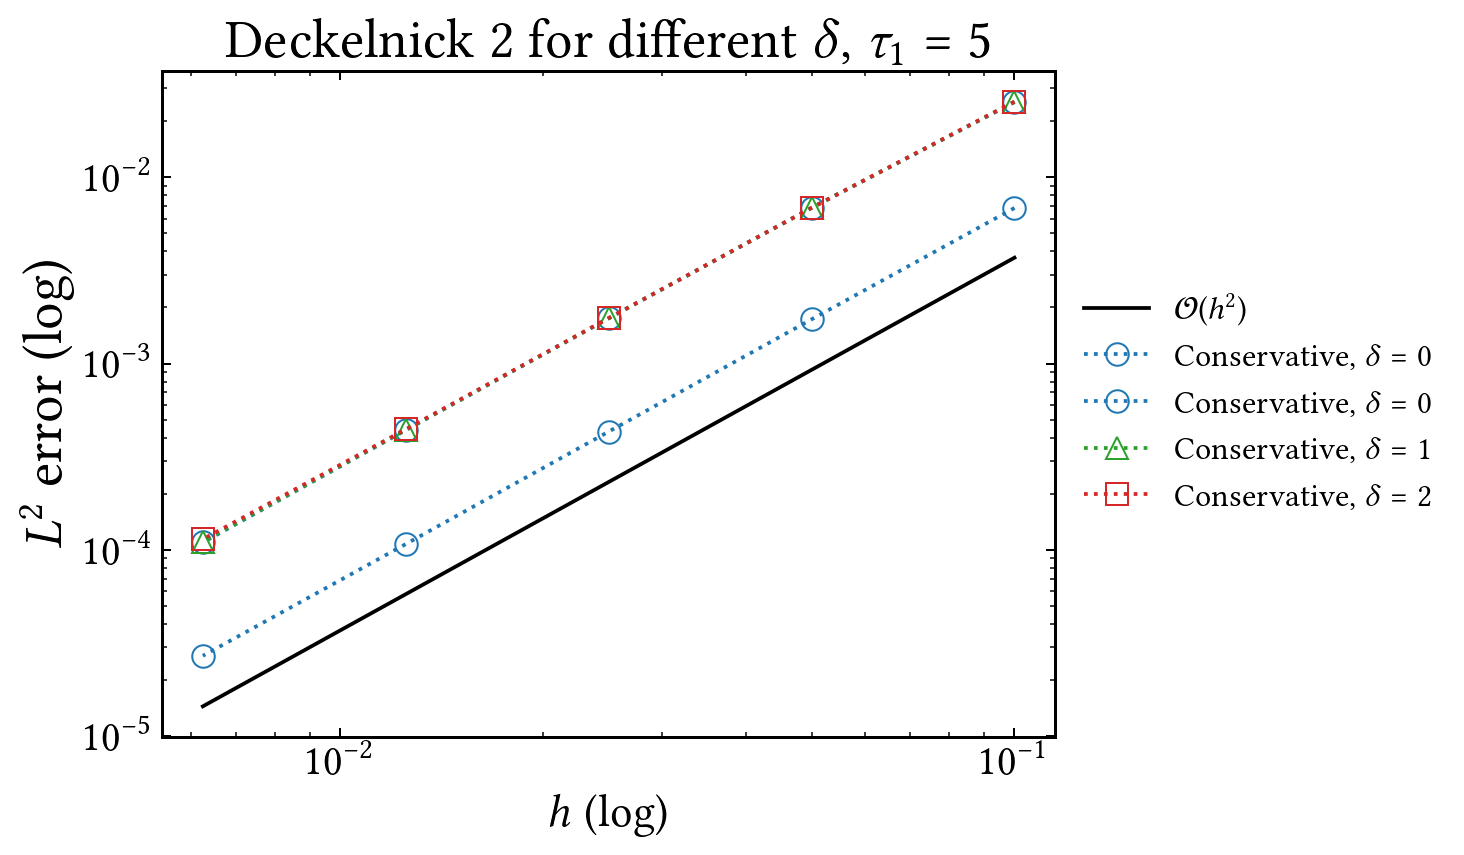

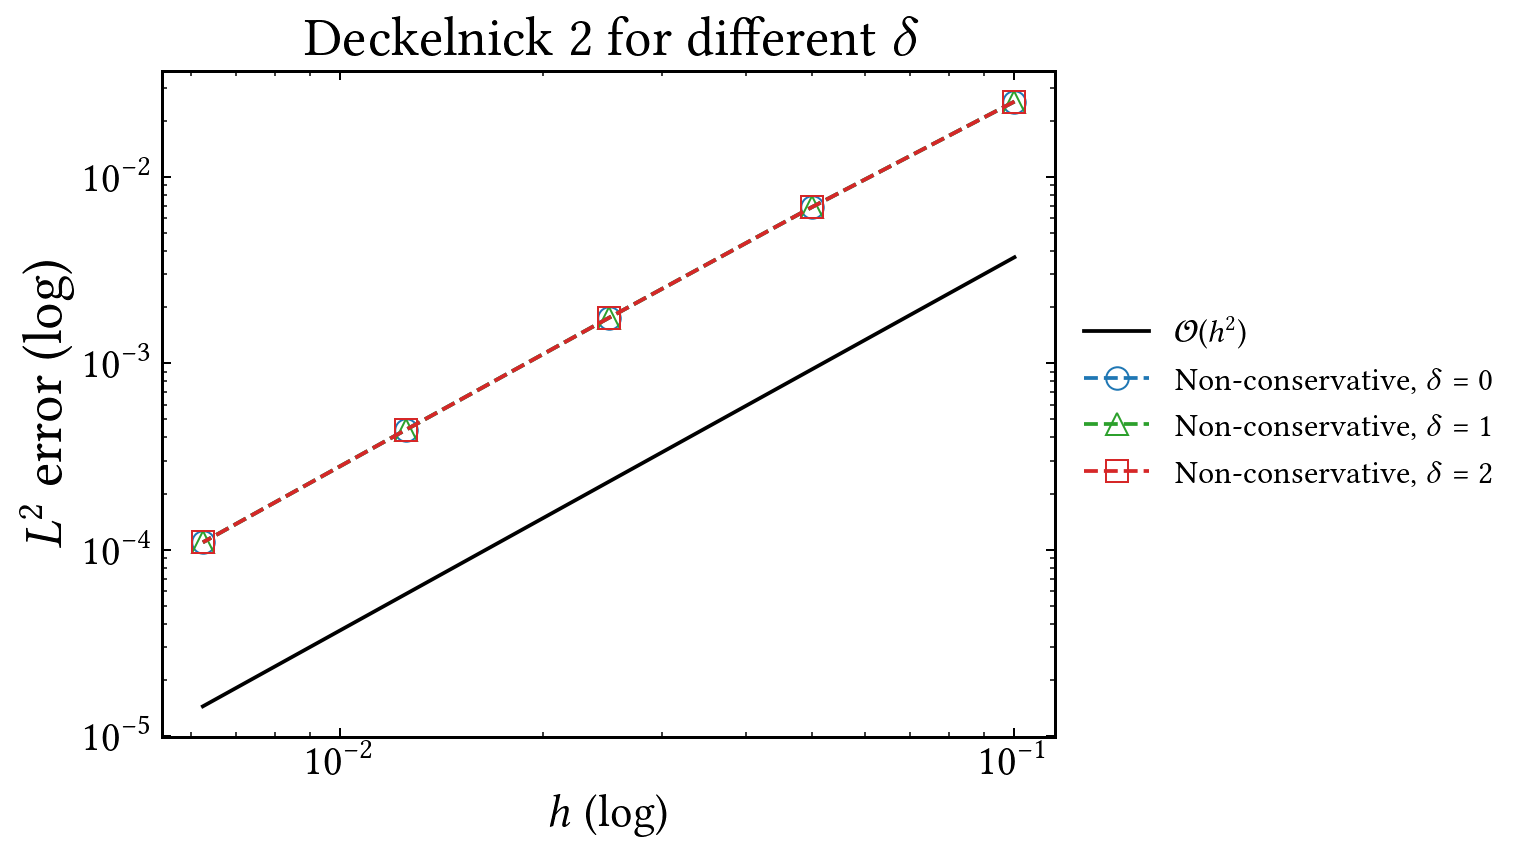

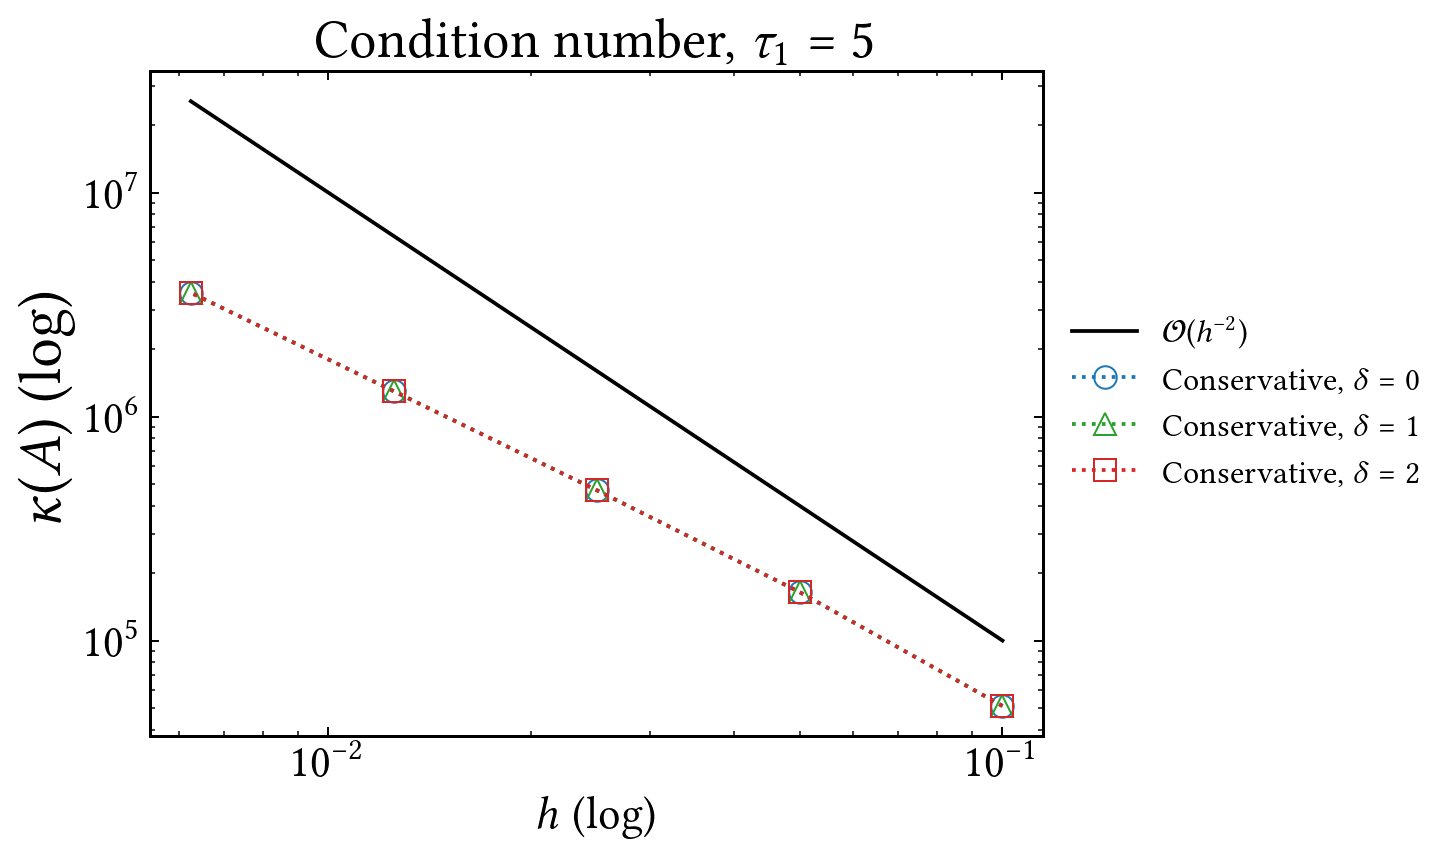

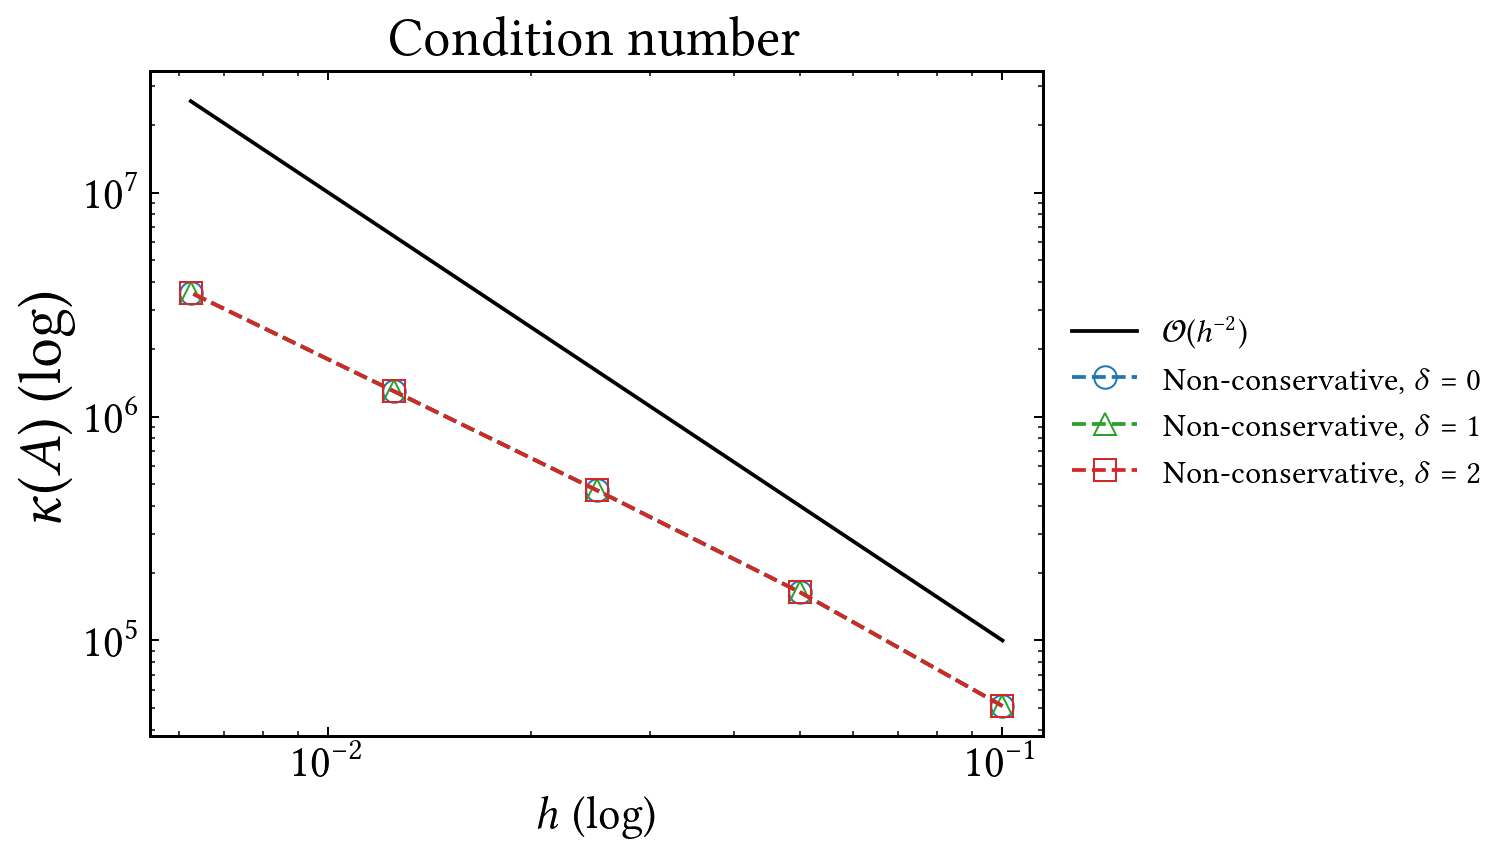

In [90]:
tau = 5
L2_error_conservative_delta0_tau1 = np.array([0.00683999, 0.00172723, 0.0004311, 0.00010739, 2.69884e-05])

if tau == 1:
    #! tau_1 = 1

    ### delta = 0

    # Conservative
    
    condition_number_conservative_delta0 = np.array([2.694977e+04,7.687256e+04,2.135206e+05,6.456964e+05,2.108137e+06])

    # Non-conservative
    L2_error_classical_delta0 = np.array([0.00684464, 0.00172538, 0.000431005, 0.000107127, 2.67838e-05])
    #condition_number_classical_delta0 = np.array()


    ### delta = 1
    # Conservative
    L2_error_conservative_delta1 = np.array([0.00699495, 0.00177728, 0.00047092, 0.000159315, 6.67664e-05])
    condition_number_conservative_delta1 = np.array([2.694977e+04,7.687256e+04,2.135206e+05,6.456964e+05,2.108137e+06])

    # Non-conservative
    L2_error_classical_delta1 = np.array([0.00684464, 0.00172538, 0.000431005, 0.000107127, 2.67838e-05])
    condition_number_classical_delta1 = np.array([2.688649e+04,7.674337e+04,2.136327e+05,6.454918e+05,2.108123e+06])



    ### delta = 2
    # Conservative
    L2_error_conservative_delta2 = np.array([0.00731393, 0.00192853, 0.000571934, 0.000253921, 0.000122898]) #np.array([0.00728766, 0.0019272, 0.000603173])
    condition_number_conservative_delta2 = np.array([2.694977e+04,7.687256e+04,2.135206e+05,6.456964e+05,2.108137e+06])

    # Non-conservative
    L2_error_classical_delta2 = np.array([0.00684464, 0.00172538, 0.000431005, 0.000107127, 2.67838e-05])   #np.array([0.00675257, 0.00170053, 0.000425102])
    condition_number_classical_delta2 = np.array([2.688649e+04,7.674337e+04,2.136327e+05,6.454918e+05,2.108123e+06])


elif tau == 2:

    ### delta = 0

    # Conservative
    L2_error_conservative_delta0 = np.array([0.0117151, 0.00300842, 0.000755356, 0.000188553, 4.70748e-05])
    condition_number_conservative_delta0 = np.array([3.642019e+04,1.064459e+05,2.923463e+05,8.353582e+05,2.444486e+06])

    # Non-conservative
    L2_error_classical_delta0 = np.array([0.0117184, 0.00300747, 0.000755348, 0.000188485, 4.70239e-05])
    condition_number_classical_delta0 = np.array([3.635433e+04,1.063863e+05,2.923311e+05,8.349312e+05,2.444424e+06])


    ### delta = 1
    # Conservative
    L2_error_conservative_delta1 = np.array([0.0118185, 0.00301666, 0.000763556, 0.000200649, 5.85001e-05])
    condition_number_conservative_delta1 = np.array([3.642019e+04,1.064459e+05,2.923463e+05,8.353582e+05,2.444486e+06])

    # Non-conservative
    #L2_error_classical_delta1 = np.array()
    #condition_number_classical_delta1 = np.array()



    ### delta = 2
    # Conservative
    L2_error_conservative_delta2 = np.array([0.0119804, 0.00306239, 0.000788656, 0.000231313, 8.29308e-05])
    condition_number_conservative_delta2 = np.array([3.642019e+04,1.064459e+05,2.923463e+05,8.353582e+05,2.444486e+06])

    # Non-conservative
    #L2_error_classical_delta2 = np.array()
    #condition_number_classical_delta2 = np.array()


elif tau == 5:

    ### delta = 0

    # Conservative
    L2_error_conservative_delta0 = np.array([0.0252987, 0.00685596, 0.00174842, 0.000439152, 0.000109522])
    condition_number_conservative_delta0 = np.array([5.103003e+04,1.646676e+05,4.695164e+05,1.298894e+06,3.574336e+06])

    # Non-conservative
    L2_error_classical_delta0 = np.array([0.0253004, 0.00685569, 0.00174842, 0.000439151, 0.000109515])
    condition_number_classical_delta0 = np.array([5.096250e+04,1.646248e+05,4.692047e+05,1.298653e+06,3.574095e+06])


    ### delta = 1
    # Conservative
    L2_error_conservative_delta1 = np.array([0.0253859, 0.00684816, 0.00174919, 0.000440293, 0.00011063])
    condition_number_conservative_delta1 = np.array([5.103003e+04,1.646676e+05,4.695164e+05,1.298894e+06,3.574336e+06])

    # Non-conservative
    L2_error_classical_delta1 = np.array([0.0253004, 0.00685569, 0.00174842, 0.000439151, 0.000109515])
    condition_number_classical_delta1 = np.array([5.096250e+04,1.646248e+05,4.692047e+05,1.298653e+06,3.574095e+06])



    ### delta = 2
    # Conservative
    L2_error_conservative_delta2 = np.array([0.0254879, 0.00685166, 0.00175253, 0.000443822, 0.000114029])
    condition_number_conservative_delta2 = np.array([5.103003e+04,1.646676e+05,4.695164e+05,1.298894e+06,3.574336e+06])

    # Non-conservative
    L2_error_classical_delta2 = np.array([0.0253004, 0.00685569, 0.00174842, 0.000439151, 0.000109514])
    condition_number_classical_delta2 = np.array([5.096250e+04,1.646248e+05,4.692047e+05,1.298653e+06,3.574095e+06])


elif tau == 10:

    ### delta = 0

    # Conservative
    L2_error_conservative_delta0 = np.array([0.0441806, 0.0129655, 0.00338483, 0.000857109, 0.000214101])
    condition_number_conservative_delta0 = np.array([6.065197e+04,2.140769e+05,6.598689e+05,1.870857e+06,5.097094e+06])

    # Non-conservative
    #L2_error_classical_delta0 = np.array()
    #condition_number_classical_delta0 = np.array()


    ### delta = 1
    # Conservative
    L2_error_conservative_delta1 = np.array([0.0442626, 0.012954, 0.00338483, 0.00085719, 0.000214139])
    condition_number_conservative_delta1 = np.array([6.065197e+04,2.140769e+05,6.598689e+05,1.870857e+06,5.097094e+06])

    # Non-conservative
    #L2_error_classical_delta1 = np.array()
    #condition_number_classical_delta1 = np.array()



    ### delta = 2
    # Conservative
    L2_error_conservative_delta2 = np.array([0.0443497, 0.0129472, 0.00338558, 0.000857778, 0.000214632])
    condition_number_conservative_delta2 = np.array([6.065197e+04,2.140769e+05,6.598689e+05,1.870857e+06,5.097094e+06])

    # Non-conservative
    #L2_error_classical_delta2 = np.array()
    #condition_number_classical_delta2 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
nx = [48, 96, 192, 384, 768]

#! L2 errors conservative method

fig1, ax1 = plt.subplots()

ax1.loglog(h, 3.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = 0

ax1.loglog(h, L2_error_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
ax1.loglog(h, L2_error_conservative_delta0_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax1.loglog(h, L2_error_classical_delta0,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")


# delta = 1

ax1.loglog(h, L2_error_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")
#ax1.loglog(h[:-2], L2_error_classical_fullstab_tau1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\tau_1 = 1$")

# delta = 2

ax1.loglog(h, L2_error_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
#ax1.loglog(h[:-2], L2_error_classical_delta2,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Deckelnick 2 for different $\delta$, $\tau_1=$ "+str(tau), fontsize=22)

plt.show()
#fig1.savefig("../output_figures/L2_deckelnick2_conservative.pdf", bbox_inches="tight")


#! L2 errors non-conservative method

fig3, ax3 = plt.subplots()

ax3.loglog(h, 3.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = 0

#ax3.loglog(h, L2_error_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
ax3.loglog(h, L2_error_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")


# delta = 1

#ax3.loglog(h, L2_error_conservative_delta1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")
ax3.loglog(h, L2_error_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2

#ax3.loglog(h[:-2], L2_error_conservative_delta2,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
ax3.loglog(h, L2_error_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Deckelnick 2 for different $\delta$")

plt.show()


#! Condition numbers conservative method

fig2, ax2 = plt.subplots()

ax2.loglog(h, 1e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = 0
ax2.loglog(h, condition_number_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")

# delta = 1
ax2.loglog(h, condition_number_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
ax2.loglog(h, condition_number_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")


ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number, $\tau_1=$ "+str(tau), fontsize=22)
#fig2.savefig("../output_figures/condition_number_deckelnick2_conservative.pdf", bbox_inches="tight")
plt.show()

#! Condition numbers non-conservative method

fig4, ax4 = plt.subplots()

ax4.loglog(h, 1e3*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = 0

ax4.loglog(h, condition_number_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1

ax4.loglog(h, condition_number_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
ax4.loglog(h, condition_number_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")


ax4.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax4.set_xlabel(r"$h$ (log)", fontsize=18)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax4.set_title(r"Condition number")

plt.show()


## Shifting study Shi 1

We look at the exact solution $$u(t,x,y) = \frac{e^{-t/4}y}{\sqrt{(x-t)^2+y^2}} + \delta$$ and solve the surface equation on the sphere with radius $2$, initially centered in origo moving with $\beta = [1,0]^T$, and investigate the numerical solutions for the two schemes as we vary $\delta$.

We set $\tau_1 = 1$, $\Delta t_n = h/4$, $T=0.5$, and we look at both the $L^2$ error and the condition number.

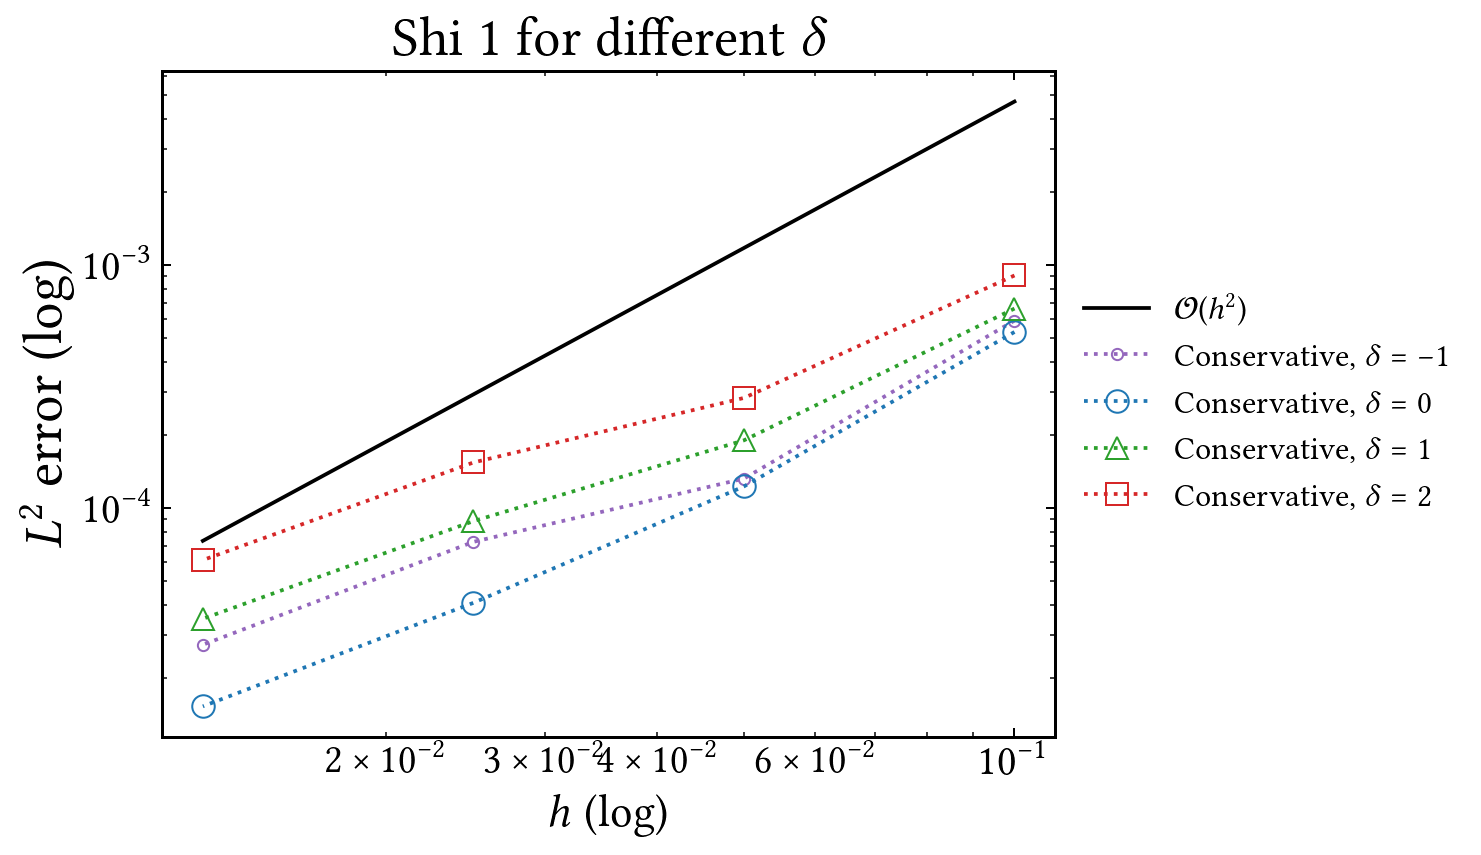

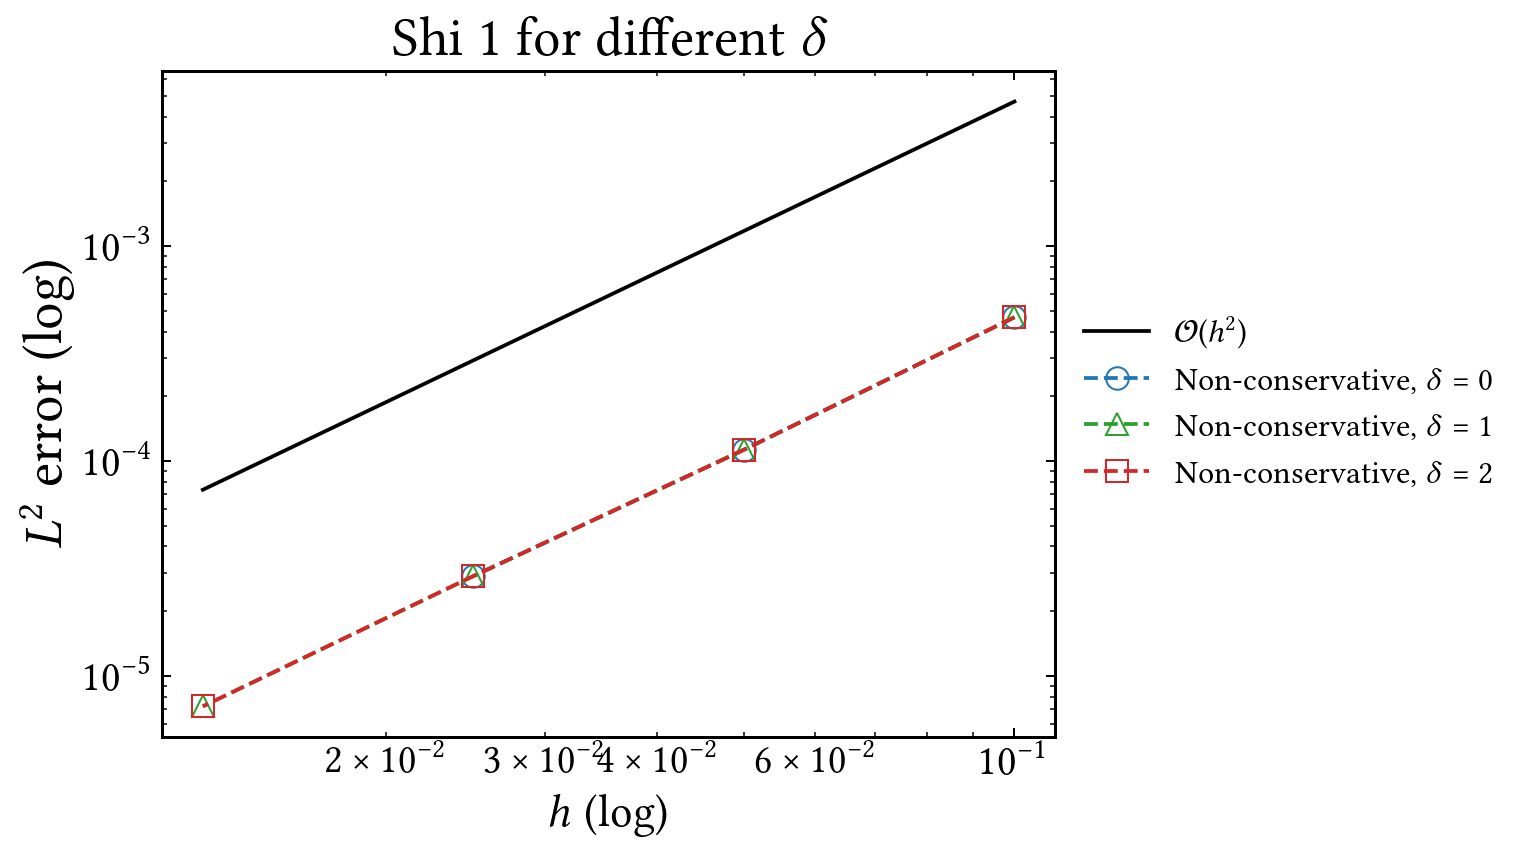

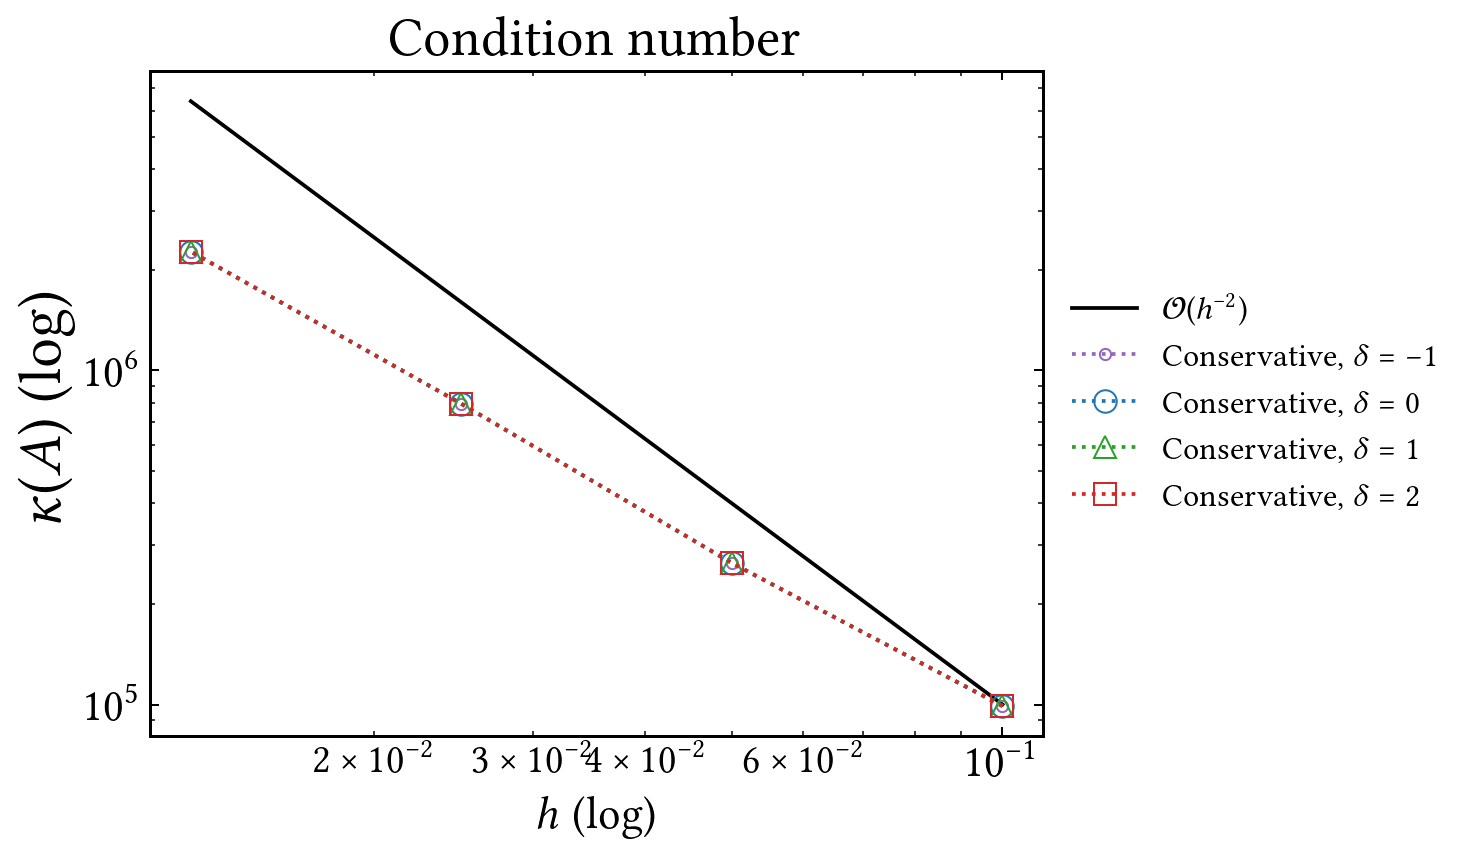

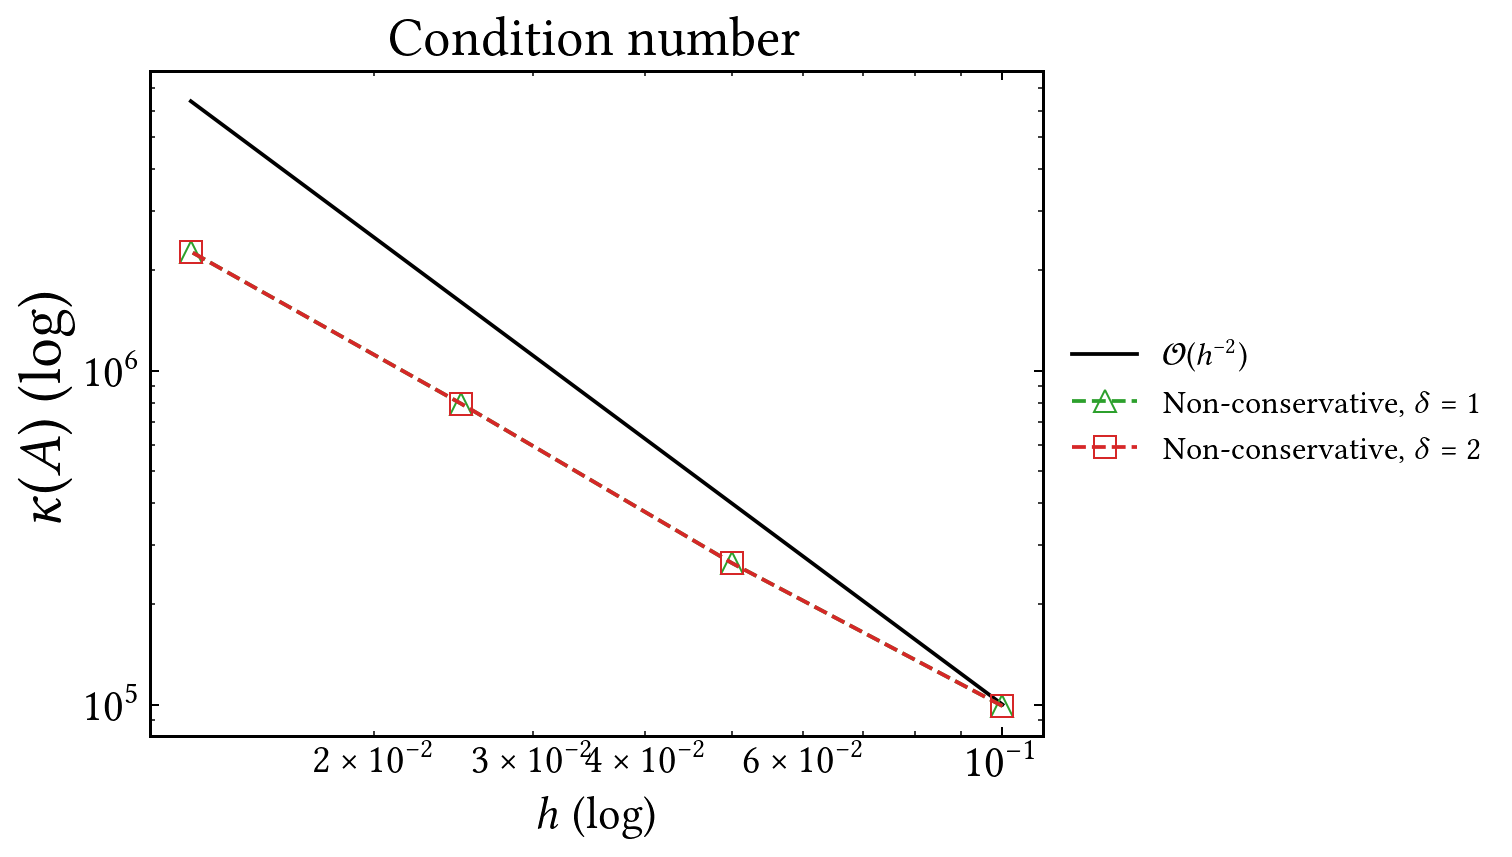

In [ ]:
### delta = -1

# Conservative
L2_error_conservative_deltaneg1 = np.array([0.000590966, 0.000132398, 7.27182e-05, 2.74561e-05])
condition_number_conservative_deltaneg1 = np.array([9.896101e+04,2.651040e+05,7.946345e+05,2.269364e+06])

# Non-conservative
#L2_error_classical_deltaneg1 = np.array()
#condition_number_classical_deltaneg1 = np.array()


### delta = 0

# Conservative
L2_error_conservative_delta0 = np.array([0.000530431, 0.000122939, 4.0834e-05, 1.53272e-05])
condition_number_conservative_delta0 = np.array([9.896101e+04,2.651040e+05,7.946345e+05,2.269364e+06])

# Mass matrix stabilization in t_n
L2_error_conservative_delta0_mass = np.array([0.000510098, 0.000121508, 3.77611e-05, 1.44546e-05])
condition_number_conservative_delta0_mass = np.array([1.300720e+05,3.061313e+05,8.512546e+05,2.354335e+06])


# Non-conservative
L2_error_classical_delta0 = np.array([0.000466244, 0.000112729, 2.91355e-05])
#condition_number_classical_delta0 = np.array()


### delta = 1
# Conservative
L2_error_conservative_delta1 = np.array([0.000662116, 0.000190207, 8.84926e-05, 3.51114e-05])
condition_number_conservative_delta1 = np.array([9.896101e+04,2.651040e+05,7.946345e+05,2.269364e+06])

# Non-conservative
L2_error_classical_delta1 = np.array([0.000466244, 0.000112729, 2.91355e-05, 7.21608e-06])
condition_number_classical_delta1 = np.array([9.898947e+04,2.651737e+05,7.946046e+05,2.269255e+06])



### delta = 2
# Conservative
L2_error_conservative_delta2 = np.array([0.000905738, 0.000284118, 0.000154203, 6.12168e-05])
condition_number_conservative_delta2 = np.array([9.896101e+04,2.651040e+05,7.946345e+05,2.269364e+06])

# Mass matrix stabilization in t_n
L2_error_conservative_delta2_mass = np.array([0.000792816, 0.000254104, 0.000134382, 5.37057e-05])
condition_number_conservative_delta2_mass = np.array([1.300720e+05,3.061313e+05,8.512546e+05,2.354335e+06])


# Non-conservative
L2_error_classical_delta2 = np.array([0.000466244, 0.000112729, 2.91355e-05, 7.21608e-06])
condition_number_classical_delta2 = np.array([9.898947e+04,2.651737e+05,7.946046e+05,2.269255e+06])



h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

#! L2 errors conservative method

fig1, ax1 = plt.subplots()

ax1.loglog(h[:-1], 4.7e-1*np.power(h[:-1], 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = -1
ax1.loglog(h[:-1], L2_error_conservative_deltaneg1,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = -1$")

# delta = 0
ax1.loglog(h[:-1], L2_error_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax1.loglog(h[:-1], L2_error_conservative_delta0_mass,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C0", label=r"Conservative, $\delta = 0$, mass")

# delta = 1
ax1.loglog(h[:-1], L2_error_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
ax1.loglog(h[:-1], L2_error_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
#ax1.loglog(h[:-1], L2_error_conservative_delta2_mass,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"Conservative, $\delta = 2$, mass")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Shi 1 for different $\delta$")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


#! L2 errors non-conservative method

fig3, ax3 = plt.subplots()

ax3.loglog(h[:-1], 4.7e-1*np.power(h[:-1], 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = 0
ax3.loglog(h[:-2], L2_error_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1
ax3.loglog(h[:-1], L2_error_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
ax3.loglog(h[:-1], L2_error_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Shi 1 for different $\delta$")

plt.show()


#! Condition numbers conservative method

fig2, ax2 = plt.subplots()

ax2.loglog(h[:-1], 1e3*np.power(h[:-1], -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = -1
ax2.loglog(h[:-1], condition_number_conservative_deltaneg1,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = -1$")

# delta = 0
ax2.loglog(h[:-1], condition_number_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax2.loglog(h[:-1], condition_number_conservative_delta0_mass,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C0", label=r"Conservative, $\delta = 0$, mass")

# delta = 1
ax2.loglog(h[:-1], condition_number_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
ax2.loglog(h[:-1], condition_number_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
#ax2.loglog(h[:-1], condition_number_conservative_delta2_mass,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"Conservative, $\delta = 2$, mass")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()

#! Condition numbers non-conservative method

fig4, ax4 = plt.subplots()

ax4.loglog(h[:-1], 1e3*np.power(h[:-1], -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = 0
#ax4.loglog(h, condition_number_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1
ax4.loglog(h[:-1], condition_number_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
ax4.loglog(h[:-1], condition_number_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

ax4.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax4.set_xlabel(r"$h$ (log)", fontsize=18)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax4.set_title(r"Condition number")

plt.show()


## Shifting study Example 1

We look at the exact solution $$u(t,x,y) = v + \mathbf{n}\cdot D\nabla v + \delta,$$ where $$v(t,x,y)=0.5+0.4\cos(\pi x)\cos(\pi y)\cos(2\pi t)$$ and solve the surface equation on a sphere with radius $0.18$ which moves in a circular trajectory, advected with $\beta = [\pi(1/2-y),\pi(x-1/2)]^T$, and investigate the numerical solutions for the two schemes as we vary $\delta$.

We set $\tau_1 = 1$, $D=1$, $\Delta t_n = h/4$, $T=0.5$, and we look at both the $L^2$ error and the condition number.

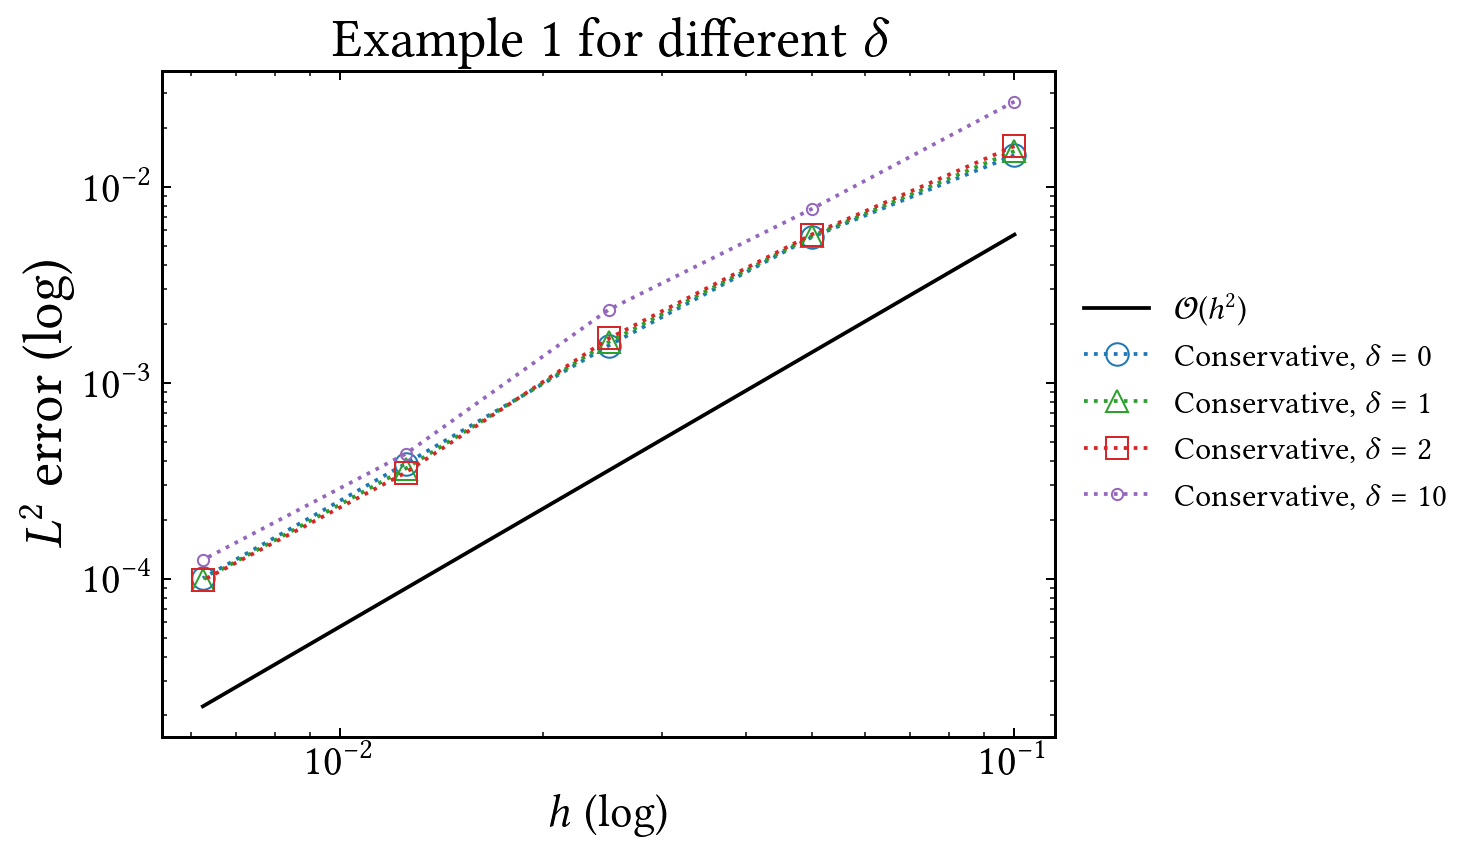

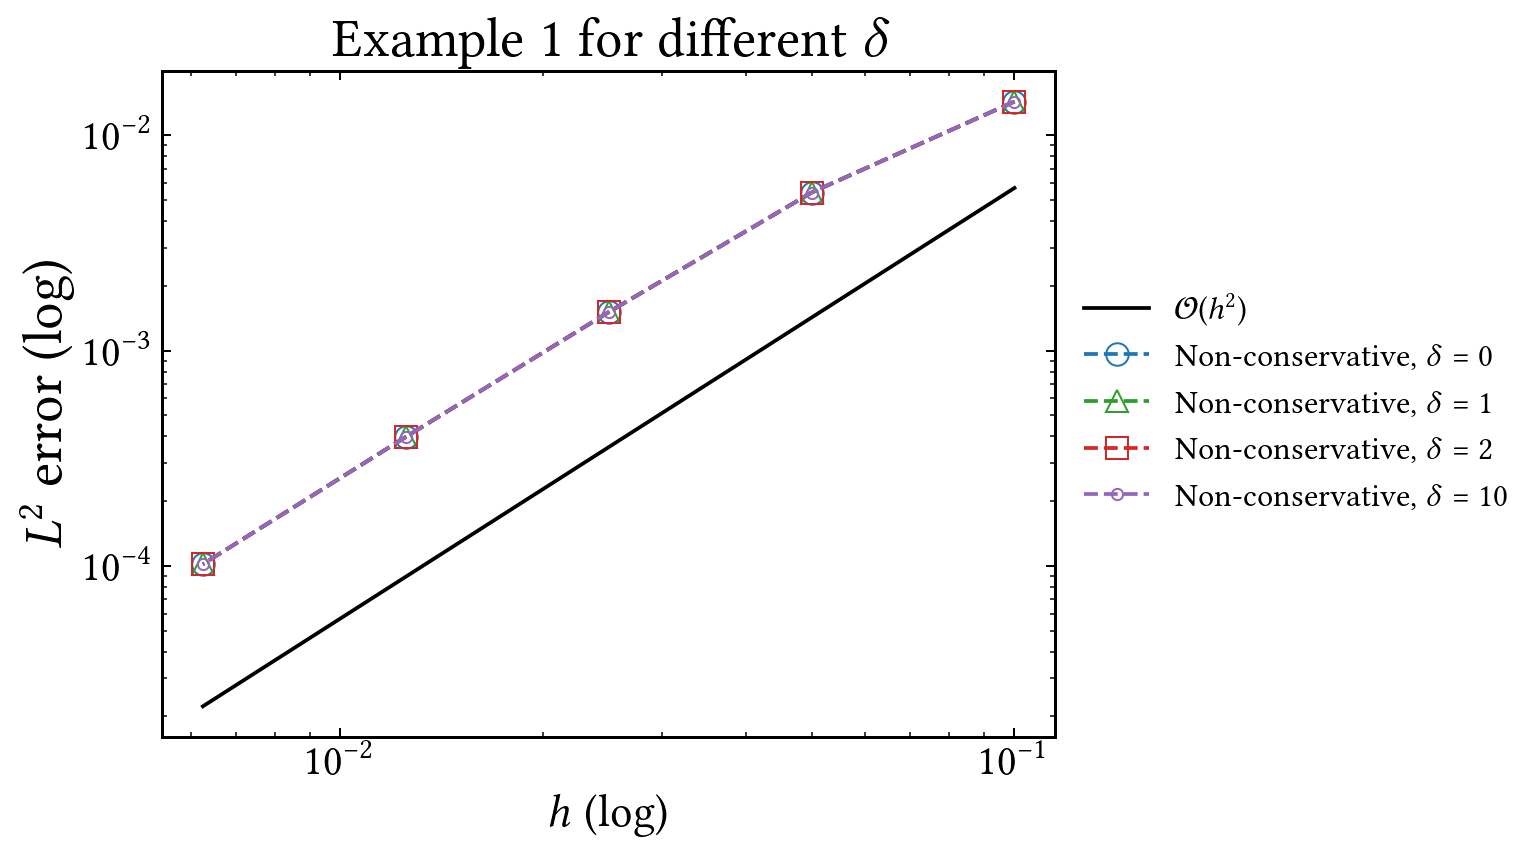

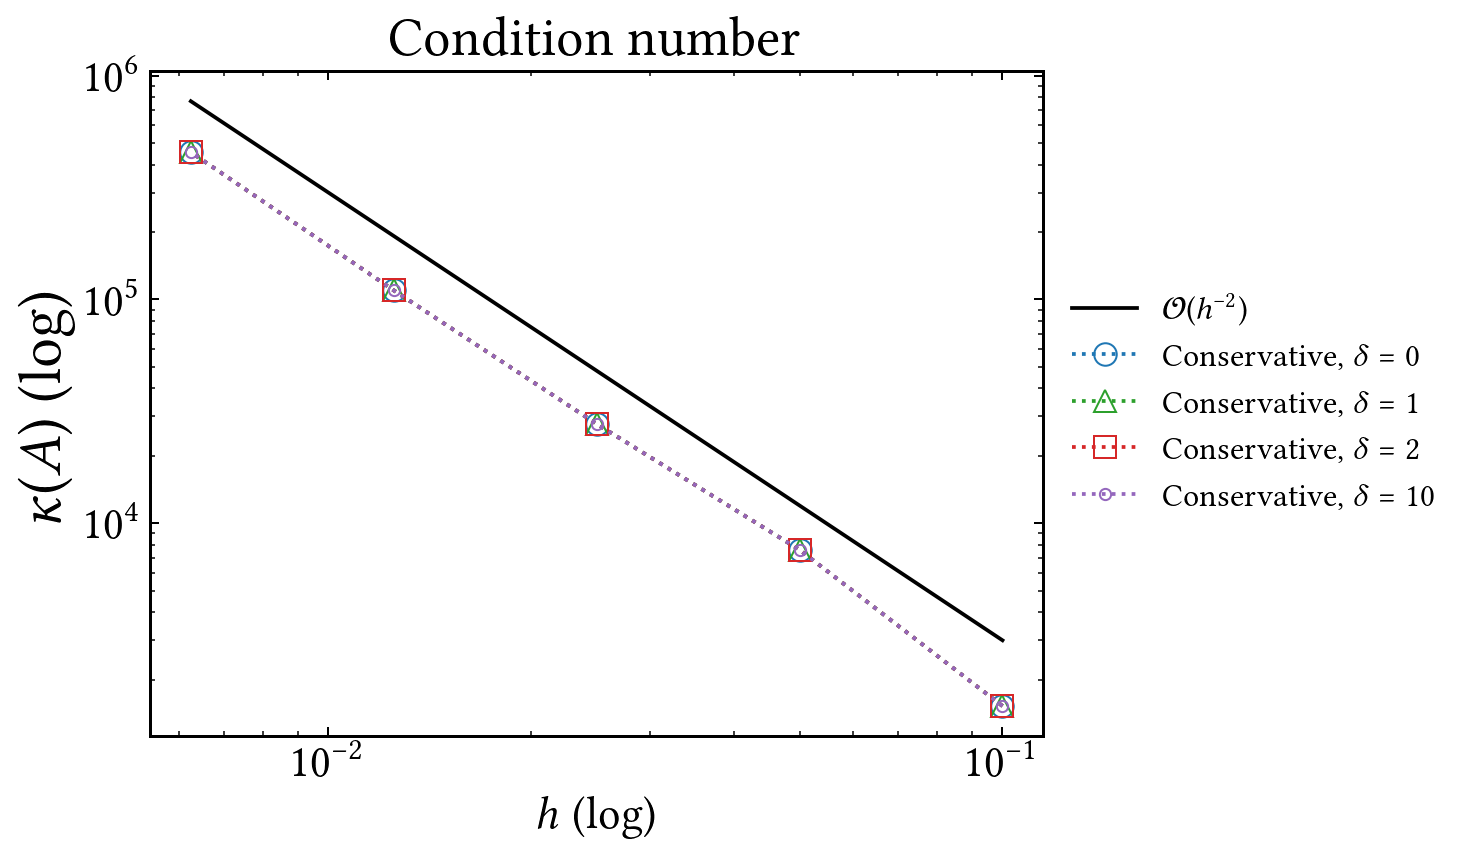

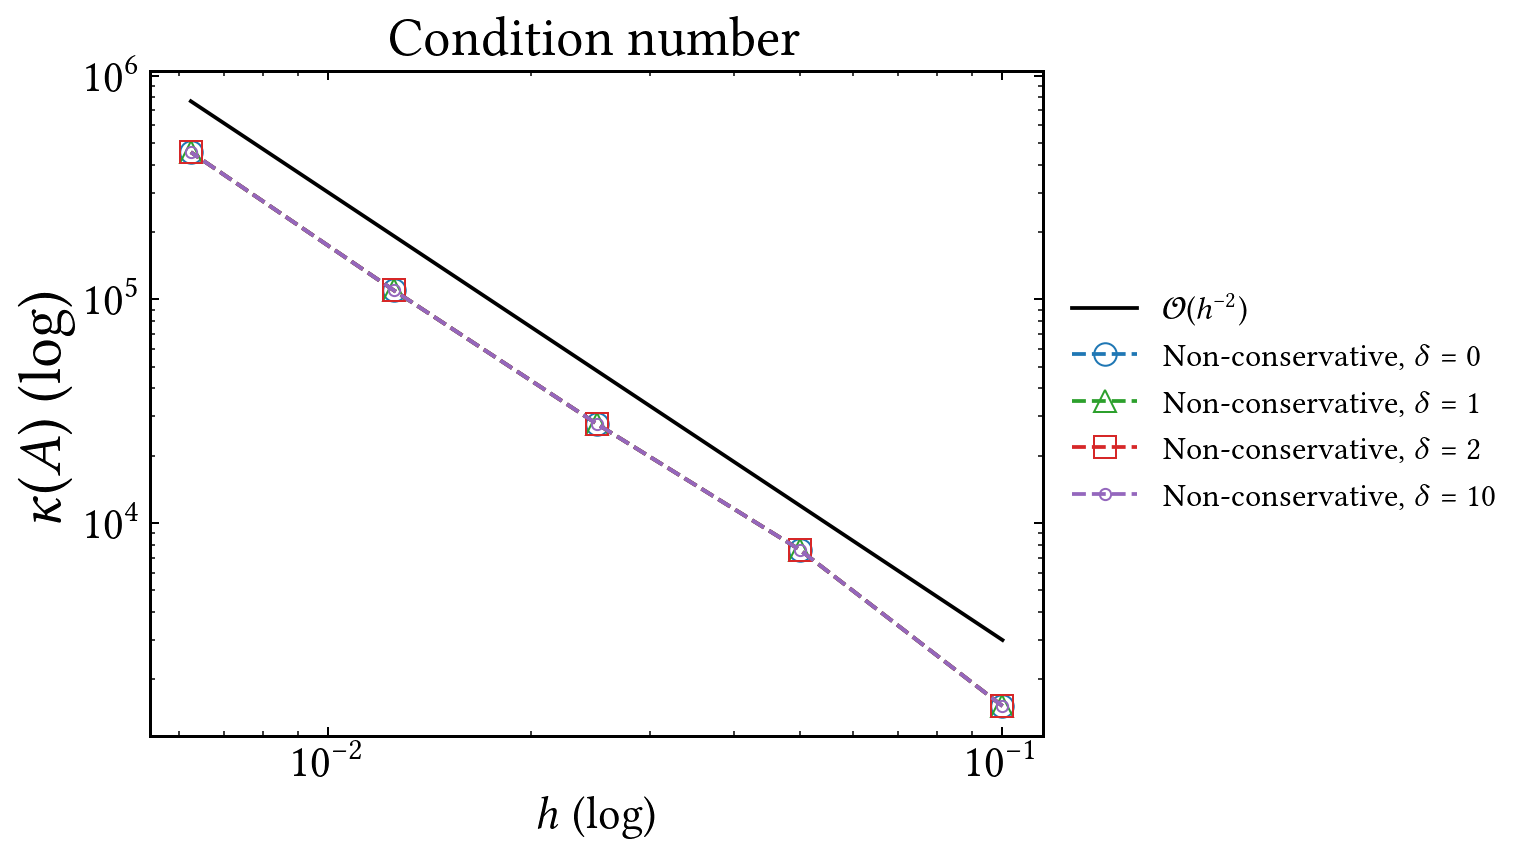

In [ ]:
### delta = -1

# Conservative
#L2_error_conservative_deltaneg1 = np.array()
#condition_number_conservative_deltaneg1 = np.array()

# Non-conservative
#L2_error_classical_deltaneg1 = np.array()
#condition_number_classical_deltaneg1 = np.array()


### delta = 0

# Conservative
L2_error_conservative_delta0 = np.array([0.0144916, 0.00552841, 0.00154698, 0.000386285, 0.000100377])
condition_number_conservative_delta0 = np.array([1.525943e+03,7.608399e+03,2.777655e+04,1.097155e+05,4.545999e+05])

# Mass matrix stabilization in t_n
L2_error_conservative_delta0_mass = np.array([0.0180361, 0.00666856, 0.00170562, 0.000405095, 0.000102621])
condition_number_conservative_delta0_mass = np.array([1.790560e+03,7.139055e+03,2.614953e+04,1.062752e+05,4.491608e+05])


# Non-conservative
L2_error_classical_delta0 = np.array([0.0143647, 0.00542789, 0.00151025, 0.000397432, 0.000101836])
condition_number_classical_delta0 = np.array([1.521559e+03,7.607541e+03,2.778129e+04,1.097109e+05,4.545837e+05])


### delta = 1
# Conservative
L2_error_conservative_delta1 = np.array([0.0152265, 0.0055946, 0.00161109, 0.000364476, 9.86567e-05])
condition_number_conservative_delta1 = np.array([1.525943e+03,7.608399e+03,2.777655e+04,1.097155e+05,4.545999e+05])

# Non-conservative
L2_error_classical_delta1 = np.array([0.0143647, 0.00542789, 0.00151025, 0.000397432, 0.000101836])
condition_number_classical_delta1 = np.array([1.521559e+03,7.607541e+03,2.778129e+04,1.097109e+05,4.545837e+05])


### delta = 2
# Conservative
L2_error_conservative_delta2 = np.array([0.0161443, 0.00570164, 0.00168032, 0.000347794, 9.79153e-05])
condition_number_conservative_delta2 = np.array([1.525943e+03,7.608399e+03,2.777655e+04,1.097155e+05,4.545999e+05])

# # Mass matrix stabilization in t_n
# L2_error_conservative_delta2_mass = np.array()
# condition_number_conservative_delta2_mass = np.array()

# Non-conservative
L2_error_classical_delta2 = np.array([0.0143647, 0.00542789, 0.00151025, 0.000397432, 0.000101836])
condition_number_classical_delta2 = np.array([1.521559e+03,7.607541e+03,2.778129e+04,1.097109e+05,4.545837e+05])


### delta = 10

# Conservative
L2_error_conservative_delta10 = np.array([0.0272264, 0.00769479, 0.00235855, 0.000433131, 0.000124507])
condition_number_conservative_delta10 = np.array([1.525943e+03,7.608399e+03,2.777655e+04,1.097155e+05,4.545999e+05])

# Non-conservative
L2_error_classical_delta10 = np.array([0.0143647, 0.00542789, 0.00151025, 0.000397432, 0.000101836])
condition_number_classical_delta10 = np.array([1.521559e+03,7.607541e+03,2.778129e+04,1.097109e+05,4.545837e+05])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

#! L2 errors conservative method

fig1, ax1 = plt.subplots()

ax1.loglog(h, 5.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = -1
#ax1.loglog(h[:-1], L2_error_conservative_deltaneg1,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = -1$")

# delta = 0
ax1.loglog(h, L2_error_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax1.loglog(h, L2_error_conservative_delta0_mass,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C0", label=r"Conservative, $\delta = 0$, mass")

# delta = 1
ax1.loglog(h, L2_error_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
ax1.loglog(h, L2_error_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
# ax1.loglog(h, L2_error_conservative_delta2_mass,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"Conservative, $\delta = 2$, mass")

# delta = 10
ax1.loglog(h, L2_error_conservative_delta10,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = 10$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Example 1 for different $\delta$")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


#! L2 errors non-conservative method

fig3, ax3 = plt.subplots()

ax3.loglog(h, 5.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = 0
ax3.loglog(h, L2_error_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1
ax3.loglog(h, L2_error_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
ax3.loglog(h, L2_error_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

# delta = 10
ax3.loglog(h, L2_error_classical_delta10,  marker='.', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\delta = 10$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Example 1 for different $\delta$")

plt.show()


#! Condition numbers conservative method

fig2, ax2 = plt.subplots()

ax2.loglog(h, 3e1*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = -1
#ax2.loglog(h[:-1], condition_number_conservative_deltaneg1,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = -1$")

# delta = 0
ax2.loglog(h, condition_number_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax2.loglog(h, condition_number_conservative_delta0_mass,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C0", label=r"Conservative, $\delta = 0$, mass")

# delta = 1
ax2.loglog(h, condition_number_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
ax2.loglog(h, condition_number_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
#ax2.loglog(h[:-1], condition_number_conservative_delta2_mass,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"Conservative, $\delta = 2$, mass")

# delta = 10
ax2.loglog(h, condition_number_conservative_delta10,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = 10$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()

#! Condition numbers non-conservative method

fig4, ax4 = plt.subplots()

ax4.loglog(h, 3e1*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = 0
ax4.loglog(h, condition_number_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1
ax4.loglog(h, condition_number_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
ax4.loglog(h, condition_number_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

# delta = 10
ax4.loglog(h, condition_number_classical_delta10,  marker='.', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\delta = 10$")


ax4.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax4.set_xlabel(r"$h$ (log)", fontsize=18)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax4.set_title(r"Condition number")

plt.show()


## Shifting study Frachon 1

We look at the exact solution $$u(t,x,y) = xy e^{-4t} + \delta$$, and solve the surface equation on an elliptic surface advected by the follwing velocity field, $\beta = [\pi/4\cos(2\pi t)/a(t),0]^T$, where $a(t) = 1+ 1/4\sin(2\pi t)$, and investigate the numerical solutions for the two schemes as we vary $\delta$.

We set $\tau_1 = 1$, $D=1$, $\Delta t_n = h/4$, $T=0.5$, and we look at both the $L^2$ error and the condition number.

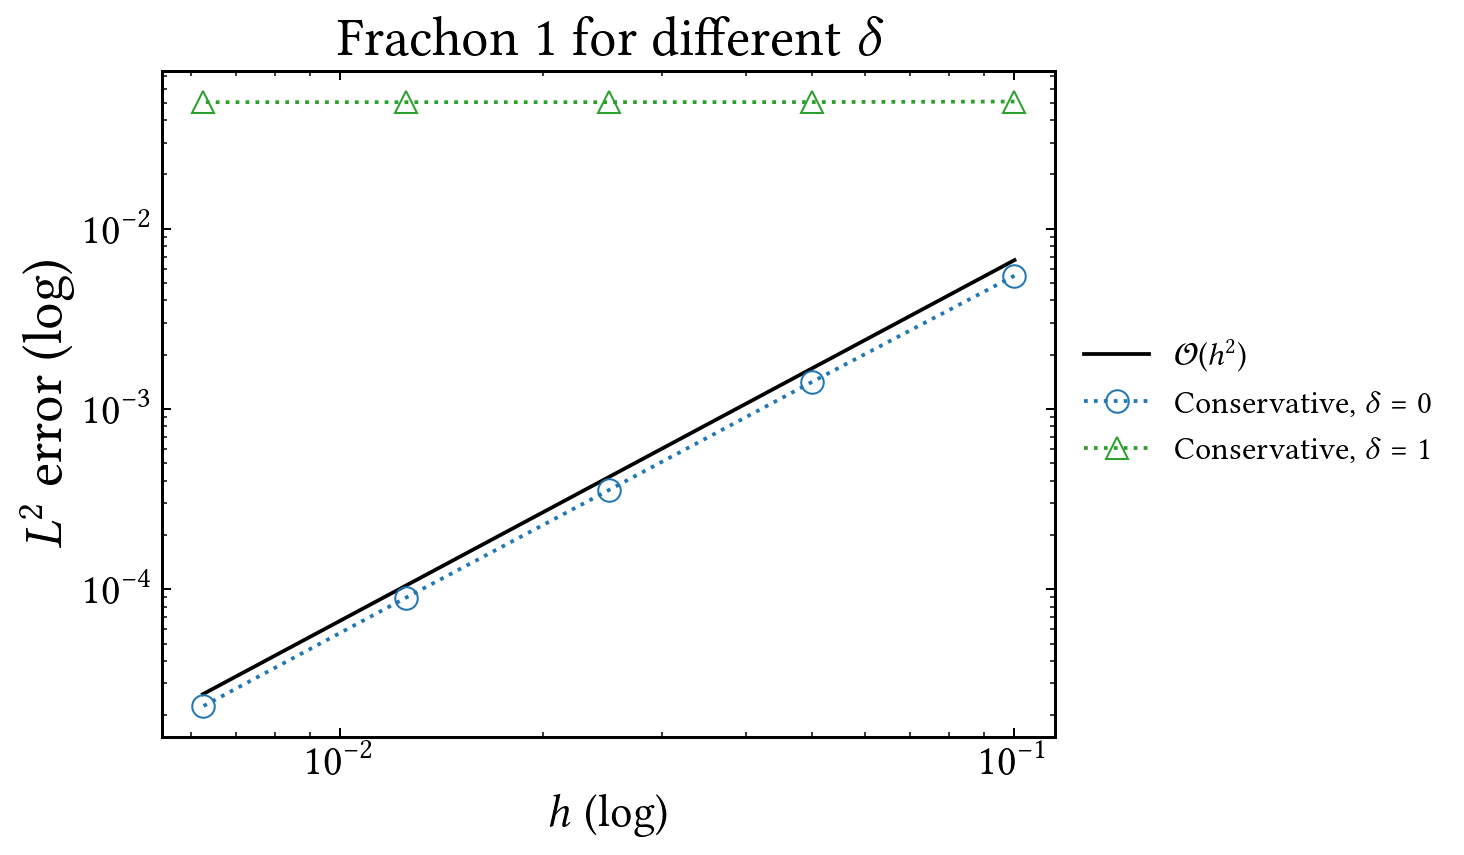

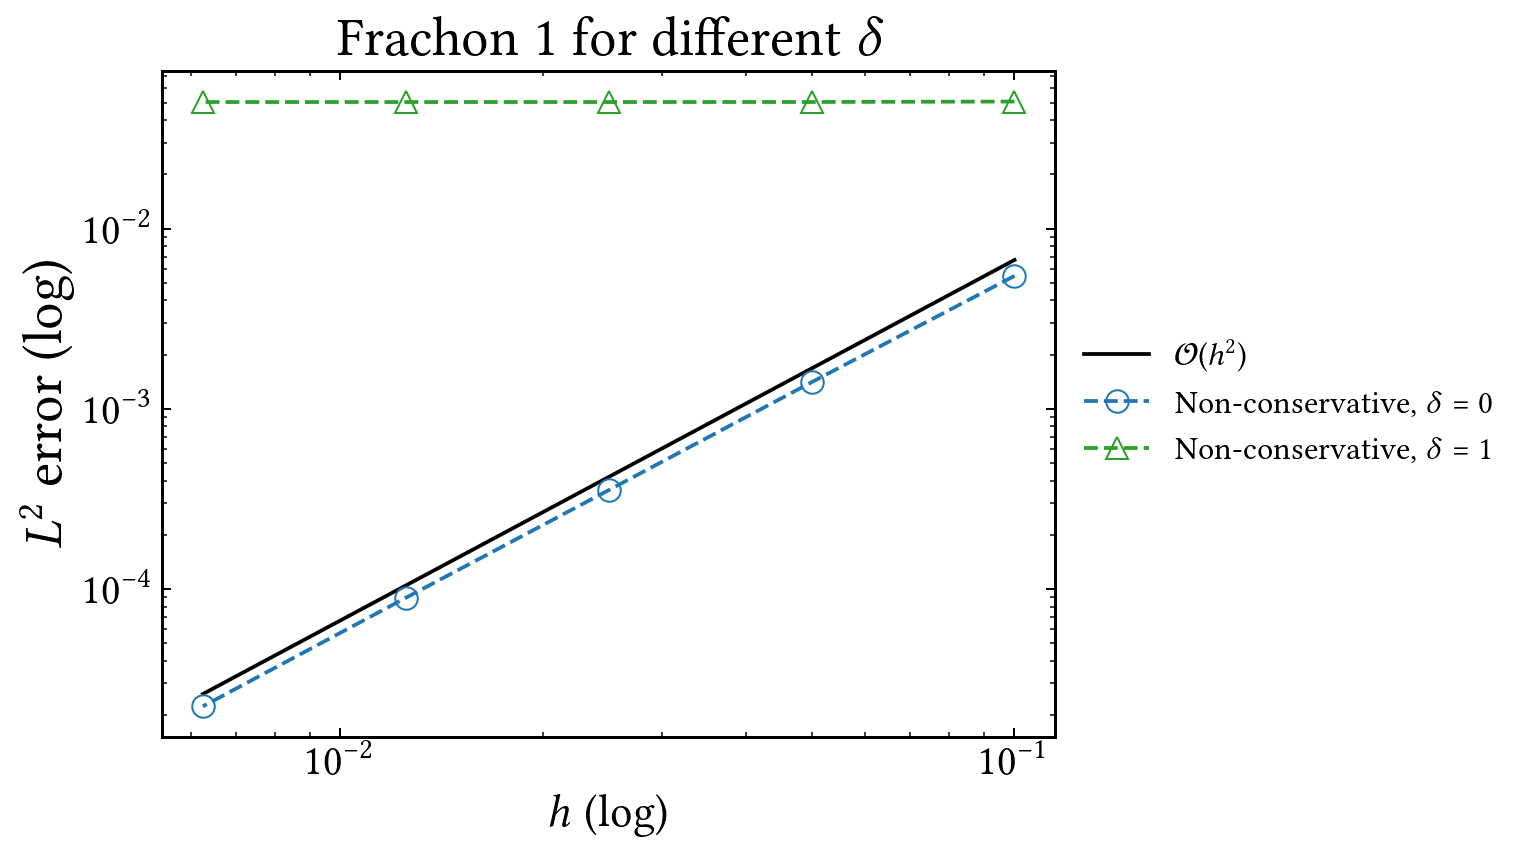

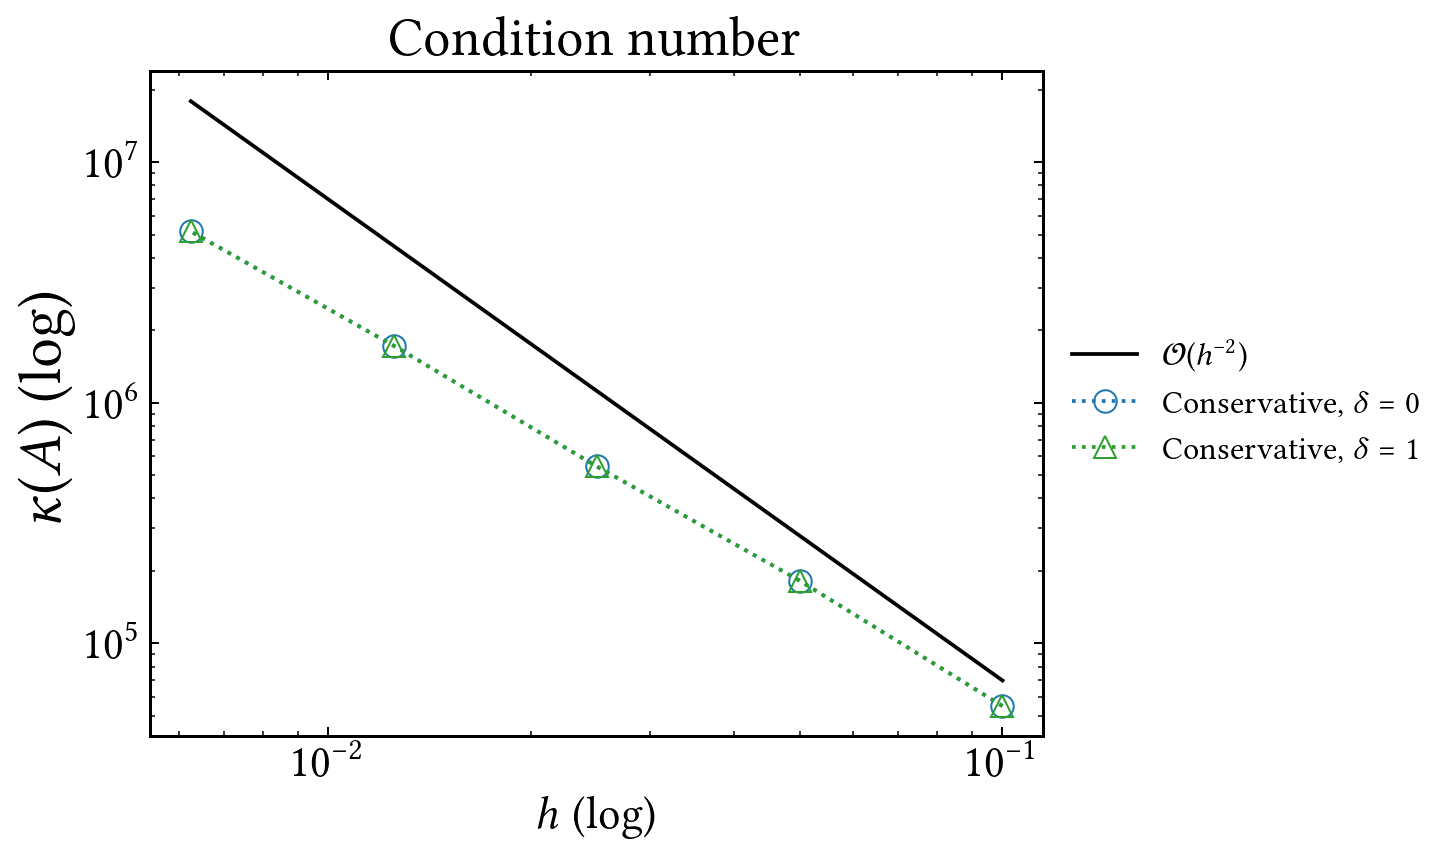

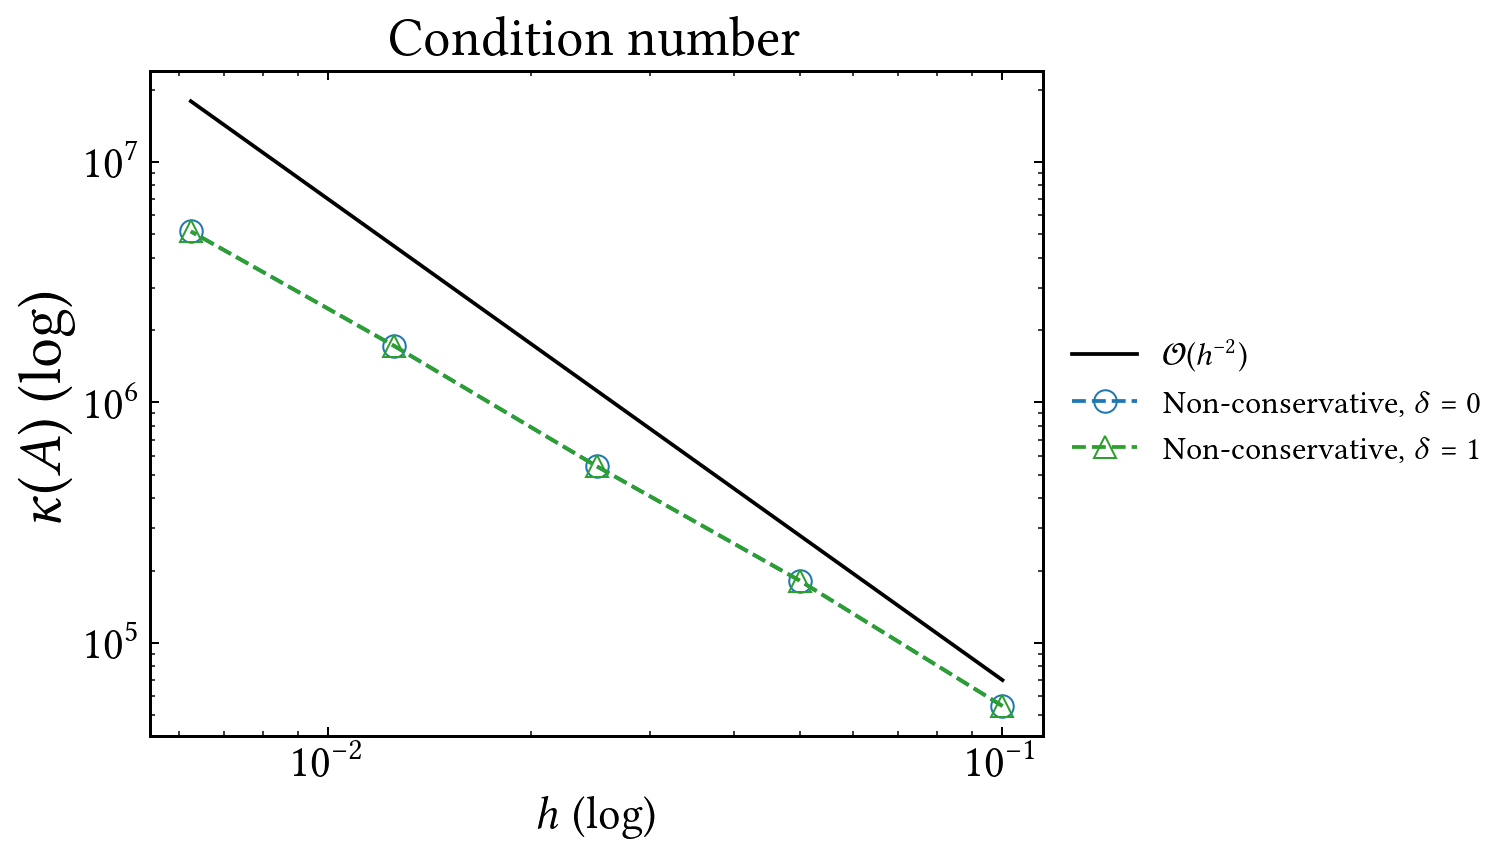

In [ ]:
### delta = -1

# Conservative
#L2_error_conservative_deltaneg1 = np.array()
#condition_number_conservative_deltaneg1 = np.array()

# Non-conservative
#L2_error_classical_deltaneg1 = np.array()
#condition_number_classical_deltaneg1 = np.array()


### delta = 0

# Conservative
L2_error_conservative_delta0 = np.array([0.00549123, 0.00140913, 0.000354606, 8.96529e-05, 2.24057e-05])
condition_number_conservative_delta0 = np.array([5.482108e+04,1.820451e+05,5.438478e+05,1.724682e+06,5.151086e+06])

# Mass matrix stabilization in t_n
# L2_error_conservative_delta0_mass = np.array()
# condition_number_conservative_delta0_mass = np.array()


# Non-conservative
L2_error_classical_delta0 = np.array([0.00546619, 0.00140538, 0.000353998, 8.94374e-05, 2.23583e-05])
condition_number_classical_delta0 = np.array([5.461005e+04,1.816110e+05,5.430312e+05,1.723012e+06,5.147905e+06])


### delta = 1
# Conservative
L2_error_conservative_delta1 = np.array([0.0507905, 0.050436, 0.050391, 0.0503829, 0.0503809])
condition_number_conservative_delta1 = np.array([5.482108e+04,1.820451e+05,5.438478e+05,1.724682e+06,5.151086e+06])

# Non-conservative  
L2_error_classical_delta1 = np.array([0.0507, 0.0504042, 0.0503823, 0.0503807, 0.0503803])
condition_number_classical_delta1 = np.array([5.461005e+04,1.816110e+05,5.430312e+05,1.723012e+06,5.147905e+06])


# ### delta = 2
# # Conservative
# L2_error_conservative_delta2 = np.array()
# condition_number_conservative_delta2 = np.array()

# # # Mass matrix stabilization in t_n
# # L2_error_conservative_delta2_mass = np.array()
# # condition_number_conservative_delta2_mass = np.array()

# # Non-conservative
# L2_error_classical_delta2 = np.array()
# condition_number_classical_delta2 = np.array()


# ### delta = 10

# # Conservative
# L2_error_conservative_delta10 = np.array()
# condition_number_conservative_delta10 = np.array()

# # Non-conservative
# L2_error_classical_delta10 = np.array()
# condition_number_classical_delta10 = np.array()


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

#! L2 errors conservative method

fig1, ax1 = plt.subplots()

ax1.loglog(h, 6.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = -1
#ax1.loglog(h[:-1], L2_error_conservative_deltaneg1,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = -1$")

# delta = 0
ax1.loglog(h, L2_error_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax1.loglog(h, L2_error_conservative_delta0_mass,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C0", label=r"Conservative, $\delta = 0$, mass")

# delta = 1
ax1.loglog(h, L2_error_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
#ax1.loglog(h, L2_error_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
# ax1.loglog(h, L2_error_conservative_delta2_mass,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"Conservative, $\delta = 2$, mass")

# delta = 10
#ax1.loglog(h, L2_error_conservative_delta10,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = 10$")


ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Frachon 1 for different $\delta$")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


#! L2 errors non-conservative method

fig3, ax3 = plt.subplots()

ax3.loglog(h, 6.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# delta = 0
ax3.loglog(h, L2_error_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1
ax3.loglog(h, L2_error_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
#ax3.loglog(h, L2_error_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

# delta = 10
#ax3.loglog(h, L2_error_classical_delta10,  marker='.', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\delta = 10$")


ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Frachon 1 for different $\delta$")

plt.show()


#! Condition numbers conservative method

fig2, ax2 = plt.subplots()

ax2.loglog(h, 7e2*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = -1
#ax2.loglog(h[:-1], condition_number_conservative_deltaneg1,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = -1$")

# delta = 0
ax2.loglog(h, condition_number_conservative_delta0,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\delta = 0$")
#ax2.loglog(h, condition_number_conservative_delta0_mass,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C0", label=r"Conservative, $\delta = 0$, mass")

# delta = 1
ax2.loglog(h, condition_number_conservative_delta1,  marker='^', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Conservative, $\delta = 1$")

# delta = 2
#ax2.loglog(h, condition_number_conservative_delta2,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Conservative, $\delta = 2$")
#ax2.loglog(h[:-1], condition_number_conservative_delta2_mass,  marker='s', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"Conservative, $\delta = 2$, mass")

# delta = 10
#ax2.loglog(h, condition_number_conservative_delta10,  marker='.', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Conservative, $\delta = 10$")

ax2.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax2.set_title(r"Condition number")

plt.show()

#! Condition numbers non-conservative method

fig4, ax4 = plt.subplots()

ax4.loglog(h, 7e2*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

# delta = 0
ax4.loglog(h, condition_number_classical_delta0,  marker='o', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Non-conservative, $\delta = 0$")

# delta = 1
ax4.loglog(h, condition_number_classical_delta1,  marker='^', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Non-conservative, $\delta = 1$")

# delta = 2
#ax4.loglog(h, condition_number_classical_delta2,  marker='s', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\delta = 2$")

# delta = 10
#ax4.loglog(h, condition_number_classical_delta10,  marker='.', markersize=9,linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"Non-conservative, $\delta = 10$")


ax4.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax4.set_xlabel(r"$h$ (log)", fontsize=18)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_ylabel(r"$\kappa(A)$ (log)", fontsize=24)
ax4.set_title(r"Condition number")

plt.show()


# Coupled problem

### Random data

In [ ]:
# dT = h/2, tau = 0.1

# Conservative
# dT = h/4, tau = 1
bulk_error_conservative_fullstab = np.array([0.0201376, 0.00617988, 0.00147748, 0.000364264, 0.000115925])
surface_error_conservative_fullstab = np.array([0.0121272, 0.00456309, 0.00126155, 0.000308342, 7.98412e-05])


# Classical
bulk_error_classical_fullstab = np.array([0.0109909, 0.00301355, 0.000726804, 0.00018624, 7.77153e-05])
surface_error_classical_fullstab = np.array([0.0111189, 0.00173369, 0.000448095, 0.000109931, 2.80726e-05])
#L2_error_classical_macro_n2 = np.array()


# dT = h

# Conservative, tau1 = 0.1
bulk_error_conservative_fullstab = np.array([0.012279, 0.00332892, 0.000779361, 0.000178469, 5.38059e-05])
surface_error_conservative_fullstab = np.array([0.00816575, 0.00212105, 0.000595197, 0.00021787, 0.000117041])

# Conservative, tau_1 = 1
bulk_error_conservative_fullstab = np.array([0.0294082, 0.00820298, 0.00200072, 0.000483457, 0.000136259])
surface_error_conservative_fullstab = np.array([0.0141461, 0.00527573, 0.00169854, 0.00044544, 0.000114834])



# Classical
#bulk_error_classical_fullstab = np.array([0.012589, 0.00305341, 0.000696676, 0.000164677, 8.00414e-05])
#surface_error_classical_fullstab = np.array([0.00742709, 0.00192485, 0.000524513, 0.00013831, 3.48211e-05])

# Dirichlet
# dT = h
bulk_error_classical_fullstab_d = np.array([0.0125365, 0.00339221, 0.000785846, 0.000178729, 5.26527e-05])
surface_error_classical_fullstab_d = np.array([0.00740669, 0.00192646, 0.000524416, 0.000138106, 3.45534e-05])


# Vh2, tau1=tau2 = 0.1, dt = h/2
bulk_error_classical_fullstab = np.array([0.00936377, 0.0025394, 0.000616735, 0.00016476, 8.50318e-05])         # Vh2   
surface_error_classical_fullstab = np.array([0.00407622, 0.00106016, 0.000260313, 6.53186e-05, 1.57274e-05])    # Vh2

bulk_error_conservative_fullstab = np.array([0.00927841, 0.00245387, 0.000592607, 0.000159302, 8.3809e-05])     # Vh
surface_error_conservative_fullstab = np.array([0.0049315, 0.00109603, 0.000315248, 9.1979e-05, 3.34902e-05])   # Vh2

# Vh2, tau1=tau2 = 0.1, dt = h/4
bulk_error_classical_fullstab = np.array([0.00866719, 0.00225274, 0.000573528, 0.000154844, 8.38298e-05])         # Vh   
surface_error_classical_fullstab = np.array([0.00370247, 0.000953378, 0.00022746, 5.68198e-05, 1.39359e-05])    # Vh2

bulk_error_conservative_fullstab = np.array([0.00853469, 0.00219726, 0.000570608, 0.000155724, 8.44426e-05])     # Vh
surface_error_conservative_fullstab = np.array([0.00428739, 0.00108189, 0.000261483, 5.78674e-05, 1.5654e-05])   # Vh2

#! Next, try again with Vh2 on bulk

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig3, ax3 = plt.subplots()

ax3.loglog(h, 2.5e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")


ax3.loglog(h, bulk_error_conservative_fullstab,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"bulk error, conservative")
ax3.loglog(h, surface_error_conservative_fullstab,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"surface error, conservative")
ax3.loglog(h, bulk_error_classical_fullstab,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"bulk error, classical")
ax3.loglog(h, surface_error_classical_fullstab,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"surface error, classical")
#ax3.loglog(h, bulk_error_classical_fullstab_d,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"bulk error, classical, dirichlet")
#ax3.loglog(h, surface_error_classical_fullstab_d,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"surface error, classical, dirichlet")

ax3.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax3.set_title(r"Coupled problem")

plt.show()

UndefVarError: UndefVarError: np not defined

### 1. 
We run with $n=3$, $\Delta t_n = h/4$ and vary $\tau_1$ and $\tau_2$.

In [ ]:
### tau = 0.001

# Conservative
bulk_error_conservative_fullstab_tau001 = np.array([0.00512971, 0.0015555, 0.000431804, 0.000114245, 2.87191e-05])     # Vh
surface_error_conservative_fullstab_tau001 = np.array([0.00317263, 0.000901156, 0.000200371, 0.000111441, 3.66586e-05])   # Vh2

bulk_error_conservative_fullstab_tau2_001 = np.array([0.00844049, 0.00216284, 0.000554499, 0.000130931, 3.05061e-05])       # tau_1 = 1e-1  
surface_error_conservative_fullstab_tau2_001 = np.array([0.00324737, 0.000900894, 0.000199571, 0.000111269, 3.66188e-05])   # tau_2 = 1e-2

bulk_error_conservative_fullstab_tau1_001 = np.array([0.00518345, 0.00156624, 0.000433023, 0.000114528, 2.8751e-05])       # tau_1 = 1e-2  
surface_error_conservative_fullstab_tau1_001 = np.array([0.00412245, 0.00105435, 0.000258215, 5.80538e-05, 1.61052e-05])   # tau_2 = 1e-1

# Classical
bulk_error_classical_fullstab_tau001 = np.array([0.00489515, 0.00152404, 0.00042679, 0.000110246, 2.78016e-05])     # Vh
surface_error_classical_fullstab_tau001 = np.array([0.00266261, 0.00063173, 0.000151297, 3.98988e-05, 9.96682e-06])   # Vh2


### tau = 0.1

# Conservative
bulk_error_conservative_fullstab_tau01 = np.array([0.00856077, 0.00219636, 0.000561611, 0.000132514, 3.07924e-05])     # Vh
surface_error_conservative_fullstab_tau01 = np.array([0.00419408, 0.00105868, 0.000257395, 5.76002e-05, 1.59863e-05])   # Vh2

bulk_error_conservative_macro_tau01 = np.array([0.00517336, 0.0015907, 0.000452494, 0.000116211, 2.93663e-05])
surface_error_conservative_macro_tau01 = np.array([0.00360825, 0.000928496, 0.000305446, 0.000207487, 4.15832e-05])

# Classical
bulk_error_classical_fullstab_tau01 = np.array([0.00869525, 0.00225302, 0.000565717, 0.000132535, 3.0608e-05])         # Vh 
surface_error_classical_fullstab_tau01 = np.array([0.00361056, 0.000927496, 0.000222721, 5.64049e-05, 1.4175e-05])    # Vh2

bulk_error_classical_fullstab_tau01_Vh = np.array([0.00891958, 0.00232615, 0.000580521, 0.000135439, 3.11705e-05])         # Vh
surface_error_classical_fullstab_tau01_Vh = np.array([0.0067148, 0.00166668, 0.00040045, 0.00010361, 2.64044e-05])      # Vh


### tau = 1

# Conservative
bulk_error_conservative_fullstab_tau1_Vh = np.array([0.0201782, 0.00613374, 0.0014626, 0.000361252, 0.000115479])          # Vh
surface_error_conservative_fullstab_tau1_Vh = np.array([0.0101107, 0.00392911, 0.00108621, 0.000260281, 6.76872e-05])      # Vh

bulk_error_conservative_fullstab_tau1 = np.array([0.020203, 0.00613515, 0.00145809, 0.000346483, 8.07925e-05])          # Vh
surface_error_conservative_fullstab_tau1 = np.array([0.0100825, 0.00392529, 0.00108599, 0.000260399, 6.78272e-05])      # Vh2

bulk_error_conservative_macro_tau1 = np.array([0.00562564, 0.00163715, 0.000469137, 0.000122294, 3.09027e-05])  #np.array([0.00559373, 0.00162765, 0.000466252, 0.000120406, 3.03837e-05])
surface_error_conservative_macro_tau1 = np.array([0.00395238, 0.000922273, 0.000247764, 7.5218e-05, 4.62167e-05])   #np.array([0.00392018, 0.000955401, 0.000310808, 0.000212324, 3.85483e-05])

# Classical
bulk_error_classical_fullstab_tau1 = np.array([0.0204589, 0.00620725, 0.00147366, 0.00034724, 8.13205e-05])
surface_error_classical_fullstab_tau1 = np.array([0.00972321, 0.0038332, 0.0010484, 0.000271564, 6.91224e-05])

bulk_error_classical_macro_tau1 = np.array([0.00550838, 0.00160395, 0.000453534, 0.000116382, 2.89862e-05])        #np.array([0.00559373, 0.00162765, 0.000466252, 0.000120406, 3.03837e-05])
surface_error_classical_macro_tau1 = np.array([0.0034872, 0.000616963, 0.000164199, 4.24764e-05, 1.20667e-05])     #np.array([0.00392018, 0.000955401, 0.000310808, 0.000212324, 3.85483e-05])


### tau1 = 1, tau2 = 10, tau3 = 0.01 (h & h scaling), delta_bulk = 0.25, delta_surface = 0.45
bulk_error_conservative_macro = np.array([0.00564469, 0.00163816, 0.000467311, 0.000120846, 3.04274e-05])
surface_error_conservative_macro = np.array([0.00534206, 0.00100097, 0.000211989, 7.0609e-05, 3.16123e-05])

### tau1 = 1, tau2 = 10, tau3 = 0.01 (h & h scaling), delta_bulk = 0.25, delta_surface = 0.25
bulk_error_conservative_macro = np.array([0.00559576, 0.00162782, 0.000466338, 0.000120758, 3.04134e-05])
surface_error_conservative_macro = np.array([0.00389932, 0.000928651, 0.000210719, 7.24493e-05, 3.17271e-05])


h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 1.7e-1*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.01


#ax1.loglog(h, bulk_error_conservative_fullstab_tau1_001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, bulk, $\tau_1=0.01$")
#ax1.loglog(h, surface_error_conservative_fullstab_tau1_001,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, surface, $\tau_2=0.1$")

# ax1.loglog(h, bulk_error_conservative_fullstab_tau001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, bulk, fullstab, $\tau_1=0.01$")
# ax1.loglog(h, surface_error_conservative_fullstab_tau001,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, surface, fullstab, $\tau_1=0.01$")


ax1.loglog(h, bulk_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, bulk, fullstab, $\tau_1=0.01$")
ax1.loglog(h, surface_error_classical_fullstab_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, surface, fullstab, $\tau_1=0.01$")

# tau1 = 0.1

# ax1.loglog(h, bulk_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"reynold, bulk, fullstab, $\tau_1=0.1$")
# ax1.loglog(h, surface_error_conservative_fullstab_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"reynold, surface, fullstab, $\tau_1=0.1$")

# ax1.loglog(h, bulk_error_conservative_macro_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"reynold, bulk, $\tau_1=0.1$")
# ax1.loglog(h, surface_error_conservative_macro_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"reynold, surface, $\tau_1=0.1$")


#ax1.loglog(h, bulk_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"classical, bulk, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, surface_error_classical_fullstab_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"classical, surface, fullstab, $\tau_1=0.1$")

#ax1.loglog(h, bulk_error_classical_fullstab_tau01_Vh,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"classical, bulk, $\tau_1=0.1$")
#ax1.loglog(h, surface_error_classical_fullstab_tau01_Vh,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"classical, surface, $\tau_1=0.1$")

# tau1 = 1

ax1.loglog(h, bulk_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, bulk, fullstab, $\tau_1=1$")
ax1.loglog(h, surface_error_conservative_fullstab_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"reynold, surface, fullstab, $\tau_1=1$")

ax1.loglog(h, bulk_error_conservative_macro_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"reynold, bulk, macro, $\tau_1=1$")
ax1.loglog(h, surface_error_conservative_macro_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, color="C3", label=r"reynold, surface, macro, $\tau_1=1$")


ax1.loglog(h, bulk_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, bulk, fullstab, $\tau_1=1$")
ax1.loglog(h, surface_error_classical_fullstab_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"classical, surface, fullstab, $\tau_1=1$")

ax1.loglog(h, bulk_error_classical_macro_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, color="C3", label=r"classical, bulk, macro, $\tau_1=1$")
ax1.loglog(h, surface_error_classical_macro_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, color="C3", label=r"classical, surface, macro, $\tau_1=1$")


# special
#ax1.loglog(h, bulk_error_conservative_macro,  marker='o', markersize=9,linestyle=":", color="black", label=r"reynold, bulk, macro")
#ax1.loglog(h, surface_error_conservative_macro,  marker='*', markersize=9,linestyle=":", color="black", label=r"reynold, surface, macro")

ax1.legend(prop={'size': 13},loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$L^2$ error (log)", fontsize=22)
ax1.set_title(r"Coupled problem")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")

UndefVarError: UndefVarError: np not defined

### 2.
We set $\tau_1 = 1$, $n=3$ and vary $\Delta t_n$ as a function of $h$.

### On $\Omega_2(t)$

In [ ]:
### tau = 0.001

# Conservative
bulk_error_conservative_fullstab_tau001 = np.array([0.00297786, 0.00123014, 0.000157584, 4.09083e-05, 1.20199e-05])
surface_error_conservative_fullstab_tau001 = np.array([0.00372581, 0.000988852, 0.000220386, 0.000113035, 3.62863e-05])

# # Classical
# bulk_error_classical_fullstab_tau001 = np.array()
# surface_error_classical_fullstab_tau001 = np.array()


# ### tau = 0.1

# # Conservative
# bulk_error_conservative_fullstab_tau01 = np.array()
# surface_error_conservative_fullstab_tau01 = np.array()

# # Classical
# bulk_error_classical_fullstab_tau01 = np.array()
# surface_error_classical_fullstab_tau01 = np.array()


### tau = 1

# Conservative
# bulk_error_conservative_fullstab_tau1 = np.array([0.00575681, 0.00393231, 0.000746291, 0.000185732, 5.39927e-05])
# surface_error_conservative_fullstab_tau1 = np.array([0.0126144, 0.00497289, 0.00138372, 0.000338834, 8.79039e-05])

# # Classical
# bulk_error_classical_fullstab_tau1 = np.array()
# surface_error_classical_fullstab_tau1 = np.array()


#* with surface C & 0 scaling

### tau = 1

# Conservative
bulk_error_conservative_fullstab_tau1 = np.array([0.00588994, 0.00350171, 0.000702835, 0.00018675, 5.5773e-05])
surface_error_conservative_fullstab_tau1 = np.array([0.0126126, 0.00490936, 0.00141286, 0.000352614, 9.164e-05])
cond_conservative_tau1 = np.array([3.740632e+04,1.720153e+05,6.123385e+05,2.654268e+06,1.176652e+07])


# Classical
bulk_error_classical_fullstab_tau1 = np.array([0.00534785, 0.00345668, 0.000683313, 0.000188004, 5.55462e-05])
surface_error_classical_fullstab_tau1 = np.array([0.0121992, 0.00480518, 0.00137556, 0.00036562, 9.28653e-05])
cond_classical_tau1 = np.array([3.727342e+04,1.717343e+05,6.116296e+05,2.648934e+06,1.174206e+07])

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]

fig1, ax1 = plt.subplots()

ax1.loglog(h, 3.7e-0*np.power(h, 2), label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")

# tau1 = 0.01

#ax1.loglog(h, bulk_error_conservative_fullstab_tau001,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, bulk, fullstab, $\tau_1=0.01$")
#ax1.loglog(h, surface_error_conservative_fullstab_tau001,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"reynold, surface, fullstab, $\tau_1=0.01$")


#ax1.loglog(h, bulk_error_classical_fullstab_tau001,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, bulk, fullstab, $\tau_1=0.01$")
#ax1.loglog(h, surface_error_classical_fullstab_tau001,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"classical, surface, fullstab, $\tau_1=0.01$")


# tau1 = 0.1

# ax1.loglog(h, bulk_error_conservative_fullstab_tau01,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"reynold, bulk, fullstab, $\tau_1=0.1$")
# ax1.loglog(h, surface_error_conservative_fullstab_tau01,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"reynold, surface, fullstab, $\tau_1=0.1$")

#ax1.loglog(h, bulk_error_classical_fullstab_tau01,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"classical, bulk, fullstab, $\tau_1=0.1$")
#ax1.loglog(h, surface_error_classical_fullstab_tau01,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"classical, surface, fullstab, $\tau_1=0.1$")


# tau1 = 1

ax1.loglog(h, bulk_error_conservative_fullstab_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, bulk $\tau_1=1$")
ax1.loglog(h, surface_error_conservative_fullstab_tau1,  marker='*', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, surface, $\tau_1=1$")

ax1.loglog(h, bulk_error_classical_fullstab_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, bulk, $\tau_1=1$")
ax1.loglog(h, surface_error_classical_fullstab_tau1,  marker='*', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, surface, $\tau_1=1$")

ax1.legend(prop={'size': 11})#,loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax1.set_xlabel(r"$h$ (log)", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_ylabel(r"$L^2$--error (log)", fontsize=20)
#ax1.set_title(r"Coupled problem")
fig1.savefig("L2_coupled.pdf", bbox_inches="tight")

plt.show()
#fig1.savefig("output/reynold_error_example1.pdf", bbox_inches="tight")


fig2, ax2 = plt.subplots()

ax2.loglog(h, 7e2*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-", color="black")

#* n = 3

ax2.loglog(h, cond_conservative_tau1,  marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"Conservative, $\tau_1 = 1$")
ax2.loglog(h, cond_classical_tau1,  marker='o', markersize=9,linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"Non-conservative, $\tau_1 = 1$")
ax2.legend(prop={'size': 13})#,loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
ax2.set_xlabel(r"$h$ (log)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_ylabel(r"$\kappa(A)$ (log)", fontsize=20)
#ax2.set_title(r"Condition number")
fig2.savefig("condition_number_coupled.pdf", bbox_inches="tight")
plt.show()


###### conservation error

III = mlines.Line2D([], [], color='C3', linestyle='-.', label=r'Non-conservative')
Rey = mlines.Line2D([], [], color='C0', linestyle='--', label=r'Conservative')
# consReynold = open("../libcutfem/output_files/coupled/example1/data/data_conservative.dat")
# consReynolddata = np.loadtxt(consReynold, delimiter=',')
# conservationReynold = consReynolddata[:, -1]

consReynoldf = open("../../output_files/coupled/example1/data/data_conservative.dat")
consReynolddataf = np.loadtxt(consReynoldf, delimiter=',')
conservationReynoldf = consReynolddataf[:, -1]

# consClassic= open("../cutfem2/outputFiles/SpaceTimeBulk/Example1/data/data_classic.dat")
# consClassicdata = np.loadtxt(consClassic, delimiter=',')
# conservationClassic = consClassicdata[:, -1]

consClassicf = open("../../output_files/coupled/example1/data/data_non_conservative.dat")
consClassicdataf = np.loadtxt(consClassicf, delimiter=',')
conservationClassicf = consClassicdataf[:, -1]

ts = consReynolddataf[:,0]
tsrange = np.arange(1,len(ts))

#consClassic = np.zeros(np.size(conservationClassic[:-1]))
#consRey = np.zeros(np.size(conservationClassic[:-1]))
consClassicf = np.zeros(np.size(conservationClassicf[:-1]))
consReyf = np.zeros(np.size(conservationClassicf[:-1]))

for i in range(len(consClassicf)):
  
#   arrtosum1 = conservationClassic[1:i]
#   consClassic[i] = np.sum(arrtosum1)

#   arrtosum2 = conservationReynold[1:i]
#   consRey[i] = np.sum(arrtosum2)

  arrtosum1f = conservationClassicf[1:i]
  consClassicf[i] = np.sum(arrtosum1f)

  arrtosum2f = conservationReynoldf[1:i]
  consReyf[i] = np.sum(arrtosum2f)

# #print(consIII)

fig7, ax7 = plt.subplots()

# ax7.semilogy(ts[3:], np.abs(consClassic[2:]), marker='*', markersize=9,linestyle="-.",
#            markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Accumulated error")

# ax7.semilogy(ts[3:], np.abs(consRey[2:]),  marker='*', markersize=9,linestyle="--",
#            markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Accumulated error")

ax7.semilogy(ts[3:], np.abs(consReyf[2:]), marker='o', markersize=9,linestyle="--",
           markeredgewidth=0.8, markerfacecolor="None", color="C0")

ax7.semilogy(ts[3:], np.abs(consClassicf[2:]),   marker='o', markersize=9,linestyle="-.",
           markeredgewidth=0.8, markerfacecolor="None", color="C3")

# ax7.semilogy(tsrange, np.abs(conservationII[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C2', markeredgewidth=0.8,  linestyle="--", color="C2", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Time-slab error")

# ax7.semilogy(np.arange(0,np.size(tsrange)), np.abs(conservationClassic[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C3', markeredgewidth=0.8,  linestyle="-.", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Time-slab error") 

ax7.tick_params(axis='both', which='major', labelsize=18)
ax7.legend(handles=[Rey,III],prop={'size': 18},frameon=False)
ax7.set_xlabel(r"$t$", fontsize=20)
ax7.set_ylabel(r"$e_c(t)$", fontsize=20)
#ax7.set_title(r"Example 1", fontsize=24)
#plt.grid()
plt.show()
fig7.savefig("ConsErrorCoupledEx1.pdf")


UndefVarError: UndefVarError: np not defined

### Example 4 in time-dependent paper by Sara, solved in $\Omega_1(t)$

In [ ]:

III = mlines.Line2D([], [], color='C3', linestyle='-.', label=r'Non-conservative')
Rey = mlines.Line2D([], [], color='C0', linestyle='--', label=r'Conservative')
# consReynold = open("../libcutfem/output_files/coupled/example1/data/data_conservative.dat")
# consReynolddata = np.loadtxt(consReynold, delimiter=',')
# conservationReynold = consReynolddata[:, -1]

consReynoldf = open("../../output_files/coupled/example2/data/data_conservative_h01.dat")
consReynolddataf = np.loadtxt(consReynoldf, delimiter=',')
conservationReynoldf = consReynolddataf[:, -1]

consReynoldf_h005 = open("../../output_files/coupled/example2/data/data_conservative_h005.dat")
consReynolddataf_h005 = np.loadtxt(consReynoldf_h005, delimiter=',')

consReynoldf_h0025 = open("../../output_files/coupled/example2/data/data_conservative_h0025.dat")
consReynolddataf_h0025 = np.loadtxt(consReynoldf_h0025, delimiter=',')


total_mass_conservative = consReynolddataf[:,1] # h = 0.1
total_mass_conservative_h005 = consReynolddataf_h005[:,1]
total_mass_conservative_h0025 = consReynolddataf_h0025[:,1]

#print(total_mass_conservative)

# consClassic= open("../cutfem2/outputFiles/SpaceTimeBulk/Example1/data/data_classic.dat")
# consClassicdata = np.loadtxt(consClassic, delimiter=',')
# conservationClassic = consClassicdata[:, -1]

consClassicf = open("../../output_files/coupled/example2/data/data_non_conservative_h01.dat")
consClassicdataf = np.loadtxt(consClassicf, delimiter=',')
conservationClassicf = consClassicdataf[:, -1]

consClassicf_h005 = open("../../output_files/coupled/example2/data/data_non_conservative_h005.dat")
consClassicdataf_h005 = np.loadtxt(consClassicf_h005, delimiter=',')

total_mass_non_conservative = consClassicdataf[:,1]
total_mass_non_conservative_h005 = consClassicdataf_h005[:,1]

#print(total_mass_non_conservative)

ts = consReynolddataf[:,0]
ts_h005 = consReynolddataf_h005[:,0]
ts_h0025 = consReynolddataf_h0025[:,0]
tsrange = np.arange(1,len(ts))

#consClassic = np.zeros(np.size(conservationClassic[:-1]))
#consRey = np.zeros(np.size(conservationClassic[:-1]))
consClassicf = np.zeros(np.size(conservationClassicf[:-1]))
consReyf = np.zeros(np.size(conservationClassicf[:-1]))

for i in range(len(consClassicf)):
  
#   arrtosum1 = conservationClassic[1:i]
#   consClassic[i] = np.sum(arrtosum1)

#   arrtosum2 = conservationReynold[1:i]
#   consRey[i] = np.sum(arrtosum2)

  arrtosum1f = conservationClassicf[1:i]
  consClassicf[i] = np.sum(arrtosum1f)

  arrtosum2f = conservationReynoldf[1:i]
  consReyf[i] = np.sum(arrtosum2f)

# #print(consIII)


total_mass = 0.863672



fig7, ax7 = plt.subplots()

# ax7.semilogy(ts[3:], np.abs(consClassic[2:]), marker='*', markersize=9,linestyle="-.",
#            markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Accumulated error")

# ax7.semilogy(ts[3:], np.abs(consRey[2:]),  marker='*', markersize=9,linestyle="--",
#            markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Accumulated error")

ax7.semilogy(ts[3:], np.abs(consClassicf[2:]),   marker='o', markersize=9,linestyle="-.",
           markeredgewidth=0.8, markerfacecolor="None", color="C3")

ax7.semilogy(ts[3:], np.abs(consReyf[2:]), marker='o', markersize=9,linestyle=":",
           markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax7.semilogy(tsrange, np.abs(conservationII[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C2', markeredgewidth=0.8,  linestyle="--", color="C2", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Time-slab error")

# ax7.semilogy(np.arange(0,np.size(tsrange)), np.abs(conservationClassic[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C3', markeredgewidth=0.8,  linestyle="-.", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Time-slab error") 

ax7.tick_params(axis='both', which='major', labelsize=18)
ax7.legend(handles=[Rey,III],prop={'size': 18},frameon=False)
ax7.set_xlabel(r"$t$", fontsize=20)
ax7.set_ylabel(r"$e_c(t)$", fontsize=24)
ax7.set_title(r"Example 4")
#plt.grid()
plt.show()
#fig7.savefig("ConsErrorExample1.pdf")



fig, ax = plt.subplots()
ax.semilogy(ts, total_mass*np.ones(np.size(ts)),linestyle="-", color="black", label="Exact initial total mass")
ax.semilogy(ts, total_mass_non_conservative, linestyle="-.", color="C3", label=r"Non-conservative, $h=0.1$")
ax.semilogy(ts, total_mass_conservative,linestyle=":", color="C0", label=r"Conservative, $h=0.1$")
ax.semilogy(ts_h005, total_mass_conservative_h005, linestyle="--", color="C2", label=r"Conservative, $h=0.05$")
ax.semilogy(ts_h0025, total_mass_conservative_h0025, linestyle=(0,(5,10)), color="C4", label=r"Conservative, $h=0.025$")
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.legend(handles=[Rey,III],prop={'size': 18},frameon=False)
ax.legend(prop={'size': 12},frameon=False, loc="center left")
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"Total mass", fontsize=24)
ax.set_title(r"Example 4")
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#ax.ticklabel_format(useOffset=False)
#ax.ticklabel_format(useOffset=False, style='plain')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()






ErrorException: syntax: character literal contains multiple characters

### Solved in $\Omega_2(t)$

In [ ]:

III = mlines.Line2D([], [], color='C3', linestyle='-.', label=r'Non-conservative')
Rey = mlines.Line2D([], [], color='C0', linestyle='--', label=r'Conservative')
# consReynold = open("../libcutfem/output_files/coupled/example1/data/data_conservative.dat")
# consReynolddata = np.loadtxt(consReynold, delimiter=',')
# conservationReynold = consReynolddata[:, -1]

consReynoldf_omega2 = open("../../output_files/coupled/example2/data/data_conservative_h01_omega2.dat")
consReynolddataf_omega2 = np.loadtxt(consReynoldf_omega2, delimiter=',')
conservationReynoldf_omega2 = consReynolddataf_omega2[:, -1]

consReynoldf_h005_omega2 = open("../../output_files/coupled/example2/data/data_conservative_h005_omega2.dat")
consReynolddataf_h005_omega2 = np.loadtxt(consReynoldf_h005_omega2, delimiter=',')

consReynoldf_h0025_omega2 = open("../../output_files/coupled/example2/data/data_conservative_h0025_omega2.dat")
consReynolddataf_h0025_omega2 = np.loadtxt(consReynoldf_h0025_omega2, delimiter=',')

consReynoldf_h001_omega2 = open("../../output_files/coupled/example2/data/data_conservative_h001_omega2.dat")
consReynolddataf_h001_omega2 = np.loadtxt(consReynoldf_h001_omega2, delimiter=',')


total_mass_conservative_omega2 = consReynolddataf_omega2[:,1] # h = 0.1
total_mass_conservative_h005_omega2 = consReynolddataf_h005_omega2[:,1]
total_mass_conservative_h0025_omega2 = consReynolddataf_h0025_omega2[:,1]
total_mass_conservative_h001_omega2 = consReynolddataf_h001_omega2[:,1]

#print(total_mass_conservative)

# consClassic= open("../cutfem2/outputFiles/SpaceTimeBulk/Example1/data/data_classic.dat")
# consClassicdata = np.loadtxt(consClassic, delimiter=',')
# conservationClassic = consClassicdata[:, -1]

consClassicf_omega2 = open("../../output_files/coupled/example2/data/data_non_conservative_h01_omega2.dat")
consClassicdataf_omega2 = np.loadtxt(consClassicf_omega2, delimiter=',')
conservationClassicf_omega2 = consClassicdataf_omega2[:, -1]

total_mass_non_conservative_omega2 = consClassicdataf_omega2[:,1]


consClassicf_omega2_h005 = open("../../output_files/coupled/example2/data/data_non_conservative_h005_omega2.dat")
consClassicdataf_omega2_h005 = np.loadtxt(consClassicf_omega2_h005, delimiter=',')
conservationClassicf_omega2_h005 = consClassicdataf_omega2_h005[:, -1]

total_mass_non_conservative_omega2_h005 = consClassicdataf_omega2_h005[:,1]

consClassicf_omega2_h001 = open("../../output_files/coupled/example2/data/data_non_conservative_h001_omega2.dat")
consClassicdataf_omega2_h001 = np.loadtxt(consClassicf_omega2_h001, delimiter=',')
conservationClassicf_omega2_h001 = consClassicdataf_omega2_h001[:, -1]

total_mass_non_conservative_omega2_h001 = consClassicdataf_omega2_h001[:,1]


#print(total_mass_non_conservative)

ts_omega2 = consReynolddataf_omega2[:,0]
ts_h005_omega2 = consReynolddataf_h005_omega2[:,0]
ts_h005_omega2_ = consClassicdataf_omega2_h005[:,0]
ts_h0025_omega2 = consReynolddataf_h0025_omega2[:,0]
ts_h001_omega2 = consReynolddataf_h001_omega2[:,0]
tsrange_omega2 = np.arange(1,len(ts_omega2))

#consClassic = np.zeros(np.size(conservationClassic[:-1]))
#consRey = np.zeros(np.size(conservationClassic[:-1]))
consClassicf_omega2 = np.zeros(np.size(conservationClassicf_omega2[:-1]))
consReyf_omega2 = np.zeros(np.size(conservationClassicf_omega2[:-1]))

for i in range(len(consClassicf_omega2)):
  
#   arrtosum1 = conservationClassic[1:i]
#   consClassic[i] = np.sum(arrtosum1)

#   arrtosum2 = conservationReynold[1:i]
#   consRey[i] = np.sum(arrtosum2)

  arrtosum1f_omega2 = conservationClassicf_omega2[1:i]
  consClassicf_omega2[i] = np.sum(arrtosum1f_omega2)

  arrtosum2f_omega2 = conservationReynoldf_omega2[1:i]
  consReyf_omega2[i] = np.sum(arrtosum2f_omega2)

# #print(consIII)


total_mass_omega2 = 1.10157e-06



fig7, ax7 = plt.subplots()

# ax7.semilogy(ts[3:], np.abs(consClassic[2:]), marker='*', markersize=9,linestyle="-.",
#            markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Accumulated error")

# ax7.semilogy(ts[3:], np.abs(consRey[2:]),  marker='*', markersize=9,linestyle="--",
#            markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Accumulated error")

ax7.semilogy(ts_omega2[3:], np.abs(consClassicf_omega2[2:]),   marker='o', markersize=9,linestyle="-.",
           markeredgewidth=0.8, markerfacecolor="None", color="C3")

ax7.semilogy(ts_omega2[3:], np.abs(consReyf_omega2[2:]), marker='o', markersize=9,linestyle=":",
           markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax7.semilogy(tsrange, np.abs(conservationII[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C2', markeredgewidth=0.8,  linestyle="--", color="C2", label=r"$\mathbf{Scheme}$ $\mathbf{II}:$ Time-slab error")

# ax7.semilogy(np.arange(0,np.size(tsrange)), np.abs(conservationClassic[1:]), '^', ms=5, markerfacecolor="None",
#             markeredgecolor='C3', markeredgewidth=0.8,  linestyle="-.", color="C3", label=r"$\mathbf{Scheme}$ $\mathbf{III}:$ Time-slab error") 

ax7.tick_params(axis='both', which='major', labelsize=18)
ax7.legend(handles=[Rey,III],prop={'size': 18},frameon=False)
ax7.set_xlabel(r"$t$", fontsize=20)
ax7.set_ylabel(r"$e_c(t)$", fontsize=24)
#ax7.set_title(r"Example 4")
#plt.grid()
plt.show()
fig7.savefig("ConsErrorExample8_Omega2.pdf")

fig, ax = plt.subplots()
#ax.semilogy(ts[:16], total_mass_omega2*np.ones(np.size(ts[:16])),linestyle="-", color="black", label="Exact initial total mass")
ax.semilogy(ts_h005_omega2_, total_mass_non_conservative_omega2_h005, linestyle="-.", color="C3", label=r"Non-conservative, $h=0.1$")
#ax.semilogy(ts_omega2, total_mass_conservative_omega2,linestyle=":", color="C0", label=r"Conservative, $h=0.1$")
ax.semilogy(ts_h005_omega2[:30], total_mass_conservative_h005_omega2[:30], linestyle="--", color="C2", label=r"Conservative, $h=0.05$")
#ax.semilogy(ts_h0025_omega2, total_mass_conservative_h0025_omega2, linestyle=(0,(5,10)), color="C4", label=r"Conservative, $h=0.025$")
#ax.semilogy(ts_h001_omega2, total_mass_conservative_h001_omega2, linestyle=(0,(5,10)), color="C0", label=r"Conservative, $h=0.01$")
#ax.semilogy(ts_h001_omega2, total_mass_non_conservative_omega2_h001, linestyle=(0,(5,10)), color="C3", label=r"Conservative, $h=0.01$")
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.legend(handles=[Rey,III],prop={'size': 18},frameon=False)
ax.legend(prop={'size': 12},frameon=False, loc="center left")
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"Total mass", fontsize=24)
#ax.set_title(r"Example 4")
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#ax.ticklabel_format(useOffset=False)
#ax.ticklabel_format(useOffset=False, style='plain')
# ax.get_yaxis().set_major_formatter(
#     mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.savefig("TotalMassExample8_Omega2.pdf")
plt.show()






ErrorException: syntax: character literal contains multiple characters